# 2- Creation of the RL model


Hello everyone, in this part we are going to use the custom gym enviroment and then we setup the RL model.

## Step 1 - Load gym model

First we will consider the gym local enviroment BasicEnv13


In [1]:
import pandas as pd

In [2]:
df= pd.read_csv("test.csv")

In [3]:
df.head(20)

x_coord  y_coord building    floor  seat_id  island  project  \
0      18.0    694.0     bari  floor_1        0       7        1   
1     521.0    311.0     bari  floor_1        1       3        5   
2     188.0    298.0     bari  floor_1        2       9        2   
3     557.0    294.0     bari  floor_1        3       3        1   
4     423.0    290.0     bari  floor_1        4       2        3   
5     507.0    278.0     bari  floor_1        5       3        1   
6     542.0    262.0     bari  floor_1        6       3        5   
7     456.0    257.0     bari  floor_1        7       2        4   
8     387.0    254.0     bari  floor_1        8       2        3   
9     423.0    223.0     bari  floor_1        9       2        1   
10    506.0    209.0     bari  floor_1       10       0        1   
11    337.0    204.0     bari  floor_1       11       1        3   
12    472.0    175.0     bari  floor_1       12       0        2   
13    544.0    174.0     bari  floor_1       13       6        3   
14    372.0    172.0     bari  floor_1       14       1        3   
15    303.0    171.0     bari  floor_1       15       1        3   
16    423.0    169.0     bari  floor_1       16       4        1   
17     87.0    169.0     bari  floor_1       17       5        2   
18    508.0    138.0     bari  floor_1       18       8        5   
19    336.0    137.0     bari  floor_1       19       1        5   

    energy_consumption  emp_project  emp_energy_consumption  occupied  
0                    3            5                       1         0  
1                    5            5                       1         1  
2                    3            4                       1         0  
3                    2            1                       3         0  
4                    2            2                       1         0  
5                    3            1                       1         1  
6                    1            1                       5         1  
7                    2            2                       4         1  
8                    4            5                       4         1  
9                    4            2                       3         1  
10                   1            5                       1         1  
11                   5            4                       2         0  
12                   2            1                       2         1  
13                   2            5                       1         0  
14                   5            1                       4         1  
15                   1            3                       4         1  
16                   5            2                       5         1  
17                   3            2                       5         0  
18                   1            5                       3         1  
19                   5            2                       3         1

In [2]:
import gym
from gym import spaces
import numpy as np
import matplotlib.pyplot as plt
import pygame
from pygame import display
from pygame.surfarray import array3d
import random
import pandas as pd
from PIL import Image
training=True

df= pd.read_csv("test.csv")
feature1=df['island'].max()
feature2=df['project'].max()
feature3=df['energy_consumption'].max()
feature4=df['emp_project'].max()
feature5=df['emp_energy_consumption'].max()
feature6=df['occupied'].max()

max_colors=df['island'].nunique()
low_x=int(df['x_coord'].min())
high_x=int(df['x_coord'].max())
low_y=int(df['y_coord'].min())
high_y=int(df['y_coord'].max())
possible_clicks=df.shape[0]
pos_x=possible_clicks
pos_y=possible_clicks
max_sit=possible_clicks

# get image
filepath = "bg.jpg"
img_bg = Image.open(filepath)
# get width and height
width = img_bg.width
height = img_bg.height
  
font_color=(0,50,250)
WHITE = pygame.Color(255, 255, 255)
RED = (200,0,0)
GREEN = (0, 255, 0)
BLUE = (0, 0, 255)

#Load images
#To the image we assing a kind of gym object
worker_pos=[25,25]
#Target image and position
position_coordinates=[(50,50),
                      (100,50),
                      (150,50)]

target_rects={}
target_images={}
counts = df.groupby(['island'])['island'].count()
reward_dict=counts.to_dict()

def convert_colormap_to_hex(cmap, x, vmin=0, vmax=1):
    """
    Example::
        >>> seaborn.palplot(seaborn.color_palette("RdBu_r", 7))
        >>> colorMapRGB = seaborn.color_palette("RdBu_r", 61)
        >>> colormap = seaborn.blend_palette(colorMapRGB, as_cmap=True, input='rgb')
        >>> [convert_colormap_to_hex(colormap, x, vmin=-2, vmax=2) for x in range(-2, 3)]
        ['#09386d', '#72b1d3', '#f7f6f5', '#e7866a', '#730421']
    """
    norm = colors.Normalize(vmin, vmax)
    color_rgb = plt.cm.get_cmap(cmap)(norm(x))
    color_hex = colors.rgb2hex(color_rgb)
    return color_hex

import  seaborn
from matplotlib import colors
from PIL import ImageColor
colorMapRGB = seaborn.color_palette("RdBu_r", max_colors)
colormap = seaborn.blend_palette(colorMapRGB, as_cmap=True, input='rgb')
cmap_list=[convert_colormap_to_hex(colormap, x, vmin=-int(max_colors/2)-1, vmax=int(max_colors/2)+1) for x in range(-int(max_colors/2)-1, int(max_colors/2)+1)]


class BasicEnv14(gym.Env):
    metadata = {'render.modes': ['human']}
    def __init__(self):
        # There are two actions, first will get reward of 1, second reward of -1. 
        self.action_space = spaces.Discrete(possible_clicks)
        self.observation_space = gym.spaces.Dict(
    {"feature1": gym.spaces.Box(low=0, high=feature1, shape=(1,), dtype=np.uint8),
     "y_position": gym.spaces.Box(low=low_y, high=high_y, shape=(1,), dtype=np.uint8),
     "x_position": gym.spaces.Box(low=low_x, high=high_x, shape=(1,), dtype=np.uint8)
     }
        )
        # We inizialize the display
        self.frame_size_x = width # high_x
        self.frame_size_y = height# high_y
        self.game_window = pygame.display.set_mode((self.frame_size_x, self.frame_size_y))  
        self.reset()

    def reset(self):
        self.game_window.fill(WHITE)
        self.state = None
        self.steps = 0
        self.worker_pos=[25,25] 
        self.score = 0
        self.steps = 0
        action=(0,0)
        img = array3d(display.get_surface())
        img = np.swapaxes(img, 0, 1)
        
        self.STEP_LIMIT = 1000
        #To the image we assing a kind of gym object
        self.worker_rect=pygame.draw.circle(self.game_window,BLUE,(self.worker_pos[0], self.worker_pos[1]),6) # DRAW CIRCLE
        # Moreover we add a position in the screen display
        self.target_rects={} 
        n_space=df.shape[0]
        for num in range(n_space):
            targets=int(df['x_coord'][num]), int(df['y_coord'][num])
            numero_cluster=df['island'][num]
            cmap_color=cmap_list[numero_cluster-1]
            target_images[num] = pygame.draw.circle(self.game_window,cmap_color,(targets[0], targets[1]),6) # DRAW CIRCLE
            self.target_rects[num] = target_images[num]
            #print('Initial positions',targets)
            self.target_rects[num].center = targets
        # Adding text
        pygame.init()
        self.font_color=(0,50,250)                                       # Step 1  Color RGB code
        self.font_obj=pygame.font.Font("C:\Windows\Fonts\Arial.ttf",20)  # Step 2  Select the font type
        # Render the objects
        self.text_obj=self.font_obj.render("Reward:",True,self.font_color) # Step 3  Creation of object text        
        state, reward, done, info = self.step(action) 
        return img        
        #return state, reward, done, info
        
    def reward_value(self,worker,target,num):
        
        #print(Reward check: )
        #Check for collision between two rects            
        if worker.colliderect(target):
            '''
            Reward 1 - The more dense is the cluster more reward  
            Gives the value of the island   number of seats
                0    2
                1    4
                2    4
                3    4
                4    1
            '''
            number_island=df['island'].iloc[num]
            reward1=reward_dict[number_island]

            '''
            Reward 2 - Check if is occupied
                0 - occupied
                1 - free
            '''
            is_occupied=df['occupied'].iloc[num]
           
            '''
            Reward 3 - More neighbors more reward
            '''
            reward3=len(df[(df['island']==number_island) & (df['occupied']==0 )])
            reward=(reward1+reward3)*is_occupied
            
            if is_occupied == 0:
                print('is_occupied',is_occupied)
            else:
                print('reward',reward)
            
            return reward
        
        else:
            
            reward = 0
            return reward
        
        
    def step(self, action):
        reward = 0
        
        
        # Check if variable is  tuple
        # using type()
        #res = type(action) is tuple       
        # Inside gym the test need tuples and not int
        
        if (type(action) == int) or (isinstance(action, np.int64)) :
            action_n=int(action)
            print('action_n',action_n)
            action=int(df['x_coord'][action_n]), int(df['y_coord'][action_n])
        
        self.worker_pos = action
        print('The action is inside step:', action, type(action))
        rewards=[]
        # We update the state of worker_rect and image
        self.update_game_state() 
        
        
        # regardless of the action, game is done after a single step
        if action != None:
            print("The action is :", action)  
            n_space=df.shape[0]
            for num in range(n_space):
                reward = self.reward_value(self.worker_rect,self.target_rects[num],num)
                #print('num',num)

                if reward !=0:
        
                    #print("The worker rect is :",self.worker_rect)
                    #print("The target rect is :",self.target_rects[num] ) 
                    rewards.append(reward)
                    #print("rewards",rewards)
                    
        if len(rewards) < 1:
            reward=0
        else:
            reward=rewards[0]
        

        if training == False:
            # Render the objects
            self.text_obj=self.font_obj.render("Reward :" + str(reward),True,self.font_color) # Step 3  Creation of object text
            #Display text
            self.game_window.blit(self.text_obj,(300,0))         
            
              
        img = self.get_image_array_from_game()
        
        info = {}
        reward, done = self.game_over(reward)
        #done = True ### Testing without Accumulative
        reward=reward+reward ### Accumulative
        
        print('reward: {}, done: {}, info: {}, step: {}'.format(reward, done, info,self.steps))
        self.steps += 1
        return img, reward, done, info
    
    def worker_step(self,event):   
        '''
        Takes human keyboard event and then returns it as an action string
        '''
        action = None
        if event.type == pygame.QUIT:
            pygame.quit()
            sys.exit()
            
        #Move based on mouse clicks
        if event.type == pygame.MOUSEBUTTONDOWN:
            #print(event)
            mouse_x = event.pos[0]
            mouse_y = event.pos[1]

            #'CLICK'
            action = mouse_x, mouse_y
        
        #Drag the object when the mouse button is clicked
        if event.type == pygame.MOUSEMOTION and event.buttons[0] == 1:
            #print(event)
            mouse_x = event.pos[0]
            mouse_y = event.pos[1]
    
            #'CLICK'
            action = mouse_x, mouse_y
        
        elif event.type == pygame.KEYDOWN:
        
            # Esc -> Create event to quit the game
            if event.key == pygame.K_ESCAPE:
                pygame.event.post(pygame.event.Event(pygame.QUIT))                       
        return action    
    
    def update_game_state(self):
        #We fill the screen to white
        if training == True:
            self.game_window.fill(WHITE)
        else:    
            bg = pygame.image.load("bg.jpg")
            #Give a background color to the display
            self.game_window.blit(bg, (0, 0))
        # -------------WORKER--------------
        
        #if type(self.worker_pos) == int:
        #    action_n=self.worker_pos
        #    print('action_n in update is:',action_n)
        #    action=int(df['x_coord'][action_n]), int(df['y_coord'][action_n])
        #    self.worker_pos=action    
        
        
        print('self.worker_pos:',self.worker_pos)
        print('worker_pos',self.worker_pos[0],self.worker_pos[1])
        
        self.worker_rect.x=self.worker_pos[0]
        self.worker_rect.y=self.worker_pos[1]
        #Draw rectangles to represent the rect's of each object
        self.worker_rect=pygame.draw.circle(self.game_window,BLUE,(self.worker_rect.x,self.worker_rect.y),6) # DRAW CIRCLE
        
        #-------------- Multiple points TARGETS------------------
        n_space=df.shape[0]
        for num in range(n_space):
            numero_cluster=df['island'][num]
            cmap_color=cmap_list[numero_cluster-1]
            occupied=df['occupied'][num]
            if occupied == 0:
                color=RED
            else:
                color=GREEN
            pygame.draw.circle(self.game_window,color,(self.target_rects[num].x,self.target_rects[num].y),6) # DRAW CIRCLE
            
    def get_image_array_from_game(self):
        img = array3d(display.get_surface())
        #Preprocessing of channels ( needed for tensorflow)
        img = np.swapaxes(img, 0, 1)
        return img    
   
    def render(self, mode='human'):
        if mode == "human":
            display.update()        
    def close(self):
        pass
    
    def game_over(self, reward):
        if reward == 0:
            return -1, True
    
        if self.steps >= 1000:
            return 0, True
        
        return reward, False

pygame 2.1.2 (SDL 2.0.18, Python 3.7.0)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [3]:
import sys
env = BasicEnv14()
env.reset()
# This is technically a FPS Refresh rate
FPS = 10
# FPS (frames per second) controller
fps_controller = pygame.time.Clock()
# Checks for errors encountered
check_errors = pygame.init()
# Initialise game window
pygame.display.set_caption('Testing Game') 
#The main game loop
running = True
while running:
    # Check Input from Human Step 
    for event in pygame.event.get():
        action = env.worker_step(event)    
        if event.type == pygame.QUIT:
            running = False
        pygame.display.update() 
        if action != None :# and reward!=0:
            state, reward, done, info = env.step(action)
            print("Reward = {} with action = {}".format(reward,action))
            # Refresh game screen    
    # Refresh rate
    fps_controller.tick(FPS)
    img = array3d(env.game_window)

The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
The action is inside step: (180, 292) <class 'tuple'>
self.worker_pos: (180, 292)
worker_pos 180 292
The action is : (180, 292)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
Reward = -2 with action = (180, 292)
The action is inside step: (77, 165) <class 'tuple'>
self.worker_pos: (77, 165)
worker_pos 77 165
The action is : (77, 165)
is_occupied 0
reward: -2, done: True, info: {}, step: 2
Reward = -2 with action = (77, 165)
The action is inside step: (300, 165) <class 'tuple'>
self.worker_pos: (300, 165)
worker_pos 300 165
The action is : (300, 165)
reward 5
reward: 10, done: False, info: {}, step: 3
Reward = 10 with action = (300, 165)
The action is inside step: (330, 132) 

SystemExit: 

C:\Users\RMAGANAV\Anaconda3\envs\gym\lib\site-packages\IPython\core\interactiveshell.py:3465: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


## Step 2 - Test the gym model
In this part we want to test the local gym class.


In [4]:
# method 1 - use local test class
env = BasicEnv14()

The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0


In [5]:
env.render("human")

The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0


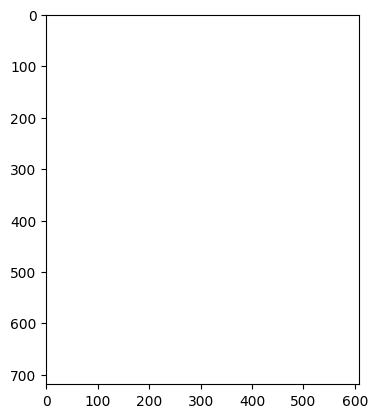

In [6]:
plt.figure()
plt.imshow(env.reset())

action_n 15
The action is inside step: (303, 171) <class 'tuple'>
self.worker_pos: (303, 171)
worker_pos 303 171
The action is : (303, 171)
reward 5
reward: 10, done: False, info: {}, step: 1
Reward = 10 with action = 15


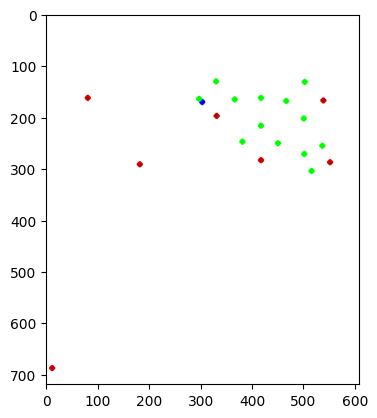

In [7]:
action_n = env.action_space.sample()
state, reward, done, info = env.step(action_n)
print("Reward = {} with action = {}".format(reward,action_n))
#print(state)
import matplotlib.pyplot as plt
plt.figure()
plt.imshow(state)

action_n 19
(336, 137)
The action is inside step: (336, 137) <class 'tuple'>
self.worker_pos: (336, 137)
worker_pos 336 137
The action is : (336, 137)
reward 5
reward: 10, done: False, info: {}, step: 2
Reward = 10 with action = (336, 137)


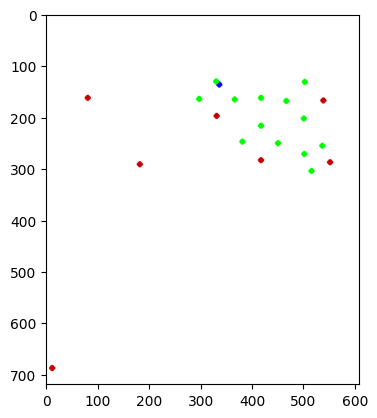

In [8]:
action_n = env.action_space.sample()
print('action_n',action_n)
action=int(df['x_coord'][action_n]), int(df['y_coord'][action_n])
print(action)
state, reward, done, info = env.step(action)
print("Reward = {} with action = {}".format(reward,action))
#print(state)
import matplotlib.pyplot as plt
plt.figure()
plt.imshow(state)

In [9]:
state.shape

(719, 609, 3)

In [10]:
IMG_SHAPE = (84, 84)
WINDOW_LENGTH = 3
input_shape = (WINDOW_LENGTH, IMG_SHAPE[0], IMG_SHAPE[1])
input_shape

(3, 84, 84)

In [11]:
from PIL import Image  # To transform the image in the Processor
import numpy as np
import gym

# Convolutional Backbone Network
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation, Flatten, Convolution2D, Permute
from tensorflow.keras.optimizers import Adam

# Keras-RL
from rl.agents.dqn import DQNAgent
from rl.policy import LinearAnnealedPolicy, EpsGreedyQPolicy
from rl.memory import SequentialMemory
from rl.core import Processor
from rl.callbacks import FileLogger, ModelIntervalCheckpoint


In [12]:
nb_actions = env.action_space.n

In [13]:
nb_actions

20

In [14]:
IMG_SHAPE = (84, 84)
WINDOW_LENGTH = 3

In [15]:
class ImageProcessor(Processor):
    def process_observation(self, observation):
        # First convert the numpy array to a PIL Image
        img = Image.fromarray(observation)
        # Then resize the image
        img = img.resize(IMG_SHAPE)
        # And convert it to grayscale  (The L stands for luminance)
        img = img.convert("L")
        # Convert the image back to a numpy array and finally return the image
        img = np.array(img)
        return img.astype('uint8')  # saves storage in experience memory
    
    def process_state_batch(self, batch):

        # We divide the observations by 255 to compress it into the intervall [0, 1].
        # This supports the training of the network
        # We perform this operation here to save memory.
        processed_batch = batch.astype('float32') / 255.
        return processed_batch

    def process_reward(self, reward):
        return np.clip(reward, -1., 1.)


In [16]:
class ImageProcessorFix(Processor):
    def process_observation(self,observation):
        if type(observation) == type(None):
            whiteFrame= 255 * np.ones((640,480,3), np.uint8)
            observation=whiteFrame
        # First convert the numpy array to a PIL Image
        img = Image.fromarray(observation)
        # Then resize the image
        img = img.resize(IMG_SHAPE)
        # And convert it to grayscale  (The L stands for luminance)
        #img = img.convert("L")
        # Convert the image back to a numpy array and finally return the image
        img = np.array(img)
        return img.astype('uint8')  # saves storage in experience memory

    def process_state_batch(self, batch):
        # We divide the observations by 255 to compress it into the intervall [0, 1].
        # This supports the training of the network
        # We perform this operation here to save memory.
        processed_batch = batch.astype('float32') / 255.
        return processed_batch

    def process_reward(self, reward):
        return np.clip(reward, -1., 1.)


## Model Creation

**NOTE: Depending on your custom environment, this model will vary greatly, try reading papers that are solving similar problems to your own!**

In [17]:
input_shape = (WINDOW_LENGTH, IMG_SHAPE[0], IMG_SHAPE[1])
input_shape

(3, 84, 84)

In [18]:
model = Sequential()
model.add(Permute((2, 3, 1), input_shape=input_shape))
model.add(Convolution2D(32, (8, 8), strides=(4, 4),kernel_initializer='he_normal'))
model.add(Activation('relu'))
model.add(Convolution2D(64, (4, 4), strides=(2, 2), kernel_initializer='he_normal'))
model.add(Activation('relu'))
model.add(Convolution2D(64, (3, 3), strides=(1, 1), kernel_initializer='he_normal'))
model.add(Activation('relu'))
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(nb_actions))
model.add(Activation('linear'))
print(model.summary())


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 permute (Permute)           (None, 84, 84, 3)         0         
                                                                 
 conv2d (Conv2D)             (None, 20, 20, 32)        6176      
                                                                 
 activation (Activation)     (None, 20, 20, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 9, 9, 64)          32832     
                                                                 
 activation_1 (Activation)   (None, 9, 9, 64)          0         
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 64)          36928     
                                                                 
 activation_2 (Activation)   (None, 7, 7, 64)          0

In [19]:
model2=False
if model2:
    from keras.models import Sequential
    from keras.layers import Dense, Conv2D, Flatten
    #create model
    model = Sequential()
    #add model layers
    model.add(Conv2D(64, kernel_size=3, activation='relu', input_shape=input_shape))  # (28,28,1)))
    model.add(Conv2D(32, kernel_size=3, activation='relu'))
    model.add(Flatten())
    model.add(Dense(nb_actions, activation='softmax'))
    print(model.summary())

----
## Creating the Agent

In [20]:
memory = SequentialMemory(limit=1000000, window_length=WINDOW_LENGTH)

In [21]:
processor = ImageProcessor()

In [22]:
policy = LinearAnnealedPolicy(EpsGreedyQPolicy(), attr='eps', value_max=1., value_min=.1, value_test=.05,
                              nb_steps=1000000)

In [23]:
dqn = DQNAgent(model=model, nb_actions=nb_actions, policy=policy, memory=memory,
               processor=processor, nb_steps_warmup=50000, gamma=.99, target_model_update=10000,
              train_interval=4, delta_clip=1)

In [24]:
dqn.compile(Adam(learning_rate=.00025), metrics=['mae'])

In [25]:
weights_filename = 'test_dqn_worker_weights.h5f'
checkpoint_weights_filename = 'test_dqn_' + "worker" + '_weights_{step}.h5f'
checkpoint_callback = ModelIntervalCheckpoint(checkpoint_weights_filename, interval=100000)

In [26]:
#nb_steps=1500000

In [32]:
history=dqn.fit(env, nb_steps=15000, callbacks=[checkpoint_callback], log_interval=100000, visualize=False)

Training for 15000 steps ...
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
Interval 1 (0 steps performed)
action_n 13
The action is inside step: (544, 174) <class 'tuple'>
self.worker_pos: (544, 174)
worker_pos 544 174
The action is : (544, 174)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
     1/100000 [..............................] - ETA: 54:19 - reward: -1.0000The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 11
The action is inside step: (337, 204) <class 'tuple'>
self.worker_pos: (337, 204)
worker_pos 337 204
The action is : (337, 204)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
     2/100000 [..............................] - ETA: 1:26:08 - reward: -1.0000The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos

The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 8
The action is inside step: (387, 254) <class 'tuple'>
self.worker_pos: (387, 254)
worker_pos 387 254
The action is : (387, 254)
reward 5
reward: 10, done: False, info: {}, step: 1
    28/100000 [..............................] - ETA: 57:31 - reward: 0.0714action_n 7
The action is inside step: (456, 257) <class 'tuple'>
self.worker_pos: (456, 257)
worker_pos 456 257
The action is : (456, 257)
reward 5
reward: 10, done: False, info: {}, step: 2
action_n 13
The action is inside step: (544, 174) <class 'tuple'>
self.worker_pos: (544, 174)
worker_pos 544 174
The action is : (544, 174)
is_occupied 0
reward: -2, done: True, info: {}, step: 3
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 7
The action is inside step: 

    59/100000 [..............................] - ETA: 50:10 - reward: 0.3220action_n 7
The action is inside step: (456, 257) <class 'tuple'>
self.worker_pos: (456, 257)
worker_pos 456 257
The action is : (456, 257)
reward 5
reward: 10, done: False, info: {}, step: 8
action_n 8
The action is inside step: (387, 254) <class 'tuple'>
self.worker_pos: (387, 254)
worker_pos 387 254
The action is : (387, 254)
reward 5
reward: 10, done: False, info: {}, step: 9
action_n 19
The action is inside step: (336, 137) <class 'tuple'>
self.worker_pos: (336, 137)
worker_pos 336 137
The action is : (336, 137)
reward 5
reward: 10, done: False, info: {}, step: 10
    62/100000 [..............................] - ETA: 49:24 - reward: 0.3548action_n 19
The action is inside step: (336, 137) <class 'tuple'>
self.worker_pos: (336, 137)
worker_pos 336 137
The action is : (336, 137)
reward 5
reward: 10, done: False, info: {}, step: 11
action_n 6
The action is inside step: (542, 262) <class 'tuple'>
self.worker_pos

    89/100000 [..............................] - ETA: 49:50 - reward: 0.3034action_n 0
The action is inside step: (18, 694) <class 'tuple'>
self.worker_pos: (18, 694)
worker_pos 18 694
The action is : (18, 694)
is_occupied 0
reward: -2, done: True, info: {}, step: 2
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 3
The action is inside step: (557, 294) <class 'tuple'>
self.worker_pos: (557, 294)
worker_pos 557 294
The action is : (557, 294)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
    91/100000 [..............................] - ETA: 49:57 - reward: 0.2747The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 1
The action is inside step: (521, 311) <class 'tuple'>
self.worker_pos: (521, 311)
worker_pos 521 311
The action is : (521, 311)
reward 5
reward

   121/100000 [..............................] - ETA: 49:43 - reward: 0.3554action_n 10
The action is inside step: (506, 209) <class 'tuple'>
self.worker_pos: (506, 209)
worker_pos 506 209
The action is : (506, 209)
reward 2
reward: 4, done: False, info: {}, step: 5
action_n 0
The action is inside step: (18, 694) <class 'tuple'>
self.worker_pos: (18, 694)
worker_pos 18 694
The action is : (18, 694)
is_occupied 0
reward: -2, done: True, info: {}, step: 6
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 11
The action is inside step: (337, 204) <class 'tuple'>
self.worker_pos: (337, 204)
worker_pos 337 204
The action is : (337, 204)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
   124/100000 [..............................] - ETA: 49:46 - reward: 0.3387The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
rewa

action_n 8
The action is inside step: (387, 254) <class 'tuple'>
self.worker_pos: (387, 254)
worker_pos 387 254
The action is : (387, 254)
reward 5
reward: 10, done: False, info: {}, step: 1
   149/100000 [..............................] - ETA: 51:12 - reward: 0.3020action_n 4
The action is inside step: (423, 290) <class 'tuple'>
self.worker_pos: (423, 290)
worker_pos 423 290
The action is : (423, 290)
is_occupied 0
reward: -2, done: True, info: {}, step: 2
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 4
The action is inside step: (423, 290) <class 'tuple'>
self.worker_pos: (423, 290)
worker_pos 423 290
The action is : (423, 290)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
   151/100000 [..............................] - ETA: 51:15 - reward: 0.2848The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
r

   177/100000 [..............................] - ETA: 51:27 - reward: 0.2881action_n 17
The action is inside step: (87, 169) <class 'tuple'>
self.worker_pos: (87, 169)
worker_pos 87 169
The action is : (87, 169)
is_occupied 0
reward: -2, done: True, info: {}, step: 2
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 14
The action is inside step: (372, 172) <class 'tuple'>
self.worker_pos: (372, 172)
worker_pos 372 172
The action is : (372, 172)
reward 5
reward: 10, done: False, info: {}, step: 1
   179/100000 [..............................] - ETA: 51:34 - reward: 0.2849action_n 2
The action is inside step: (188, 298) <class 'tuple'>
self.worker_pos: (188, 298)
worker_pos 188 298
The action is : (188, 298)
is_occupied 0
reward: -2, done: True, info: {}, step: 2
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
rew

   210/100000 [..............................] - ETA: 50:12 - reward: 0.3429action_n 9
The action is inside step: (423, 223) <class 'tuple'>
self.worker_pos: (423, 223)
worker_pos 423 223
The action is : (423, 223)
reward 5
reward: 10, done: False, info: {}, step: 2
action_n 2
The action is inside step: (188, 298) <class 'tuple'>
self.worker_pos: (188, 298)
worker_pos 188 298
The action is : (188, 298)
is_occupied 0
reward: -2, done: True, info: {}, step: 3
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 17
The action is inside step: (87, 169) <class 'tuple'>
self.worker_pos: (87, 169)
worker_pos 87 169
The action is : (87, 169)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
   213/100000 [..............................] - ETA: 50:11 - reward: 0.3333The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
rewa

   238/100000 [..............................] - ETA: 50:33 - reward: 0.3193action_n 2
The action is inside step: (188, 298) <class 'tuple'>
self.worker_pos: (188, 298)
worker_pos 188 298
The action is : (188, 298)
is_occupied 0
reward: -2, done: True, info: {}, step: 3
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 16
The action is inside step: (423, 169) <class 'tuple'>
self.worker_pos: (423, 169)
worker_pos 423 169
The action is : (423, 169)
reward 1
reward: 2, done: False, info: {}, step: 1
   240/100000 [..............................] - ETA: 50:39 - reward: 0.3167action_n 7
The action is inside step: (456, 257) <class 'tuple'>
self.worker_pos: (456, 257)
worker_pos 456 257
The action is : (456, 257)
reward 5
reward: 10, done: False, info: {}, step: 2
action_n 15
The action is inside step: (303, 171) <class 'tuple'>
self.worker_pos: (303, 171)
worker_pos 303 171
The 

   267/100000 [..............................] - ETA: 50:51 - reward: 0.3034action_n 16
The action is inside step: (423, 169) <class 'tuple'>
self.worker_pos: (423, 169)
worker_pos 423 169
The action is : (423, 169)
reward 1
reward: 2, done: False, info: {}, step: 2
action_n 2
The action is inside step: (188, 298) <class 'tuple'>
self.worker_pos: (188, 298)
worker_pos 188 298
The action is : (188, 298)
is_occupied 0
reward: -2, done: True, info: {}, step: 3
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 19
The action is inside step: (336, 137) <class 'tuple'>
self.worker_pos: (336, 137)
worker_pos 336 137
The action is : (336, 137)
reward 5
reward: 10, done: False, info: {}, step: 1
   270/100000 [..............................] - ETA: 50:50 - reward: 0.3037action_n 5
The action is inside step: (507, 278) <class 'tuple'>
self.worker_pos: (507, 278)
worker_pos 507 278
The 

action_n 4
The action is inside step: (423, 290) <class 'tuple'>
self.worker_pos: (423, 290)
worker_pos 423 290
The action is : (423, 290)
is_occupied 0
reward: -2, done: True, info: {}, step: 2
   298/100000 [..............................] - ETA: 50:55 - reward: 0.2953The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 0
The action is inside step: (18, 694) <class 'tuple'>
self.worker_pos: (18, 694)
worker_pos 18 694
The action is : (18, 694)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
   299/100000 [..............................] - ETA: 51:01 - reward: 0.2910The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 12
The action is inside step: (472, 175) <class 'tuple'>
self.worker_pos: (472, 175)
worker_pos 472 175
The action is : (472, 175)
reward 2
rewar

   328/100000 [..............................] - ETA: 50:56 - reward: 0.3171action_n 12
The action is inside step: (472, 175) <class 'tuple'>
self.worker_pos: (472, 175)
worker_pos 472 175
The action is : (472, 175)
reward 2
reward: 4, done: False, info: {}, step: 7
action_n 15
The action is inside step: (303, 171) <class 'tuple'>
self.worker_pos: (303, 171)
worker_pos 303 171
The action is : (303, 171)
reward 5
reward: 10, done: False, info: {}, step: 8
action_n 14
The action is inside step: (372, 172) <class 'tuple'>
self.worker_pos: (372, 172)
worker_pos 372 172
The action is : (372, 172)
reward 5
reward: 10, done: False, info: {}, step: 9
   331/100000 [..............................] - ETA: 50:47 - reward: 0.3233action_n 7
The action is inside step: (456, 257) <class 'tuple'>
self.worker_pos: (456, 257)
worker_pos 456 257
The action is : (456, 257)
reward 5
reward: 10, done: False, info: {}, step: 10
action_n 15
The action is inside step: (303, 171) <class 'tuple'>
self.worker_pos

   361/100000 [..............................] - ETA: 50:18 - reward: 0.3352action_n 13
The action is inside step: (544, 174) <class 'tuple'>
self.worker_pos: (544, 174)
worker_pos 544 174
The action is : (544, 174)
is_occupied 0
reward: -2, done: True, info: {}, step: 3
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 9
The action is inside step: (423, 223) <class 'tuple'>
self.worker_pos: (423, 223)
worker_pos 423 223
The action is : (423, 223)
reward 5
reward: 10, done: False, info: {}, step: 1
   363/100000 [..............................] - ETA: 50:20 - reward: 0.3333action_n 16
The action is inside step: (423, 169) <class 'tuple'>
self.worker_pos: (423, 169)
worker_pos 423 169
The action is : (423, 169)
reward 1
reward: 2, done: False, info: {}, step: 2
action_n 1
The action is inside step: (521, 311) <class 'tuple'>
self.worker_pos: (521, 311)
worker_pos 521 311
The 

The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 4
The action is inside step: (423, 290) <class 'tuple'>
self.worker_pos: (423, 290)
worker_pos 423 290
The action is : (423, 290)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
   393/100000 [..............................] - ETA: 50:04 - reward: 0.3333The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 18
The action is inside step: (508, 138) <class 'tuple'>
self.worker_pos: (508, 138)
worker_pos 508 138
The action is : (508, 138)
reward 1
reward: 2, done: False, info: {}, step: 1
action_n 5
The action is inside step: (507, 278) <class 'tuple'>
self.worker_pos: (507, 278)
worker_pos 507 278
The action is : (507, 278)
reward 5
reward: 10, done: False, info: {}, step: 2
   395/100000 [........................

action_n 14
The action is inside step: (372, 172) <class 'tuple'>
self.worker_pos: (372, 172)
worker_pos 372 172
The action is : (372, 172)
reward 5
reward: 10, done: False, info: {}, step: 1
   424/100000 [..............................] - ETA: 49:57 - reward: 0.3396action_n 14
The action is inside step: (372, 172) <class 'tuple'>
self.worker_pos: (372, 172)
worker_pos 372 172
The action is : (372, 172)
reward 5
reward: 10, done: False, info: {}, step: 2
action_n 16
The action is inside step: (423, 169) <class 'tuple'>
self.worker_pos: (423, 169)
worker_pos 423 169
The action is : (423, 169)
reward 1
reward: 2, done: False, info: {}, step: 3
action_n 5
The action is inside step: (507, 278) <class 'tuple'>
self.worker_pos: (507, 278)
worker_pos 507 278
The action is : (507, 278)
reward 5
reward: 10, done: False, info: {}, step: 4
   427/100000 [..............................] - ETA: 49:51 - reward: 0.3443action_n 15
The action is inside step: (303, 171) <class 'tuple'>
self.worker_pos:

action_n 13
The action is inside step: (544, 174) <class 'tuple'>
self.worker_pos: (544, 174)
worker_pos 544 174
The action is : (544, 174)
is_occupied 0
reward: -2, done: True, info: {}, step: 2
   454/100000 [..............................] - ETA: 49:56 - reward: 0.3304The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 12
The action is inside step: (472, 175) <class 'tuple'>
self.worker_pos: (472, 175)
worker_pos 472 175
The action is : (472, 175)
reward 2
reward: 4, done: False, info: {}, step: 1
action_n 11
The action is inside step: (337, 204) <class 'tuple'>
self.worker_pos: (337, 204)
worker_pos 337 204
The action is : (337, 204)
is_occupied 0
reward: -2, done: True, info: {}, step: 2
   456/100000 [..............................] - ETA: 49:58 - reward: 0.3289The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)

action_n 7
The action is inside step: (456, 257) <class 'tuple'>
self.worker_pos: (456, 257)
worker_pos 456 257
The action is : (456, 257)
reward 5
reward: 10, done: False, info: {}, step: 7
action_n 12
The action is inside step: (472, 175) <class 'tuple'>
self.worker_pos: (472, 175)
worker_pos 472 175
The action is : (472, 175)
reward 2
reward: 4, done: False, info: {}, step: 8
   485/100000 [..............................] - ETA: 49:52 - reward: 0.3361action_n 12
The action is inside step: (472, 175) <class 'tuple'>
self.worker_pos: (472, 175)
worker_pos 472 175
The action is : (472, 175)
reward 2
reward: 4, done: False, info: {}, step: 9
action_n 11
The action is inside step: (337, 204) <class 'tuple'>
self.worker_pos: (337, 204)
worker_pos 337 204
The action is : (337, 204)
is_occupied 0
reward: -2, done: True, info: {}, step: 10
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0


action_n 5
The action is inside step: (507, 278) <class 'tuple'>
self.worker_pos: (507, 278)
worker_pos 507 278
The action is : (507, 278)
reward 5
reward: 10, done: False, info: {}, step: 4
   517/100000 [..............................] - ETA: 49:24 - reward: 0.3501action_n 0
The action is inside step: (18, 694) <class 'tuple'>
self.worker_pos: (18, 694)
worker_pos 18 694
The action is : (18, 694)
is_occupied 0
reward: -2, done: True, info: {}, step: 5
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 11
The action is inside step: (337, 204) <class 'tuple'>
self.worker_pos: (337, 204)
worker_pos 337 204
The action is : (337, 204)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
   519/100000 [..............................] - ETA: 49:26 - reward: 0.3449The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
rewa

The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 8
The action is inside step: (387, 254) <class 'tuple'>
self.worker_pos: (387, 254)
worker_pos 387 254
The action is : (387, 254)
reward 5
reward: 10, done: False, info: {}, step: 1
   546/100000 [..............................] - ETA: 49:29 - reward: 0.3407action_n 8
The action is inside step: (387, 254) <class 'tuple'>
self.worker_pos: (387, 254)
worker_pos 387 254
The action is : (387, 254)
reward 5
reward: 10, done: False, info: {}, step: 2
action_n 18
The action is inside step: (508, 138) <class 'tuple'>
self.worker_pos: (508, 138)
worker_pos 508 138
The action is : (508, 138)
reward 1
reward: 2, done: False, info: {}, step: 3
action_n 10
The action is inside step: (506, 209) <class 'tuple'>
self.worker_pos: (506, 209)
worker_pos 506 209
The action is : (506, 209)
reward 2
reward: 4, done: False, info: {}, step: 4
   549

action_n 7
The action is inside step: (456, 257) <class 'tuple'>
self.worker_pos: (456, 257)
worker_pos 456 257
The action is : (456, 257)
reward 5
reward: 10, done: False, info: {}, step: 4
   577/100000 [..............................] - ETA: 49:21 - reward: 0.3449action_n 17
The action is inside step: (87, 169) <class 'tuple'>
self.worker_pos: (87, 169)
worker_pos 87 169
The action is : (87, 169)
is_occupied 0
reward: -2, done: True, info: {}, step: 5
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 1
The action is inside step: (521, 311) <class 'tuple'>
self.worker_pos: (521, 311)
worker_pos 521 311
The action is : (521, 311)
reward 5
reward: 10, done: False, info: {}, step: 1
   579/100000 [..............................] - ETA: 49:24 - reward: 0.3437action_n 18
The action is inside step: (508, 138) <class 'tuple'>
self.worker_pos: (508, 138)
worker_pos 508 138
The act

action_n 2
The action is inside step: (188, 298) <class 'tuple'>
self.worker_pos: (188, 298)
worker_pos 188 298
The action is : (188, 298)
is_occupied 0
reward: -2, done: True, info: {}, step: 7
   611/100000 [..............................] - ETA: 48:55 - reward: 0.3584The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 11
The action is inside step: (337, 204) <class 'tuple'>
self.worker_pos: (337, 204)
worker_pos 337 204
The action is : (337, 204)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 0
The action is inside step: (18, 694) <class 'tuple'>
self.worker_pos: (18, 694)
worker_pos 18 694
The action is : (18, 694)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
   613/100000 [...................

The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 3
The action is inside step: (557, 294) <class 'tuple'>
self.worker_pos: (557, 294)
worker_pos 557 294
The action is : (557, 294)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
   642/100000 [..............................] - ETA: 48:49 - reward: 0.3583The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 16
The action is inside step: (423, 169) <class 'tuple'>
self.worker_pos: (423, 169)
worker_pos 423 169
The action is : (423, 169)
reward 1
reward: 2, done: False, info: {}, step: 1
action_n 4
The action is inside step: (423, 290) <class 'tuple'>
self.worker_pos: (423, 290)
worker_pos 423 290
The action is : (423, 290)
is_occupied 0
reward: -2, done: True, info: {}, step: 2
   644/100000 [....................

   669/100000 [..............................] - ETA: 49:06 - reward: 0.3453The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 11
The action is inside step: (337, 204) <class 'tuple'>
self.worker_pos: (337, 204)
worker_pos 337 204
The action is : (337, 204)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 8
The action is inside step: (387, 254) <class 'tuple'>
self.worker_pos: (387, 254)
worker_pos 387 254
The action is : (387, 254)
reward 5
reward: 10, done: False, info: {}, step: 1
   671/100000 [..............................] - ETA: 49:10 - reward: 0.3443action_n 10
The action is inside step: (506, 209) <class 'tuple'>
self.worker_pos: (506, 209)
worker_pos 506 209
The action is : (506, 209)
reward 2
rewa

action_n 8
The action is inside step: (387, 254) <class 'tuple'>
self.worker_pos: (387, 254)
worker_pos 387 254
The action is : (387, 254)
reward 5
reward: 10, done: False, info: {}, step: 2
   695/100000 [..............................] - ETA: 49:36 - reward: 0.3266action_n 12
The action is inside step: (472, 175) <class 'tuple'>
self.worker_pos: (472, 175)
worker_pos 472 175
The action is : (472, 175)
reward 2
reward: 4, done: False, info: {}, step: 3
action_n 4
The action is inside step: (423, 290) <class 'tuple'>
self.worker_pos: (423, 290)
worker_pos 423 290
The action is : (423, 290)
is_occupied 0
reward: -2, done: True, info: {}, step: 4
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 15
The action is inside step: (303, 171) <class 'tuple'>
self.worker_pos: (303, 171)
worker_pos 303 171
The action is : (303, 171)
reward 5
reward: 10, done: False, info: {}, step: 1
 

The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 1
The action is inside step: (521, 311) <class 'tuple'>
self.worker_pos: (521, 311)
worker_pos 521 311
The action is : (521, 311)
reward 5
reward: 10, done: False, info: {}, step: 1
   723/100000 [..............................] - ETA: 49:55 - reward: 0.3140action_n 10
The action is inside step: (506, 209) <class 'tuple'>
self.worker_pos: (506, 209)
worker_pos 506 209
The action is : (506, 209)
reward 2
reward: 4, done: False, info: {}, step: 2
action_n 15
The action is inside step: (303, 171) <class 'tuple'>
self.worker_pos: (303, 171)
worker_pos 303 171
The action is : (303, 171)
reward 5
reward: 10, done: False, info: {}, step: 3
action_n 13
The action is inside step: (544, 174) <class 'tuple'>
self.worker_pos: (544, 174)
worker_pos 544 174
The action is : (544, 174)
is_occupied 0
reward: -2, done: True, info: {}, step: 4


   752/100000 [..............................] - ETA: 49:53 - reward: 0.3138The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 5
The action is inside step: (507, 278) <class 'tuple'>
self.worker_pos: (507, 278)
worker_pos 507 278
The action is : (507, 278)
reward 5
reward: 10, done: False, info: {}, step: 1
action_n 8
The action is inside step: (387, 254) <class 'tuple'>
self.worker_pos: (387, 254)
worker_pos 387 254
The action is : (387, 254)
reward 5
reward: 10, done: False, info: {}, step: 2
   754/100000 [..............................] - ETA: 49:54 - reward: 0.3156action_n 14
The action is inside step: (372, 172) <class 'tuple'>
self.worker_pos: (372, 172)
worker_pos 372 172
The action is : (372, 172)
reward 5
reward: 10, done: False, info: {}, step: 3
action_n 14
The action is inside step: (372, 172) <class 'tuple'>
self.worker_pos: (372, 172)
worker_pos 372 172
The act

   781/100000 [..............................] - ETA: 49:57 - reward: 0.3111The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 1
The action is inside step: (521, 311) <class 'tuple'>
self.worker_pos: (521, 311)
worker_pos 521 311
The action is : (521, 311)
reward 5
reward: 10, done: False, info: {}, step: 1
action_n 14
The action is inside step: (372, 172) <class 'tuple'>
self.worker_pos: (372, 172)
worker_pos 372 172
The action is : (372, 172)
reward 5
reward: 10, done: False, info: {}, step: 2
   783/100000 [..............................] - ETA: 49:58 - reward: 0.3129action_n 17
The action is inside step: (87, 169) <class 'tuple'>
self.worker_pos: (87, 169)
worker_pos 87 169
The action is : (87, 169)
is_occupied 0
reward: -2, done: True, info: {}, step: 3
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward:

   811/100000 [..............................] - ETA: 49:57 - reward: 0.3120action_n 1
The action is inside step: (521, 311) <class 'tuple'>
self.worker_pos: (521, 311)
worker_pos 521 311
The action is : (521, 311)
reward 5
reward: 10, done: False, info: {}, step: 6
action_n 16
The action is inside step: (423, 169) <class 'tuple'>
self.worker_pos: (423, 169)
worker_pos 423 169
The action is : (423, 169)
reward 1
reward: 2, done: False, info: {}, step: 7
action_n 15
The action is inside step: (303, 171) <class 'tuple'>
self.worker_pos: (303, 171)
worker_pos 303 171
The action is : (303, 171)
reward 5
reward: 10, done: False, info: {}, step: 8
   814/100000 [..............................] - ETA: 49:53 - reward: 0.3145action_n 4
The action is inside step: (423, 290) <class 'tuple'>
self.worker_pos: (423, 290)
worker_pos 423 290
The action is : (423, 290)
is_occupied 0
reward: -2, done: True, info: {}, step: 9
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worke

The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 11
The action is inside step: (337, 204) <class 'tuple'>
self.worker_pos: (337, 204)
worker_pos 337 204
The action is : (337, 204)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
   842/100000 [..............................] - ETA: 49:58 - reward: 0.3064The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 2
The action is inside step: (188, 298) <class 'tuple'>
self.worker_pos: (188, 298)
worker_pos 188 298
The action is : (188, 298)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
   843/100000 [..............................] - ETA: 50:00 - reward: 0.3049The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, ste

   871/100000 [..............................] - ETA: 49:52 - reward: 0.3088The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 1
The action is inside step: (521, 311) <class 'tuple'>
self.worker_pos: (521, 311)
worker_pos 521 311
The action is : (521, 311)
reward 5
reward: 10, done: False, info: {}, step: 1
action_n 3
The action is inside step: (557, 294) <class 'tuple'>
self.worker_pos: (557, 294)
worker_pos 557 294
The action is : (557, 294)
is_occupied 0
reward: -2, done: True, info: {}, step: 2
   873/100000 [..............................] - ETA: 49:53 - reward: 0.3081The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 6
The action is inside step: (542, 262) <class 'tuple'>
self.worker_pos: (542, 262)
worker_pos 542 262
The action is : (542, 262)
reward 5
reward

   904/100000 [..............................] - ETA: 49:41 - reward: 0.3186action_n 5
The action is inside step: (507, 278) <class 'tuple'>
self.worker_pos: (507, 278)
worker_pos 507 278
The action is : (507, 278)
reward 5
reward: 10, done: False, info: {}, step: 5
action_n 15
The action is inside step: (303, 171) <class 'tuple'>
self.worker_pos: (303, 171)
worker_pos 303 171
The action is : (303, 171)
reward 5
reward: 10, done: False, info: {}, step: 6
action_n 9
The action is inside step: (423, 223) <class 'tuple'>
self.worker_pos: (423, 223)
worker_pos 423 223
The action is : (423, 223)
reward 5
reward: 10, done: False, info: {}, step: 7
   907/100000 [..............................] - ETA: 49:38 - reward: 0.3208action_n 11
The action is inside step: (337, 204) <class 'tuple'>
self.worker_pos: (337, 204)
worker_pos 337 204
The action is : (337, 204)
is_occupied 0
reward: -2, done: True, info: {}, step: 8
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
work

   936/100000 [..............................] - ETA: 49:32 - reward: 0.3226action_n 17
The action is inside step: (87, 169) <class 'tuple'>
self.worker_pos: (87, 169)
worker_pos 87 169
The action is : (87, 169)
is_occupied 0
reward: -2, done: True, info: {}, step: 2
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 6
The action is inside step: (542, 262) <class 'tuple'>
self.worker_pos: (542, 262)
worker_pos 542 262
The action is : (542, 262)
reward 5
reward: 10, done: False, info: {}, step: 1
   938/100000 [..............................] - ETA: 49:33 - reward: 0.3220action_n 3
The action is inside step: (557, 294) <class 'tuple'>
self.worker_pos: (557, 294)
worker_pos 557 294
The action is : (557, 294)
is_occupied 0
reward: -2, done: True, info: {}, step: 2
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
rewa

   965/100000 [..............................] - ETA: 49:35 - reward: 0.3161The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 10
The action is inside step: (506, 209) <class 'tuple'>
self.worker_pos: (506, 209)
worker_pos 506 209
The action is : (506, 209)
reward 2
reward: 4, done: False, info: {}, step: 1
action_n 9
The action is inside step: (423, 223) <class 'tuple'>
self.worker_pos: (423, 223)
worker_pos 423 223
The action is : (423, 223)
reward 5
reward: 10, done: False, info: {}, step: 2
   967/100000 [..............................] - ETA: 49:36 - reward: 0.3175action_n 10
The action is inside step: (506, 209) <class 'tuple'>
self.worker_pos: (506, 209)
worker_pos 506 209
The action is : (506, 209)
reward 2
reward: 4, done: False, info: {}, step: 3
action_n 8
The action is inside step: (387, 254) <class 'tuple'>
self.worker_pos: (387, 254)
worker_pos 387 254
The actio

   995/100000 [..............................] - ETA: 49:33 - reward: 0.3166The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 7
The action is inside step: (456, 257) <class 'tuple'>
self.worker_pos: (456, 257)
worker_pos 456 257
The action is : (456, 257)
reward 5
reward: 10, done: False, info: {}, step: 1
action_n 7
The action is inside step: (456, 257) <class 'tuple'>
self.worker_pos: (456, 257)
worker_pos 456 257
The action is : (456, 257)
reward 5
reward: 10, done: False, info: {}, step: 2
   997/100000 [..............................] - ETA: 49:33 - reward: 0.3180action_n 3
The action is inside step: (557, 294) <class 'tuple'>
self.worker_pos: (557, 294)
worker_pos 557 294
The action is : (557, 294)
is_occupied 0
reward: -2, done: True, info: {}, step: 3
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
rewar

  1022/100000 [..............................] - ETA: 49:44 - reward: 0.3072action_n 15
The action is inside step: (303, 171) <class 'tuple'>
self.worker_pos: (303, 171)
worker_pos 303 171
The action is : (303, 171)
reward 5
reward: 10, done: False, info: {}, step: 3
action_n 7
The action is inside step: (456, 257) <class 'tuple'>
self.worker_pos: (456, 257)
worker_pos 456 257
The action is : (456, 257)
reward 5
reward: 10, done: False, info: {}, step: 4
action_n 15
The action is inside step: (303, 171) <class 'tuple'>
self.worker_pos: (303, 171)
worker_pos 303 171
The action is : (303, 171)
reward 5
reward: 10, done: False, info: {}, step: 5
  1025/100000 [..............................] - ETA: 49:42 - reward: 0.3093action_n 16
The action is inside step: (423, 169) <class 'tuple'>
self.worker_pos: (423, 169)
worker_pos 423 169
The action is : (423, 169)
reward 1
reward: 2, done: False, info: {}, step: 6
action_n 5
The action is inside step: (507, 278) <class 'tuple'>
self.worker_pos: 

  1055/100000 [..............................] - ETA: 49:30 - reward: 0.3156The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 7
The action is inside step: (456, 257) <class 'tuple'>
self.worker_pos: (456, 257)
worker_pos 456 257
The action is : (456, 257)
reward 5
reward: 10, done: False, info: {}, step: 1
action_n 9
The action is inside step: (423, 223) <class 'tuple'>
self.worker_pos: (423, 223)
worker_pos 423 223
The action is : (423, 223)
reward 5
reward: 10, done: False, info: {}, step: 2
  1057/100000 [..............................] - ETA: 49:31 - reward: 0.3169action_n 5
The action is inside step: (507, 278) <class 'tuple'>
self.worker_pos: (507, 278)
worker_pos 507 278
The action is : (507, 278)
reward 5
reward: 10, done: False, info: {}, step: 3
action_n 18
The action is inside step: (508, 138) <class 'tuple'>
self.worker_pos: (508, 138)
worker_pos 508 138
The acti

  1087/100000 [..............................] - ETA: 49:22 - reward: 0.3211action_n 2
The action is inside step: (188, 298) <class 'tuple'>
self.worker_pos: (188, 298)
worker_pos 188 298
The action is : (188, 298)
is_occupied 0
reward: -2, done: True, info: {}, step: 2
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 6
The action is inside step: (542, 262) <class 'tuple'>
self.worker_pos: (542, 262)
worker_pos 542 262
The action is : (542, 262)
reward 5
reward: 10, done: False, info: {}, step: 1
  1089/100000 [..............................] - ETA: 49:22 - reward: 0.3205action_n 4
The action is inside step: (423, 290) <class 'tuple'>
self.worker_pos: (423, 290)
worker_pos 423 290
The action is : (423, 290)
is_occupied 0
reward: -2, done: True, info: {}, step: 2
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
r

reward: -2, done: True, info: {}, step: 0
action_n 11
The action is inside step: (337, 204) <class 'tuple'>
self.worker_pos: (337, 204)
worker_pos 337 204
The action is : (337, 204)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
  1117/100000 [..............................] - ETA: 49:20 - reward: 0.3178The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 2
The action is inside step: (188, 298) <class 'tuple'>
self.worker_pos: (188, 298)
worker_pos 188 298
The action is : (188, 298)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 15
The action is inside step: (303, 171) <class 'tuple'>
self.worker_pos: (303, 171)
worker_pos 303 171
The action is : (303, 171)
reward 5
reward: 10, done: False, info: {},

  1147/100000 [..............................] - ETA: 49:12 - reward: 0.3235action_n 4
The action is inside step: (423, 290) <class 'tuple'>
self.worker_pos: (423, 290)
worker_pos 423 290
The action is : (423, 290)
is_occupied 0
reward: -2, done: True, info: {}, step: 3
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 12
The action is inside step: (472, 175) <class 'tuple'>
self.worker_pos: (472, 175)
worker_pos 472 175
The action is : (472, 175)
reward 2
reward: 4, done: False, info: {}, step: 1
  1149/100000 [..............................] - ETA: 49:13 - reward: 0.3229action_n 1
The action is inside step: (521, 311) <class 'tuple'>
self.worker_pos: (521, 311)
worker_pos 521 311
The action is : (521, 311)
reward 5
reward: 10, done: False, info: {}, step: 2
action_n 16
The action is inside step: (423, 169) <class 'tuple'>
self.worker_pos: (423, 169)
worker_pos 423 169
The 

  1179/100000 [..............................] - ETA: 49:04 - reward: 0.3282action_n 2
The action is inside step: (188, 298) <class 'tuple'>
self.worker_pos: (188, 298)
worker_pos 188 298
The action is : (188, 298)
is_occupied 0
reward: -2, done: True, info: {}, step: 3
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 2
The action is inside step: (188, 298) <class 'tuple'>
self.worker_pos: (188, 298)
worker_pos 188 298
The action is : (188, 298)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
  1181/100000 [..............................] - ETA: 49:04 - reward: 0.3260The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 1
The action is inside step: (521, 311) <class 'tuple'>
self.worker_pos: (521, 311)
worker_pos 521 311
The action is : (521, 311)
reward 5
re

action_n 2
The action is inside step: (188, 298) <class 'tuple'>
self.worker_pos: (188, 298)
worker_pos 188 298
The action is : (188, 298)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
  1210/100000 [..............................] - ETA: 49:03 - reward: 0.3256The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 14
The action is inside step: (372, 172) <class 'tuple'>
self.worker_pos: (372, 172)
worker_pos 372 172
The action is : (372, 172)
reward 5
reward: 10, done: False, info: {}, step: 1
action_n 10
The action is inside step: (506, 209) <class 'tuple'>
self.worker_pos: (506, 209)
worker_pos 506 209
The action is : (506, 209)
reward 2
reward: 4, done: False, info: {}, step: 2
  1212/100000 [..............................] - ETA: 49:03 - reward: 0.3267action_n 17
The action is inside step: (87, 169) <class 'tuple'>
self.worker_pos: (87, 169)
worker_pos 87 169
The ac

  1240/100000 [..............................] - ETA: 49:02 - reward: 0.3258The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 6
The action is inside step: (542, 262) <class 'tuple'>
self.worker_pos: (542, 262)
worker_pos 542 262
The action is : (542, 262)
reward 5
reward: 10, done: False, info: {}, step: 1
action_n 9
The action is inside step: (423, 223) <class 'tuple'>
self.worker_pos: (423, 223)
worker_pos 423 223
The action is : (423, 223)
reward 5
reward: 10, done: False, info: {}, step: 2
  1242/100000 [..............................] - ETA: 49:02 - reward: 0.3269action_n 12
The action is inside step: (472, 175) <class 'tuple'>
self.worker_pos: (472, 175)
worker_pos 472 175
The action is : (472, 175)
reward 2
reward: 4, done: False, info: {}, step: 3
action_n 9
The action is inside step: (423, 223) <class 'tuple'>
self.worker_pos: (423, 223)
worker_pos 423 223
The actio

  1269/100000 [..............................] - ETA: 49:03 - reward: 0.3239The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 0
The action is inside step: (18, 694) <class 'tuple'>
self.worker_pos: (18, 694)
worker_pos 18 694
The action is : (18, 694)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 17
The action is inside step: (87, 169) <class 'tuple'>
self.worker_pos: (87, 169)
worker_pos 87 169
The action is : (87, 169)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
  1271/100000 [..............................] - ETA: 49:05 - reward: 0.3218The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
act

  1298/100000 [..............................] - ETA: 49:09 - reward: 0.3190action_n 19
The action is inside step: (336, 137) <class 'tuple'>
self.worker_pos: (336, 137)
worker_pos 336 137
The action is : (336, 137)
reward 5
reward: 10, done: False, info: {}, step: 2
action_n 12
The action is inside step: (472, 175) <class 'tuple'>
self.worker_pos: (472, 175)
worker_pos 472 175
The action is : (472, 175)
reward 2
reward: 4, done: False, info: {}, step: 3
action_n 17
The action is inside step: (87, 169) <class 'tuple'>
self.worker_pos: (87, 169)
worker_pos 87 169
The action is : (87, 169)
is_occupied 0
reward: -2, done: True, info: {}, step: 4
  1301/100000 [..............................] - ETA: 49:06 - reward: 0.3190The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 3
The action is inside step: (557, 294) <class 'tuple'>
self.worker_pos: (557, 294)
worker_pos 557 294
The act

action_n 1
The action is inside step: (521, 311) <class 'tuple'>
self.worker_pos: (521, 311)
worker_pos 521 311
The action is : (521, 311)
reward 5
reward: 10, done: False, info: {}, step: 2
  1328/100000 [..............................] - ETA: 49:11 - reward: 0.3163action_n 11
The action is inside step: (337, 204) <class 'tuple'>
self.worker_pos: (337, 204)
worker_pos 337 204
The action is : (337, 204)
is_occupied 0
reward: -2, done: True, info: {}, step: 3
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 8
The action is inside step: (387, 254) <class 'tuple'>
self.worker_pos: (387, 254)
worker_pos 387 254
The action is : (387, 254)
reward 5
reward: 10, done: False, info: {}, step: 1
  1330/100000 [..............................] - ETA: 49:11 - reward: 0.3158action_n 11
The action is inside step: (337, 204) <class 'tuple'>
self.worker_pos: (337, 204)
worker_pos 337 204
The

The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 18
The action is inside step: (508, 138) <class 'tuple'>
self.worker_pos: (508, 138)
worker_pos 508 138
The action is : (508, 138)
reward 1
reward: 2, done: False, info: {}, step: 1
  1357/100000 [..............................] - ETA: 49:13 - reward: 0.3132action_n 17
The action is inside step: (87, 169) <class 'tuple'>
self.worker_pos: (87, 169)
worker_pos 87 169
The action is : (87, 169)
is_occupied 0
reward: -2, done: True, info: {}, step: 2
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 6
The action is inside step: (542, 262) <class 'tuple'>
self.worker_pos: (542, 262)
worker_pos 542 262
The action is : (542, 262)
reward 5
reward: 10, done: False, info: {}, step: 1
  1359/100000 [...........................

  1388/100000 [..............................] - ETA: 49:06 - reward: 0.3156The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 11
The action is inside step: (337, 204) <class 'tuple'>
self.worker_pos: (337, 204)
worker_pos 337 204
The action is : (337, 204)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 15
The action is inside step: (303, 171) <class 'tuple'>
self.worker_pos: (303, 171)
worker_pos 303 171
The action is : (303, 171)
reward 5
reward: 10, done: False, info: {}, step: 1
  1390/100000 [..............................] - ETA: 49:08 - reward: 0.3151action_n 14
The action is inside step: (372, 172) <class 'tuple'>
self.worker_pos: (372, 172)
worker_pos 372 172
The action is : (372, 172)
reward 5
rew

  1417/100000 [..............................] - ETA: 49:06 - reward: 0.3140The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 18
The action is inside step: (508, 138) <class 'tuple'>
self.worker_pos: (508, 138)
worker_pos 508 138
The action is : (508, 138)
reward 1
reward: 2, done: False, info: {}, step: 1
action_n 17
The action is inside step: (87, 169) <class 'tuple'>
self.worker_pos: (87, 169)
worker_pos 87 169
The action is : (87, 169)
is_occupied 0
reward: -2, done: True, info: {}, step: 2
  1419/100000 [..............................] - ETA: 49:07 - reward: 0.3136The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 3
The action is inside step: (557, 294) <class 'tuple'>
self.worker_pos: (557, 294)
worker_pos 557 294
The action is : (557, 294)
is_occupied 0
rewa

action_n 12
The action is inside step: (472, 175) <class 'tuple'>
self.worker_pos: (472, 175)
worker_pos 472 175
The action is : (472, 175)
reward 2
reward: 4, done: False, info: {}, step: 4
  1449/100000 [..............................] - ETA: 49:03 - reward: 0.3168action_n 9
The action is inside step: (423, 223) <class 'tuple'>
self.worker_pos: (423, 223)
worker_pos 423 223
The action is : (423, 223)
reward 5
reward: 10, done: False, info: {}, step: 5
action_n 6
The action is inside step: (542, 262) <class 'tuple'>
self.worker_pos: (542, 262)
worker_pos 542 262
The action is : (542, 262)
reward 5
reward: 10, done: False, info: {}, step: 6
action_n 15
The action is inside step: (303, 171) <class 'tuple'>
self.worker_pos: (303, 171)
worker_pos 303 171
The action is : (303, 171)
reward 5
reward: 10, done: False, info: {}, step: 7
  1452/100000 [..............................] - ETA: 49:01 - reward: 0.3182action_n 12
The action is inside step: (472, 175) <class 'tuple'>
self.worker_pos: 

action_n 3
The action is inside step: (557, 294) <class 'tuple'>
self.worker_pos: (557, 294)
worker_pos 557 294
The action is : (557, 294)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
  1481/100000 [..............................] - ETA: 48:57 - reward: 0.3194The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 5
The action is inside step: (507, 278) <class 'tuple'>
self.worker_pos: (507, 278)
worker_pos 507 278
The action is : (507, 278)
reward 5
reward: 10, done: False, info: {}, step: 1
action_n 14
The action is inside step: (372, 172) <class 'tuple'>
self.worker_pos: (372, 172)
worker_pos 372 172
The action is : (372, 172)
reward 5
reward: 10, done: False, info: {}, step: 2
  1483/100000 [..............................] - ETA: 48:57 - reward: 0.3203action_n 13
The action is inside step: (544, 174) <class 'tuple'>
self.worker_pos: (544, 174)
worker_pos 544 174
The

  1510/100000 [..............................] - ETA: 48:55 - reward: 0.3205action_n 12
The action is inside step: (472, 175) <class 'tuple'>
self.worker_pos: (472, 175)
worker_pos 472 175
The action is : (472, 175)
reward 2
reward: 4, done: False, info: {}, step: 3
action_n 2
The action is inside step: (188, 298) <class 'tuple'>
self.worker_pos: (188, 298)
worker_pos 188 298
The action is : (188, 298)
is_occupied 0
reward: -2, done: True, info: {}, step: 4
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 7
The action is inside step: (456, 257) <class 'tuple'>
self.worker_pos: (456, 257)
worker_pos 456 257
The action is : (456, 257)
reward 5
reward: 10, done: False, info: {}, step: 1
  1513/100000 [..............................] - ETA: 48:55 - reward: 0.3206action_n 7
The action is inside step: (456, 257) <class 'tuple'>
self.worker_pos: (456, 257)
worker_pos 456 257
The a

  1541/100000 [..............................] - ETA: 48:55 - reward: 0.3199The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 16
The action is inside step: (423, 169) <class 'tuple'>
self.worker_pos: (423, 169)
worker_pos 423 169
The action is : (423, 169)
reward 1
reward: 2, done: False, info: {}, step: 1
action_n 5
The action is inside step: (507, 278) <class 'tuple'>
self.worker_pos: (507, 278)
worker_pos 507 278
The action is : (507, 278)
reward 5
reward: 10, done: False, info: {}, step: 2
  1543/100000 [..............................] - ETA: 48:55 - reward: 0.3208action_n 7
The action is inside step: (456, 257) <class 'tuple'>
self.worker_pos: (456, 257)
worker_pos 456 257
The action is : (456, 257)
reward 5
reward: 10, done: False, info: {}, step: 3
action_n 13
The action is inside step: (544, 174) <class 'tuple'>
self.worker_pos: (544, 174)
worker_pos 544 174
The acti

  1569/100000 [..............................] - ETA: 48:58 - reward: 0.3180action_n 4
The action is inside step: (423, 290) <class 'tuple'>
self.worker_pos: (423, 290)
worker_pos 423 290
The action is : (423, 290)
is_occupied 0
reward: -2, done: True, info: {}, step: 2
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 17
The action is inside step: (87, 169) <class 'tuple'>
self.worker_pos: (87, 169)
worker_pos 87 169
The action is : (87, 169)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
  1571/100000 [..............................] - ETA: 48:58 - reward: 0.3164The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 6
The action is inside step: (542, 262) <class 'tuple'>
self.worker_pos: (542, 262)
worker_pos 542 262
The action is : (542, 262)
reward 5
rewar

reward 5
reward: 10, done: False, info: {}, step: 1
  1597/100000 [..............................] - ETA: 49:05 - reward: 0.3137action_n 15
The action is inside step: (303, 171) <class 'tuple'>
self.worker_pos: (303, 171)
worker_pos 303 171
The action is : (303, 171)
reward 5
reward: 10, done: False, info: {}, step: 2
action_n 17
The action is inside step: (87, 169) <class 'tuple'>
self.worker_pos: (87, 169)
worker_pos 87 169
The action is : (87, 169)
is_occupied 0
reward: -2, done: True, info: {}, step: 3
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 1
The action is inside step: (521, 311) <class 'tuple'>
self.worker_pos: (521, 311)
worker_pos 521 311
The action is : (521, 311)
reward 5
reward: 10, done: False, info: {}, step: 1
  1600/100000 [..............................] - ETA: 49:05 - reward: 0.3137action_n 3
The action is inside step: (557, 294) <class 'tuple'>
se

  1624/100000 [..............................] - ETA: 49:16 - reward: 0.3091action_n 19
The action is inside step: (336, 137) <class 'tuple'>
self.worker_pos: (336, 137)
worker_pos 336 137
The action is : (336, 137)
reward 5
reward: 10, done: False, info: {}, step: 2
action_n 7
The action is inside step: (456, 257) <class 'tuple'>
self.worker_pos: (456, 257)
worker_pos 456 257
The action is : (456, 257)
reward 5
reward: 10, done: False, info: {}, step: 3
action_n 17
The action is inside step: (87, 169) <class 'tuple'>
self.worker_pos: (87, 169)
worker_pos 87 169
The action is : (87, 169)
is_occupied 0
reward: -2, done: True, info: {}, step: 4
  1627/100000 [..............................] - ETA: 49:14 - reward: 0.3092The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 14
The action is inside step: (372, 172) <class 'tuple'>
self.worker_pos: (372, 172)
worker_pos 372 172
The ac

  1654/100000 [..............................] - ETA: 49:14 - reward: 0.3083The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 4
The action is inside step: (423, 290) <class 'tuple'>
self.worker_pos: (423, 290)
worker_pos 423 290
The action is : (423, 290)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
  1655/100000 [..............................] - ETA: 49:15 - reward: 0.3076The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 9
The action is inside step: (423, 223) <class 'tuple'>
self.worker_pos: (423, 223)
worker_pos 423 223
The action is : (423, 223)
reward 5
reward: 10, done: False, info: {}, step: 1
action_n 2
The action is inside step: (188, 298) <class 'tuple'>
self.worker_pos: (188, 298)
worker_pos 188 298
The action is : (188, 298)
is_occupied 0
r

action_n 16
The action is inside step: (423, 169) <class 'tuple'>
self.worker_pos: (423, 169)
worker_pos 423 169
The action is : (423, 169)
reward 1
reward: 2, done: False, info: {}, step: 1
  1684/100000 [..............................] - ETA: 49:17 - reward: 0.3076action_n 2
The action is inside step: (188, 298) <class 'tuple'>
self.worker_pos: (188, 298)
worker_pos 188 298
The action is : (188, 298)
is_occupied 0
reward: -2, done: True, info: {}, step: 2
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 5
The action is inside step: (507, 278) <class 'tuple'>
self.worker_pos: (507, 278)
worker_pos 507 278
The action is : (507, 278)
reward 5
reward: 10, done: False, info: {}, step: 1
  1686/100000 [..............................] - ETA: 49:18 - reward: 0.3072action_n 18
The action is inside step: (508, 138) <class 'tuple'>
self.worker_pos: (508, 138)
worker_pos 508 138
The 

action_n 7
The action is inside step: (456, 257) <class 'tuple'>
self.worker_pos: (456, 257)
worker_pos 456 257
The action is : (456, 257)
reward 5
reward: 10, done: False, info: {}, step: 1
  1712/100000 [..............................] - ETA: 49:20 - reward: 0.3037action_n 0
The action is inside step: (18, 694) <class 'tuple'>
self.worker_pos: (18, 694)
worker_pos 18 694
The action is : (18, 694)
is_occupied 0
reward: -2, done: True, info: {}, step: 2
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 2
The action is inside step: (188, 298) <class 'tuple'>
self.worker_pos: (188, 298)
worker_pos 188 298
The action is : (188, 298)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
  1714/100000 [..............................] - ETA: 49:20 - reward: 0.3022The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
rewar

action_n 4
The action is inside step: (423, 290) <class 'tuple'>
self.worker_pos: (423, 290)
worker_pos 423 290
The action is : (423, 290)
is_occupied 0
reward: -2, done: True, info: {}, step: 2
  1741/100000 [..............................] - ETA: 49:19 - reward: 0.3016The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 3
The action is inside step: (557, 294) <class 'tuple'>
self.worker_pos: (557, 294)
worker_pos 557 294
The action is : (557, 294)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 19
The action is inside step: (336, 137) <class 'tuple'>
self.worker_pos: (336, 137)
worker_pos 336 137
The action is : (336, 137)
reward 5
reward: 10, done: False, info: {}, step: 1
  1743/100000 [...................

  1772/100000 [..............................] - ETA: 49:14 - reward: 0.3059action_n 5
The action is inside step: (507, 278) <class 'tuple'>
self.worker_pos: (507, 278)
worker_pos 507 278
The action is : (507, 278)
reward 5
reward: 10, done: False, info: {}, step: 2
action_n 3
The action is inside step: (557, 294) <class 'tuple'>
self.worker_pos: (557, 294)
worker_pos 557 294
The action is : (557, 294)
is_occupied 0
reward: -2, done: True, info: {}, step: 3
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 16
The action is inside step: (423, 169) <class 'tuple'>
self.worker_pos: (423, 169)
worker_pos 423 169
The action is : (423, 169)
reward 1
reward: 2, done: False, info: {}, step: 1
  1775/100000 [..............................] - ETA: 49:14 - reward: 0.3059action_n 15
The action is inside step: (303, 171) <class 'tuple'>
self.worker_pos: (303, 171)
worker_pos 303 171
The 

action_n 13
The action is inside step: (544, 174) <class 'tuple'>
self.worker_pos: (544, 174)
worker_pos 544 174
The action is : (544, 174)
is_occupied 0
reward: -2, done: True, info: {}, step: 2
  1805/100000 [..............................] - ETA: 49:06 - reward: 0.3097The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 10
The action is inside step: (506, 209) <class 'tuple'>
self.worker_pos: (506, 209)
worker_pos 506 209
The action is : (506, 209)
reward 2
reward: 4, done: False, info: {}, step: 1
  1806/100000 [..............................] - ETA: 49:08 - reward: 0.3101action_n 9
The action is inside step: (423, 223) <class 'tuple'>
self.worker_pos: (423, 223)
worker_pos 423 223
The action is : (423, 223)
reward 5
reward: 10, done: False, info: {}, step: 2
  1807/100000 [..............................] - ETA: 49:10 - reward: 0.3105action_n 10
The action is inside step: (

action_n 10
The action is inside step: (506, 209) <class 'tuple'>
self.worker_pos: (506, 209)
worker_pos 506 209
The action is : (506, 209)
reward 2
reward: 4, done: False, info: {}, step: 1
  1833/100000 [..............................] - ETA: 49:13 - reward: 0.3093action_n 13
The action is inside step: (544, 174) <class 'tuple'>
self.worker_pos: (544, 174)
worker_pos 544 174
The action is : (544, 174)
is_occupied 0
reward: -2, done: True, info: {}, step: 2
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 7
The action is inside step: (456, 257) <class 'tuple'>
self.worker_pos: (456, 257)
worker_pos 456 257
The action is : (456, 257)
reward 5
reward: 10, done: False, info: {}, step: 1
  1835/100000 [..............................] - ETA: 49:14 - reward: 0.3090action_n 10
The action is inside step: (506, 209) <class 'tuple'>
self.worker_pos: (506, 209)
worker_pos 506 209
The

  1862/100000 [..............................] - ETA: 49:12 - reward: 0.3083The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 12
The action is inside step: (472, 175) <class 'tuple'>
self.worker_pos: (472, 175)
worker_pos 472 175
The action is : (472, 175)
reward 2
reward: 4, done: False, info: {}, step: 1
  1863/100000 [..............................] - ETA: 49:14 - reward: 0.3086action_n 8
The action is inside step: (387, 254) <class 'tuple'>
self.worker_pos: (387, 254)
worker_pos 387 254
The action is : (387, 254)
reward 5
reward: 10, done: False, info: {}, step: 2
action_n 9
The action is inside step: (423, 223) <class 'tuple'>
self.worker_pos: (423, 223)
worker_pos 423 223
The action is : (423, 223)
reward 5
reward: 10, done: False, info: {}, step: 3
action_n 10
The action is inside step: (506, 209) <class 'tuple'>
self.worker_pos: (506, 209)
worker_pos 506 209
The acti

  1889/100000 [..............................] - ETA: 49:17 - reward: 0.3055action_n 6
The action is inside step: (542, 262) <class 'tuple'>
self.worker_pos: (542, 262)
worker_pos 542 262
The action is : (542, 262)
reward 5
reward: 10, done: False, info: {}, step: 2
action_n 6
The action is inside step: (542, 262) <class 'tuple'>
self.worker_pos: (542, 262)
worker_pos 542 262
The action is : (542, 262)
reward 5
reward: 10, done: False, info: {}, step: 3
action_n 5
The action is inside step: (507, 278) <class 'tuple'>
self.worker_pos: (507, 278)
worker_pos 507 278
The action is : (507, 278)
reward 5
reward: 10, done: False, info: {}, step: 4
  1892/100000 [..............................] - ETA: 49:19 - reward: 0.3066action_n 0
The action is inside step: (18, 694) <class 'tuple'>
self.worker_pos: (18, 694)
worker_pos 18 694
The action is : (18, 694)
is_occupied 0
reward: -2, done: True, info: {}, step: 5
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos

action_n 16
The action is inside step: (423, 169) <class 'tuple'>
self.worker_pos: (423, 169)
worker_pos 423 169
The action is : (423, 169)
reward 1
reward: 2, done: False, info: {}, step: 1
  1922/100000 [..............................] - ETA: 49:26 - reward: 0.3101action_n 1
The action is inside step: (521, 311) <class 'tuple'>
self.worker_pos: (521, 311)
worker_pos 521 311
The action is : (521, 311)
reward 5
reward: 10, done: False, info: {}, step: 2
action_n 15
The action is inside step: (303, 171) <class 'tuple'>
self.worker_pos: (303, 171)
worker_pos 303 171
The action is : (303, 171)
reward 5
reward: 10, done: False, info: {}, step: 3
action_n 16
The action is inside step: (423, 169) <class 'tuple'>
self.worker_pos: (423, 169)
worker_pos 423 169
The action is : (423, 169)
reward 1
reward: 2, done: False, info: {}, step: 4
  1925/100000 [..............................] - ETA: 49:24 - reward: 0.3112action_n 18
The action is inside step: (508, 138) <class 'tuple'>
self.worker_pos: 

action_n 5
The action is inside step: (507, 278) <class 'tuple'>
self.worker_pos: (507, 278)
worker_pos 507 278
The action is : (507, 278)
reward 5
reward: 10, done: False, info: {}, step: 1
  1951/100000 [..............................] - ETA: 49:27 - reward: 0.3091action_n 10
The action is inside step: (506, 209) <class 'tuple'>
self.worker_pos: (506, 209)
worker_pos 506 209
The action is : (506, 209)
reward 2
reward: 4, done: False, info: {}, step: 2
action_n 10
The action is inside step: (506, 209) <class 'tuple'>
self.worker_pos: (506, 209)
worker_pos 506 209
The action is : (506, 209)
reward 2
reward: 4, done: False, info: {}, step: 3
action_n 19
The action is inside step: (336, 137) <class 'tuple'>
self.worker_pos: (336, 137)
worker_pos 336 137
The action is : (336, 137)
reward 5
reward: 10, done: False, info: {}, step: 4
  1954/100000 [..............................] - ETA: 49:26 - reward: 0.3101action_n 13
The action is inside step: (544, 174) <class 'tuple'>
self.worker_pos: 

  1984/100000 [..............................] - ETA: 49:20 - reward: 0.3135The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 13
The action is inside step: (544, 174) <class 'tuple'>
self.worker_pos: (544, 174)
worker_pos 544 174
The action is : (544, 174)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
  1985/100000 [..............................] - ETA: 49:21 - reward: 0.3128The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 8
The action is inside step: (387, 254) <class 'tuple'>
self.worker_pos: (387, 254)
worker_pos 387 254
The action is : (387, 254)
reward 5
reward: 10, done: False, info: {}, step: 1
action_n 9
The action is inside step: (423, 223) <class 'tuple'>
self.worker_pos: (423, 223)
worker_pos 423 223
The action is : (423, 223)
reward 5
rewar

  2012/100000 [..............................] - ETA: 49:23 - reward: 0.3111The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 9
The action is inside step: (423, 223) <class 'tuple'>
self.worker_pos: (423, 223)
worker_pos 423 223
The action is : (423, 223)
reward 5
reward: 10, done: False, info: {}, step: 1
action_n 14
The action is inside step: (372, 172) <class 'tuple'>
self.worker_pos: (372, 172)
worker_pos 372 172
The action is : (372, 172)
reward 5
reward: 10, done: False, info: {}, step: 2
  2014/100000 [..............................] - ETA: 49:24 - reward: 0.3118action_n 6
The action is inside step: (542, 262) <class 'tuple'>
self.worker_pos: (542, 262)
worker_pos 542 262
The action is : (542, 262)
reward 5
reward: 10, done: False, info: {}, step: 3
action_n 7
The action is inside step: (456, 257) <class 'tuple'>
self.worker_pos: (456, 257)
worker_pos 456 257
The acti

  2039/100000 [..............................] - ETA: 49:28 - reward: 0.3085action_n 0
The action is inside step: (18, 694) <class 'tuple'>
self.worker_pos: (18, 694)
worker_pos 18 694
The action is : (18, 694)
is_occupied 0
reward: -2, done: True, info: {}, step: 2
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 15
The action is inside step: (303, 171) <class 'tuple'>
self.worker_pos: (303, 171)
worker_pos 303 171
The action is : (303, 171)
reward 5
reward: 10, done: False, info: {}, step: 1
  2041/100000 [..............................] - ETA: 49:29 - reward: 0.3082action_n 19
The action is inside step: (336, 137) <class 'tuple'>
self.worker_pos: (336, 137)
worker_pos 336 137
The action is : (336, 137)
reward 5
reward: 10, done: False, info: {}, step: 2
action_n 16
The action is inside step: (423, 169) <class 'tuple'>
self.worker_pos: (423, 169)
worker_pos 423 169
The ac

The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 0
The action is inside step: (18, 694) <class 'tuple'>
self.worker_pos: (18, 694)
worker_pos 18 694
The action is : (18, 694)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
  2068/100000 [..............................] - ETA: 49:49 - reward: 0.3046The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 14
The action is inside step: (372, 172) <class 'tuple'>
self.worker_pos: (372, 172)
worker_pos 372 172
The action is : (372, 172)
reward 5
reward: 10, done: False, info: {}, step: 1
  2069/100000 [..............................] - ETA: 49:50 - reward: 0.3050action_n 17
The action is inside step: (87, 169) <class 'tuple'>
self.worker_pos: (87, 169)
worker_pos 87 169
The action is : (87, 169)
is_occupied 0
reward:

The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 1
The action is inside step: (521, 311) <class 'tuple'>
self.worker_pos: (521, 311)
worker_pos 521 311
The action is : (521, 311)
reward 5
reward: 10, done: False, info: {}, step: 1
  2096/100000 [..............................] - ETA: 49:52 - reward: 0.3034action_n 14
The action is inside step: (372, 172) <class 'tuple'>
self.worker_pos: (372, 172)
worker_pos 372 172
The action is : (372, 172)
reward 5
reward: 10, done: False, info: {}, step: 2
action_n 16
The action is inside step: (423, 169) <class 'tuple'>
self.worker_pos: (423, 169)
worker_pos 423 169
The action is : (423, 169)
reward 1
reward: 2, done: False, info: {}, step: 3
action_n 1
The action is inside step: (521, 311) <class 'tuple'>
self.worker_pos: (521, 311)
worker_pos 521 311
The action is : (521, 311)
reward 5
reward: 10, done: False, info: {}, step: 4
  209

  2124/100000 [..............................] - ETA: 49:57 - reward: 0.3051action_n 13
The action is inside step: (544, 174) <class 'tuple'>
self.worker_pos: (544, 174)
worker_pos 544 174
The action is : (544, 174)
is_occupied 0
reward: -2, done: True, info: {}, step: 2
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 3
The action is inside step: (557, 294) <class 'tuple'>
self.worker_pos: (557, 294)
worker_pos 557 294
The action is : (557, 294)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
  2126/100000 [..............................] - ETA: 50:00 - reward: 0.3039The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 3
The action is inside step: (557, 294) <class 'tuple'>
self.worker_pos: (557, 294)
worker_pos 557 294
The action is : (557, 294)
is_occupie

  2150/100000 [..............................] - ETA: 50:23 - reward: 0.3023action_n 16
The action is inside step: (423, 169) <class 'tuple'>
self.worker_pos: (423, 169)
worker_pos 423 169
The action is : (423, 169)
reward 1
reward: 2, done: False, info: {}, step: 2
action_n 5
The action is inside step: (507, 278) <class 'tuple'>
self.worker_pos: (507, 278)
worker_pos 507 278
The action is : (507, 278)
reward 5
reward: 10, done: False, info: {}, step: 3
  2152/100000 [..............................] - ETA: 50:23 - reward: 0.3030action_n 7
The action is inside step: (456, 257) <class 'tuple'>
self.worker_pos: (456, 257)
worker_pos 456 257
The action is : (456, 257)
reward 5
reward: 10, done: False, info: {}, step: 4
action_n 4
The action is inside step: (423, 290) <class 'tuple'>
self.worker_pos: (423, 290)
worker_pos 423 290
The action is : (423, 290)
is_occupied 0
reward: -2, done: True, info: {}, step: 5
  2154/100000 [..............................] - ETA: 50:22 - reward: 0.3027The 

  2178/100000 [..............................] - ETA: 50:28 - reward: 0.3012action_n 15
The action is inside step: (303, 171) <class 'tuple'>
self.worker_pos: (303, 171)
worker_pos 303 171
The action is : (303, 171)
reward 5
reward: 10, done: False, info: {}, step: 5
action_n 17
The action is inside step: (87, 169) <class 'tuple'>
self.worker_pos: (87, 169)
worker_pos 87 169
The action is : (87, 169)
is_occupied 0
reward: -2, done: True, info: {}, step: 6
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 10
The action is inside step: (506, 209) <class 'tuple'>
self.worker_pos: (506, 209)
worker_pos 506 209
The action is : (506, 209)
reward 2
reward: 4, done: False, info: {}, step: 1
  2181/100000 [..............................] - ETA: 50:28 - reward: 0.3012action_n 17
The action is inside step: (87, 169) <class 'tuple'>
self.worker_pos: (87, 169)
worker_pos 87 169
The actio

  2206/100000 [..............................] - ETA: 50:30 - reward: 0.2992action_n 13
The action is inside step: (544, 174) <class 'tuple'>
self.worker_pos: (544, 174)
worker_pos 544 174
The action is : (544, 174)
is_occupied 0
reward: -2, done: True, info: {}, step: 6
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 11
The action is inside step: (337, 204) <class 'tuple'>
self.worker_pos: (337, 204)
worker_pos 337 204
The action is : (337, 204)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
  2208/100000 [..............................] - ETA: 50:31 - reward: 0.2980The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 7
The action is inside step: (456, 257) <class 'tuple'>
self.worker_pos: (456, 257)
worker_pos 456 257
The action is : (456, 257)
reward 5


  2236/100000 [..............................] - ETA: 50:29 - reward: 0.2996action_n 1
The action is inside step: (521, 311) <class 'tuple'>
self.worker_pos: (521, 311)
worker_pos 521 311
The action is : (521, 311)
reward 5
reward: 10, done: False, info: {}, step: 6
action_n 11
The action is inside step: (337, 204) <class 'tuple'>
self.worker_pos: (337, 204)
worker_pos 337 204
The action is : (337, 204)
is_occupied 0
reward: -2, done: True, info: {}, step: 7
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 18
The action is inside step: (508, 138) <class 'tuple'>
self.worker_pos: (508, 138)
worker_pos 508 138
The action is : (508, 138)
reward 1
reward: 2, done: False, info: {}, step: 1
  2239/100000 [..............................] - ETA: 50:30 - reward: 0.2997action_n 18
The action is inside step: (508, 138) <class 'tuple'>
self.worker_pos: (508, 138)
worker_pos 508 138
The

  2267/100000 [..............................] - ETA: 50:28 - reward: 0.3013action_n 11
The action is inside step: (337, 204) <class 'tuple'>
self.worker_pos: (337, 204)
worker_pos 337 204
The action is : (337, 204)
is_occupied 0
reward: -2, done: True, info: {}, step: 2
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 5
The action is inside step: (507, 278) <class 'tuple'>
self.worker_pos: (507, 278)
worker_pos 507 278
The action is : (507, 278)
reward 5
reward: 10, done: False, info: {}, step: 1
  2269/100000 [..............................] - ETA: 50:29 - reward: 0.3010action_n 5
The action is inside step: (507, 278) <class 'tuple'>
self.worker_pos: (507, 278)
worker_pos 507 278
The action is : (507, 278)
reward 5
reward: 10, done: False, info: {}, step: 2
action_n 2
The action is inside step: (188, 298) <class 'tuple'>
self.worker_pos: (188, 298)
worker_pos 188 298
The 

  2300/100000 [..............................] - ETA: 50:26 - reward: 0.3035The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 15
The action is inside step: (303, 171) <class 'tuple'>
self.worker_pos: (303, 171)
worker_pos 303 171
The action is : (303, 171)
reward 5
reward: 10, done: False, info: {}, step: 1
action_n 0
The action is inside step: (18, 694) <class 'tuple'>
self.worker_pos: (18, 694)
worker_pos 18 694
The action is : (18, 694)
is_occupied 0
reward: -2, done: True, info: {}, step: 2
  2302/100000 [..............................] - ETA: 50:27 - reward: 0.3032The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 0
The action is inside step: (18, 694) <class 'tuple'>
self.worker_pos: (18, 694)
worker_pos 18 694
The action is : (18, 694)
is_occupied 0
reward: 

  2328/100000 [..............................] - ETA: 50:33 - reward: 0.3007The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 15
The action is inside step: (303, 171) <class 'tuple'>
self.worker_pos: (303, 171)
worker_pos 303 171
The action is : (303, 171)
reward 5
reward: 10, done: False, info: {}, step: 1
  2329/100000 [..............................] - ETA: 50:34 - reward: 0.3010action_n 2
The action is inside step: (188, 298) <class 'tuple'>
self.worker_pos: (188, 298)
worker_pos 188 298
The action is : (188, 298)
is_occupied 0
reward: -2, done: True, info: {}, step: 2
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 12
The action is inside step: (472, 175) <class 'tuple'>
self.worker_pos: (472, 175)
worker_pos 472 175
The action is : (472, 175)
reward 2
rewa

reward: 2, done: False, info: {}, step: 1
  2356/100000 [..............................] - ETA: 50:37 - reward: 0.2997action_n 2
The action is inside step: (188, 298) <class 'tuple'>
self.worker_pos: (188, 298)
worker_pos 188 298
The action is : (188, 298)
is_occupied 0
reward: -2, done: True, info: {}, step: 2
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 6
The action is inside step: (542, 262) <class 'tuple'>
self.worker_pos: (542, 262)
worker_pos 542 262
The action is : (542, 262)
reward 5
reward: 10, done: False, info: {}, step: 1
  2358/100000 [..............................] - ETA: 50:39 - reward: 0.2994action_n 9
The action is inside step: (423, 223) <class 'tuple'>
self.worker_pos: (423, 223)
worker_pos 423 223
The action is : (423, 223)
reward 5
reward: 10, done: False, info: {}, step: 2
action_n 11
The action is inside step: (337, 204) <class 'tuple'>
self.work

  2386/100000 [..............................] - ETA: 50:39 - reward: 0.3001action_n 5
The action is inside step: (507, 278) <class 'tuple'>
self.worker_pos: (507, 278)
worker_pos 507 278
The action is : (507, 278)
reward 5
reward: 10, done: False, info: {}, step: 2
action_n 11
The action is inside step: (337, 204) <class 'tuple'>
self.worker_pos: (337, 204)
worker_pos 337 204
The action is : (337, 204)
is_occupied 0
reward: -2, done: True, info: {}, step: 3
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 12
The action is inside step: (472, 175) <class 'tuple'>
self.worker_pos: (472, 175)
worker_pos 472 175
The action is : (472, 175)
reward 2
reward: 4, done: False, info: {}, step: 1
  2389/100000 [..............................] - ETA: 50:39 - reward: 0.3001action_n 10
The action is inside step: (506, 209) <class 'tuple'>
self.worker_pos: (506, 209)
worker_pos 506 209
The

action_n 4
The action is inside step: (423, 290) <class 'tuple'>
self.worker_pos: (423, 290)
worker_pos 423 290
The action is : (423, 290)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
  2416/100000 [..............................] - ETA: 50:40 - reward: 0.2980The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 14
The action is inside step: (372, 172) <class 'tuple'>
self.worker_pos: (372, 172)
worker_pos 372 172
The action is : (372, 172)
reward 5
reward: 10, done: False, info: {}, step: 1
action_n 12
The action is inside step: (472, 175) <class 'tuple'>
self.worker_pos: (472, 175)
worker_pos 472 175
The action is : (472, 175)
reward 2
reward: 4, done: False, info: {}, step: 2
  2418/100000 [..............................] - ETA: 50:40 - reward: 0.2986action_n 10
The action is inside step: (506, 209) <class 'tuple'>
self.worker_pos: (506, 209)
worker_pos 506 209
The

  2446/100000 [..............................] - ETA: 50:37 - reward: 0.2984The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 5
The action is inside step: (507, 278) <class 'tuple'>
self.worker_pos: (507, 278)
worker_pos 507 278
The action is : (507, 278)
reward 5
reward: 10, done: False, info: {}, step: 1
  2447/100000 [..............................] - ETA: 50:38 - reward: 0.2987action_n 15
The action is inside step: (303, 171) <class 'tuple'>
self.worker_pos: (303, 171)
worker_pos 303 171
The action is : (303, 171)
reward 5
reward: 10, done: False, info: {}, step: 2
action_n 15
The action is inside step: (303, 171) <class 'tuple'>
self.worker_pos: (303, 171)
worker_pos 303 171
The action is : (303, 171)
reward 5
reward: 10, done: False, info: {}, step: 3
action_n 0
The action is inside step: (18, 694) <class 'tuple'>
self.worker_pos: (18, 694)
worker_pos 18 694
The action

  2477/100000 [..............................] - ETA: 50:34 - reward: 0.3000The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 19
The action is inside step: (336, 137) <class 'tuple'>
self.worker_pos: (336, 137)
worker_pos 336 137
The action is : (336, 137)
reward 5
reward: 10, done: False, info: {}, step: 1
  2478/100000 [..............................] - ETA: 50:34 - reward: 0.3002action_n 14
The action is inside step: (372, 172) <class 'tuple'>
self.worker_pos: (372, 172)
worker_pos 372 172
The action is : (372, 172)
reward 5
reward: 10, done: False, info: {}, step: 2
action_n 16
The action is inside step: (423, 169) <class 'tuple'>
self.worker_pos: (423, 169)
worker_pos 423 169
The action is : (423, 169)
reward 1
reward: 2, done: False, info: {}, step: 3
action_n 18
The action is inside step: (508, 138) <class 'tuple'>
self.worker_pos: (508, 138)
worker_pos 508 138
The ac

  2509/100000 [..............................] - ETA: 50:29 - reward: 0.3025action_n 16
The action is inside step: (423, 169) <class 'tuple'>
self.worker_pos: (423, 169)
worker_pos 423 169
The action is : (423, 169)
reward 1
reward: 2, done: False, info: {}, step: 2
action_n 15
The action is inside step: (303, 171) <class 'tuple'>
self.worker_pos: (303, 171)
worker_pos 303 171
The action is : (303, 171)
reward 5
reward: 10, done: False, info: {}, step: 3
action_n 14
The action is inside step: (372, 172) <class 'tuple'>
self.worker_pos: (372, 172)
worker_pos 372 172
The action is : (372, 172)
reward 5
reward: 10, done: False, info: {}, step: 4
  2512/100000 [..............................] - ETA: 50:27 - reward: 0.3033action_n 16
The action is inside step: (423, 169) <class 'tuple'>
self.worker_pos: (423, 169)
worker_pos 423 169
The action is : (423, 169)
reward 1
reward: 2, done: False, info: {}, step: 5
action_n 15
The action is inside step: (303, 171) <class 'tuple'>
self.worker_pos:

  2540/100000 [..............................] - ETA: 50:24 - reward: 0.3031The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 19
The action is inside step: (336, 137) <class 'tuple'>
self.worker_pos: (336, 137)
worker_pos 336 137
The action is : (336, 137)
reward 5
reward: 10, done: False, info: {}, step: 1
action_n 16
The action is inside step: (423, 169) <class 'tuple'>
self.worker_pos: (423, 169)
worker_pos 423 169
The action is : (423, 169)
reward 1
reward: 2, done: False, info: {}, step: 2
  2542/100000 [..............................] - ETA: 50:24 - reward: 0.3037action_n 6
The action is inside step: (542, 262) <class 'tuple'>
self.worker_pos: (542, 262)
worker_pos 542 262
The action is : (542, 262)
reward 5
reward: 10, done: False, info: {}, step: 3
action_n 4
The action is inside step: (423, 290) <class 'tuple'>
self.worker_pos: (423, 290)
worker_pos 423 290
The acti

  2573/100000 [..............................] - ETA: 50:19 - reward: 0.3059action_n 12
The action is inside step: (472, 175) <class 'tuple'>
self.worker_pos: (472, 175)
worker_pos 472 175
The action is : (472, 175)
reward 2
reward: 4, done: False, info: {}, step: 3
action_n 11
The action is inside step: (337, 204) <class 'tuple'>
self.worker_pos: (337, 204)
worker_pos 337 204
The action is : (337, 204)
is_occupied 0
reward: -2, done: True, info: {}, step: 4
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 19
The action is inside step: (336, 137) <class 'tuple'>
self.worker_pos: (336, 137)
worker_pos 336 137
The action is : (336, 137)
reward 5
reward: 10, done: False, info: {}, step: 1
  2576/100000 [..............................] - ETA: 50:19 - reward: 0.3059action_n 6
The action is inside step: (542, 262) <class 'tuple'>
self.worker_pos: (542, 262)
worker_pos 542 262
The

  2604/100000 [..............................] - ETA: 50:16 - reward: 0.3057The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 18
The action is inside step: (508, 138) <class 'tuple'>
self.worker_pos: (508, 138)
worker_pos 508 138
The action is : (508, 138)
reward 1
reward: 2, done: False, info: {}, step: 1
action_n 5
The action is inside step: (507, 278) <class 'tuple'>
self.worker_pos: (507, 278)
worker_pos 507 278
The action is : (507, 278)
reward 5
reward: 10, done: False, info: {}, step: 2
  2606/100000 [..............................] - ETA: 50:16 - reward: 0.3062action_n 6
The action is inside step: (542, 262) <class 'tuple'>
self.worker_pos: (542, 262)
worker_pos 542 262
The action is : (542, 262)
reward 5
reward: 10, done: False, info: {}, step: 3
action_n 2
The action is inside step: (188, 298) <class 'tuple'>
self.worker_pos: (188, 298)
worker_pos 188 298
The actio

  2634/100000 [..............................] - ETA: 50:13 - reward: 0.3068action_n 14
The action is inside step: (372, 172) <class 'tuple'>
self.worker_pos: (372, 172)
worker_pos 372 172
The action is : (372, 172)
reward 5
reward: 10, done: False, info: {}, step: 2
action_n 7
The action is inside step: (456, 257) <class 'tuple'>
self.worker_pos: (456, 257)
worker_pos 456 257
The action is : (456, 257)
reward 5
reward: 10, done: False, info: {}, step: 3
action_n 2
The action is inside step: (188, 298) <class 'tuple'>
self.worker_pos: (188, 298)
worker_pos 188 298
The action is : (188, 298)
is_occupied 0
reward: -2, done: True, info: {}, step: 4
  2637/100000 [..............................] - ETA: 50:12 - reward: 0.3068The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 17
The action is inside step: (87, 169) <class 'tuple'>
self.worker_pos: (87, 169)
worker_pos 87 169
The ac

action_n 5
The action is inside step: (507, 278) <class 'tuple'>
self.worker_pos: (507, 278)
worker_pos 507 278
The action is : (507, 278)
reward 5
reward: 10, done: False, info: {}, step: 1
  2663/100000 [..............................] - ETA: 50:14 - reward: 0.3045action_n 16
The action is inside step: (423, 169) <class 'tuple'>
self.worker_pos: (423, 169)
worker_pos 423 169
The action is : (423, 169)
reward 1
reward: 2, done: False, info: {}, step: 2
action_n 17
The action is inside step: (87, 169) <class 'tuple'>
self.worker_pos: (87, 169)
worker_pos 87 169
The action is : (87, 169)
is_occupied 0
reward: -2, done: True, info: {}, step: 3
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 18
The action is inside step: (508, 138) <class 'tuple'>
self.worker_pos: (508, 138)
worker_pos 508 138
The action is : (508, 138)
reward 1
reward: 2, done: False, info: {}, step: 1
  266

action_n 3
The action is inside step: (557, 294) <class 'tuple'>
self.worker_pos: (557, 294)
worker_pos 557 294
The action is : (557, 294)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 7
The action is inside step: (456, 257) <class 'tuple'>
self.worker_pos: (456, 257)
worker_pos 456 257
The action is : (456, 257)
reward 5
reward: 10, done: False, info: {}, step: 1
  2693/100000 [..............................] - ETA: 50:13 - reward: 0.3034action_n 18
The action is inside step: (508, 138) <class 'tuple'>
self.worker_pos: (508, 138)
worker_pos 508 138
The action is : (508, 138)
reward 1
reward: 2, done: False, info: {}, step: 2
action_n 4
The action is inside step: (423, 290) <class 'tuple'>
self.worker_pos: (423, 290)
worker_pos 423 290
The action is : (423, 290)
is_occupied 0
reward: -2, done: True, info: {}, step: 

  2723/100000 [..............................] - ETA: 50:09 - reward: 0.3052action_n 5
The action is inside step: (507, 278) <class 'tuple'>
self.worker_pos: (507, 278)
worker_pos 507 278
The action is : (507, 278)
reward 5
reward: 10, done: False, info: {}, step: 5
action_n 17
The action is inside step: (87, 169) <class 'tuple'>
self.worker_pos: (87, 169)
worker_pos 87 169
The action is : (87, 169)
is_occupied 0
reward: -2, done: True, info: {}, step: 6
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 13
The action is inside step: (544, 174) <class 'tuple'>
self.worker_pos: (544, 174)
worker_pos 544 174
The action is : (544, 174)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
  2726/100000 [..............................] - ETA: 50:08 - reward: 0.3045The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
rew

  2751/100000 [..............................] - ETA: 50:08 - reward: 0.3035action_n 13
The action is inside step: (544, 174) <class 'tuple'>
self.worker_pos: (544, 174)
worker_pos 544 174
The action is : (544, 174)
is_occupied 0
reward: -2, done: True, info: {}, step: 2
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 19
The action is inside step: (336, 137) <class 'tuple'>
self.worker_pos: (336, 137)
worker_pos 336 137
The action is : (336, 137)
reward 5
reward: 10, done: False, info: {}, step: 1
  2753/100000 [..............................] - ETA: 50:09 - reward: 0.3033action_n 14
The action is inside step: (372, 172) <class 'tuple'>
self.worker_pos: (372, 172)
worker_pos 372 172
The action is : (372, 172)
reward 5
reward: 10, done: False, info: {}, step: 2
action_n 17
The action is inside step: (87, 169) <class 'tuple'>
self.worker_pos: (87, 169)
worker_pos 87 169
The 

action_n 15
The action is inside step: (303, 171) <class 'tuple'>
self.worker_pos: (303, 171)
worker_pos 303 171
The action is : (303, 171)
reward 5
reward: 10, done: False, info: {}, step: 4
  2785/100000 [..............................] - ETA: 50:02 - reward: 0.3063action_n 18
The action is inside step: (508, 138) <class 'tuple'>
self.worker_pos: (508, 138)
worker_pos 508 138
The action is : (508, 138)
reward 1
reward: 2, done: False, info: {}, step: 5
action_n 5
The action is inside step: (507, 278) <class 'tuple'>
self.worker_pos: (507, 278)
worker_pos 507 278
The action is : (507, 278)
reward 5
reward: 10, done: False, info: {}, step: 6
action_n 4
The action is inside step: (423, 290) <class 'tuple'>
self.worker_pos: (423, 290)
worker_pos 423 290
The action is : (423, 290)
is_occupied 0
reward: -2, done: True, info: {}, step: 7
  2788/100000 [..............................] - ETA: 50:01 - reward: 0.3063The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worke

action_n 12
The action is inside step: (472, 175) <class 'tuple'>
self.worker_pos: (472, 175)
worker_pos 472 175
The action is : (472, 175)
reward 2
reward: 4, done: False, info: {}, step: 7
  2814/100000 [..............................] - ETA: 50:03 - reward: 0.3042action_n 14
The action is inside step: (372, 172) <class 'tuple'>
self.worker_pos: (372, 172)
worker_pos 372 172
The action is : (372, 172)
reward 5
reward: 10, done: False, info: {}, step: 8
action_n 9
The action is inside step: (423, 223) <class 'tuple'>
self.worker_pos: (423, 223)
worker_pos 423 223
The action is : (423, 223)
reward 5
reward: 10, done: False, info: {}, step: 9
action_n 8
The action is inside step: (387, 254) <class 'tuple'>
self.worker_pos: (387, 254)
worker_pos 387 254
The action is : (387, 254)
reward 5
reward: 10, done: False, info: {}, step: 10
  2817/100000 [..............................] - ETA: 50:02 - reward: 0.3049action_n 6
The action is inside step: (542, 262) <class 'tuple'>
self.worker_pos: 

action_n 17
The action is inside step: (87, 169) <class 'tuple'>
self.worker_pos: (87, 169)
worker_pos 87 169
The action is : (87, 169)
is_occupied 0
reward: -2, done: True, info: {}, step: 2
  2843/100000 [..............................] - ETA: 50:03 - reward: 0.3021The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 13
The action is inside step: (544, 174) <class 'tuple'>
self.worker_pos: (544, 174)
worker_pos 544 174
The action is : (544, 174)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 8
The action is inside step: (387, 254) <class 'tuple'>
self.worker_pos: (387, 254)
worker_pos 387 254
The action is : (387, 254)
reward 5
reward: 10, done: False, info: {}, step: 1
  2845/100000 [......................

  2872/100000 [..............................] - ETA: 50:02 - reward: 0.3022action_n 3
The action is inside step: (557, 294) <class 'tuple'>
self.worker_pos: (557, 294)
worker_pos 557 294
The action is : (557, 294)
is_occupied 0
reward: -2, done: True, info: {}, step: 9
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 7
The action is inside step: (456, 257) <class 'tuple'>
self.worker_pos: (456, 257)
worker_pos 456 257
The action is : (456, 257)
reward 5
reward: 10, done: False, info: {}, step: 1
  2874/100000 [..............................] - ETA: 50:02 - reward: 0.3020action_n 1
The action is inside step: (521, 311) <class 'tuple'>
self.worker_pos: (521, 311)
worker_pos 521 311
The action is : (521, 311)
reward 5
reward: 10, done: False, info: {}, step: 2
action_n 15
The action is inside step: (303, 171) <class 'tuple'>
self.worker_pos: (303, 171)
worker_pos 303 171
The 

The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 14
The action is inside step: (372, 172) <class 'tuple'>
self.worker_pos: (372, 172)
worker_pos 372 172
The action is : (372, 172)
reward 5
reward: 10, done: False, info: {}, step: 1
  2901/100000 [..............................] - ETA: 50:03 - reward: 0.3002action_n 3
The action is inside step: (557, 294) <class 'tuple'>
self.worker_pos: (557, 294)
worker_pos 557 294
The action is : (557, 294)
is_occupied 0
reward: -2, done: True, info: {}, step: 2
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 11
The action is inside step: (337, 204) <class 'tuple'>
self.worker_pos: (337, 204)
worker_pos 337 204
The action is : (337, 204)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
  2903/100000 [..................

  2931/100000 [..............................] - ETA: 50:01 - reward: 0.2999The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 1
The action is inside step: (521, 311) <class 'tuple'>
self.worker_pos: (521, 311)
worker_pos 521 311
The action is : (521, 311)
reward 5
reward: 10, done: False, info: {}, step: 1
action_n 2
The action is inside step: (188, 298) <class 'tuple'>
self.worker_pos: (188, 298)
worker_pos 188 298
The action is : (188, 298)
is_occupied 0
reward: -2, done: True, info: {}, step: 2
  2933/100000 [..............................] - ETA: 50:01 - reward: 0.2997The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 5
The action is inside step: (507, 278) <class 'tuple'>
self.worker_pos: (507, 278)
worker_pos 507 278
The action is : (507, 278)
reward 5
reward

  2963/100000 [..............................] - ETA: 49:57 - reward: 0.3021action_n 11
The action is inside step: (337, 204) <class 'tuple'>
self.worker_pos: (337, 204)
worker_pos 337 204
The action is : (337, 204)
is_occupied 0
reward: -2, done: True, info: {}, step: 2
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 19
The action is inside step: (336, 137) <class 'tuple'>
self.worker_pos: (336, 137)
worker_pos 336 137
The action is : (336, 137)
reward 5
reward: 10, done: False, info: {}, step: 1
  2965/100000 [..............................] - ETA: 49:57 - reward: 0.3019action_n 8
The action is inside step: (387, 254) <class 'tuple'>
self.worker_pos: (387, 254)
worker_pos 387 254
The action is : (387, 254)
reward 5
reward: 10, done: False, info: {}, step: 2
action_n 16
The action is inside step: (423, 169) <class 'tuple'>
self.worker_pos: (423, 169)
worker_pos 423 169
Th

  2997/100000 [..............................] - ETA: 49:51 - reward: 0.3046action_n 4
The action is inside step: (423, 290) <class 'tuple'>
self.worker_pos: (423, 290)
worker_pos 423 290
The action is : (423, 290)
is_occupied 0
reward: -2, done: True, info: {}, step: 5
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 15
The action is inside step: (303, 171) <class 'tuple'>
self.worker_pos: (303, 171)
worker_pos 303 171
The action is : (303, 171)
reward 5
reward: 10, done: False, info: {}, step: 1
  2999/100000 [..............................] - ETA: 49:51 - reward: 0.3044action_n 4
The action is inside step: (423, 290) <class 'tuple'>
self.worker_pos: (423, 290)
worker_pos 423 290
The action is : (423, 290)
is_occupied 0
reward: -2, done: True, info: {}, step: 2
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)


action_n 17
The action is inside step: (87, 169) <class 'tuple'>
self.worker_pos: (87, 169)
worker_pos 87 169
The action is : (87, 169)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
  3026/100000 [..............................] - ETA: 49:51 - reward: 0.3027The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 12
The action is inside step: (472, 175) <class 'tuple'>
self.worker_pos: (472, 175)
worker_pos 472 175
The action is : (472, 175)
reward 2
reward: 4, done: False, info: {}, step: 1
action_n 4
The action is inside step: (423, 290) <class 'tuple'>
self.worker_pos: (423, 290)
worker_pos 423 290
The action is : (423, 290)
is_occupied 0
reward: -2, done: True, info: {}, step: 2
  3028/100000 [..............................] - ETA: 49:51 - reward: 0.3025The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
rewa

  3055/100000 [..............................] - ETA: 49:48 - reward: 0.3028The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 18
The action is inside step: (508, 138) <class 'tuple'>
self.worker_pos: (508, 138)
worker_pos 508 138
The action is : (508, 138)
reward 1
reward: 2, done: False, info: {}, step: 1
  3056/100000 [..............................] - ETA: 49:49 - reward: 0.3030action_n 3
The action is inside step: (557, 294) <class 'tuple'>
self.worker_pos: (557, 294)
worker_pos 557 294
The action is : (557, 294)
is_occupied 0
reward: -2, done: True, info: {}, step: 2
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 18
The action is inside step: (508, 138) <class 'tuple'>
self.worker_pos: (508, 138)
worker_pos 508 138
The action is : (508, 138)
reward 1
rewar

  3083/100000 [..............................] - ETA: 49:49 - reward: 0.3013The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 6
The action is inside step: (542, 262) <class 'tuple'>
self.worker_pos: (542, 262)
worker_pos 542 262
The action is : (542, 262)
reward 5
reward: 10, done: False, info: {}, step: 1
action_n 14
The action is inside step: (372, 172) <class 'tuple'>
self.worker_pos: (372, 172)
worker_pos 372 172
The action is : (372, 172)
reward 5
reward: 10, done: False, info: {}, step: 2
  3085/100000 [..............................] - ETA: 49:50 - reward: 0.3018action_n 7
The action is inside step: (456, 257) <class 'tuple'>
self.worker_pos: (456, 257)
worker_pos 456 257
The action is : (456, 257)
reward 5
reward: 10, done: False, info: {}, step: 3
action_n 3
The action is inside step: (557, 294) <class 'tuple'>
self.worker_pos: (557, 294)
worker_pos 557 294
The acti

The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 10
The action is inside step: (506, 209) <class 'tuple'>
self.worker_pos: (506, 209)
worker_pos 506 209
The action is : (506, 209)
reward 2
reward: 4, done: False, info: {}, step: 1
  3112/100000 [..............................] - ETA: 49:51 - reward: 0.3001action_n 7
The action is inside step: (456, 257) <class 'tuple'>
self.worker_pos: (456, 257)
worker_pos 456 257
The action is : (456, 257)
reward 5
reward: 10, done: False, info: {}, step: 2
action_n 8
The action is inside step: (387, 254) <class 'tuple'>
self.worker_pos: (387, 254)
worker_pos 387 254
The action is : (387, 254)
reward 5
reward: 10, done: False, info: {}, step: 3
action_n 15
The action is inside step: (303, 171) <class 'tuple'>
self.worker_pos: (303, 171)
worker_pos 303 171
The action is : (303, 171)
reward 5
reward: 10, done: False, info: {}, step: 4
  311

action_n 14
The action is inside step: (372, 172) <class 'tuple'>
self.worker_pos: (372, 172)
worker_pos 372 172
The action is : (372, 172)
reward 5
reward: 10, done: False, info: {}, step: 5
  3141/100000 [..............................] - ETA: 49:50 - reward: 0.2996action_n 9
The action is inside step: (423, 223) <class 'tuple'>
self.worker_pos: (423, 223)
worker_pos 423 223
The action is : (423, 223)
reward 5
reward: 10, done: False, info: {}, step: 6
action_n 16
The action is inside step: (423, 169) <class 'tuple'>
self.worker_pos: (423, 169)
worker_pos 423 169
The action is : (423, 169)
reward 1
reward: 2, done: False, info: {}, step: 7
action_n 6
The action is inside step: (542, 262) <class 'tuple'>
self.worker_pos: (542, 262)
worker_pos 542 262
The action is : (542, 262)
reward 5
reward: 10, done: False, info: {}, step: 8
  3144/100000 [..............................] - ETA: 49:49 - reward: 0.3003action_n 5
The action is inside step: (507, 278) <class 'tuple'>
self.worker_pos: (

The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 13
The action is inside step: (544, 174) <class 'tuple'>
self.worker_pos: (544, 174)
worker_pos 544 174
The action is : (544, 174)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
  3170/100000 [..............................] - ETA: 49:50 - reward: 0.2978The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 1
The action is inside step: (521, 311) <class 'tuple'>
self.worker_pos: (521, 311)
worker_pos 521 311
The action is : (521, 311)
reward 5
reward: 10, done: False, info: {}, step: 1
action_n 19
The action is inside step: (336, 137) <class 'tuple'>
self.worker_pos: (336, 137)
worker_pos 336 137
The action is : (336, 137)
reward 5
reward: 10, done: False, info: {}, step: 2
  3172/100000 [......................

action_n 11
The action is inside step: (337, 204) <class 'tuple'>
self.worker_pos: (337, 204)
worker_pos 337 204
The action is : (337, 204)
is_occupied 0
reward: -2, done: True, info: {}, step: 2
  3199/100000 [..............................] - ETA: 49:49 - reward: 0.2979The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 7
The action is inside step: (456, 257) <class 'tuple'>
self.worker_pos: (456, 257)
worker_pos 456 257
The action is : (456, 257)
reward 5
reward: 10, done: False, info: {}, step: 1
action_n 9
The action is inside step: (423, 223) <class 'tuple'>
self.worker_pos: (423, 223)
worker_pos 423 223
The action is : (423, 223)
reward 5
reward: 10, done: False, info: {}, step: 2
  3201/100000 [..............................] - ETA: 49:49 - reward: 0.2983action_n 19
The action is inside step: (336, 137) <class 'tuple'>
self.worker_pos: (336, 137)
worker_pos 336 137
The

  3227/100000 [..............................] - ETA: 49:48 - reward: 0.2978action_n 13
The action is inside step: (544, 174) <class 'tuple'>
self.worker_pos: (544, 174)
worker_pos 544 174
The action is : (544, 174)
is_occupied 0
reward: -2, done: True, info: {}, step: 2
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 14
The action is inside step: (372, 172) <class 'tuple'>
self.worker_pos: (372, 172)
worker_pos 372 172
The action is : (372, 172)
reward 5
reward: 10, done: False, info: {}, step: 1
  3229/100000 [..............................] - ETA: 49:48 - reward: 0.2976action_n 1
The action is inside step: (521, 311) <class 'tuple'>
self.worker_pos: (521, 311)
worker_pos 521 311
The action is : (521, 311)
reward 5
reward: 10, done: False, info: {}, step: 2
action_n 14
The action is inside step: (372, 172) <class 'tuple'>
self.worker_pos: (372, 172)
worker_pos 372 172
Th

  3255/100000 [..............................] - ETA: 49:49 - reward: 0.2959action_n 10
The action is inside step: (506, 209) <class 'tuple'>
self.worker_pos: (506, 209)
worker_pos 506 209
The action is : (506, 209)
reward 2
reward: 4, done: False, info: {}, step: 2
action_n 17
The action is inside step: (87, 169) <class 'tuple'>
self.worker_pos: (87, 169)
worker_pos 87 169
The action is : (87, 169)
is_occupied 0
reward: -2, done: True, info: {}, step: 3
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 1
The action is inside step: (521, 311) <class 'tuple'>
self.worker_pos: (521, 311)
worker_pos 521 311
The action is : (521, 311)
reward 5
reward: 10, done: False, info: {}, step: 1
  3258/100000 [..............................] - ETA: 49:49 - reward: 0.2959action_n 3
The action is inside step: (557, 294) <class 'tuple'>
self.worker_pos: (557, 294)
worker_pos 557 294
The acti

The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 5
The action is inside step: (507, 278) <class 'tuple'>
self.worker_pos: (507, 278)
worker_pos 507 278
The action is : (507, 278)
reward 5
reward: 10, done: False, info: {}, step: 1
  3287/100000 [..............................] - ETA: 49:47 - reward: 0.2960action_n 1
The action is inside step: (521, 311) <class 'tuple'>
self.worker_pos: (521, 311)
worker_pos 521 311
The action is : (521, 311)
reward 5
reward: 10, done: False, info: {}, step: 2
action_n 13
The action is inside step: (544, 174) <class 'tuple'>
self.worker_pos: (544, 174)
worker_pos 544 174
The action is : (544, 174)
is_occupied 0
reward: -2, done: True, info: {}, step: 3
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 2
The action is inside step: 

  3317/100000 [..............................] - ETA: 49:44 - reward: 0.2970action_n 9
The action is inside step: (423, 223) <class 'tuple'>
self.worker_pos: (423, 223)
worker_pos 423 223
The action is : (423, 223)
reward 5
reward: 10, done: False, info: {}, step: 3
action_n 16
The action is inside step: (423, 169) <class 'tuple'>
self.worker_pos: (423, 169)
worker_pos 423 169
The action is : (423, 169)
reward 1
reward: 2, done: False, info: {}, step: 4
action_n 9
The action is inside step: (423, 223) <class 'tuple'>
self.worker_pos: (423, 223)
worker_pos 423 223
The action is : (423, 223)
reward 5
reward: 10, done: False, info: {}, step: 5
  3320/100000 [..............................] - ETA: 49:43 - reward: 0.2976action_n 15
The action is inside step: (303, 171) <class 'tuple'>
self.worker_pos: (303, 171)
worker_pos 303 171
The action is : (303, 171)
reward 5
reward: 10, done: False, info: {}, step: 6
action_n 8
The action is inside step: (387, 254) <class 'tuple'>
self.worker_pos: (

  3347/100000 [>.............................] - ETA: 49:43 - reward: 0.2973action_n 2
The action is inside step: (188, 298) <class 'tuple'>
self.worker_pos: (188, 298)
worker_pos 188 298
The action is : (188, 298)
is_occupied 0
reward: -2, done: True, info: {}, step: 3
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 12
The action is inside step: (472, 175) <class 'tuple'>
self.worker_pos: (472, 175)
worker_pos 472 175
The action is : (472, 175)
reward 2
reward: 4, done: False, info: {}, step: 1
  3349/100000 [>.............................] - ETA: 49:43 - reward: 0.2971action_n 18
The action is inside step: (508, 138) <class 'tuple'>
self.worker_pos: (508, 138)
worker_pos 508 138
The action is : (508, 138)
reward 1
reward: 2, done: False, info: {}, step: 2
action_n 16
The action is inside step: (423, 169) <class 'tuple'>
self.worker_pos: (423, 169)
worker_pos 423 169
The 

  3379/100000 [>.............................] - ETA: 49:39 - reward: 0.2986action_n 3
The action is inside step: (557, 294) <class 'tuple'>
self.worker_pos: (557, 294)
worker_pos 557 294
The action is : (557, 294)
is_occupied 0
reward: -2, done: True, info: {}, step: 5
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 4
The action is inside step: (423, 290) <class 'tuple'>
self.worker_pos: (423, 290)
worker_pos 423 290
The action is : (423, 290)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
  3381/100000 [>.............................] - ETA: 49:39 - reward: 0.2978The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 1
The action is inside step: (521, 311) <class 'tuple'>
self.worker_pos: (521, 311)
worker_pos 521 311
The action is : (521, 311)
reward 5
re

  3407/100000 [>.............................] - ETA: 49:39 - reward: 0.2973action_n 16
The action is inside step: (423, 169) <class 'tuple'>
self.worker_pos: (423, 169)
worker_pos 423 169
The action is : (423, 169)
reward 1
reward: 2, done: False, info: {}, step: 2
action_n 4
The action is inside step: (423, 290) <class 'tuple'>
self.worker_pos: (423, 290)
worker_pos 423 290
The action is : (423, 290)
is_occupied 0
reward: -2, done: True, info: {}, step: 3
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 18
The action is inside step: (508, 138) <class 'tuple'>
self.worker_pos: (508, 138)
worker_pos 508 138
The action is : (508, 138)
reward 1
reward: 2, done: False, info: {}, step: 1
  3410/100000 [>.............................] - ETA: 49:39 - reward: 0.2974action_n 2
The action is inside step: (188, 298) <class 'tuple'>
self.worker_pos: (188, 298)
worker_pos 188 298
The a

  3437/100000 [>.............................] - ETA: 49:39 - reward: 0.2965action_n 1
The action is inside step: (521, 311) <class 'tuple'>
self.worker_pos: (521, 311)
worker_pos 521 311
The action is : (521, 311)
reward 5
reward: 10, done: False, info: {}, step: 2
action_n 0
The action is inside step: (18, 694) <class 'tuple'>
self.worker_pos: (18, 694)
worker_pos 18 694
The action is : (18, 694)
is_occupied 0
reward: -2, done: True, info: {}, step: 3
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 19
The action is inside step: (336, 137) <class 'tuple'>
self.worker_pos: (336, 137)
worker_pos 336 137
The action is : (336, 137)
reward 5
reward: 10, done: False, info: {}, step: 1
  3440/100000 [>.............................] - ETA: 49:38 - reward: 0.2965action_n 17
The action is inside step: (87, 169) <class 'tuple'>
self.worker_pos: (87, 169)
worker_pos 87 169
The action

The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 4
The action is inside step: (423, 290) <class 'tuple'>
self.worker_pos: (423, 290)
worker_pos 423 290
The action is : (423, 290)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
  3468/100000 [>.............................] - ETA: 49:43 - reward: 0.2970The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 16
The action is inside step: (423, 169) <class 'tuple'>
self.worker_pos: (423, 169)
worker_pos 423 169
The action is : (423, 169)
reward 1
reward: 2, done: False, info: {}, step: 1
  3469/100000 [>.............................] - ETA: 49:44 - reward: 0.2972action_n 1
The action is inside step: (521, 311) <class 'tuple'>
self.worker_pos: (521, 311)
worker_pos 521 311
The action is : (521, 311)
reward 5
reward

  3493/100000 [>.............................] - ETA: 49:51 - reward: 0.2952action_n 8
The action is inside step: (387, 254) <class 'tuple'>
self.worker_pos: (387, 254)
worker_pos 387 254
The action is : (387, 254)
reward 5
reward: 10, done: False, info: {}, step: 2
action_n 15
The action is inside step: (303, 171) <class 'tuple'>
self.worker_pos: (303, 171)
worker_pos 303 171
The action is : (303, 171)
reward 5
reward: 10, done: False, info: {}, step: 3
action_n 15
The action is inside step: (303, 171) <class 'tuple'>
self.worker_pos: (303, 171)
worker_pos 303 171
The action is : (303, 171)
reward 5
reward: 10, done: False, info: {}, step: 4
  3496/100000 [>.............................] - ETA: 49:50 - reward: 0.2958action_n 12
The action is inside step: (472, 175) <class 'tuple'>
self.worker_pos: (472, 175)
worker_pos 472 175
The action is : (472, 175)
reward 2
reward: 4, done: False, info: {}, step: 5
action_n 19
The action is inside step: (336, 137) <class 'tuple'>
self.worker_pos:

The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 1
The action is inside step: (521, 311) <class 'tuple'>
self.worker_pos: (521, 311)
worker_pos 521 311
The action is : (521, 311)
reward 5
reward: 10, done: False, info: {}, step: 1
  3526/100000 [>.............................] - ETA: 49:49 - reward: 0.2972action_n 11
The action is inside step: (337, 204) <class 'tuple'>
self.worker_pos: (337, 204)
worker_pos 337 204
The action is : (337, 204)
is_occupied 0
reward: -2, done: True, info: {}, step: 2
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 17
The action is inside step: (87, 169) <class 'tuple'>
self.worker_pos: (87, 169)
worker_pos 87 169
The action is : (87, 169)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
  3528/100000 [>.....................

action_n 9
The action is inside step: (423, 223) <class 'tuple'>
self.worker_pos: (423, 223)
worker_pos 423 223
The action is : (423, 223)
reward 5
reward: 10, done: False, info: {}, step: 1
  3555/100000 [>.............................] - ETA: 49:53 - reward: 0.2973action_n 14
The action is inside step: (372, 172) <class 'tuple'>
self.worker_pos: (372, 172)
worker_pos 372 172
The action is : (372, 172)
reward 5
reward: 10, done: False, info: {}, step: 2
action_n 7
The action is inside step: (456, 257) <class 'tuple'>
self.worker_pos: (456, 257)
worker_pos 456 257
The action is : (456, 257)
reward 5
reward: 10, done: False, info: {}, step: 3
action_n 7
The action is inside step: (456, 257) <class 'tuple'>
self.worker_pos: (456, 257)
worker_pos 456 257
The action is : (456, 257)
reward 5
reward: 10, done: False, info: {}, step: 4
  3558/100000 [>.............................] - ETA: 49:52 - reward: 0.2979action_n 11
The action is inside step: (337, 204) <class 'tuple'>
self.worker_pos: 

  3583/100000 [>.............................] - ETA: 49:58 - reward: 0.2972action_n 6
The action is inside step: (542, 262) <class 'tuple'>
self.worker_pos: (542, 262)
worker_pos 542 262
The action is : (542, 262)
reward 5
reward: 10, done: False, info: {}, step: 2
action_n 12
The action is inside step: (472, 175) <class 'tuple'>
self.worker_pos: (472, 175)
worker_pos 472 175
The action is : (472, 175)
reward 2
reward: 4, done: False, info: {}, step: 3
action_n 8
The action is inside step: (387, 254) <class 'tuple'>
self.worker_pos: (387, 254)
worker_pos 387 254
The action is : (387, 254)
reward 5
reward: 10, done: False, info: {}, step: 4
  3586/100000 [>.............................] - ETA: 49:57 - reward: 0.2978action_n 10
The action is inside step: (506, 209) <class 'tuple'>
self.worker_pos: (506, 209)
worker_pos 506 209
The action is : (506, 209)
reward 2
reward: 4, done: False, info: {}, step: 5
action_n 1
The action is inside step: (521, 311) <class 'tuple'>
self.worker_pos: (5

action_n 16
The action is inside step: (423, 169) <class 'tuple'>
self.worker_pos: (423, 169)
worker_pos 423 169
The action is : (423, 169)
reward 1
reward: 2, done: False, info: {}, step: 1
  3613/100000 [>.............................] - ETA: 50:00 - reward: 0.2970action_n 17
The action is inside step: (87, 169) <class 'tuple'>
self.worker_pos: (87, 169)
worker_pos 87 169
The action is : (87, 169)
is_occupied 0
reward: -2, done: True, info: {}, step: 2
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 7
The action is inside step: (456, 257) <class 'tuple'>
self.worker_pos: (456, 257)
worker_pos 456 257
The action is : (456, 257)
reward 5
reward: 10, done: False, info: {}, step: 1
  3615/100000 [>.............................] - ETA: 50:01 - reward: 0.2968action_n 16
The action is inside step: (423, 169) <class 'tuple'>
self.worker_pos: (423, 169)
worker_pos 423 169
The act

  3642/100000 [>.............................] - ETA: 50:03 - reward: 0.2976action_n 5
The action is inside step: (507, 278) <class 'tuple'>
self.worker_pos: (507, 278)
worker_pos 507 278
The action is : (507, 278)
reward 5
reward: 10, done: False, info: {}, step: 2
action_n 9
The action is inside step: (423, 223) <class 'tuple'>
self.worker_pos: (423, 223)
worker_pos 423 223
The action is : (423, 223)
reward 5
reward: 10, done: False, info: {}, step: 3
  3644/100000 [>.............................] - ETA: 50:02 - reward: 0.2980action_n 3
The action is inside step: (557, 294) <class 'tuple'>
self.worker_pos: (557, 294)
worker_pos 557 294
The action is : (557, 294)
is_occupied 0
reward: -2, done: True, info: {}, step: 4
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 14
The action is inside step: (372, 172) <class 'tuple'>
self.worker_pos: (372, 172)
worker_pos 372 172
The 

  3674/100000 [>.............................] - ETA: 50:02 - reward: 0.3005action_n 5
The action is inside step: (507, 278) <class 'tuple'>
self.worker_pos: (507, 278)
worker_pos 507 278
The action is : (507, 278)
reward 5
reward: 10, done: False, info: {}, step: 12
action_n 0
The action is inside step: (18, 694) <class 'tuple'>
self.worker_pos: (18, 694)
worker_pos 18 694
The action is : (18, 694)
is_occupied 0
reward: -2, done: True, info: {}, step: 13
  3676/100000 [>.............................] - ETA: 50:01 - reward: 0.3003The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 18
The action is inside step: (508, 138) <class 'tuple'>
self.worker_pos: (508, 138)
worker_pos 508 138
The action is : (508, 138)
reward 1
reward: 2, done: False, info: {}, step: 1
  3677/100000 [>.............................] - ETA: 50:02 - reward: 0.3005action_n 19
The action is inside step: (336

  3703/100000 [>.............................] - ETA: 50:05 - reward: 0.3000The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 14
The action is inside step: (372, 172) <class 'tuple'>
self.worker_pos: (372, 172)
worker_pos 372 172
The action is : (372, 172)
reward 5
reward: 10, done: False, info: {}, step: 1
  3704/100000 [>.............................] - ETA: 50:06 - reward: 0.3002action_n 5
The action is inside step: (507, 278) <class 'tuple'>
self.worker_pos: (507, 278)
worker_pos 507 278
The action is : (507, 278)
reward 5
reward: 10, done: False, info: {}, step: 2
action_n 8
The action is inside step: (387, 254) <class 'tuple'>
self.worker_pos: (387, 254)
worker_pos 387 254
The action is : (387, 254)
reward 5
reward: 10, done: False, info: {}, step: 3
action_n 5
The action is inside step: (507, 278) <class 'tuple'>
self.worker_pos: (507, 278)
worker_pos 507 278
The acti

  3734/100000 [>.............................] - ETA: 50:06 - reward: 0.3010The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 9
The action is inside step: (423, 223) <class 'tuple'>
self.worker_pos: (423, 223)
worker_pos 423 223
The action is : (423, 223)
reward 5
reward: 10, done: False, info: {}, step: 1
  3735/100000 [>.............................] - ETA: 50:07 - reward: 0.3012action_n 15
The action is inside step: (303, 171) <class 'tuple'>
self.worker_pos: (303, 171)
worker_pos 303 171
The action is : (303, 171)
reward 5
reward: 10, done: False, info: {}, step: 2
action_n 7
The action is inside step: (456, 257) <class 'tuple'>
self.worker_pos: (456, 257)
worker_pos 456 257
The action is : (456, 257)
reward 5
reward: 10, done: False, info: {}, step: 3
action_n 2
The action is inside step: (188, 298) <class 'tuple'>
self.worker_pos: (188, 298)
worker_pos 188 298
The acti

  3763/100000 [>.............................] - ETA: 50:08 - reward: 0.3016The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 2
The action is inside step: (188, 298) <class 'tuple'>
self.worker_pos: (188, 298)
worker_pos 188 298
The action is : (188, 298)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
  3764/100000 [>.............................] - ETA: 50:09 - reward: 0.3013The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 10
The action is inside step: (506, 209) <class 'tuple'>
self.worker_pos: (506, 209)
worker_pos 506 209
The action is : (506, 209)
reward 2
reward: 4, done: False, info: {}, step: 1
  3765/100000 [>.............................] - ETA: 50:09 - reward: 0.3015action_n 0
The action is inside step: (18, 694) <class 'tuple'>
self.worker_po

  3791/100000 [>.............................] - ETA: 50:11 - reward: 0.3015The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 11
The action is inside step: (337, 204) <class 'tuple'>
self.worker_pos: (337, 204)
worker_pos 337 204
The action is : (337, 204)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
  3792/100000 [>.............................] - ETA: 50:12 - reward: 0.3012The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 5
The action is inside step: (507, 278) <class 'tuple'>
self.worker_pos: (507, 278)
worker_pos 507 278
The action is : (507, 278)
reward 5
reward: 10, done: False, info: {}, step: 1
  3793/100000 [>.............................] - ETA: 50:12 - reward: 0.3013action_n 3
The action is inside step: (557, 294) <class 'tuple'>
self.worker_

  3818/100000 [>.............................] - ETA: 50:16 - reward: 0.3007action_n 3
The action is inside step: (557, 294) <class 'tuple'>
self.worker_pos: (557, 294)
worker_pos 557 294
The action is : (557, 294)
is_occupied 0
reward: -2, done: True, info: {}, step: 2
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 19
The action is inside step: (336, 137) <class 'tuple'>
self.worker_pos: (336, 137)
worker_pos 336 137
The action is : (336, 137)
reward 5
reward: 10, done: False, info: {}, step: 1
  3820/100000 [>.............................] - ETA: 50:17 - reward: 0.3005action_n 7
The action is inside step: (456, 257) <class 'tuple'>
self.worker_pos: (456, 257)
worker_pos 456 257
The action is : (456, 257)
reward 5
reward: 10, done: False, info: {}, step: 2
action_n 9
The action is inside step: (423, 223) <class 'tuple'>
self.worker_pos: (423, 223)
worker_pos 423 223
The 

reward: -2, done: True, info: {}, step: 1
  3850/100000 [>.............................] - ETA: 50:19 - reward: 0.3023The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 11
The action is inside step: (337, 204) <class 'tuple'>
self.worker_pos: (337, 204)
worker_pos 337 204
The action is : (337, 204)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
  3851/100000 [>.............................] - ETA: 50:20 - reward: 0.3020The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 15
The action is inside step: (303, 171) <class 'tuple'>
self.worker_pos: (303, 171)
worker_pos 303 171
The action is : (303, 171)
reward 5
reward: 10, done: False, info: {}, step: 1
  3852/100000 [>.............................] - ETA: 50:21 - reward: 0.3022action_n 17
The action is inside s

action_n 12
The action is inside step: (472, 175) <class 'tuple'>
self.worker_pos: (472, 175)
worker_pos 472 175
The action is : (472, 175)
reward 2
reward: 4, done: False, info: {}, step: 1
  3878/100000 [>.............................] - ETA: 50:22 - reward: 0.3012action_n 4
The action is inside step: (423, 290) <class 'tuple'>
self.worker_pos: (423, 290)
worker_pos 423 290
The action is : (423, 290)
is_occupied 0
reward: -2, done: True, info: {}, step: 2
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 8
The action is inside step: (387, 254) <class 'tuple'>
self.worker_pos: (387, 254)
worker_pos 387 254
The action is : (387, 254)
reward 5
reward: 10, done: False, info: {}, step: 1
  3880/100000 [>.............................] - ETA: 50:23 - reward: 0.3010action_n 6
The action is inside step: (542, 262) <class 'tuple'>
self.worker_pos: (542, 262)
worker_pos 542 262
The a

  3906/100000 [>.............................] - ETA: 50:25 - reward: 0.3006The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 0
The action is inside step: (18, 694) <class 'tuple'>
self.worker_pos: (18, 694)
worker_pos 18 694
The action is : (18, 694)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
  3907/100000 [>.............................] - ETA: 50:25 - reward: 0.3002The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 0
The action is inside step: (18, 694) <class 'tuple'>
self.worker_pos: (18, 694)
worker_pos 18 694
The action is : (18, 694)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
  3908/100000 [>.............................] - ETA: 50:26 - reward: 0.2999The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_p

reward: -2, done: True, info: {}, step: 0
action_n 19
The action is inside step: (336, 137) <class 'tuple'>
self.worker_pos: (336, 137)
worker_pos 336 137
The action is : (336, 137)
reward 5
reward: 10, done: False, info: {}, step: 1
  3934/100000 [>.............................] - ETA: 50:30 - reward: 0.2994action_n 1
The action is inside step: (521, 311) <class 'tuple'>
self.worker_pos: (521, 311)
worker_pos 521 311
The action is : (521, 311)
reward 5
reward: 10, done: False, info: {}, step: 2
action_n 1
The action is inside step: (521, 311) <class 'tuple'>
self.worker_pos: (521, 311)
worker_pos 521 311
The action is : (521, 311)
reward 5
reward: 10, done: False, info: {}, step: 3
action_n 4
The action is inside step: (423, 290) <class 'tuple'>
self.worker_pos: (423, 290)
worker_pos 423 290
The action is : (423, 290)
is_occupied 0
reward: -2, done: True, info: {}, step: 4
  3937/100000 [>.............................] - ETA: 50:30 - reward: 0.2995The action is inside step: (0, 0) <cl

action_n 12
The action is inside step: (472, 175) <class 'tuple'>
self.worker_pos: (472, 175)
worker_pos 472 175
The action is : (472, 175)
reward 2
reward: 4, done: False, info: {}, step: 4
  3965/100000 [>.............................] - ETA: 50:29 - reward: 0.3004action_n 14
The action is inside step: (372, 172) <class 'tuple'>
self.worker_pos: (372, 172)
worker_pos 372 172
The action is : (372, 172)
reward 5
reward: 10, done: False, info: {}, step: 5
action_n 12
The action is inside step: (472, 175) <class 'tuple'>
self.worker_pos: (472, 175)
worker_pos 472 175
The action is : (472, 175)
reward 2
reward: 4, done: False, info: {}, step: 6
action_n 7
The action is inside step: (456, 257) <class 'tuple'>
self.worker_pos: (456, 257)
worker_pos 456 257
The action is : (456, 257)
reward 5
reward: 10, done: False, info: {}, step: 7
  3968/100000 [>.............................] - ETA: 50:28 - reward: 0.3009action_n 10
The action is inside step: (506, 209) <class 'tuple'>
self.worker_pos: 

  3994/100000 [>.............................] - ETA: 50:30 - reward: 0.3005action_n 18
The action is inside step: (508, 138) <class 'tuple'>
self.worker_pos: (508, 138)
worker_pos 508 138
The action is : (508, 138)
reward 1
reward: 2, done: False, info: {}, step: 4
action_n 2
The action is inside step: (188, 298) <class 'tuple'>
self.worker_pos: (188, 298)
worker_pos 188 298
The action is : (188, 298)
is_occupied 0
reward: -2, done: True, info: {}, step: 5
  3996/100000 [>.............................] - ETA: 50:30 - reward: 0.3003The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 3
The action is inside step: (557, 294) <class 'tuple'>
self.worker_pos: (557, 294)
worker_pos 557 294
The action is : (557, 294)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
  3997/100000 [>.............................] - ETA: 50:31 - reward: 0.3000The action is inside step: (0, 0) <cl

  4023/100000 [>.............................] - ETA: 50:38 - reward: 0.3010action_n 7
The action is inside step: (456, 257) <class 'tuple'>
self.worker_pos: (456, 257)
worker_pos 456 257
The action is : (456, 257)
reward 5
reward: 10, done: False, info: {}, step: 2
action_n 15
The action is inside step: (303, 171) <class 'tuple'>
self.worker_pos: (303, 171)
worker_pos 303 171
The action is : (303, 171)
reward 5
reward: 10, done: False, info: {}, step: 3
  4025/100000 [>.............................] - ETA: 50:38 - reward: 0.3014action_n 0
The action is inside step: (18, 694) <class 'tuple'>
self.worker_pos: (18, 694)
worker_pos 18 694
The action is : (18, 694)
is_occupied 0
reward: -2, done: True, info: {}, step: 4
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 16
The action is inside step: (423, 169) <class 'tuple'>
self.worker_pos: (423, 169)
worker_pos 423 169
The act

The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 19
The action is inside step: (336, 137) <class 'tuple'>
self.worker_pos: (336, 137)
worker_pos 336 137
The action is : (336, 137)
reward 5
reward: 10, done: False, info: {}, step: 1
  4056/100000 [>.............................] - ETA: 50:35 - reward: 0.3028action_n 18
The action is inside step: (508, 138) <class 'tuple'>
self.worker_pos: (508, 138)
worker_pos 508 138
The action is : (508, 138)
reward 1
reward: 2, done: False, info: {}, step: 2
action_n 6
The action is inside step: (542, 262) <class 'tuple'>
self.worker_pos: (542, 262)
worker_pos 542 262
The action is : (542, 262)
reward 5
reward: 10, done: False, info: {}, step: 3
action_n 1
The action is inside step: (521, 311) <class 'tuple'>
self.worker_pos: (521, 311)
worker_pos 521 311
The action is : (521, 311)
reward 5
reward: 10, done: False, info: {}, step: 4
  405

  4086/100000 [>.............................] - ETA: 50:31 - reward: 0.3035The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 7
The action is inside step: (456, 257) <class 'tuple'>
self.worker_pos: (456, 257)
worker_pos 456 257
The action is : (456, 257)
reward 5
reward: 10, done: False, info: {}, step: 1
action_n 5
The action is inside step: (507, 278) <class 'tuple'>
self.worker_pos: (507, 278)
worker_pos 507 278
The action is : (507, 278)
reward 5
reward: 10, done: False, info: {}, step: 2
  4088/100000 [>.............................] - ETA: 50:31 - reward: 0.3038action_n 10
The action is inside step: (506, 209) <class 'tuple'>
self.worker_pos: (506, 209)
worker_pos 506 209
The action is : (506, 209)
reward 2
reward: 4, done: False, info: {}, step: 3
action_n 15
The action is inside step: (303, 171) <class 'tuple'>
self.worker_pos: (303, 171)
worker_pos 303 171
The acti

action_n 9
The action is inside step: (423, 223) <class 'tuple'>
self.worker_pos: (423, 223)
worker_pos 423 223
The action is : (423, 223)
reward 5
reward: 10, done: False, info: {}, step: 1
  4117/100000 [>.............................] - ETA: 50:28 - reward: 0.3043action_n 9
The action is inside step: (423, 223) <class 'tuple'>
self.worker_pos: (423, 223)
worker_pos 423 223
The action is : (423, 223)
reward 5
reward: 10, done: False, info: {}, step: 2
action_n 1
The action is inside step: (521, 311) <class 'tuple'>
self.worker_pos: (521, 311)
worker_pos 521 311
The action is : (521, 311)
reward 5
reward: 10, done: False, info: {}, step: 3
action_n 14
The action is inside step: (372, 172) <class 'tuple'>
self.worker_pos: (372, 172)
worker_pos 372 172
The action is : (372, 172)
reward 5
reward: 10, done: False, info: {}, step: 4
  4120/100000 [>.............................] - ETA: 50:27 - reward: 0.3049action_n 11
The action is inside step: (337, 204) <class 'tuple'>
self.worker_pos: 

  4146/100000 [>.............................] - ETA: 50:26 - reward: 0.3044action_n 11
The action is inside step: (337, 204) <class 'tuple'>
self.worker_pos: (337, 204)
worker_pos 337 204
The action is : (337, 204)
is_occupied 0
reward: -2, done: True, info: {}, step: 2
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 0
The action is inside step: (18, 694) <class 'tuple'>
self.worker_pos: (18, 694)
worker_pos 18 694
The action is : (18, 694)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
  4148/100000 [>.............................] - ETA: 50:26 - reward: 0.3038The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 12
The action is inside step: (472, 175) <class 'tuple'>
self.worker_pos: (472, 175)
worker_pos 472 175
The action is : (472, 175)
reward 2
rewa

action_n 13
The action is inside step: (544, 174) <class 'tuple'>
self.worker_pos: (544, 174)
worker_pos 544 174
The action is : (544, 174)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
  4176/100000 [>.............................] - ETA: 50:26 - reward: 0.3027The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 1
The action is inside step: (521, 311) <class 'tuple'>
self.worker_pos: (521, 311)
worker_pos 521 311
The action is : (521, 311)
reward 5
reward: 10, done: False, info: {}, step: 1
action_n 9
The action is inside step: (423, 223) <class 'tuple'>
self.worker_pos: (423, 223)
worker_pos 423 223
The action is : (423, 223)
reward 5
reward: 10, done: False, info: {}, step: 2
  4178/100000 [>.............................] - ETA: 50:26 - reward: 0.3030action_n 18
The action is inside step: (508, 138) <class 'tuple'>
self.worker_pos: (508, 138)
worker_pos 508 138
The

reward: 2, done: False, info: {}, step: 2
  4205/100000 [>.............................] - ETA: 50:24 - reward: 0.3032action_n 7
The action is inside step: (456, 257) <class 'tuple'>
self.worker_pos: (456, 257)
worker_pos 456 257
The action is : (456, 257)
reward 5
reward: 10, done: False, info: {}, step: 3
action_n 13
The action is inside step: (544, 174) <class 'tuple'>
self.worker_pos: (544, 174)
worker_pos 544 174
The action is : (544, 174)
is_occupied 0
reward: -2, done: True, info: {}, step: 4
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 0
The action is inside step: (18, 694) <class 'tuple'>
self.worker_pos: (18, 694)
worker_pos 18 694
The action is : (18, 694)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
  4208/100000 [>.............................] - ETA: 50:24 - reward: 0.3028The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)


  4232/100000 [>.............................] - ETA: 50:24 - reward: 0.3010The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 5
The action is inside step: (507, 278) <class 'tuple'>
self.worker_pos: (507, 278)
worker_pos 507 278
The action is : (507, 278)
reward 5
reward: 10, done: False, info: {}, step: 1
action_n 4
The action is inside step: (423, 290) <class 'tuple'>
self.worker_pos: (423, 290)
worker_pos 423 290
The action is : (423, 290)
is_occupied 0
reward: -2, done: True, info: {}, step: 2
  4234/100000 [>.............................] - ETA: 50:24 - reward: 0.3009The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 12
The action is inside step: (472, 175) <class 'tuple'>
self.worker_pos: (472, 175)
worker_pos 472 175
The action is : (472, 175)
reward 2
rewar

  4261/100000 [>.............................] - ETA: 50:24 - reward: 0.3002The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 10
The action is inside step: (506, 209) <class 'tuple'>
self.worker_pos: (506, 209)
worker_pos 506 209
The action is : (506, 209)
reward 2
reward: 4, done: False, info: {}, step: 1
action_n 13
The action is inside step: (544, 174) <class 'tuple'>
self.worker_pos: (544, 174)
worker_pos 544 174
The action is : (544, 174)
is_occupied 0
reward: -2, done: True, info: {}, step: 2
  4263/100000 [>.............................] - ETA: 50:24 - reward: 0.3000The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 2
The action is inside step: (188, 298) <class 'tuple'>
self.worker_pos: (188, 298)
worker_pos 188 298
The action is : (188, 298)
is_occupied 0


  4290/100000 [>.............................] - ETA: 50:22 - reward: 0.3002action_n 5
The action is inside step: (507, 278) <class 'tuple'>
self.worker_pos: (507, 278)
worker_pos 507 278
The action is : (507, 278)
reward 5
reward: 10, done: False, info: {}, step: 2
action_n 8
The action is inside step: (387, 254) <class 'tuple'>
self.worker_pos: (387, 254)
worker_pos 387 254
The action is : (387, 254)
reward 5
reward: 10, done: False, info: {}, step: 3
action_n 7
The action is inside step: (456, 257) <class 'tuple'>
self.worker_pos: (456, 257)
worker_pos 456 257
The action is : (456, 257)
reward 5
reward: 10, done: False, info: {}, step: 4
  4293/100000 [>.............................] - ETA: 50:21 - reward: 0.3007action_n 14
The action is inside step: (372, 172) <class 'tuple'>
self.worker_pos: (372, 172)
worker_pos 372 172
The action is : (372, 172)
reward 5
reward: 10, done: False, info: {}, step: 5
action_n 3
The action is inside step: (557, 294) <class 'tuple'>
self.worker_pos: (

  4322/100000 [>.............................] - ETA: 50:18 - reward: 0.3022action_n 2
The action is inside step: (188, 298) <class 'tuple'>
self.worker_pos: (188, 298)
worker_pos 188 298
The action is : (188, 298)
is_occupied 0
reward: -2, done: True, info: {}, step: 2
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 10
The action is inside step: (506, 209) <class 'tuple'>
self.worker_pos: (506, 209)
worker_pos 506 209
The action is : (506, 209)
reward 2
reward: 4, done: False, info: {}, step: 1
  4324/100000 [>.............................] - ETA: 50:18 - reward: 0.3020action_n 13
The action is inside step: (544, 174) <class 'tuple'>
self.worker_pos: (544, 174)
worker_pos 544 174
The action is : (544, 174)
is_occupied 0
reward: -2, done: True, info: {}, step: 2
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)


action_n 12
The action is inside step: (472, 175) <class 'tuple'>
self.worker_pos: (472, 175)
worker_pos 472 175
The action is : (472, 175)
reward 2
reward: 4, done: False, info: {}, step: 5
  4354/100000 [>.............................] - ETA: 50:15 - reward: 0.3032action_n 4
The action is inside step: (423, 290) <class 'tuple'>
self.worker_pos: (423, 290)
worker_pos 423 290
The action is : (423, 290)
is_occupied 0
reward: -2, done: True, info: {}, step: 6
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 16
The action is inside step: (423, 169) <class 'tuple'>
self.worker_pos: (423, 169)
worker_pos 423 169
The action is : (423, 169)
reward 1
reward: 2, done: False, info: {}, step: 1
  4356/100000 [>.............................] - ETA: 50:15 - reward: 0.3030action_n 1
The action is inside step: (521, 311) <class 'tuple'>
self.worker_pos: (521, 311)
worker_pos 521 311
The a

  4382/100000 [>.............................] - ETA: 50:14 - reward: 0.3026action_n 9
The action is inside step: (423, 223) <class 'tuple'>
self.worker_pos: (423, 223)
worker_pos 423 223
The action is : (423, 223)
reward 5
reward: 10, done: False, info: {}, step: 3
action_n 8
The action is inside step: (387, 254) <class 'tuple'>
self.worker_pos: (387, 254)
worker_pos 387 254
The action is : (387, 254)
reward 5
reward: 10, done: False, info: {}, step: 4
action_n 13
The action is inside step: (544, 174) <class 'tuple'>
self.worker_pos: (544, 174)
worker_pos 544 174
The action is : (544, 174)
is_occupied 0
reward: -2, done: True, info: {}, step: 5
  4385/100000 [>.............................] - ETA: 50:13 - reward: 0.3026The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 6
The action is inside step: (542, 262) <class 'tuple'>
self.worker_pos: (542, 262)
worker_pos 542 262
The 

  4414/100000 [>.............................] - ETA: 50:10 - reward: 0.3036The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 14
The action is inside step: (372, 172) <class 'tuple'>
self.worker_pos: (372, 172)
worker_pos 372 172
The action is : (372, 172)
reward 5
reward: 10, done: False, info: {}, step: 1
action_n 16
The action is inside step: (423, 169) <class 'tuple'>
self.worker_pos: (423, 169)
worker_pos 423 169
The action is : (423, 169)
reward 1
reward: 2, done: False, info: {}, step: 2
  4416/100000 [>.............................] - ETA: 50:10 - reward: 0.3039action_n 10
The action is inside step: (506, 209) <class 'tuple'>
self.worker_pos: (506, 209)
worker_pos 506 209
The action is : (506, 209)
reward 2
reward: 4, done: False, info: {}, step: 3
action_n 13
The action is inside step: (544, 174) <class 'tuple'>
self.worker_pos: (544, 174)
worker_pos 544 174
The act

action_n 16
The action is inside step: (423, 169) <class 'tuple'>
self.worker_pos: (423, 169)
worker_pos 423 169
The action is : (423, 169)
reward 1
reward: 2, done: False, info: {}, step: 1
  4442/100000 [>.............................] - ETA: 50:11 - reward: 0.3021action_n 7
The action is inside step: (456, 257) <class 'tuple'>
self.worker_pos: (456, 257)
worker_pos 456 257
The action is : (456, 257)
reward 5
reward: 10, done: False, info: {}, step: 2
action_n 12
The action is inside step: (472, 175) <class 'tuple'>
self.worker_pos: (472, 175)
worker_pos 472 175
The action is : (472, 175)
reward 2
reward: 4, done: False, info: {}, step: 3
action_n 7
The action is inside step: (456, 257) <class 'tuple'>
self.worker_pos: (456, 257)
worker_pos 456 257
The action is : (456, 257)
reward 5
reward: 10, done: False, info: {}, step: 4
  4445/100000 [>.............................] - ETA: 50:10 - reward: 0.3026action_n 12
The action is inside step: (472, 175) <class 'tuple'>
self.worker_pos: (

  4475/100000 [>.............................] - ETA: 50:06 - reward: 0.3041The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 4
The action is inside step: (423, 290) <class 'tuple'>
self.worker_pos: (423, 290)
worker_pos 423 290
The action is : (423, 290)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 15
The action is inside step: (303, 171) <class 'tuple'>
self.worker_pos: (303, 171)
worker_pos 303 171
The action is : (303, 171)
reward 5
reward: 10, done: False, info: {}, step: 1
  4477/100000 [>.............................] - ETA: 50:06 - reward: 0.3040action_n 7
The action is inside step: (456, 257) <class 'tuple'>
self.worker_pos: (456, 257)
worker_pos 456 257
The action is : (456, 257)
reward 5
rewar

  4501/100000 [>.............................] - ETA: 50:08 - reward: 0.3024action_n 14
The action is inside step: (372, 172) <class 'tuple'>
self.worker_pos: (372, 172)
worker_pos 372 172
The action is : (372, 172)
reward 5
reward: 10, done: False, info: {}, step: 2
action_n 6
The action is inside step: (542, 262) <class 'tuple'>
self.worker_pos: (542, 262)
worker_pos 542 262
The action is : (542, 262)
reward 5
reward: 10, done: False, info: {}, step: 3
action_n 1
The action is inside step: (521, 311) <class 'tuple'>
self.worker_pos: (521, 311)
worker_pos 521 311
The action is : (521, 311)
reward 5
reward: 10, done: False, info: {}, step: 4
  4504/100000 [>.............................] - ETA: 50:07 - reward: 0.3028action_n 1
The action is inside step: (521, 311) <class 'tuple'>
self.worker_pos: (521, 311)
worker_pos 521 311
The action is : (521, 311)
reward 5
reward: 10, done: False, info: {}, step: 5
action_n 17
The action is inside step: (87, 169) <class 'tuple'>
self.worker_pos: (

  4532/100000 [>.............................] - ETA: 50:06 - reward: 0.3023action_n 2
The action is inside step: (188, 298) <class 'tuple'>
self.worker_pos: (188, 298)
worker_pos 188 298
The action is : (188, 298)
is_occupied 0
reward: -2, done: True, info: {}, step: 3
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 4
The action is inside step: (423, 290) <class 'tuple'>
self.worker_pos: (423, 290)
worker_pos 423 290
The action is : (423, 290)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
  4534/100000 [>.............................] - ETA: 50:06 - reward: 0.3017The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 13
The action is inside step: (544, 174) <class 'tuple'>
self.worker_pos: (544, 174)
worker_pos 544 174
The action is : (544, 174)
is_occupie

  4561/100000 [>.............................] - ETA: 50:06 - reward: 0.3015action_n 18
The action is inside step: (508, 138) <class 'tuple'>
self.worker_pos: (508, 138)
worker_pos 508 138
The action is : (508, 138)
reward 1
reward: 2, done: False, info: {}, step: 2
action_n 13
The action is inside step: (544, 174) <class 'tuple'>
self.worker_pos: (544, 174)
worker_pos 544 174
The action is : (544, 174)
is_occupied 0
reward: -2, done: True, info: {}, step: 3
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 12
The action is inside step: (472, 175) <class 'tuple'>
self.worker_pos: (472, 175)
worker_pos 472 175
The action is : (472, 175)
reward 2
reward: 4, done: False, info: {}, step: 1
  4564/100000 [>.............................] - ETA: 50:05 - reward: 0.3015action_n 5
The action is inside step: (507, 278) <class 'tuple'>
self.worker_pos: (507, 278)
worker_pos 507 278
The 

action_n 12
The action is inside step: (472, 175) <class 'tuple'>
self.worker_pos: (472, 175)
worker_pos 472 175
The action is : (472, 175)
reward 2
reward: 4, done: False, info: {}, step: 1
  4591/100000 [>.............................] - ETA: 50:04 - reward: 0.3012action_n 18
The action is inside step: (508, 138) <class 'tuple'>
self.worker_pos: (508, 138)
worker_pos 508 138
The action is : (508, 138)
reward 1
reward: 2, done: False, info: {}, step: 2
action_n 16
The action is inside step: (423, 169) <class 'tuple'>
self.worker_pos: (423, 169)
worker_pos 423 169
The action is : (423, 169)
reward 1
reward: 2, done: False, info: {}, step: 3
action_n 9
The action is inside step: (423, 223) <class 'tuple'>
self.worker_pos: (423, 223)
worker_pos 423 223
The action is : (423, 223)
reward 5
reward: 10, done: False, info: {}, step: 4
  4594/100000 [>.............................] - ETA: 50:03 - reward: 0.3017action_n 7
The action is inside step: (456, 257) <class 'tuple'>
self.worker_pos: (4

  4622/100000 [>.............................] - ETA: 50:02 - reward: 0.3016action_n 7
The action is inside step: (456, 257) <class 'tuple'>
self.worker_pos: (456, 257)
worker_pos 456 257
The action is : (456, 257)
reward 5
reward: 10, done: False, info: {}, step: 2
action_n 15
The action is inside step: (303, 171) <class 'tuple'>
self.worker_pos: (303, 171)
worker_pos 303 171
The action is : (303, 171)
reward 5
reward: 10, done: False, info: {}, step: 3
action_n 9
The action is inside step: (423, 223) <class 'tuple'>
self.worker_pos: (423, 223)
worker_pos 423 223
The action is : (423, 223)
reward 5
reward: 10, done: False, info: {}, step: 4
  4625/100000 [>.............................] - ETA: 50:01 - reward: 0.3021action_n 3
The action is inside step: (557, 294) <class 'tuple'>
self.worker_pos: (557, 294)
worker_pos 557 294
The action is : (557, 294)
is_occupied 0
reward: -2, done: True, info: {}, step: 5
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worke

  4651/100000 [>.............................] - ETA: 50:02 - reward: 0.3004The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 5
The action is inside step: (507, 278) <class 'tuple'>
self.worker_pos: (507, 278)
worker_pos 507 278
The action is : (507, 278)
reward 5
reward: 10, done: False, info: {}, step: 1
action_n 3
The action is inside step: (557, 294) <class 'tuple'>
self.worker_pos: (557, 294)
worker_pos 557 294
The action is : (557, 294)
is_occupied 0
reward: -2, done: True, info: {}, step: 2
  4653/100000 [>.............................] - ETA: 50:02 - reward: 0.3002The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 16
The action is inside step: (423, 169) <class 'tuple'>
self.worker_pos: (423, 169)
worker_pos 423 169
The action is : (423, 169)
reward 1
rewar

  4679/100000 [>.............................] - ETA: 50:01 - reward: 0.2990The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 6
The action is inside step: (542, 262) <class 'tuple'>
self.worker_pos: (542, 262)
worker_pos 542 262
The action is : (542, 262)
reward 5
reward: 10, done: False, info: {}, step: 1
  4680/100000 [>.............................] - ETA: 50:02 - reward: 0.2991action_n 17
The action is inside step: (87, 169) <class 'tuple'>
self.worker_pos: (87, 169)
worker_pos 87 169
The action is : (87, 169)
is_occupied 0
reward: -2, done: True, info: {}, step: 2
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 13
The action is inside step: (544, 174) <class 'tuple'>
self.worker_pos: (544, 174)
worker_pos 544 174
The action is : (544, 174)
is_occupied 0
rew

  4709/100000 [>.............................] - ETA: 50:01 - reward: 0.2988action_n 15
The action is inside step: (303, 171) <class 'tuple'>
self.worker_pos: (303, 171)
worker_pos 303 171
The action is : (303, 171)
reward 5
reward: 10, done: False, info: {}, step: 2
action_n 14
The action is inside step: (372, 172) <class 'tuple'>
self.worker_pos: (372, 172)
worker_pos 372 172
The action is : (372, 172)
reward 5
reward: 10, done: False, info: {}, step: 3
action_n 5
The action is inside step: (507, 278) <class 'tuple'>
self.worker_pos: (507, 278)
worker_pos 507 278
The action is : (507, 278)
reward 5
reward: 10, done: False, info: {}, step: 4
  4712/100000 [>.............................] - ETA: 50:00 - reward: 0.2992action_n 17
The action is inside step: (87, 169) <class 'tuple'>
self.worker_pos: (87, 169)
worker_pos 87 169
The action is : (87, 169)
is_occupied 0
reward: -2, done: True, info: {}, step: 5
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_

  4739/100000 [>.............................] - ETA: 49:59 - reward: 0.2990action_n 6
The action is inside step: (542, 262) <class 'tuple'>
self.worker_pos: (542, 262)
worker_pos 542 262
The action is : (542, 262)
reward 5
reward: 10, done: False, info: {}, step: 2
action_n 13
The action is inside step: (544, 174) <class 'tuple'>
self.worker_pos: (544, 174)
worker_pos 544 174
The action is : (544, 174)
is_occupied 0
reward: -2, done: True, info: {}, step: 3
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 11
The action is inside step: (337, 204) <class 'tuple'>
self.worker_pos: (337, 204)
worker_pos 337 204
The action is : (337, 204)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
  4742/100000 [>.............................] - ETA: 49:58 - reward: 0.2986The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)

  4770/100000 [>.............................] - ETA: 49:56 - reward: 0.2990The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 2
The action is inside step: (188, 298) <class 'tuple'>
self.worker_pos: (188, 298)
worker_pos 188 298
The action is : (188, 298)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 4
The action is inside step: (423, 290) <class 'tuple'>
self.worker_pos: (423, 290)
worker_pos 423 290
The action is : (423, 290)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
  4772/100000 [>.............................] - ETA: 49:57 - reward: 0.2984The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step

  4801/100000 [>.............................] - ETA: 49:55 - reward: 0.2993action_n 18
The action is inside step: (508, 138) <class 'tuple'>
self.worker_pos: (508, 138)
worker_pos 508 138
The action is : (508, 138)
reward 1
reward: 2, done: False, info: {}, step: 3
action_n 16
The action is inside step: (423, 169) <class 'tuple'>
self.worker_pos: (423, 169)
worker_pos 423 169
The action is : (423, 169)
reward 1
reward: 2, done: False, info: {}, step: 4
action_n 15
The action is inside step: (303, 171) <class 'tuple'>
self.worker_pos: (303, 171)
worker_pos 303 171
The action is : (303, 171)
reward 5
reward: 10, done: False, info: {}, step: 5
  4804/100000 [>.............................] - ETA: 49:54 - reward: 0.2998action_n 13
The action is inside step: (544, 174) <class 'tuple'>
self.worker_pos: (544, 174)
worker_pos 544 174
The action is : (544, 174)
is_occupied 0
reward: -2, done: True, info: {}, step: 6
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
work

reward: -2, done: True, info: {}, step: 0
action_n 18
The action is inside step: (508, 138) <class 'tuple'>
self.worker_pos: (508, 138)
worker_pos 508 138
The action is : (508, 138)
reward 1
reward: 2, done: False, info: {}, step: 1
action_n 17
The action is inside step: (87, 169) <class 'tuple'>
self.worker_pos: (87, 169)
worker_pos 87 169
The action is : (87, 169)
is_occupied 0
reward: -2, done: True, info: {}, step: 2
  4832/100000 [>.............................] - ETA: 49:53 - reward: 0.2988The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 17
The action is inside step: (87, 169) <class 'tuple'>
self.worker_pos: (87, 169)
worker_pos 87 169
The action is : (87, 169)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0

  4861/100000 [>.............................] - ETA: 49:51 - reward: 0.2997action_n 16
The action is inside step: (423, 169) <class 'tuple'>
self.worker_pos: (423, 169)
worker_pos 423 169
The action is : (423, 169)
reward 1
reward: 2, done: False, info: {}, step: 5
action_n 1
The action is inside step: (521, 311) <class 'tuple'>
self.worker_pos: (521, 311)
worker_pos 521 311
The action is : (521, 311)
reward 5
reward: 10, done: False, info: {}, step: 6
action_n 7
The action is inside step: (456, 257) <class 'tuple'>
self.worker_pos: (456, 257)
worker_pos 456 257
The action is : (456, 257)
reward 5
reward: 10, done: False, info: {}, step: 7
  4864/100000 [>.............................] - ETA: 49:50 - reward: 0.3002action_n 13
The action is inside step: (544, 174) <class 'tuple'>
self.worker_pos: (544, 174)
worker_pos 544 174
The action is : (544, 174)
is_occupied 0
reward: -2, done: True, info: {}, step: 8
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worke

  4892/100000 [>.............................] - ETA: 49:49 - reward: 0.3001The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 7
The action is inside step: (456, 257) <class 'tuple'>
self.worker_pos: (456, 257)
worker_pos 456 257
The action is : (456, 257)
reward 5
reward: 10, done: False, info: {}, step: 1
  4893/100000 [>.............................] - ETA: 49:49 - reward: 0.3002action_n 16
The action is inside step: (423, 169) <class 'tuple'>
self.worker_pos: (423, 169)
worker_pos 423 169
The action is : (423, 169)
reward 1
reward: 2, done: False, info: {}, step: 2
action_n 14
The action is inside step: (372, 172) <class 'tuple'>
self.worker_pos: (372, 172)
worker_pos 372 172
The action is : (372, 172)
reward 5
reward: 10, done: False, info: {}, step: 3
action_n 4
The action is inside step: (423, 290) <class 'tuple'>
self.worker_pos: (423, 290)
worker_pos 423 290
The acti

action_n 6
The action is inside step: (542, 262) <class 'tuple'>
self.worker_pos: (542, 262)
worker_pos 542 262
The action is : (542, 262)
reward 5
reward: 10, done: False, info: {}, step: 5
  4923/100000 [>.............................] - ETA: 49:47 - reward: 0.3012action_n 6
The action is inside step: (542, 262) <class 'tuple'>
self.worker_pos: (542, 262)
worker_pos 542 262
The action is : (542, 262)
reward 5
reward: 10, done: False, info: {}, step: 6
action_n 3
The action is inside step: (557, 294) <class 'tuple'>
self.worker_pos: (557, 294)
worker_pos 557 294
The action is : (557, 294)
is_occupied 0
reward: -2, done: True, info: {}, step: 7
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 8
The action is inside step: (387, 254) <class 'tuple'>
self.worker_pos: (387, 254)
worker_pos 387 254
The action is : (387, 254)
reward 5
reward: 10, done: False, info: {}, step: 1
  

  4952/100000 [>.............................] - ETA: 49:46 - reward: 0.3009The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 14
The action is inside step: (372, 172) <class 'tuple'>
self.worker_pos: (372, 172)
worker_pos 372 172
The action is : (372, 172)
reward 5
reward: 10, done: False, info: {}, step: 1
  4953/100000 [>.............................] - ETA: 49:46 - reward: 0.3010action_n 1
The action is inside step: (521, 311) <class 'tuple'>
self.worker_pos: (521, 311)
worker_pos 521 311
The action is : (521, 311)
reward 5
reward: 10, done: False, info: {}, step: 2
action_n 1
The action is inside step: (521, 311) <class 'tuple'>
self.worker_pos: (521, 311)
worker_pos 521 311
The action is : (521, 311)
reward 5
reward: 10, done: False, info: {}, step: 3
action_n 11
The action is inside step: (337, 204) <class 'tuple'>
self.worker_pos: (337, 204)
worker_pos 337 204
The act

  4980/100000 [>.............................] - ETA: 49:46 - reward: 0.3000The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 13
The action is inside step: (544, 174) <class 'tuple'>
self.worker_pos: (544, 174)
worker_pos 544 174
The action is : (544, 174)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
  4981/100000 [>.............................] - ETA: 49:46 - reward: 0.2997The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 8
The action is inside step: (387, 254) <class 'tuple'>
self.worker_pos: (387, 254)
worker_pos 387 254
The action is : (387, 254)
reward 5
reward: 10, done: False, info: {}, step: 1
  4982/100000 [>.............................] - ETA: 49:47 - reward: 0.2999action_n 17
The action is inside step: (87, 169) <class 'tuple'>
self.worker_

  5008/100000 [>.............................] - ETA: 49:47 - reward: 0.2995action_n 6
The action is inside step: (542, 262) <class 'tuple'>
self.worker_pos: (542, 262)
worker_pos 542 262
The action is : (542, 262)
reward 5
reward: 10, done: False, info: {}, step: 2
action_n 17
The action is inside step: (87, 169) <class 'tuple'>
self.worker_pos: (87, 169)
worker_pos 87 169
The action is : (87, 169)
is_occupied 0
reward: -2, done: True, info: {}, step: 3
  5010/100000 [>.............................] - ETA: 49:47 - reward: 0.2994The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 14
The action is inside step: (372, 172) <class 'tuple'>
self.worker_pos: (372, 172)
worker_pos 372 172
The action is : (372, 172)
reward 5
reward: 10, done: False, info: {}, step: 1
  5011/100000 [>.............................] - ETA: 49:47 - reward: 0.2995action_n 0
The action is inside step: (18, 

  5038/100000 [>.............................] - ETA: 49:48 - reward: 0.2985The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 9
The action is inside step: (423, 223) <class 'tuple'>
self.worker_pos: (423, 223)
worker_pos 423 223
The action is : (423, 223)
reward 5
reward: 10, done: False, info: {}, step: 1
  5039/100000 [>.............................] - ETA: 49:49 - reward: 0.2987action_n 0
The action is inside step: (18, 694) <class 'tuple'>
self.worker_pos: (18, 694)
worker_pos 18 694
The action is : (18, 694)
is_occupied 0
reward: -2, done: True, info: {}, step: 2
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 18
The action is inside step: (508, 138) <class 'tuple'>
self.worker_pos: (508, 138)
worker_pos 508 138
The action is : (508, 138)
reward 1
reward: 2

  5066/100000 [>.............................] - ETA: 49:50 - reward: 0.2985action_n 6
The action is inside step: (542, 262) <class 'tuple'>
self.worker_pos: (542, 262)
worker_pos 542 262
The action is : (542, 262)
reward 5
reward: 10, done: False, info: {}, step: 2
action_n 5
The action is inside step: (507, 278) <class 'tuple'>
self.worker_pos: (507, 278)
worker_pos 507 278
The action is : (507, 278)
reward 5
reward: 10, done: False, info: {}, step: 3
action_n 14
The action is inside step: (372, 172) <class 'tuple'>
self.worker_pos: (372, 172)
worker_pos 372 172
The action is : (372, 172)
reward 5
reward: 10, done: False, info: {}, step: 4
  5069/100000 [>.............................] - ETA: 49:49 - reward: 0.2989action_n 15
The action is inside step: (303, 171) <class 'tuple'>
self.worker_pos: (303, 171)
worker_pos 303 171
The action is : (303, 171)
reward 5
reward: 10, done: False, info: {}, step: 5
action_n 10
The action is inside step: (506, 209) <class 'tuple'>
self.worker_pos:

  5095/100000 [>.............................] - ETA: 49:50 - reward: 0.2977The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 19
The action is inside step: (336, 137) <class 'tuple'>
self.worker_pos: (336, 137)
worker_pos 336 137
The action is : (336, 137)
reward 5
reward: 10, done: False, info: {}, step: 1
  5096/100000 [>.............................] - ETA: 49:50 - reward: 0.2979action_n 6
The action is inside step: (542, 262) <class 'tuple'>
self.worker_pos: (542, 262)
worker_pos 542 262
The action is : (542, 262)
reward 5
reward: 10, done: False, info: {}, step: 2
action_n 13
The action is inside step: (544, 174) <class 'tuple'>
self.worker_pos: (544, 174)
worker_pos 544 174
The action is : (544, 174)
is_occupied 0
reward: -2, done: True, info: {}, step: 3
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
rew

action_n 4
The action is inside step: (423, 290) <class 'tuple'>
self.worker_pos: (423, 290)
worker_pos 423 290
The action is : (423, 290)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
  5125/100000 [>.............................] - ETA: 49:50 - reward: 0.2976The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 0
The action is inside step: (18, 694) <class 'tuple'>
self.worker_pos: (18, 694)
worker_pos 18 694
The action is : (18, 694)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
  5126/100000 [>.............................] - ETA: 49:50 - reward: 0.2973The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 13
The action is inside step: (544, 174) <class 'tuple'>
self.worker_pos: (544, 174)
worker_pos 544 174
The action is : (544, 174)
is_occupied 0


  5154/100000 [>.............................] - ETA: 49:54 - reward: 0.2980The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 19
The action is inside step: (336, 137) <class 'tuple'>
self.worker_pos: (336, 137)
worker_pos 336 137
The action is : (336, 137)
reward 5
reward: 10, done: False, info: {}, step: 1
  5155/100000 [>.............................] - ETA: 49:55 - reward: 0.2982action_n 15
The action is inside step: (303, 171) <class 'tuple'>
self.worker_pos: (303, 171)
worker_pos 303 171
The action is : (303, 171)
reward 5
reward: 10, done: False, info: {}, step: 2
action_n 15
The action is inside step: (303, 171) <class 'tuple'>
self.worker_pos: (303, 171)
worker_pos 303 171
The action is : (303, 171)
reward 5
reward: 10, done: False, info: {}, step: 3
  5157/100000 [>.............................] - ETA: 49:55 - reward: 0.2984action_n 19
The action is inside step: (33

  5185/100000 [>.............................] - ETA: 49:54 - reward: 0.2995action_n 17
The action is inside step: (87, 169) <class 'tuple'>
self.worker_pos: (87, 169)
worker_pos 87 169
The action is : (87, 169)
is_occupied 0
reward: -2, done: True, info: {}, step: 2
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 15
The action is inside step: (303, 171) <class 'tuple'>
self.worker_pos: (303, 171)
worker_pos 303 171
The action is : (303, 171)
reward 5
reward: 10, done: False, info: {}, step: 1
  5187/100000 [>.............................] - ETA: 49:54 - reward: 0.2994action_n 19
The action is inside step: (336, 137) <class 'tuple'>
self.worker_pos: (336, 137)
worker_pos 336 137
The action is : (336, 137)
reward 5
reward: 10, done: False, info: {}, step: 2
action_n 12
The action is inside step: (472, 175) <class 'tuple'>
self.worker_pos: (472, 175)
worker_pos 472 175
The a

  5216/100000 [>.............................] - ETA: 49:52 - reward: 0.2995The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 15
The action is inside step: (303, 171) <class 'tuple'>
self.worker_pos: (303, 171)
worker_pos 303 171
The action is : (303, 171)
reward 5
reward: 10, done: False, info: {}, step: 1
action_n 16
The action is inside step: (423, 169) <class 'tuple'>
self.worker_pos: (423, 169)
worker_pos 423 169
The action is : (423, 169)
reward 1
reward: 2, done: False, info: {}, step: 2
  5218/100000 [>.............................] - ETA: 49:52 - reward: 0.2997action_n 1
The action is inside step: (521, 311) <class 'tuple'>
self.worker_pos: (521, 311)
worker_pos 521 311
The action is : (521, 311)
reward 5
reward: 10, done: False, info: {}, step: 3
action_n 11
The action is inside step: (337, 204) <class 'tuple'>
self.worker_pos: (337, 204)
worker_pos 337 204
The act

  5246/100000 [>.............................] - ETA: 49:50 - reward: 0.3000action_n 12
The action is inside step: (472, 175) <class 'tuple'>
self.worker_pos: (472, 175)
worker_pos 472 175
The action is : (472, 175)
reward 2
reward: 4, done: False, info: {}, step: 2
action_n 9
The action is inside step: (423, 223) <class 'tuple'>
self.worker_pos: (423, 223)
worker_pos 423 223
The action is : (423, 223)
reward 5
reward: 10, done: False, info: {}, step: 3
action_n 10
The action is inside step: (506, 209) <class 'tuple'>
self.worker_pos: (506, 209)
worker_pos 506 209
The action is : (506, 209)
reward 2
reward: 4, done: False, info: {}, step: 4
  5249/100000 [>.............................] - ETA: 49:49 - reward: 0.3004action_n 7
The action is inside step: (456, 257) <class 'tuple'>
self.worker_pos: (456, 257)
worker_pos 456 257
The action is : (456, 257)
reward 5
reward: 10, done: False, info: {}, step: 5
action_n 3
The action is inside step: (557, 294) <class 'tuple'>
self.worker_pos: (5

action_n 3
The action is inside step: (557, 294) <class 'tuple'>
self.worker_pos: (557, 294)
worker_pos 557 294
The action is : (557, 294)
is_occupied 0
reward: -2, done: True, info: {}, step: 2
  5278/100000 [>.............................] - ETA: 49:48 - reward: 0.3005The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 3
The action is inside step: (557, 294) <class 'tuple'>
self.worker_pos: (557, 294)
worker_pos 557 294
The action is : (557, 294)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 9
The action is inside step: (423, 223) <class 'tuple'>
self.worker_pos: (423, 223)
worker_pos 423 223
The action is : (423, 223)
reward 5
reward: 10, done: False, info: {}, step: 1
  5280/100000 [>...................

  5307/100000 [>.............................] - ETA: 49:48 - reward: 0.3002action_n 5
The action is inside step: (507, 278) <class 'tuple'>
self.worker_pos: (507, 278)
worker_pos 507 278
The action is : (507, 278)
reward 5
reward: 10, done: False, info: {}, step: 2
action_n 15
The action is inside step: (303, 171) <class 'tuple'>
self.worker_pos: (303, 171)
worker_pos 303 171
The action is : (303, 171)
reward 5
reward: 10, done: False, info: {}, step: 3
action_n 12
The action is inside step: (472, 175) <class 'tuple'>
self.worker_pos: (472, 175)
worker_pos 472 175
The action is : (472, 175)
reward 2
reward: 4, done: False, info: {}, step: 4
  5310/100000 [>.............................] - ETA: 49:47 - reward: 0.3006action_n 8
The action is inside step: (387, 254) <class 'tuple'>
self.worker_pos: (387, 254)
worker_pos 387 254
The action is : (387, 254)
reward 5
reward: 10, done: False, info: {}, step: 5
action_n 2
The action is inside step: (188, 298) <class 'tuple'>
self.worker_pos: (

  5336/100000 [>.............................] - ETA: 49:47 - reward: 0.2991The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 10
The action is inside step: (506, 209) <class 'tuple'>
self.worker_pos: (506, 209)
worker_pos 506 209
The action is : (506, 209)
reward 2
reward: 4, done: False, info: {}, step: 1
action_n 3
The action is inside step: (557, 294) <class 'tuple'>
self.worker_pos: (557, 294)
worker_pos 557 294
The action is : (557, 294)
is_occupied 0
reward: -2, done: True, info: {}, step: 2
  5338/100000 [>.............................] - ETA: 49:47 - reward: 0.2990The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 15
The action is inside step: (303, 171) <class 'tuple'>
self.worker_pos: (303, 171)
worker_pos 303 171
The action is : (303, 171)
reward 5
rewar

action_n 5
The action is inside step: (507, 278) <class 'tuple'>
self.worker_pos: (507, 278)
worker_pos 507 278
The action is : (507, 278)
reward 5
reward: 10, done: False, info: {}, step: 1
  5364/100000 [>.............................] - ETA: 49:47 - reward: 0.2983action_n 17
The action is inside step: (87, 169) <class 'tuple'>
self.worker_pos: (87, 169)
worker_pos 87 169
The action is : (87, 169)
is_occupied 0
reward: -2, done: True, info: {}, step: 2
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 3
The action is inside step: (557, 294) <class 'tuple'>
self.worker_pos: (557, 294)
worker_pos 557 294
The action is : (557, 294)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
  5366/100000 [>.............................] - ETA: 49:47 - reward: 0.2978The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
rewa

  5393/100000 [>.............................] - ETA: 49:46 - reward: 0.2980The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 0
The action is inside step: (18, 694) <class 'tuple'>
self.worker_pos: (18, 694)
worker_pos 18 694
The action is : (18, 694)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 10
The action is inside step: (506, 209) <class 'tuple'>
self.worker_pos: (506, 209)
worker_pos 506 209
The action is : (506, 209)
reward 2
reward: 4, done: False, info: {}, step: 1
  5395/100000 [>.............................] - ETA: 49:47 - reward: 0.2979action_n 11
The action is inside step: (337, 204) <class 'tuple'>
self.worker_pos: (337, 204)
worker_pos 337 204
The action is : (337, 204)
is_occupied 0
rewa

reward: -2, done: True, info: {}, step: 0
action_n 12
The action is inside step: (472, 175) <class 'tuple'>
self.worker_pos: (472, 175)
worker_pos 472 175
The action is : (472, 175)
reward 2
reward: 4, done: False, info: {}, step: 1
action_n 16
The action is inside step: (423, 169) <class 'tuple'>
self.worker_pos: (423, 169)
worker_pos 423 169
The action is : (423, 169)
reward 1
reward: 2, done: False, info: {}, step: 2
  5424/100000 [>.............................] - ETA: 49:45 - reward: 0.2983action_n 0
The action is inside step: (18, 694) <class 'tuple'>
self.worker_pos: (18, 694)
worker_pos 18 694
The action is : (18, 694)
is_occupied 0
reward: -2, done: True, info: {}, step: 3
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 5
The action is inside step: (507, 278) <class 'tuple'>
self.worker_pos: (507, 278)
worker_pos 507 278
The action is : (507, 278)
reward 5
reward:

  5454/100000 [>.............................] - ETA: 49:42 - reward: 0.2989action_n 12
The action is inside step: (472, 175) <class 'tuple'>
self.worker_pos: (472, 175)
worker_pos 472 175
The action is : (472, 175)
reward 2
reward: 4, done: False, info: {}, step: 3
action_n 16
The action is inside step: (423, 169) <class 'tuple'>
self.worker_pos: (423, 169)
worker_pos 423 169
The action is : (423, 169)
reward 1
reward: 2, done: False, info: {}, step: 4
action_n 14
The action is inside step: (372, 172) <class 'tuple'>
self.worker_pos: (372, 172)
worker_pos 372 172
The action is : (372, 172)
reward 5
reward: 10, done: False, info: {}, step: 5
  5457/100000 [>.............................] - ETA: 49:41 - reward: 0.2992action_n 15
The action is inside step: (303, 171) <class 'tuple'>
self.worker_pos: (303, 171)
worker_pos 303 171
The action is : (303, 171)
reward 5
reward: 10, done: False, info: {}, step: 6
action_n 0
The action is inside step: (18, 694) <class 'tuple'>
self.worker_pos: (

  5483/100000 [>.............................] - ETA: 49:41 - reward: 0.2986action_n 5
The action is inside step: (507, 278) <class 'tuple'>
self.worker_pos: (507, 278)
worker_pos 507 278
The action is : (507, 278)
reward 5
reward: 10, done: False, info: {}, step: 2
action_n 6
The action is inside step: (542, 262) <class 'tuple'>
self.worker_pos: (542, 262)
worker_pos 542 262
The action is : (542, 262)
reward 5
reward: 10, done: False, info: {}, step: 3
action_n 10
The action is inside step: (506, 209) <class 'tuple'>
self.worker_pos: (506, 209)
worker_pos 506 209
The action is : (506, 209)
reward 2
reward: 4, done: False, info: {}, step: 4
  5486/100000 [>.............................] - ETA: 49:40 - reward: 0.2989action_n 7
The action is inside step: (456, 257) <class 'tuple'>
self.worker_pos: (456, 257)
worker_pos 456 257
The action is : (456, 257)
reward 5
reward: 10, done: False, info: {}, step: 5
action_n 0
The action is inside step: (18, 694) <class 'tuple'>
self.worker_pos: (18

  5515/100000 [>.............................] - ETA: 49:39 - reward: 0.2986The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 13
The action is inside step: (544, 174) <class 'tuple'>
self.worker_pos: (544, 174)
worker_pos 544 174
The action is : (544, 174)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 6
The action is inside step: (542, 262) <class 'tuple'>
self.worker_pos: (542, 262)
worker_pos 542 262
The action is : (542, 262)
reward 5
reward: 10, done: False, info: {}, step: 1
  5517/100000 [>.............................] - ETA: 49:40 - reward: 0.2985action_n 3
The action is inside step: (557, 294) <class 'tuple'>
self.worker_pos: (557, 294)
worker_pos 557 294
The action is : (557, 294)
is_occupied 0


  5546/100000 [>.............................] - ETA: 49:37 - reward: 0.2990The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 8
The action is inside step: (387, 254) <class 'tuple'>
self.worker_pos: (387, 254)
worker_pos 387 254
The action is : (387, 254)
reward 5
reward: 10, done: False, info: {}, step: 1
action_n 8
The action is inside step: (387, 254) <class 'tuple'>
self.worker_pos: (387, 254)
worker_pos 387 254
The action is : (387, 254)
reward 5
reward: 10, done: False, info: {}, step: 2
  5548/100000 [>.............................] - ETA: 49:37 - reward: 0.2992action_n 4
The action is inside step: (423, 290) <class 'tuple'>
self.worker_pos: (423, 290)
worker_pos 423 290
The action is : (423, 290)
is_occupied 0
reward: -2, done: True, info: {}, step: 3
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
rewar

  5574/100000 [>.............................] - ETA: 49:37 - reward: 0.2982action_n 14
The action is inside step: (372, 172) <class 'tuple'>
self.worker_pos: (372, 172)
worker_pos 372 172
The action is : (372, 172)
reward 5
reward: 10, done: False, info: {}, step: 2
action_n 4
The action is inside step: (423, 290) <class 'tuple'>
self.worker_pos: (423, 290)
worker_pos 423 290
The action is : (423, 290)
is_occupied 0
reward: -2, done: True, info: {}, step: 3
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 1
The action is inside step: (521, 311) <class 'tuple'>
self.worker_pos: (521, 311)
worker_pos 521 311
The action is : (521, 311)
reward 5
reward: 10, done: False, info: {}, step: 1
  5577/100000 [>.............................] - ETA: 49:37 - reward: 0.2982action_n 2
The action is inside step: (188, 298) <class 'tuple'>
self.worker_pos: (188, 298)
worker_pos 188 298
The 

action_n 7
The action is inside step: (456, 257) <class 'tuple'>
self.worker_pos: (456, 257)
worker_pos 456 257
The action is : (456, 257)
reward 5
reward: 10, done: False, info: {}, step: 2
  5604/100000 [>.............................] - ETA: 49:36 - reward: 0.2980action_n 0
The action is inside step: (18, 694) <class 'tuple'>
self.worker_pos: (18, 694)
worker_pos 18 694
The action is : (18, 694)
is_occupied 0
reward: -2, done: True, info: {}, step: 3
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 6
The action is inside step: (542, 262) <class 'tuple'>
self.worker_pos: (542, 262)
worker_pos 542 262
The action is : (542, 262)
reward 5
reward: 10, done: False, info: {}, step: 1
  5606/100000 [>.............................] - ETA: 49:36 - reward: 0.2979action_n 3
The action is inside step: (557, 294) <class 'tuple'>
self.worker_pos: (557, 294)
worker_pos 557 294
The actio

  5634/100000 [>.............................] - ETA: 49:35 - reward: 0.2978action_n 10
The action is inside step: (506, 209) <class 'tuple'>
self.worker_pos: (506, 209)
worker_pos 506 209
The action is : (506, 209)
reward 2
reward: 4, done: False, info: {}, step: 3
action_n 15
The action is inside step: (303, 171) <class 'tuple'>
self.worker_pos: (303, 171)
worker_pos 303 171
The action is : (303, 171)
reward 5
reward: 10, done: False, info: {}, step: 4
action_n 8
The action is inside step: (387, 254) <class 'tuple'>
self.worker_pos: (387, 254)
worker_pos 387 254
The action is : (387, 254)
reward 5
reward: 10, done: False, info: {}, step: 5
  5637/100000 [>.............................] - ETA: 49:35 - reward: 0.2982action_n 0
The action is inside step: (18, 694) <class 'tuple'>
self.worker_pos: (18, 694)
worker_pos 18 694
The action is : (18, 694)
is_occupied 0
reward: -2, done: True, info: {}, step: 6
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_po

  5667/100000 [>.............................] - ETA: 49:33 - reward: 0.2987action_n 3
The action is inside step: (557, 294) <class 'tuple'>
self.worker_pos: (557, 294)
worker_pos 557 294
The action is : (557, 294)
is_occupied 0
reward: -2, done: True, info: {}, step: 2
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 7
The action is inside step: (456, 257) <class 'tuple'>
self.worker_pos: (456, 257)
worker_pos 456 257
The action is : (456, 257)
reward 5
reward: 10, done: False, info: {}, step: 1
  5669/100000 [>.............................] - ETA: 49:33 - reward: 0.2986action_n 14
The action is inside step: (372, 172) <class 'tuple'>
self.worker_pos: (372, 172)
worker_pos 372 172
The action is : (372, 172)
reward 5
reward: 10, done: False, info: {}, step: 2
action_n 19
The action is inside step: (336, 137) <class 'tuple'>
self.worker_pos: (336, 137)
worker_pos 336 137
The

  5698/100000 [>.............................] - ETA: 49:31 - reward: 0.2987The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 4
The action is inside step: (423, 290) <class 'tuple'>
self.worker_pos: (423, 290)
worker_pos 423 290
The action is : (423, 290)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 6
The action is inside step: (542, 262) <class 'tuple'>
self.worker_pos: (542, 262)
worker_pos 542 262
The action is : (542, 262)
reward 5
reward: 10, done: False, info: {}, step: 1
  5700/100000 [>.............................] - ETA: 49:31 - reward: 0.2986action_n 3
The action is inside step: (557, 294) <class 'tuple'>
self.worker_pos: (557, 294)
worker_pos 557 294
The action is : (557, 294)
is_occupied 0
r

  5727/100000 [>.............................] - ETA: 49:30 - reward: 0.2988action_n 17
The action is inside step: (87, 169) <class 'tuple'>
self.worker_pos: (87, 169)
worker_pos 87 169
The action is : (87, 169)
is_occupied 0
reward: -2, done: True, info: {}, step: 2
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 9
The action is inside step: (423, 223) <class 'tuple'>
self.worker_pos: (423, 223)
worker_pos 423 223
The action is : (423, 223)
reward 5
reward: 10, done: False, info: {}, step: 1
  5729/100000 [>.............................] - ETA: 49:30 - reward: 0.2987action_n 8
The action is inside step: (387, 254) <class 'tuple'>
self.worker_pos: (387, 254)
worker_pos 387 254
The action is : (387, 254)
reward 5
reward: 10, done: False, info: {}, step: 2
action_n 19
The action is inside step: (336, 137) <class 'tuple'>
self.worker_pos: (336, 137)
worker_pos 336 137
The act

  5756/100000 [>.............................] - ETA: 49:29 - reward: 0.2981The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 11
The action is inside step: (337, 204) <class 'tuple'>
self.worker_pos: (337, 204)
worker_pos 337 204
The action is : (337, 204)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
  5757/100000 [>.............................] - ETA: 49:29 - reward: 0.2979The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 19
The action is inside step: (336, 137) <class 'tuple'>
self.worker_pos: (336, 137)
worker_pos 336 137
The action is : (336, 137)
reward 5
reward: 10, done: False, info: {}, step: 1
action_n 6
The action is inside step: (542, 262) <class 'tuple'>
self.worker_pos: (542, 262)
worker_pos 542 262
The action is : (542, 262)
reward 5
rewa

  5788/100000 [>.............................] - ETA: 49:27 - reward: 0.2989The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 2
The action is inside step: (188, 298) <class 'tuple'>
self.worker_pos: (188, 298)
worker_pos 188 298
The action is : (188, 298)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 15
The action is inside step: (303, 171) <class 'tuple'>
self.worker_pos: (303, 171)
worker_pos 303 171
The action is : (303, 171)
reward 5
reward: 10, done: False, info: {}, step: 1
  5790/100000 [>.............................] - ETA: 49:27 - reward: 0.2988action_n 12
The action is inside step: (472, 175) <class 'tuple'>
self.worker_pos: (472, 175)
worker_pos 472 175
The action is : (472, 175)
reward 2
rewa

  5817/100000 [>.............................] - ETA: 49:27 - reward: 0.2979The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 19
The action is inside step: (336, 137) <class 'tuple'>
self.worker_pos: (336, 137)
worker_pos 336 137
The action is : (336, 137)
reward 5
reward: 10, done: False, info: {}, step: 1
action_n 3
The action is inside step: (557, 294) <class 'tuple'>
self.worker_pos: (557, 294)
worker_pos 557 294
The action is : (557, 294)
is_occupied 0
reward: -2, done: True, info: {}, step: 2
  5819/100000 [>.............................] - ETA: 49:27 - reward: 0.2978The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 5
The action is inside step: (507, 278) <class 'tuple'>
self.worker_pos: (507, 278)
worker_pos 507 278
The action is : (507, 278)
reward 5
rewar

action_n 13
The action is inside step: (544, 174) <class 'tuple'>
self.worker_pos: (544, 174)
worker_pos 544 174
The action is : (544, 174)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
  5847/100000 [>.............................] - ETA: 49:26 - reward: 0.2971The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 3
The action is inside step: (557, 294) <class 'tuple'>
self.worker_pos: (557, 294)
worker_pos 557 294
The action is : (557, 294)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
  5848/100000 [>.............................] - ETA: 49:27 - reward: 0.2969The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 5
The action is inside step: (507, 278) <class 'tuple'>
self.worker_pos: (507, 278)
worker_pos 507 278
The action is : (507, 278)
reward 5
r

  5875/100000 [>.............................] - ETA: 49:26 - reward: 0.2974action_n 9
The action is inside step: (423, 223) <class 'tuple'>
self.worker_pos: (423, 223)
worker_pos 423 223
The action is : (423, 223)
reward 5
reward: 10, done: False, info: {}, step: 2
action_n 9
The action is inside step: (423, 223) <class 'tuple'>
self.worker_pos: (423, 223)
worker_pos 423 223
The action is : (423, 223)
reward 5
reward: 10, done: False, info: {}, step: 3
action_n 15
The action is inside step: (303, 171) <class 'tuple'>
self.worker_pos: (303, 171)
worker_pos 303 171
The action is : (303, 171)
reward 5
reward: 10, done: False, info: {}, step: 4
  5878/100000 [>.............................] - ETA: 49:25 - reward: 0.2977action_n 8
The action is inside step: (387, 254) <class 'tuple'>
self.worker_pos: (387, 254)
worker_pos 387 254
The action is : (387, 254)
reward 5
reward: 10, done: False, info: {}, step: 5
action_n 0
The action is inside step: (18, 694) <class 'tuple'>
self.worker_pos: (1

action_n 1
The action is inside step: (521, 311) <class 'tuple'>
self.worker_pos: (521, 311)
worker_pos 521 311
The action is : (521, 311)
reward 5
reward: 10, done: False, info: {}, step: 1
  5905/100000 [>.............................] - ETA: 49:25 - reward: 0.2972action_n 2
The action is inside step: (188, 298) <class 'tuple'>
self.worker_pos: (188, 298)
worker_pos 188 298
The action is : (188, 298)
is_occupied 0
reward: -2, done: True, info: {}, step: 2
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 10
The action is inside step: (506, 209) <class 'tuple'>
self.worker_pos: (506, 209)
worker_pos 506 209
The action is : (506, 209)
reward 2
reward: 4, done: False, info: {}, step: 1
  5907/100000 [>.............................] - ETA: 49:25 - reward: 0.2971action_n 8
The action is inside step: (387, 254) <class 'tuple'>
self.worker_pos: (387, 254)
worker_pos 387 254
The a

  5935/100000 [>.............................] - ETA: 49:23 - reward: 0.2977action_n 16
The action is inside step: (423, 169) <class 'tuple'>
self.worker_pos: (423, 169)
worker_pos 423 169
The action is : (423, 169)
reward 1
reward: 2, done: False, info: {}, step: 2
action_n 13
The action is inside step: (544, 174) <class 'tuple'>
self.worker_pos: (544, 174)
worker_pos 544 174
The action is : (544, 174)
is_occupied 0
reward: -2, done: True, info: {}, step: 3
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 8
The action is inside step: (387, 254) <class 'tuple'>
self.worker_pos: (387, 254)
worker_pos 387 254
The action is : (387, 254)
reward 5
reward: 10, done: False, info: {}, step: 1
  5938/100000 [>.............................] - ETA: 49:23 - reward: 0.2977action_n 12
The action is inside step: (472, 175) <class 'tuple'>
self.worker_pos: (472, 175)
worker_pos 472 175
The

  5962/100000 [>.............................] - ETA: 49:28 - reward: 0.2965action_n 14
The action is inside step: (372, 172) <class 'tuple'>
self.worker_pos: (372, 172)
worker_pos 372 172
The action is : (372, 172)
reward 5
reward: 10, done: False, info: {}, step: 2
action_n 6
The action is inside step: (542, 262) <class 'tuple'>
self.worker_pos: (542, 262)
worker_pos 542 262
The action is : (542, 262)
reward 5
reward: 10, done: False, info: {}, step: 3
  5964/100000 [>.............................] - ETA: 49:28 - reward: 0.2968action_n 1
The action is inside step: (521, 311) <class 'tuple'>
self.worker_pos: (521, 311)
worker_pos 521 311
The action is : (521, 311)
reward 5
reward: 10, done: False, info: {}, step: 4
action_n 17
The action is inside step: (87, 169) <class 'tuple'>
self.worker_pos: (87, 169)
worker_pos 87 169
The action is : (87, 169)
is_occupied 0
reward: -2, done: True, info: {}, step: 5
  5966/100000 [>.............................] - ETA: 49:28 - reward: 0.2967The ac

  5990/100000 [>.............................] - ETA: 49:32 - reward: 0.2962The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 15
The action is inside step: (303, 171) <class 'tuple'>
self.worker_pos: (303, 171)
worker_pos 303 171
The action is : (303, 171)
reward 5
reward: 10, done: False, info: {}, step: 1
  5991/100000 [>.............................] - ETA: 49:32 - reward: 0.2963action_n 13
The action is inside step: (544, 174) <class 'tuple'>
self.worker_pos: (544, 174)
worker_pos 544 174
The action is : (544, 174)
is_occupied 0
reward: -2, done: True, info: {}, step: 2
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 6
The action is inside step: (542, 262) <class 'tuple'>
self.worker_pos: (542, 262)
worker_pos 542 262
The action is : (542, 262)
reward 5
rewa

  6018/100000 [>.............................] - ETA: 49:32 - reward: 0.2958action_n 3
The action is inside step: (557, 294) <class 'tuple'>
self.worker_pos: (557, 294)
worker_pos 557 294
The action is : (557, 294)
is_occupied 0
reward: -2, done: True, info: {}, step: 2
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 5
The action is inside step: (507, 278) <class 'tuple'>
self.worker_pos: (507, 278)
worker_pos 507 278
The action is : (507, 278)
reward 5
reward: 10, done: False, info: {}, step: 1
  6020/100000 [>.............................] - ETA: 49:32 - reward: 0.2957action_n 19
The action is inside step: (336, 137) <class 'tuple'>
self.worker_pos: (336, 137)
worker_pos 336 137
The action is : (336, 137)
reward 5
reward: 10, done: False, info: {}, step: 2
action_n 7
The action is inside step: (456, 257) <class 'tuple'>
self.worker_pos: (456, 257)
worker_pos 456 257
The 

  6047/100000 [>.............................] - ETA: 49:31 - reward: 0.2952The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 4
The action is inside step: (423, 290) <class 'tuple'>
self.worker_pos: (423, 290)
worker_pos 423 290
The action is : (423, 290)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 8
The action is inside step: (387, 254) <class 'tuple'>
self.worker_pos: (387, 254)
worker_pos 387 254
The action is : (387, 254)
reward 5
reward: 10, done: False, info: {}, step: 1
  6049/100000 [>.............................] - ETA: 49:32 - reward: 0.2951action_n 18
The action is inside step: (508, 138) <class 'tuple'>
self.worker_pos: (508, 138)
worker_pos 508 138
The action is : (508, 138)
reward 1
rewar

  6078/100000 [>.............................] - ETA: 49:29 - reward: 0.2958action_n 0
The action is inside step: (18, 694) <class 'tuple'>
self.worker_pos: (18, 694)
worker_pos 18 694
The action is : (18, 694)
is_occupied 0
reward: -2, done: True, info: {}, step: 3
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 7
The action is inside step: (456, 257) <class 'tuple'>
self.worker_pos: (456, 257)
worker_pos 456 257
The action is : (456, 257)
reward 5
reward: 10, done: False, info: {}, step: 1
  6080/100000 [>.............................] - ETA: 49:30 - reward: 0.2957action_n 6
The action is inside step: (542, 262) <class 'tuple'>
self.worker_pos: (542, 262)
worker_pos 542 262
The action is : (542, 262)
reward 5
reward: 10, done: False, info: {}, step: 2
action_n 3
The action is inside step: (557, 294) <class 'tuple'>
self.worker_pos: (557, 294)
worker_pos 557 294
The actio

  6108/100000 [>.............................] - ETA: 49:29 - reward: 0.2957action_n 15
The action is inside step: (303, 171) <class 'tuple'>
self.worker_pos: (303, 171)
worker_pos 303 171
The action is : (303, 171)
reward 5
reward: 10, done: False, info: {}, step: 3
action_n 8
The action is inside step: (387, 254) <class 'tuple'>
self.worker_pos: (387, 254)
worker_pos 387 254
The action is : (387, 254)
reward 5
reward: 10, done: False, info: {}, step: 4
action_n 16
The action is inside step: (423, 169) <class 'tuple'>
self.worker_pos: (423, 169)
worker_pos 423 169
The action is : (423, 169)
reward 1
reward: 2, done: False, info: {}, step: 5
  6111/100000 [>.............................] - ETA: 49:28 - reward: 0.2960action_n 6
The action is inside step: (542, 262) <class 'tuple'>
self.worker_pos: (542, 262)
worker_pos 542 262
The action is : (542, 262)
reward 5
reward: 10, done: False, info: {}, step: 6
action_n 15
The action is inside step: (303, 171) <class 'tuple'>
self.worker_pos: 

  6145/100000 [>.............................] - ETA: 49:23 - reward: 0.2989action_n 3
The action is inside step: (557, 294) <class 'tuple'>
self.worker_pos: (557, 294)
worker_pos 557 294
The action is : (557, 294)
is_occupied 0
reward: -2, done: True, info: {}, step: 2
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 15
The action is inside step: (303, 171) <class 'tuple'>
self.worker_pos: (303, 171)
worker_pos 303 171
The action is : (303, 171)
reward 5
reward: 10, done: False, info: {}, step: 1
  6147/100000 [>.............................] - ETA: 49:23 - reward: 0.2988action_n 10
The action is inside step: (506, 209) <class 'tuple'>
self.worker_pos: (506, 209)
worker_pos 506 209
The action is : (506, 209)
reward 2
reward: 4, done: False, info: {}, step: 2
action_n 13
The action is inside step: (544, 174) <class 'tuple'>
self.worker_pos: (544, 174)
worker_pos 544 174
The

The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 15
The action is inside step: (303, 171) <class 'tuple'>
self.worker_pos: (303, 171)
worker_pos 303 171
The action is : (303, 171)
reward 5
reward: 10, done: False, info: {}, step: 1
  6176/100000 [>.............................] - ETA: 49:22 - reward: 0.2989action_n 9
The action is inside step: (423, 223) <class 'tuple'>
self.worker_pos: (423, 223)
worker_pos 423 223
The action is : (423, 223)
reward 5
reward: 10, done: False, info: {}, step: 2
action_n 2
The action is inside step: (188, 298) <class 'tuple'>
self.worker_pos: (188, 298)
worker_pos 188 298
The action is : (188, 298)
is_occupied 0
reward: -2, done: True, info: {}, step: 3
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 13
The action is inside step:

  6205/100000 [>.............................] - ETA: 49:21 - reward: 0.2983The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 2
The action is inside step: (188, 298) <class 'tuple'>
self.worker_pos: (188, 298)
worker_pos 188 298
The action is : (188, 298)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 4
The action is inside step: (423, 290) <class 'tuple'>
self.worker_pos: (423, 290)
worker_pos 423 290
The action is : (423, 290)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
  6207/100000 [>.............................] - ETA: 49:22 - reward: 0.2979The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step

  6233/100000 [>.............................] - ETA: 49:22 - reward: 0.2970The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 15
The action is inside step: (303, 171) <class 'tuple'>
self.worker_pos: (303, 171)
worker_pos 303 171
The action is : (303, 171)
reward 5
reward: 10, done: False, info: {}, step: 1
  6234/100000 [>.............................] - ETA: 49:22 - reward: 0.2971action_n 9
The action is inside step: (423, 223) <class 'tuple'>
self.worker_pos: (423, 223)
worker_pos 423 223
The action is : (423, 223)
reward 5
reward: 10, done: False, info: {}, step: 2
action_n 5
The action is inside step: (507, 278) <class 'tuple'>
self.worker_pos: (507, 278)
worker_pos 507 278
The action is : (507, 278)
reward 5
reward: 10, done: False, info: {}, step: 3
action_n 19
The action is inside step: (336, 137) <class 'tuple'>
self.worker_pos: (336, 137)
worker_pos 336 137
The act

  6263/100000 [>.............................] - ETA: 49:20 - reward: 0.2978action_n 11
The action is inside step: (337, 204) <class 'tuple'>
self.worker_pos: (337, 204)
worker_pos 337 204
The action is : (337, 204)
is_occupied 0
reward: -2, done: True, info: {}, step: 5
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 2
The action is inside step: (188, 298) <class 'tuple'>
self.worker_pos: (188, 298)
worker_pos 188 298
The action is : (188, 298)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
  6265/100000 [>.............................] - ETA: 49:20 - reward: 0.2974The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 15
The action is inside step: (303, 171) <class 'tuple'>
self.worker_pos: (303, 171)
worker_pos 303 171
The action is : (303, 171)
reward 5


  6291/100000 [>.............................] - ETA: 49:21 - reward: 0.2968The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 19
The action is inside step: (336, 137) <class 'tuple'>
self.worker_pos: (336, 137)
worker_pos 336 137
The action is : (336, 137)
reward 5
reward: 10, done: False, info: {}, step: 1
action_n 9
The action is inside step: (423, 223) <class 'tuple'>
self.worker_pos: (423, 223)
worker_pos 423 223
The action is : (423, 223)
reward 5
reward: 10, done: False, info: {}, step: 2
  6293/100000 [>.............................] - ETA: 49:21 - reward: 0.2970action_n 9
The action is inside step: (423, 223) <class 'tuple'>
self.worker_pos: (423, 223)
worker_pos 423 223
The action is : (423, 223)
reward 5
reward: 10, done: False, info: {}, step: 3
action_n 3
The action is inside step: (557, 294) <class 'tuple'>
self.worker_pos: (557, 294)
worker_pos 557 294
The acti

action_n 14
The action is inside step: (372, 172) <class 'tuple'>
self.worker_pos: (372, 172)
worker_pos 372 172
The action is : (372, 172)
reward 5
reward: 10, done: False, info: {}, step: 1
  6320/100000 [>.............................] - ETA: 49:20 - reward: 0.2965action_n 10
The action is inside step: (506, 209) <class 'tuple'>
self.worker_pos: (506, 209)
worker_pos 506 209
The action is : (506, 209)
reward 2
reward: 4, done: False, info: {}, step: 2
action_n 17
The action is inside step: (87, 169) <class 'tuple'>
self.worker_pos: (87, 169)
worker_pos 87 169
The action is : (87, 169)
is_occupied 0
reward: -2, done: True, info: {}, step: 3
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 19
The action is inside step: (336, 137) <class 'tuple'>
self.worker_pos: (336, 137)
worker_pos 336 137
The action is : (336, 137)
reward 5
reward: 10, done: False, info: {}, step: 1
  6

reward: 4, done: False, info: {}, step: 1
  6351/100000 [>.............................] - ETA: 49:18 - reward: 0.2974action_n 4
The action is inside step: (423, 290) <class 'tuple'>
self.worker_pos: (423, 290)
worker_pos 423 290
The action is : (423, 290)
is_occupied 0
reward: -2, done: True, info: {}, step: 2
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 11
The action is inside step: (337, 204) <class 'tuple'>
self.worker_pos: (337, 204)
worker_pos 337 204
The action is : (337, 204)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
  6353/100000 [>.............................] - ETA: 49:18 - reward: 0.2970The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 4
The action is inside step: (423, 290) <class 'tuple'>
self.worker_pos: (423, 290)
worker_pos 423

  6377/100000 [>.............................] - ETA: 49:19 - reward: 0.2959The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 6
The action is inside step: (542, 262) <class 'tuple'>
self.worker_pos: (542, 262)
worker_pos 542 262
The action is : (542, 262)
reward 5
reward: 10, done: False, info: {}, step: 1
  6378/100000 [>.............................] - ETA: 49:19 - reward: 0.2960action_n 4
The action is inside step: (423, 290) <class 'tuple'>
self.worker_pos: (423, 290)
worker_pos 423 290
The action is : (423, 290)
is_occupied 0
reward: -2, done: True, info: {}, step: 2
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 2
The action is inside step: (188, 298) <class 'tuple'>
self.worker_pos: (188, 298)
worker_pos 188 298
The action is : (188, 298)
is_occupied 0
r

  6403/100000 [>.............................] - ETA: 49:20 - reward: 0.2947action_n 6
The action is inside step: (542, 262) <class 'tuple'>
self.worker_pos: (542, 262)
worker_pos 542 262
The action is : (542, 262)
reward 5
reward: 10, done: False, info: {}, step: 5
action_n 8
The action is inside step: (387, 254) <class 'tuple'>
self.worker_pos: (387, 254)
worker_pos 387 254
The action is : (387, 254)
reward 5
reward: 10, done: False, info: {}, step: 6
action_n 17
The action is inside step: (87, 169) <class 'tuple'>
self.worker_pos: (87, 169)
worker_pos 87 169
The action is : (87, 169)
is_occupied 0
reward: -2, done: True, info: {}, step: 7
  6406/100000 [>.............................] - ETA: 49:20 - reward: 0.2947The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 17
The action is inside step: (87, 169) <class 'tuple'>
self.worker_pos: (87, 169)
worker_pos 87 169
The action

  6435/100000 [>.............................] - ETA: 49:18 - reward: 0.2954action_n 17
The action is inside step: (87, 169) <class 'tuple'>
self.worker_pos: (87, 169)
worker_pos 87 169
The action is : (87, 169)
is_occupied 0
reward: -2, done: True, info: {}, step: 6
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 7
The action is inside step: (456, 257) <class 'tuple'>
self.worker_pos: (456, 257)
worker_pos 456 257
The action is : (456, 257)
reward 5
reward: 10, done: False, info: {}, step: 1
  6437/100000 [>.............................] - ETA: 49:18 - reward: 0.2953action_n 7
The action is inside step: (456, 257) <class 'tuple'>
self.worker_pos: (456, 257)
worker_pos 456 257
The action is : (456, 257)
reward 5
reward: 10, done: False, info: {}, step: 2
action_n 1
The action is inside step: (521, 311) <class 'tuple'>
self.worker_pos: (521, 311)
worker_pos 521 311
The acti

  6465/100000 [>.............................] - ETA: 49:16 - reward: 0.2956action_n 1
The action is inside step: (521, 311) <class 'tuple'>
self.worker_pos: (521, 311)
worker_pos 521 311
The action is : (521, 311)
reward 5
reward: 10, done: False, info: {}, step: 2
action_n 7
The action is inside step: (456, 257) <class 'tuple'>
self.worker_pos: (456, 257)
worker_pos 456 257
The action is : (456, 257)
reward 5
reward: 10, done: False, info: {}, step: 3
action_n 0
The action is inside step: (18, 694) <class 'tuple'>
self.worker_pos: (18, 694)
worker_pos 18 694
The action is : (18, 694)
is_occupied 0
reward: -2, done: True, info: {}, step: 4
  6468/100000 [>.............................] - ETA: 49:16 - reward: 0.2956The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 0
The action is inside step: (18, 694) <class 'tuple'>
self.worker_pos: (18, 694)
worker_pos 18 694
The action i

The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 1
The action is inside step: (521, 311) <class 'tuple'>
self.worker_pos: (521, 311)
worker_pos 521 311
The action is : (521, 311)
reward 5
reward: 10, done: False, info: {}, step: 1
  6495/100000 [>.............................] - ETA: 49:16 - reward: 0.2948action_n 3
The action is inside step: (557, 294) <class 'tuple'>
self.worker_pos: (557, 294)
worker_pos 557 294
The action is : (557, 294)
is_occupied 0
reward: -2, done: True, info: {}, step: 2
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 5
The action is inside step: (507, 278) <class 'tuple'>
self.worker_pos: (507, 278)
worker_pos 507 278
The action is : (507, 278)
reward 5
reward: 10, done: False, info: {}, step: 1
  6497/100000 [>.......................

  6522/100000 [>.............................] - ETA: 49:17 - reward: 0.2938action_n 19
The action is inside step: (336, 137) <class 'tuple'>
self.worker_pos: (336, 137)
worker_pos 336 137
The action is : (336, 137)
reward 5
reward: 10, done: False, info: {}, step: 3
action_n 11
The action is inside step: (337, 204) <class 'tuple'>
self.worker_pos: (337, 204)
worker_pos 337 204
The action is : (337, 204)
is_occupied 0
reward: -2, done: True, info: {}, step: 4
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 7
The action is inside step: (456, 257) <class 'tuple'>
self.worker_pos: (456, 257)
worker_pos 456 257
The action is : (456, 257)
reward 5
reward: 10, done: False, info: {}, step: 1
  6525/100000 [>.............................] - ETA: 49:16 - reward: 0.2938action_n 15
The action is inside step: (303, 171) <class 'tuple'>
self.worker_pos: (303, 171)
worker_pos 303 171
Th

  6554/100000 [>.............................] - ETA: 49:14 - reward: 0.2948action_n 13
The action is inside step: (544, 174) <class 'tuple'>
self.worker_pos: (544, 174)
worker_pos 544 174
The action is : (544, 174)
is_occupied 0
reward: -2, done: True, info: {}, step: 5
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 0
The action is inside step: (18, 694) <class 'tuple'>
self.worker_pos: (18, 694)
worker_pos 18 694
The action is : (18, 694)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
  6556/100000 [>.............................] - ETA: 49:14 - reward: 0.2944The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 9
The action is inside step: (423, 223) <class 'tuple'>
self.worker_pos: (423, 223)
worker_pos 423 223
The action is : (423, 223)
reward 5
rewar

  6582/100000 [>.............................] - ETA: 49:15 - reward: 0.2935The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 13
The action is inside step: (544, 174) <class 'tuple'>
self.worker_pos: (544, 174)
worker_pos 544 174
The action is : (544, 174)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 15
The action is inside step: (303, 171) <class 'tuple'>
self.worker_pos: (303, 171)
worker_pos 303 171
The action is : (303, 171)
reward 5
reward: 10, done: False, info: {}, step: 1
  6584/100000 [>.............................] - ETA: 49:16 - reward: 0.2934action_n 12
The action is inside step: (472, 175) <class 'tuple'>
self.worker_pos: (472, 175)
worker_pos 472 175
The action is : (472, 175)
reward 2
rew

  6616/100000 [>.............................] - ETA: 49:12 - reward: 0.2956action_n 19
The action is inside step: (336, 137) <class 'tuple'>
self.worker_pos: (336, 137)
worker_pos 336 137
The action is : (336, 137)
reward 5
reward: 10, done: False, info: {}, step: 8
action_n 13
The action is inside step: (544, 174) <class 'tuple'>
self.worker_pos: (544, 174)
worker_pos 544 174
The action is : (544, 174)
is_occupied 0
reward: -2, done: True, info: {}, step: 9
  6618/100000 [>.............................] - ETA: 49:12 - reward: 0.2956The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 5
The action is inside step: (507, 278) <class 'tuple'>
self.worker_pos: (507, 278)
worker_pos 507 278
The action is : (507, 278)
reward 5
reward: 10, done: False, info: {}, step: 1
  6619/100000 [>.............................] - ETA: 49:12 - reward: 0.2957action_n 1
The action is inside step: (

  6644/100000 [>.............................] - ETA: 49:12 - reward: 0.2956action_n 4
The action is inside step: (423, 290) <class 'tuple'>
self.worker_pos: (423, 290)
worker_pos 423 290
The action is : (423, 290)
is_occupied 0
reward: -2, done: True, info: {}, step: 2
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 2
The action is inside step: (188, 298) <class 'tuple'>
self.worker_pos: (188, 298)
worker_pos 188 298
The action is : (188, 298)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
  6646/100000 [>.............................] - ETA: 49:12 - reward: 0.2952The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 3
The action is inside step: (557, 294) <class 'tuple'>
self.worker_pos: (557, 294)
worker_pos 557 294
The action is : (557, 294)
is_occupied

  6675/100000 [=>............................] - ETA: 49:13 - reward: 0.2959action_n 10
The action is inside step: (506, 209) <class 'tuple'>
self.worker_pos: (506, 209)
worker_pos 506 209
The action is : (506, 209)
reward 2
reward: 4, done: False, info: {}, step: 5
action_n 8
The action is inside step: (387, 254) <class 'tuple'>
self.worker_pos: (387, 254)
worker_pos 387 254
The action is : (387, 254)
reward 5
reward: 10, done: False, info: {}, step: 6
action_n 14
The action is inside step: (372, 172) <class 'tuple'>
self.worker_pos: (372, 172)
worker_pos 372 172
The action is : (372, 172)
reward 5
reward: 10, done: False, info: {}, step: 7
  6678/100000 [=>............................] - ETA: 49:12 - reward: 0.2962action_n 1
The action is inside step: (521, 311) <class 'tuple'>
self.worker_pos: (521, 311)
worker_pos 521 311
The action is : (521, 311)
reward 5
reward: 10, done: False, info: {}, step: 8
action_n 16
The action is inside step: (423, 169) <class 'tuple'>
self.worker_pos: 

reward: -2, done: True, info: {}, step: 0
action_n 13
The action is inside step: (544, 174) <class 'tuple'>
self.worker_pos: (544, 174)
worker_pos 544 174
The action is : (544, 174)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
  6705/100000 [=>............................] - ETA: 49:13 - reward: 0.2955The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 4
The action is inside step: (423, 290) <class 'tuple'>
self.worker_pos: (423, 290)
worker_pos 423 290
The action is : (423, 290)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
  6706/100000 [=>............................] - ETA: 49:13 - reward: 0.2953The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 4
The action is inside step: (423, 290) <class 'tuple'>
self.worker_pos: (423, 290)
worker_pos 423

  6731/100000 [=>............................] - ETA: 49:14 - reward: 0.2946action_n 17
The action is inside step: (87, 169) <class 'tuple'>
self.worker_pos: (87, 169)
worker_pos 87 169
The action is : (87, 169)
is_occupied 0
reward: -2, done: True, info: {}, step: 2
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 5
The action is inside step: (507, 278) <class 'tuple'>
self.worker_pos: (507, 278)
worker_pos 507 278
The action is : (507, 278)
reward 5
reward: 10, done: False, info: {}, step: 1
  6733/100000 [=>............................] - ETA: 49:14 - reward: 0.2945action_n 3
The action is inside step: (557, 294) <class 'tuple'>
self.worker_pos: (557, 294)
worker_pos 557 294
The action is : (557, 294)
is_occupied 0
reward: -2, done: True, info: {}, step: 2
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
rewa

  6757/100000 [=>............................] - ETA: 49:16 - reward: 0.2935action_n 17
The action is inside step: (87, 169) <class 'tuple'>
self.worker_pos: (87, 169)
worker_pos 87 169
The action is : (87, 169)
is_occupied 0
reward: -2, done: True, info: {}, step: 2
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 2
The action is inside step: (188, 298) <class 'tuple'>
self.worker_pos: (188, 298)
worker_pos 188 298
The action is : (188, 298)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
  6759/100000 [=>............................] - ETA: 49:16 - reward: 0.2931The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 10
The action is inside step: (506, 209) <class 'tuple'>
self.worker_pos: (506, 209)
worker_pos 506 209
The action is : (506, 209)
reward 2
rewa

reward: -2, done: True, info: {}, step: 0
action_n 19
The action is inside step: (336, 137) <class 'tuple'>
self.worker_pos: (336, 137)
worker_pos 336 137
The action is : (336, 137)
reward 5
reward: 10, done: False, info: {}, step: 1
  6787/100000 [=>............................] - ETA: 49:17 - reward: 0.2939action_n 10
The action is inside step: (506, 209) <class 'tuple'>
self.worker_pos: (506, 209)
worker_pos 506 209
The action is : (506, 209)
reward 2
reward: 4, done: False, info: {}, step: 2
action_n 9
The action is inside step: (423, 223) <class 'tuple'>
self.worker_pos: (423, 223)
worker_pos 423 223
The action is : (423, 223)
reward 5
reward: 10, done: False, info: {}, step: 3
  6789/100000 [=>............................] - ETA: 49:17 - reward: 0.2942action_n 18
The action is inside step: (508, 138) <class 'tuple'>
self.worker_pos: (508, 138)
worker_pos 508 138
The action is : (508, 138)
reward 1
reward: 2, done: False, info: {}, step: 4
action_n 16
The action is inside step: (4

reward: -2, done: True, info: {}, step: 1
  6814/100000 [=>............................] - ETA: 49:23 - reward: 0.2932The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 19
The action is inside step: (336, 137) <class 'tuple'>
self.worker_pos: (336, 137)
worker_pos 336 137
The action is : (336, 137)
reward 5
reward: 10, done: False, info: {}, step: 1
  6815/100000 [=>............................] - ETA: 49:24 - reward: 0.2933action_n 11
The action is inside step: (337, 204) <class 'tuple'>
self.worker_pos: (337, 204)
worker_pos 337 204
The action is : (337, 204)
is_occupied 0
reward: -2, done: True, info: {}, step: 2
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 14
The action is inside step: (372, 172) <class 'tuple'>
self.worker_pos: (372, 172)
worker_pos 372 1

  6843/100000 [=>............................] - ETA: 49:27 - reward: 0.2942action_n 17
The action is inside step: (87, 169) <class 'tuple'>
self.worker_pos: (87, 169)
worker_pos 87 169
The action is : (87, 169)
is_occupied 0
reward: -2, done: True, info: {}, step: 4
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 3
The action is inside step: (557, 294) <class 'tuple'>
self.worker_pos: (557, 294)
worker_pos 557 294
The action is : (557, 294)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
  6845/100000 [=>............................] - ETA: 49:28 - reward: 0.2938The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 5
The action is inside step: (507, 278) <class 'tuple'>
self.worker_pos: (507, 278)
worker_pos 507 278
The action is : (507, 278)
reward 5
rewar

  6869/100000 [=>............................] - ETA: 49:34 - reward: 0.2931action_n 5
The action is inside step: (507, 278) <class 'tuple'>
self.worker_pos: (507, 278)
worker_pos 507 278
The action is : (507, 278)
reward 5
reward: 10, done: False, info: {}, step: 2
action_n 4
The action is inside step: (423, 290) <class 'tuple'>
self.worker_pos: (423, 290)
worker_pos 423 290
The action is : (423, 290)
is_occupied 0
reward: -2, done: True, info: {}, step: 3
  6871/100000 [=>............................] - ETA: 49:34 - reward: 0.2930The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 13
The action is inside step: (544, 174) <class 'tuple'>
self.worker_pos: (544, 174)
worker_pos 544 174
The action is : (544, 174)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
  6872/100000 [=>............................] - ETA: 49:35 - reward: 0.2928The action is inside step: (0, 0) <c

  6897/100000 [=>............................] - ETA: 49:40 - reward: 0.2927The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 9
The action is inside step: (423, 223) <class 'tuple'>
self.worker_pos: (423, 223)
worker_pos 423 223
The action is : (423, 223)
reward 5
reward: 10, done: False, info: {}, step: 1
  6898/100000 [=>............................] - ETA: 49:41 - reward: 0.2928action_n 3
The action is inside step: (557, 294) <class 'tuple'>
self.worker_pos: (557, 294)
worker_pos 557 294
The action is : (557, 294)
is_occupied 0
reward: -2, done: True, info: {}, step: 2
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 5
The action is inside step: (507, 278) <class 'tuple'>
self.worker_pos: (507, 278)
worker_pos 507 278
The action is : (507, 278)
reward 5
reward

  6926/100000 [=>............................] - ETA: 49:44 - reward: 0.2931The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 14
The action is inside step: (372, 172) <class 'tuple'>
self.worker_pos: (372, 172)
worker_pos 372 172
The action is : (372, 172)
reward 5
reward: 10, done: False, info: {}, step: 1
  6927/100000 [=>............................] - ETA: 49:45 - reward: 0.2932action_n 6
The action is inside step: (542, 262) <class 'tuple'>
self.worker_pos: (542, 262)
worker_pos 542 262
The action is : (542, 262)
reward 5
reward: 10, done: False, info: {}, step: 2
action_n 0
The action is inside step: (18, 694) <class 'tuple'>
self.worker_pos: (18, 694)
worker_pos 18 694
The action is : (18, 694)
is_occupied 0
reward: -2, done: True, info: {}, step: 3
  6929/100000 [=>............................] - ETA: 49:45 - reward: 0.2931The action is inside step: (0, 0) <class 'tu

  6954/100000 [=>............................] - ETA: 49:46 - reward: 0.2934action_n 17
The action is inside step: (87, 169) <class 'tuple'>
self.worker_pos: (87, 169)
worker_pos 87 169
The action is : (87, 169)
is_occupied 0
reward: -2, done: True, info: {}, step: 2
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 12
The action is inside step: (472, 175) <class 'tuple'>
self.worker_pos: (472, 175)
worker_pos 472 175
The action is : (472, 175)
reward 2
reward: 4, done: False, info: {}, step: 1
  6956/100000 [=>............................] - ETA: 49:46 - reward: 0.2933action_n 2
The action is inside step: (188, 298) <class 'tuple'>
self.worker_pos: (188, 298)
worker_pos 188 298
The action is : (188, 298)
is_occupied 0
reward: -2, done: True, info: {}, step: 2
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
rewa

action_n 10
The action is inside step: (506, 209) <class 'tuple'>
self.worker_pos: (506, 209)
worker_pos 506 209
The action is : (506, 209)
reward 2
reward: 4, done: False, info: {}, step: 4
  6982/100000 [=>............................] - ETA: 49:48 - reward: 0.2925action_n 14
The action is inside step: (372, 172) <class 'tuple'>
self.worker_pos: (372, 172)
worker_pos 372 172
The action is : (372, 172)
reward 5
reward: 10, done: False, info: {}, step: 5
action_n 11
The action is inside step: (337, 204) <class 'tuple'>
self.worker_pos: (337, 204)
worker_pos 337 204
The action is : (337, 204)
is_occupied 0
reward: -2, done: True, info: {}, step: 6
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 14
The action is inside step: (372, 172) <class 'tuple'>
self.worker_pos: (372, 172)
worker_pos 372 172
The action is : (372, 172)
reward 5
reward: 10, done: False, info: {}, step: 1

action_n 7
The action is inside step: (456, 257) <class 'tuple'>
self.worker_pos: (456, 257)
worker_pos 456 257
The action is : (456, 257)
reward 5
reward: 10, done: False, info: {}, step: 4
  7012/100000 [=>............................] - ETA: 49:47 - reward: 0.2926action_n 7
The action is inside step: (456, 257) <class 'tuple'>
self.worker_pos: (456, 257)
worker_pos 456 257
The action is : (456, 257)
reward 5
reward: 10, done: False, info: {}, step: 5
action_n 15
The action is inside step: (303, 171) <class 'tuple'>
self.worker_pos: (303, 171)
worker_pos 303 171
The action is : (303, 171)
reward 5
reward: 10, done: False, info: {}, step: 6
action_n 13
The action is inside step: (544, 174) <class 'tuple'>
self.worker_pos: (544, 174)
worker_pos 544 174
The action is : (544, 174)
is_occupied 0
reward: -2, done: True, info: {}, step: 7
  7015/100000 [=>............................] - ETA: 49:46 - reward: 0.2927The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
work

  7043/100000 [=>............................] - ETA: 49:44 - reward: 0.2932The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 11
The action is inside step: (337, 204) <class 'tuple'>
self.worker_pos: (337, 204)
worker_pos 337 204
The action is : (337, 204)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 2
The action is inside step: (188, 298) <class 'tuple'>
self.worker_pos: (188, 298)
worker_pos 188 298
The action is : (188, 298)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
  7045/100000 [=>............................] - ETA: 49:45 - reward: 0.2928The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, ste

  7069/100000 [=>............................] - ETA: 49:45 - reward: 0.2921action_n 9
The action is inside step: (423, 223) <class 'tuple'>
self.worker_pos: (423, 223)
worker_pos 423 223
The action is : (423, 223)
reward 5
reward: 10, done: False, info: {}, step: 2
action_n 1
The action is inside step: (521, 311) <class 'tuple'>
self.worker_pos: (521, 311)
worker_pos 521 311
The action is : (521, 311)
reward 5
reward: 10, done: False, info: {}, step: 3
action_n 19
The action is inside step: (336, 137) <class 'tuple'>
self.worker_pos: (336, 137)
worker_pos 336 137
The action is : (336, 137)
reward 5
reward: 10, done: False, info: {}, step: 4
  7072/100000 [=>............................] - ETA: 49:45 - reward: 0.2924action_n 19
The action is inside step: (336, 137) <class 'tuple'>
self.worker_pos: (336, 137)
worker_pos 336 137
The action is : (336, 137)
reward 5
reward: 10, done: False, info: {}, step: 5
action_n 12
The action is inside step: (472, 175) <class 'tuple'>
self.worker_pos:

  7100/100000 [=>............................] - ETA: 49:43 - reward: 0.2924The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 7
The action is inside step: (456, 257) <class 'tuple'>
self.worker_pos: (456, 257)
worker_pos 456 257
The action is : (456, 257)
reward 5
reward: 10, done: False, info: {}, step: 1
action_n 4
The action is inside step: (423, 290) <class 'tuple'>
self.worker_pos: (423, 290)
worker_pos 423 290
The action is : (423, 290)
is_occupied 0
reward: -2, done: True, info: {}, step: 2
  7102/100000 [=>............................] - ETA: 49:43 - reward: 0.2923The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 12
The action is inside step: (472, 175) <class 'tuple'>
self.worker_pos: (472, 175)
worker_pos 472 175
The action is : (472, 175)
reward 2
rewar

  7131/100000 [=>............................] - ETA: 49:41 - reward: 0.2932action_n 7
The action is inside step: (456, 257) <class 'tuple'>
self.worker_pos: (456, 257)
worker_pos 456 257
The action is : (456, 257)
reward 5
reward: 10, done: False, info: {}, step: 3
action_n 6
The action is inside step: (542, 262) <class 'tuple'>
self.worker_pos: (542, 262)
worker_pos 542 262
The action is : (542, 262)
reward 5
reward: 10, done: False, info: {}, step: 4
action_n 12
The action is inside step: (472, 175) <class 'tuple'>
self.worker_pos: (472, 175)
worker_pos 472 175
The action is : (472, 175)
reward 2
reward: 4, done: False, info: {}, step: 5
  7134/100000 [=>............................] - ETA: 49:40 - reward: 0.2935action_n 14
The action is inside step: (372, 172) <class 'tuple'>
self.worker_pos: (372, 172)
worker_pos 372 172
The action is : (372, 172)
reward 5
reward: 10, done: False, info: {}, step: 6
action_n 17
The action is inside step: (87, 169) <class 'tuple'>
self.worker_pos: (

  7163/100000 [=>............................] - ETA: 49:38 - reward: 0.2942action_n 13
The action is inside step: (544, 174) <class 'tuple'>
self.worker_pos: (544, 174)
worker_pos 544 174
The action is : (544, 174)
is_occupied 0
reward: -2, done: True, info: {}, step: 2
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 0
The action is inside step: (18, 694) <class 'tuple'>
self.worker_pos: (18, 694)
worker_pos 18 694
The action is : (18, 694)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
  7165/100000 [=>............................] - ETA: 49:38 - reward: 0.2938The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 8
The action is inside step: (387, 254) <class 'tuple'>
self.worker_pos: (387, 254)
worker_pos 387 254
The action is : (387, 254)
reward 5
rewar

action_n 19
The action is inside step: (336, 137) <class 'tuple'>
self.worker_pos: (336, 137)
worker_pos 336 137
The action is : (336, 137)
reward 5
reward: 10, done: False, info: {}, step: 1
  7194/100000 [=>............................] - ETA: 49:37 - reward: 0.2944action_n 9
The action is inside step: (423, 223) <class 'tuple'>
self.worker_pos: (423, 223)
worker_pos 423 223
The action is : (423, 223)
reward 5
reward: 10, done: False, info: {}, step: 2
action_n 4
The action is inside step: (423, 290) <class 'tuple'>
self.worker_pos: (423, 290)
worker_pos 423 290
The action is : (423, 290)
is_occupied 0
reward: -2, done: True, info: {}, step: 3
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 6
The action is inside step: (542, 262) <class 'tuple'>
self.worker_pos: (542, 262)
worker_pos 542 262
The action is : (542, 262)
reward 5
reward: 10, done: False, info: {}, step: 1
 

  7223/100000 [=>............................] - ETA: 49:35 - reward: 0.2945action_n 9
The action is inside step: (423, 223) <class 'tuple'>
self.worker_pos: (423, 223)
worker_pos 423 223
The action is : (423, 223)
reward 5
reward: 10, done: False, info: {}, step: 5
action_n 0
The action is inside step: (18, 694) <class 'tuple'>
self.worker_pos: (18, 694)
worker_pos 18 694
The action is : (18, 694)
is_occupied 0
reward: -2, done: True, info: {}, step: 6
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 7
The action is inside step: (456, 257) <class 'tuple'>
self.worker_pos: (456, 257)
worker_pos 456 257
The action is : (456, 257)
reward 5
reward: 10, done: False, info: {}, step: 1
  7226/100000 [=>............................] - ETA: 49:35 - reward: 0.2945action_n 6
The action is inside step: (542, 262) <class 'tuple'>
self.worker_pos: (542, 262)
worker_pos 542 262
The actio

  7253/100000 [=>............................] - ETA: 49:34 - reward: 0.2946action_n 4
The action is inside step: (423, 290) <class 'tuple'>
self.worker_pos: (423, 290)
worker_pos 423 290
The action is : (423, 290)
is_occupied 0
reward: -2, done: True, info: {}, step: 2
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 9
The action is inside step: (423, 223) <class 'tuple'>
self.worker_pos: (423, 223)
worker_pos 423 223
The action is : (423, 223)
reward 5
reward: 10, done: False, info: {}, step: 1
  7255/100000 [=>............................] - ETA: 49:34 - reward: 0.2946action_n 17
The action is inside step: (87, 169) <class 'tuple'>
self.worker_pos: (87, 169)
worker_pos 87 169
The action is : (87, 169)
is_occupied 0
reward: -2, done: True, info: {}, step: 2
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
rewa

  7281/100000 [=>............................] - ETA: 49:34 - reward: 0.2935The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 18
The action is inside step: (508, 138) <class 'tuple'>
self.worker_pos: (508, 138)
worker_pos 508 138
The action is : (508, 138)
reward 1
reward: 2, done: False, info: {}, step: 1
  7282/100000 [=>............................] - ETA: 49:34 - reward: 0.2936action_n 13
The action is inside step: (544, 174) <class 'tuple'>
self.worker_pos: (544, 174)
worker_pos 544 174
The action is : (544, 174)
is_occupied 0
reward: -2, done: True, info: {}, step: 2
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 7
The action is inside step: (456, 257) <class 'tuple'>
self.worker_pos: (456, 257)
worker_pos 456 257
The action is : (456, 257)
reward 5
rewar

The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 8
The action is inside step: (387, 254) <class 'tuple'>
self.worker_pos: (387, 254)
worker_pos 387 254
The action is : (387, 254)
reward 5
reward: 10, done: False, info: {}, step: 1
  7309/100000 [=>............................] - ETA: 49:37 - reward: 0.2932action_n 9
The action is inside step: (423, 223) <class 'tuple'>
self.worker_pos: (423, 223)
worker_pos 423 223
The action is : (423, 223)
reward 5
reward: 10, done: False, info: {}, step: 2
action_n 16
The action is inside step: (423, 169) <class 'tuple'>
self.worker_pos: (423, 169)
worker_pos 423 169
The action is : (423, 169)
reward 1
reward: 2, done: False, info: {}, step: 3
  7311/100000 [=>............................] - ETA: 49:37 - reward: 0.2934action_n 16
The action is inside step: (423, 169) <class 'tuple'>
self.worker_pos: (423, 169)
worker_pos 423 169
The acti

action_n 12
The action is inside step: (472, 175) <class 'tuple'>
self.worker_pos: (472, 175)
worker_pos 472 175
The action is : (472, 175)
reward 2
reward: 4, done: False, info: {}, step: 1
  7341/100000 [=>............................] - ETA: 49:35 - reward: 0.2944action_n 6
The action is inside step: (542, 262) <class 'tuple'>
self.worker_pos: (542, 262)
worker_pos 542 262
The action is : (542, 262)
reward 5
reward: 10, done: False, info: {}, step: 2
action_n 6
The action is inside step: (542, 262) <class 'tuple'>
self.worker_pos: (542, 262)
worker_pos 542 262
The action is : (542, 262)
reward 5
reward: 10, done: False, info: {}, step: 3
action_n 11
The action is inside step: (337, 204) <class 'tuple'>
self.worker_pos: (337, 204)
worker_pos 337 204
The action is : (337, 204)
is_occupied 0
reward: -2, done: True, info: {}, step: 4
  7344/100000 [=>............................] - ETA: 49:34 - reward: 0.2944The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worke

  7370/100000 [=>............................] - ETA: 49:34 - reward: 0.2942The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 1
The action is inside step: (521, 311) <class 'tuple'>
self.worker_pos: (521, 311)
worker_pos 521 311
The action is : (521, 311)
reward 5
reward: 10, done: False, info: {}, step: 1
action_n 17
The action is inside step: (87, 169) <class 'tuple'>
self.worker_pos: (87, 169)
worker_pos 87 169
The action is : (87, 169)
is_occupied 0
reward: -2, done: True, info: {}, step: 2
  7372/100000 [=>............................] - ETA: 49:34 - reward: 0.2941The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 10
The action is inside step: (506, 209) <class 'tuple'>
self.worker_pos: (506, 209)
worker_pos 506 209
The action is : (506, 209)
reward 2
reward: 

action_n 15
The action is inside step: (303, 171) <class 'tuple'>
self.worker_pos: (303, 171)
worker_pos 303 171
The action is : (303, 171)
reward 5
reward: 10, done: False, info: {}, step: 4
action_n 15
The action is inside step: (303, 171) <class 'tuple'>
self.worker_pos: (303, 171)
worker_pos 303 171
The action is : (303, 171)
reward 5
reward: 10, done: False, info: {}, step: 5
  7401/100000 [=>............................] - ETA: 49:32 - reward: 0.2944action_n 1
The action is inside step: (521, 311) <class 'tuple'>
self.worker_pos: (521, 311)
worker_pos 521 311
The action is : (521, 311)
reward 5
reward: 10, done: False, info: {}, step: 6
action_n 2
The action is inside step: (188, 298) <class 'tuple'>
self.worker_pos: (188, 298)
worker_pos 188 298
The action is : (188, 298)
is_occupied 0
reward: -2, done: True, info: {}, step: 7
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0


  7428/100000 [=>............................] - ETA: 49:32 - reward: 0.2940action_n 7
The action is inside step: (456, 257) <class 'tuple'>
self.worker_pos: (456, 257)
worker_pos 456 257
The action is : (456, 257)
reward 5
reward: 10, done: False, info: {}, step: 3
action_n 13
The action is inside step: (544, 174) <class 'tuple'>
self.worker_pos: (544, 174)
worker_pos 544 174
The action is : (544, 174)
is_occupied 0
reward: -2, done: True, info: {}, step: 4
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 3
The action is inside step: (557, 294) <class 'tuple'>
self.worker_pos: (557, 294)
worker_pos 557 294
The action is : (557, 294)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
  7431/100000 [=>............................] - ETA: 49:31 - reward: 0.2938The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)


  7457/100000 [=>............................] - ETA: 49:31 - reward: 0.2935action_n 7
The action is inside step: (456, 257) <class 'tuple'>
self.worker_pos: (456, 257)
worker_pos 456 257
The action is : (456, 257)
reward 5
reward: 10, done: False, info: {}, step: 2
action_n 12
The action is inside step: (472, 175) <class 'tuple'>
self.worker_pos: (472, 175)
worker_pos 472 175
The action is : (472, 175)
reward 2
reward: 4, done: False, info: {}, step: 3
action_n 14
The action is inside step: (372, 172) <class 'tuple'>
self.worker_pos: (372, 172)
worker_pos 372 172
The action is : (372, 172)
reward 5
reward: 10, done: False, info: {}, step: 4
  7460/100000 [=>............................] - ETA: 49:30 - reward: 0.2938action_n 19
The action is inside step: (336, 137) <class 'tuple'>
self.worker_pos: (336, 137)
worker_pos 336 137
The action is : (336, 137)
reward 5
reward: 10, done: False, info: {}, step: 5
action_n 11
The action is inside step: (337, 204) <class 'tuple'>
self.worker_pos:

  7489/100000 [=>............................] - ETA: 49:28 - reward: 0.2942action_n 17
The action is inside step: (87, 169) <class 'tuple'>
self.worker_pos: (87, 169)
worker_pos 87 169
The action is : (87, 169)
is_occupied 0
reward: -2, done: True, info: {}, step: 3
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 6
The action is inside step: (542, 262) <class 'tuple'>
self.worker_pos: (542, 262)
worker_pos 542 262
The action is : (542, 262)
reward 5
reward: 10, done: False, info: {}, step: 1
  7491/100000 [=>............................] - ETA: 49:28 - reward: 0.2941action_n 0
The action is inside step: (18, 694) <class 'tuple'>
self.worker_pos: (18, 694)
worker_pos 18 694
The action is : (18, 694)
is_occupied 0
reward: -2, done: True, info: {}, step: 2
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: 

  7520/100000 [=>............................] - ETA: 49:26 - reward: 0.2944action_n 7
The action is inside step: (456, 257) <class 'tuple'>
self.worker_pos: (456, 257)
worker_pos 456 257
The action is : (456, 257)
reward 5
reward: 10, done: False, info: {}, step: 3
action_n 17
The action is inside step: (87, 169) <class 'tuple'>
self.worker_pos: (87, 169)
worker_pos 87 169
The action is : (87, 169)
is_occupied 0
reward: -2, done: True, info: {}, step: 4
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 5
The action is inside step: (507, 278) <class 'tuple'>
self.worker_pos: (507, 278)
worker_pos 507 278
The action is : (507, 278)
reward 5
reward: 10, done: False, info: {}, step: 1
  7523/100000 [=>............................] - ETA: 49:26 - reward: 0.2944action_n 9
The action is inside step: (423, 223) <class 'tuple'>
self.worker_pos: (423, 223)
worker_pos 423 223
The acti

The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 19
The action is inside step: (336, 137) <class 'tuple'>
self.worker_pos: (336, 137)
worker_pos 336 137
The action is : (336, 137)
reward 5
reward: 10, done: False, info: {}, step: 1
  7554/100000 [=>............................] - ETA: 49:23 - reward: 0.2957action_n 8
The action is inside step: (387, 254) <class 'tuple'>
self.worker_pos: (387, 254)
worker_pos 387 254
The action is : (387, 254)
reward 5
reward: 10, done: False, info: {}, step: 2
action_n 10
The action is inside step: (506, 209) <class 'tuple'>
self.worker_pos: (506, 209)
worker_pos 506 209
The action is : (506, 209)
reward 2
reward: 4, done: False, info: {}, step: 3
action_n 2
The action is inside step: (188, 298) <class 'tuple'>
self.worker_pos: (188, 298)
worker_pos 188 298
The action is : (188, 298)
is_occupied 0
reward: -2, done: True, info: {}, step: 4
 

action_n 14
The action is inside step: (372, 172) <class 'tuple'>
self.worker_pos: (372, 172)
worker_pos 372 172
The action is : (372, 172)
reward 5
reward: 10, done: False, info: {}, step: 6
action_n 4
The action is inside step: (423, 290) <class 'tuple'>
self.worker_pos: (423, 290)
worker_pos 423 290
The action is : (423, 290)
is_occupied 0
reward: -2, done: True, info: {}, step: 7
  7587/100000 [=>............................] - ETA: 49:20 - reward: 0.2967The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 7
The action is inside step: (456, 257) <class 'tuple'>
self.worker_pos: (456, 257)
worker_pos 456 257
The action is : (456, 257)
reward 5
reward: 10, done: False, info: {}, step: 1
action_n 6
The action is inside step: (542, 262) <class 'tuple'>
self.worker_pos: (542, 262)
worker_pos 542 262
The action is : (542, 262)
reward 5
reward: 10, done: False, info: {}, step: 2
 

  7616/100000 [=>............................] - ETA: 49:19 - reward: 0.2967The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 14
The action is inside step: (372, 172) <class 'tuple'>
self.worker_pos: (372, 172)
worker_pos 372 172
The action is : (372, 172)
reward 5
reward: 10, done: False, info: {}, step: 1
action_n 9
The action is inside step: (423, 223) <class 'tuple'>
self.worker_pos: (423, 223)
worker_pos 423 223
The action is : (423, 223)
reward 5
reward: 10, done: False, info: {}, step: 2
  7618/100000 [=>............................] - ETA: 49:19 - reward: 0.2969action_n 1
The action is inside step: (521, 311) <class 'tuple'>
self.worker_pos: (521, 311)
worker_pos 521 311
The action is : (521, 311)
reward 5
reward: 10, done: False, info: {}, step: 3
action_n 0
The action is inside step: (18, 694) <class 'tuple'>
self.worker_pos: (18, 694)
worker_pos 18 694
The action 

action_n 18
The action is inside step: (508, 138) <class 'tuple'>
self.worker_pos: (508, 138)
worker_pos 508 138
The action is : (508, 138)
reward 1
reward: 2, done: False, info: {}, step: 7
  7647/100000 [=>............................] - ETA: 49:18 - reward: 0.2970action_n 3
The action is inside step: (557, 294) <class 'tuple'>
self.worker_pos: (557, 294)
worker_pos 557 294
The action is : (557, 294)
is_occupied 0
reward: -2, done: True, info: {}, step: 8
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 17
The action is inside step: (87, 169) <class 'tuple'>
self.worker_pos: (87, 169)
worker_pos 87 169
The action is : (87, 169)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
  7649/100000 [=>............................] - ETA: 49:18 - reward: 0.2966The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
rewa

  7676/100000 [=>............................] - ETA: 49:17 - reward: 0.2968The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 14
The action is inside step: (372, 172) <class 'tuple'>
self.worker_pos: (372, 172)
worker_pos 372 172
The action is : (372, 172)
reward 5
reward: 10, done: False, info: {}, step: 1
  7677/100000 [=>............................] - ETA: 49:17 - reward: 0.2969action_n 19
The action is inside step: (336, 137) <class 'tuple'>
self.worker_pos: (336, 137)
worker_pos 336 137
The action is : (336, 137)
reward 5
reward: 10, done: False, info: {}, step: 2
action_n 1
The action is inside step: (521, 311) <class 'tuple'>
self.worker_pos: (521, 311)
worker_pos 521 311
The action is : (521, 311)
reward 5
reward: 10, done: False, info: {}, step: 3
action_n 0
The action is inside step: (18, 694) <class 'tuple'>
self.worker_pos: (18, 694)
worker_pos 18 694
The action

  7708/100000 [=>............................] - ETA: 49:15 - reward: 0.2976action_n 9
The action is inside step: (423, 223) <class 'tuple'>
self.worker_pos: (423, 223)
worker_pos 423 223
The action is : (423, 223)
reward 5
reward: 10, done: False, info: {}, step: 2
action_n 17
The action is inside step: (87, 169) <class 'tuple'>
self.worker_pos: (87, 169)
worker_pos 87 169
The action is : (87, 169)
is_occupied 0
reward: -2, done: True, info: {}, step: 3
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 5
The action is inside step: (507, 278) <class 'tuple'>
self.worker_pos: (507, 278)
worker_pos 507 278
The action is : (507, 278)
reward 5
reward: 10, done: False, info: {}, step: 1
  7711/100000 [=>............................] - ETA: 49:15 - reward: 0.2976action_n 10
The action is inside step: (506, 209) <class 'tuple'>
self.worker_pos: (506, 209)
worker_pos 506 209
The act

action_n 7
The action is inside step: (456, 257) <class 'tuple'>
self.worker_pos: (456, 257)
worker_pos 456 257
The action is : (456, 257)
reward 5
reward: 10, done: False, info: {}, step: 1
  7739/100000 [=>............................] - ETA: 49:14 - reward: 0.2976action_n 16
The action is inside step: (423, 169) <class 'tuple'>
self.worker_pos: (423, 169)
worker_pos 423 169
The action is : (423, 169)
reward 1
reward: 2, done: False, info: {}, step: 2
action_n 3
The action is inside step: (557, 294) <class 'tuple'>
self.worker_pos: (557, 294)
worker_pos 557 294
The action is : (557, 294)
is_occupied 0
reward: -2, done: True, info: {}, step: 3
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 16
The action is inside step: (423, 169) <class 'tuple'>
self.worker_pos: (423, 169)
worker_pos 423 169
The action is : (423, 169)
reward 1
reward: 2, done: False, info: {}, step: 1
  

  7770/100000 [=>............................] - ETA: 49:11 - reward: 0.2986action_n 0
The action is inside step: (18, 694) <class 'tuple'>
self.worker_pos: (18, 694)
worker_pos 18 694
The action is : (18, 694)
is_occupied 0
reward: -2, done: True, info: {}, step: 8
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 11
The action is inside step: (337, 204) <class 'tuple'>
self.worker_pos: (337, 204)
worker_pos 337 204
The action is : (337, 204)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
  7772/100000 [=>............................] - ETA: 49:11 - reward: 0.2983The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 16
The action is inside step: (423, 169) <class 'tuple'>
self.worker_pos: (423, 169)
worker_pos 423 169
The action is : (423, 169)
reward 1
rewa

  7797/100000 [=>............................] - ETA: 49:13 - reward: 0.2977action_n 2
The action is inside step: (188, 298) <class 'tuple'>
self.worker_pos: (188, 298)
worker_pos 188 298
The action is : (188, 298)
is_occupied 0
reward: -2, done: True, info: {}, step: 2
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 12
The action is inside step: (472, 175) <class 'tuple'>
self.worker_pos: (472, 175)
worker_pos 472 175
The action is : (472, 175)
reward 2
reward: 4, done: False, info: {}, step: 1
  7799/100000 [=>............................] - ETA: 49:14 - reward: 0.2976action_n 16
The action is inside step: (423, 169) <class 'tuple'>
self.worker_pos: (423, 169)
worker_pos 423 169
The action is : (423, 169)
reward 1
reward: 2, done: False, info: {}, step: 2
action_n 11
The action is inside step: (337, 204) <class 'tuple'>
self.worker_pos: (337, 204)
worker_pos 337 204
The 

  7825/100000 [=>............................] - ETA: 49:15 - reward: 0.2974action_n 12
The action is inside step: (472, 175) <class 'tuple'>
self.worker_pos: (472, 175)
worker_pos 472 175
The action is : (472, 175)
reward 2
reward: 4, done: False, info: {}, step: 2
action_n 2
The action is inside step: (188, 298) <class 'tuple'>
self.worker_pos: (188, 298)
worker_pos 188 298
The action is : (188, 298)
is_occupied 0
reward: -2, done: True, info: {}, step: 3
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 6
The action is inside step: (542, 262) <class 'tuple'>
self.worker_pos: (542, 262)
worker_pos 542 262
The action is : (542, 262)
reward 5
reward: 10, done: False, info: {}, step: 1
  7828/100000 [=>............................] - ETA: 49:15 - reward: 0.2974action_n 13
The action is inside step: (544, 174) <class 'tuple'>
self.worker_pos: (544, 174)
worker_pos 544 174
The 

  7856/100000 [=>............................] - ETA: 49:14 - reward: 0.2974The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 15
The action is inside step: (303, 171) <class 'tuple'>
self.worker_pos: (303, 171)
worker_pos 303 171
The action is : (303, 171)
reward 5
reward: 10, done: False, info: {}, step: 1
action_n 2
The action is inside step: (188, 298) <class 'tuple'>
self.worker_pos: (188, 298)
worker_pos 188 298
The action is : (188, 298)
is_occupied 0
reward: -2, done: True, info: {}, step: 2
  7858/100000 [=>............................] - ETA: 49:14 - reward: 0.2973The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 14
The action is inside step: (372, 172) <class 'tuple'>
self.worker_pos: (372, 172)
worker_pos 372 172
The action is : (372, 172)
reward 5
rewa

action_n 18
The action is inside step: (508, 138) <class 'tuple'>
self.worker_pos: (508, 138)
worker_pos 508 138
The action is : (508, 138)
reward 1
reward: 2, done: False, info: {}, step: 7
  7887/100000 [=>............................] - ETA: 49:13 - reward: 0.2978action_n 17
The action is inside step: (87, 169) <class 'tuple'>
self.worker_pos: (87, 169)
worker_pos 87 169
The action is : (87, 169)
is_occupied 0
reward: -2, done: True, info: {}, step: 8
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 2
The action is inside step: (188, 298) <class 'tuple'>
self.worker_pos: (188, 298)
worker_pos 188 298
The action is : (188, 298)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
  7889/100000 [=>............................] - ETA: 49:13 - reward: 0.2975The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
rewa

action_n 11
The action is inside step: (337, 204) <class 'tuple'>
self.worker_pos: (337, 204)
worker_pos 337 204
The action is : (337, 204)
is_occupied 0
reward: -2, done: True, info: {}, step: 4
  7918/100000 [=>............................] - ETA: 49:11 - reward: 0.2981The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 5
The action is inside step: (507, 278) <class 'tuple'>
self.worker_pos: (507, 278)
worker_pos 507 278
The action is : (507, 278)
reward 5
reward: 10, done: False, info: {}, step: 1
action_n 0
The action is inside step: (18, 694) <class 'tuple'>
self.worker_pos: (18, 694)
worker_pos 18 694
The action is : (18, 694)
is_occupied 0
reward: -2, done: True, info: {}, step: 2
  7920/100000 [=>............................] - ETA: 49:11 - reward: 0.2980The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
rewa

  7945/100000 [=>............................] - ETA: 49:12 - reward: 0.2979The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 13
The action is inside step: (544, 174) <class 'tuple'>
self.worker_pos: (544, 174)
worker_pos 544 174
The action is : (544, 174)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
  7946/100000 [=>............................] - ETA: 49:12 - reward: 0.2978The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 19
The action is inside step: (336, 137) <class 'tuple'>
self.worker_pos: (336, 137)
worker_pos 336 137
The action is : (336, 137)
reward 5
reward: 10, done: False, info: {}, step: 1
  7947/100000 [=>............................] - ETA: 49:12 - reward: 0.2978action_n 1
The action is inside step: (521, 311) <class 'tuple'>
self.worker

  7973/100000 [=>............................] - ETA: 49:12 - reward: 0.2976The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 9
The action is inside step: (423, 223) <class 'tuple'>
self.worker_pos: (423, 223)
worker_pos 423 223
The action is : (423, 223)
reward 5
reward: 10, done: False, info: {}, step: 1
action_n 10
The action is inside step: (506, 209) <class 'tuple'>
self.worker_pos: (506, 209)
worker_pos 506 209
The action is : (506, 209)
reward 2
reward: 4, done: False, info: {}, step: 2
  7975/100000 [=>............................] - ETA: 49:12 - reward: 0.2978action_n 3
The action is inside step: (557, 294) <class 'tuple'>
self.worker_pos: (557, 294)
worker_pos 557 294
The action is : (557, 294)
is_occupied 0
reward: -2, done: True, info: {}, step: 3
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
rewar

  7998/100000 [=>............................] - ETA: 49:13 - reward: 0.2958action_n 16
The action is inside step: (423, 169) <class 'tuple'>
self.worker_pos: (423, 169)
worker_pos 423 169
The action is : (423, 169)
reward 1
reward: 2, done: False, info: {}, step: 2
action_n 9
The action is inside step: (423, 223) <class 'tuple'>
self.worker_pos: (423, 223)
worker_pos 423 223
The action is : (423, 223)
reward 5
reward: 10, done: False, info: {}, step: 3
action_n 5
The action is inside step: (507, 278) <class 'tuple'>
self.worker_pos: (507, 278)
worker_pos 507 278
The action is : (507, 278)
reward 5
reward: 10, done: False, info: {}, step: 4
  8001/100000 [=>............................] - ETA: 49:13 - reward: 0.2961action_n 8
The action is inside step: (387, 254) <class 'tuple'>
self.worker_pos: (387, 254)
worker_pos 387 254
The action is : (387, 254)
reward 5
reward: 10, done: False, info: {}, step: 5
action_n 10
The action is inside step: (506, 209) <class 'tuple'>
self.worker_pos: (

  8027/100000 [=>............................] - ETA: 49:12 - reward: 0.2959action_n 19
The action is inside step: (336, 137) <class 'tuple'>
self.worker_pos: (336, 137)
worker_pos 336 137
The action is : (336, 137)
reward 5
reward: 10, done: False, info: {}, step: 2
action_n 4
The action is inside step: (423, 290) <class 'tuple'>
self.worker_pos: (423, 290)
worker_pos 423 290
The action is : (423, 290)
is_occupied 0
reward: -2, done: True, info: {}, step: 3
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 6
The action is inside step: (542, 262) <class 'tuple'>
self.worker_pos: (542, 262)
worker_pos 542 262
The action is : (542, 262)
reward 5
reward: 10, done: False, info: {}, step: 1
  8030/100000 [=>............................] - ETA: 49:12 - reward: 0.2959action_n 7
The action is inside step: (456, 257) <class 'tuple'>
self.worker_pos: (456, 257)
worker_pos 456 257
The 

The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 7
The action is inside step: (456, 257) <class 'tuple'>
self.worker_pos: (456, 257)
worker_pos 456 257
The action is : (456, 257)
reward 5
reward: 10, done: False, info: {}, step: 1
  8058/100000 [=>............................] - ETA: 49:11 - reward: 0.2961action_n 15
The action is inside step: (303, 171) <class 'tuple'>
self.worker_pos: (303, 171)
worker_pos 303 171
The action is : (303, 171)
reward 5
reward: 10, done: False, info: {}, step: 2
action_n 6
The action is inside step: (542, 262) <class 'tuple'>
self.worker_pos: (542, 262)
worker_pos 542 262
The action is : (542, 262)
reward 5
reward: 10, done: False, info: {}, step: 3
action_n 1
The action is inside step: (521, 311) <class 'tuple'>
self.worker_pos: (521, 311)
worker_pos 521 311
The action is : (521, 311)
reward 5
reward: 10, done: False, info: {}, step: 4
  806

  8089/100000 [=>............................] - ETA: 49:09 - reward: 0.2966The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 16
The action is inside step: (423, 169) <class 'tuple'>
self.worker_pos: (423, 169)
worker_pos 423 169
The action is : (423, 169)
reward 1
reward: 2, done: False, info: {}, step: 1
  8090/100000 [=>............................] - ETA: 49:10 - reward: 0.2967action_n 16
The action is inside step: (423, 169) <class 'tuple'>
self.worker_pos: (423, 169)
worker_pos 423 169
The action is : (423, 169)
reward 1
reward: 2, done: False, info: {}, step: 2
action_n 9
The action is inside step: (423, 223) <class 'tuple'>
self.worker_pos: (423, 223)
worker_pos 423 223
The action is : (423, 223)
reward 5
reward: 10, done: False, info: {}, step: 3
action_n 6
The action is inside step: (542, 262) <class 'tuple'>
self.worker_pos: (542, 262)
worker_pos 542 262
The actio

reward: 2, done: False, info: {}, step: 1
  8117/100000 [=>............................] - ETA: 49:10 - reward: 0.2963action_n 12
The action is inside step: (472, 175) <class 'tuple'>
self.worker_pos: (472, 175)
worker_pos 472 175
The action is : (472, 175)
reward 2
reward: 4, done: False, info: {}, step: 2
action_n 12
The action is inside step: (472, 175) <class 'tuple'>
self.worker_pos: (472, 175)
worker_pos 472 175
The action is : (472, 175)
reward 2
reward: 4, done: False, info: {}, step: 3
action_n 1
The action is inside step: (521, 311) <class 'tuple'>
self.worker_pos: (521, 311)
worker_pos 521 311
The action is : (521, 311)
reward 5
reward: 10, done: False, info: {}, step: 4
  8120/100000 [=>............................] - ETA: 49:10 - reward: 0.2966action_n 8
The action is inside step: (387, 254) <class 'tuple'>
self.worker_pos: (387, 254)
worker_pos 387 254
The action is : (387, 254)
reward 5
reward: 10, done: False, info: {}, step: 5
action_n 13
The action is inside step: (54

  8149/100000 [=>............................] - ETA: 49:09 - reward: 0.2968The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 1
The action is inside step: (521, 311) <class 'tuple'>
self.worker_pos: (521, 311)
worker_pos 521 311
The action is : (521, 311)
reward 5
reward: 10, done: False, info: {}, step: 1
  8150/100000 [=>............................] - ETA: 49:09 - reward: 0.2969action_n 12
The action is inside step: (472, 175) <class 'tuple'>
self.worker_pos: (472, 175)
worker_pos 472 175
The action is : (472, 175)
reward 2
reward: 4, done: False, info: {}, step: 2
action_n 11
The action is inside step: (337, 204) <class 'tuple'>
self.worker_pos: (337, 204)
worker_pos 337 204
The action is : (337, 204)
is_occupied 0
reward: -2, done: True, info: {}, step: 3
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
rewa

  8181/100000 [=>............................] - ETA: 49:07 - reward: 0.2974The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 10
The action is inside step: (506, 209) <class 'tuple'>
self.worker_pos: (506, 209)
worker_pos 506 209
The action is : (506, 209)
reward 2
reward: 4, done: False, info: {}, step: 1
action_n 17
The action is inside step: (87, 169) <class 'tuple'>
self.worker_pos: (87, 169)
worker_pos 87 169
The action is : (87, 169)
is_occupied 0
reward: -2, done: True, info: {}, step: 2
  8183/100000 [=>............................] - ETA: 49:07 - reward: 0.2973The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 10
The action is inside step: (506, 209) <class 'tuple'>
self.worker_pos: (506, 209)
worker_pos 506 209
The action is : (506, 209)
reward 2
reward: 

  8211/100000 [=>............................] - ETA: 49:06 - reward: 0.2973The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 4
The action is inside step: (423, 290) <class 'tuple'>
self.worker_pos: (423, 290)
worker_pos 423 290
The action is : (423, 290)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 7
The action is inside step: (456, 257) <class 'tuple'>
self.worker_pos: (456, 257)
worker_pos 456 257
The action is : (456, 257)
reward 5
reward: 10, done: False, info: {}, step: 1
  8213/100000 [=>............................] - ETA: 49:06 - reward: 0.2972action_n 10
The action is inside step: (506, 209) <class 'tuple'>
self.worker_pos: (506, 209)
worker_pos 506 209
The action is : (506, 209)
reward 2
rewar

  8240/100000 [=>............................] - ETA: 49:05 - reward: 0.2968action_n 7
The action is inside step: (456, 257) <class 'tuple'>
self.worker_pos: (456, 257)
worker_pos 456 257
The action is : (456, 257)
reward 5
reward: 10, done: False, info: {}, step: 2
action_n 2
The action is inside step: (188, 298) <class 'tuple'>
self.worker_pos: (188, 298)
worker_pos 188 298
The action is : (188, 298)
is_occupied 0
reward: -2, done: True, info: {}, step: 3
  8242/100000 [=>............................] - ETA: 49:05 - reward: 0.2968The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 10
The action is inside step: (506, 209) <class 'tuple'>
self.worker_pos: (506, 209)
worker_pos 506 209
The action is : (506, 209)
reward 2
reward: 4, done: False, info: {}, step: 1
  8243/100000 [=>............................] - ETA: 49:05 - reward: 0.2969action_n 18
The action is inside step: (5

  8269/100000 [=>............................] - ETA: 49:05 - reward: 0.2969action_n 11
The action is inside step: (337, 204) <class 'tuple'>
self.worker_pos: (337, 204)
worker_pos 337 204
The action is : (337, 204)
is_occupied 0
reward: -2, done: True, info: {}, step: 5
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 7
The action is inside step: (456, 257) <class 'tuple'>
self.worker_pos: (456, 257)
worker_pos 456 257
The action is : (456, 257)
reward 5
reward: 10, done: False, info: {}, step: 1
  8271/100000 [=>............................] - ETA: 49:05 - reward: 0.2968action_n 6
The action is inside step: (542, 262) <class 'tuple'>
self.worker_pos: (542, 262)
worker_pos 542 262
The action is : (542, 262)
reward 5
reward: 10, done: False, info: {}, step: 2
action_n 9
The action is inside step: (423, 223) <class 'tuple'>
self.worker_pos: (423, 223)
worker_pos 423 223
The 

  8299/100000 [=>............................] - ETA: 49:03 - reward: 0.2968The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 7
The action is inside step: (456, 257) <class 'tuple'>
self.worker_pos: (456, 257)
worker_pos 456 257
The action is : (456, 257)
reward 5
reward: 10, done: False, info: {}, step: 1
action_n 0
The action is inside step: (18, 694) <class 'tuple'>
self.worker_pos: (18, 694)
worker_pos 18 694
The action is : (18, 694)
is_occupied 0
reward: -2, done: True, info: {}, step: 2
  8301/100000 [=>............................] - ETA: 49:03 - reward: 0.2967The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 15
The action is inside step: (303, 171) <class 'tuple'>
self.worker_pos: (303, 171)
worker_pos 303 171
The action is : (303, 171)
reward 5
reward: 1

  8326/100000 [=>............................] - ETA: 49:04 - reward: 0.2957action_n 4
The action is inside step: (423, 290) <class 'tuple'>
self.worker_pos: (423, 290)
worker_pos 423 290
The action is : (423, 290)
is_occupied 0
reward: -2, done: True, info: {}, step: 2
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 13
The action is inside step: (544, 174) <class 'tuple'>
self.worker_pos: (544, 174)
worker_pos 544 174
The action is : (544, 174)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
  8328/100000 [=>............................] - ETA: 49:04 - reward: 0.2954The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 1
The action is inside step: (521, 311) <class 'tuple'>
self.worker_pos: (521, 311)
worker_pos 521 311
The action is : (521, 311)
reward 5
r

action_n 13
The action is inside step: (544, 174) <class 'tuple'>
self.worker_pos: (544, 174)
worker_pos 544 174
The action is : (544, 174)
is_occupied 0
reward: -2, done: True, info: {}, step: 4
  8358/100000 [=>............................] - ETA: 49:02 - reward: 0.2958The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 7
The action is inside step: (456, 257) <class 'tuple'>
self.worker_pos: (456, 257)
worker_pos 456 257
The action is : (456, 257)
reward 5
reward: 10, done: False, info: {}, step: 1
action_n 2
The action is inside step: (188, 298) <class 'tuple'>
self.worker_pos: (188, 298)
worker_pos 188 298
The action is : (188, 298)
is_occupied 0
reward: -2, done: True, info: {}, step: 2
  8360/100000 [=>............................] - ETA: 49:02 - reward: 0.2957The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)


  8388/100000 [=>............................] - ETA: 49:01 - reward: 0.2961The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 4
The action is inside step: (423, 290) <class 'tuple'>
self.worker_pos: (423, 290)
worker_pos 423 290
The action is : (423, 290)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
  8389/100000 [=>............................] - ETA: 49:01 - reward: 0.2960The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 4
The action is inside step: (423, 290) <class 'tuple'>
self.worker_pos: (423, 290)
worker_pos 423 290
The action is : (423, 290)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
  8390/100000 [=>............................] - ETA: 49:01 - reward: 0.2958The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)


  8413/100000 [=>............................] - ETA: 49:01 - reward: 0.2947The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 3
The action is inside step: (557, 294) <class 'tuple'>
self.worker_pos: (557, 294)
worker_pos 557 294
The action is : (557, 294)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 5
The action is inside step: (507, 278) <class 'tuple'>
self.worker_pos: (507, 278)
worker_pos 507 278
The action is : (507, 278)
reward 5
reward: 10, done: False, info: {}, step: 1
  8415/100000 [=>............................] - ETA: 49:02 - reward: 0.2946action_n 11
The action is inside step: (337, 204) <class 'tuple'>
self.worker_pos: (337, 204)
worker_pos 337 204
The action is : (337, 204)
is_occupied 0


  8441/100000 [=>............................] - ETA: 49:01 - reward: 0.2942The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 0
The action is inside step: (18, 694) <class 'tuple'>
self.worker_pos: (18, 694)
worker_pos 18 694
The action is : (18, 694)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 15
The action is inside step: (303, 171) <class 'tuple'>
self.worker_pos: (303, 171)
worker_pos 303 171
The action is : (303, 171)
reward 5
reward: 10, done: False, info: {}, step: 1
  8443/100000 [=>............................] - ETA: 49:01 - reward: 0.2941action_n 14
The action is inside step: (372, 172) <class 'tuple'>
self.worker_pos: (372, 172)
worker_pos 372 172
The action is : (372, 172)
reward 5
reward: 

reward: -2, done: True, info: {}, step: 0
action_n 19
The action is inside step: (336, 137) <class 'tuple'>
self.worker_pos: (336, 137)
worker_pos 336 137
The action is : (336, 137)
reward 5
reward: 10, done: False, info: {}, step: 1
  8469/100000 [=>............................] - ETA: 49:01 - reward: 0.2937action_n 18
The action is inside step: (508, 138) <class 'tuple'>
self.worker_pos: (508, 138)
worker_pos 508 138
The action is : (508, 138)
reward 1
reward: 2, done: False, info: {}, step: 2
action_n 16
The action is inside step: (423, 169) <class 'tuple'>
self.worker_pos: (423, 169)
worker_pos 423 169
The action is : (423, 169)
reward 1
reward: 2, done: False, info: {}, step: 3
action_n 15
The action is inside step: (303, 171) <class 'tuple'>
self.worker_pos: (303, 171)
worker_pos 303 171
The action is : (303, 171)
reward 5
reward: 10, done: False, info: {}, step: 4
  8472/100000 [=>............................] - ETA: 49:00 - reward: 0.2939action_n 11
The action is inside step: (

action_n 2
The action is inside step: (188, 298) <class 'tuple'>
self.worker_pos: (188, 298)
worker_pos 188 298
The action is : (188, 298)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 13
The action is inside step: (544, 174) <class 'tuple'>
self.worker_pos: (544, 174)
worker_pos 544 174
The action is : (544, 174)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
  8498/100000 [=>............................] - ETA: 49:01 - reward: 0.2928The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 4
The action is inside step: (423, 290) <class 'tuple'>
self.worker_pos: (423, 290)
worker_pos 423 290
The action is : (423, 290)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
The action is inside step: (0,

  8526/100000 [=>............................] - ETA: 48:59 - reward: 0.2930action_n 8
The action is inside step: (387, 254) <class 'tuple'>
self.worker_pos: (387, 254)
worker_pos 387 254
The action is : (387, 254)
reward 5
reward: 10, done: False, info: {}, step: 3
action_n 3
The action is inside step: (557, 294) <class 'tuple'>
self.worker_pos: (557, 294)
worker_pos 557 294
The action is : (557, 294)
is_occupied 0
reward: -2, done: True, info: {}, step: 4
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 5
The action is inside step: (507, 278) <class 'tuple'>
self.worker_pos: (507, 278)
worker_pos 507 278
The action is : (507, 278)
reward 5
reward: 10, done: False, info: {}, step: 1
  8529/100000 [=>............................] - ETA: 48:59 - reward: 0.2930action_n 0
The action is inside step: (18, 694) <class 'tuple'>
self.worker_pos: (18, 694)
worker_pos 18 694
The acti

action_n 4
The action is inside step: (423, 290) <class 'tuple'>
self.worker_pos: (423, 290)
worker_pos 423 290
The action is : (423, 290)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
  8557/100000 [=>............................] - ETA: 48:58 - reward: 0.2925The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 4
The action is inside step: (423, 290) <class 'tuple'>
self.worker_pos: (423, 290)
worker_pos 423 290
The action is : (423, 290)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 8
The action is inside step: (387, 254) <class 'tuple'>
self.worker_pos: (387, 254)
worker_pos 387 254
The action is : (387, 254)
reward 5
reward: 10, done: False, info: {}, step: 1
  8559/100000 [=>..................

The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 14
The action is inside step: (372, 172) <class 'tuple'>
self.worker_pos: (372, 172)
worker_pos 372 172
The action is : (372, 172)
reward 5
reward: 10, done: False, info: {}, step: 1
  8586/100000 [=>............................] - ETA: 48:57 - reward: 0.2923action_n 1
The action is inside step: (521, 311) <class 'tuple'>
self.worker_pos: (521, 311)
worker_pos 521 311
The action is : (521, 311)
reward 5
reward: 10, done: False, info: {}, step: 2
action_n 15
The action is inside step: (303, 171) <class 'tuple'>
self.worker_pos: (303, 171)
worker_pos 303 171
The action is : (303, 171)
reward 5
reward: 10, done: False, info: {}, step: 3
action_n 1
The action is inside step: (521, 311) <class 'tuple'>
self.worker_pos: (521, 311)
worker_pos 521 311
The action is : (521, 311)
reward 5
reward: 10, done: False, info: {}, step: 4
  85

action_n 14
The action is inside step: (372, 172) <class 'tuple'>
self.worker_pos: (372, 172)
worker_pos 372 172
The action is : (372, 172)
reward 5
reward: 10, done: False, info: {}, step: 1
  8616/100000 [=>............................] - ETA: 48:55 - reward: 0.2927action_n 11
The action is inside step: (337, 204) <class 'tuple'>
self.worker_pos: (337, 204)
worker_pos 337 204
The action is : (337, 204)
is_occupied 0
reward: -2, done: True, info: {}, step: 2
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 12
The action is inside step: (472, 175) <class 'tuple'>
self.worker_pos: (472, 175)
worker_pos 472 175
The action is : (472, 175)
reward 2
reward: 4, done: False, info: {}, step: 1
  8618/100000 [=>............................] - ETA: 48:55 - reward: 0.2926action_n 9
The action is inside step: (423, 223) <class 'tuple'>
self.worker_pos: (423, 223)
worker_pos 423 223
The

action_n 3
The action is inside step: (557, 294) <class 'tuple'>
self.worker_pos: (557, 294)
worker_pos 557 294
The action is : (557, 294)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 5
The action is inside step: (507, 278) <class 'tuple'>
self.worker_pos: (507, 278)
worker_pos 507 278
The action is : (507, 278)
reward 5
reward: 10, done: False, info: {}, step: 1
  8646/100000 [=>............................] - ETA: 48:54 - reward: 0.2924action_n 1
The action is inside step: (521, 311) <class 'tuple'>
self.worker_pos: (521, 311)
worker_pos 521 311
The action is : (521, 311)
reward 5
reward: 10, done: False, info: {}, step: 2
action_n 12
The action is inside step: (472, 175) <class 'tuple'>
self.worker_pos: (472, 175)
worker_pos 472 175
The action is : (472, 175)
reward 2
reward: 4, done: False, info: {}, step: 3
ac

action_n 4
The action is inside step: (423, 290) <class 'tuple'>
self.worker_pos: (423, 290)
worker_pos 423 290
The action is : (423, 290)
is_occupied 0
reward: -2, done: True, info: {}, step: 2
  8675/100000 [=>............................] - ETA: 48:52 - reward: 0.2922The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 2
The action is inside step: (188, 298) <class 'tuple'>
self.worker_pos: (188, 298)
worker_pos 188 298
The action is : (188, 298)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 17
The action is inside step: (87, 169) <class 'tuple'>
self.worker_pos: (87, 169)
worker_pos 87 169
The action is : (87, 169)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
  8677/100000 [=>.................

  8701/100000 [=>............................] - ETA: 48:52 - reward: 0.2913action_n 6
The action is inside step: (542, 262) <class 'tuple'>
self.worker_pos: (542, 262)
worker_pos 542 262
The action is : (542, 262)
reward 5
reward: 10, done: False, info: {}, step: 2
action_n 4
The action is inside step: (423, 290) <class 'tuple'>
self.worker_pos: (423, 290)
worker_pos 423 290
The action is : (423, 290)
is_occupied 0
reward: -2, done: True, info: {}, step: 3
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 13
The action is inside step: (544, 174) <class 'tuple'>
self.worker_pos: (544, 174)
worker_pos 544 174
The action is : (544, 174)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
  8704/100000 [=>............................] - ETA: 48:52 - reward: 0.2911The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)


  8731/100000 [=>............................] - ETA: 48:51 - reward: 0.2910The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 0
The action is inside step: (18, 694) <class 'tuple'>
self.worker_pos: (18, 694)
worker_pos 18 694
The action is : (18, 694)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 10
The action is inside step: (506, 209) <class 'tuple'>
self.worker_pos: (506, 209)
worker_pos 506 209
The action is : (506, 209)
reward 2
reward: 4, done: False, info: {}, step: 1
  8733/100000 [=>............................] - ETA: 48:51 - reward: 0.2910action_n 3
The action is inside step: (557, 294) <class 'tuple'>
self.worker_pos: (557, 294)
worker_pos 557 294
The action is : (557, 294)
is_occupied 0
rewar

  8759/100000 [=>............................] - ETA: 48:51 - reward: 0.2901action_n 16
The action is inside step: (423, 169) <class 'tuple'>
self.worker_pos: (423, 169)
worker_pos 423 169
The action is : (423, 169)
reward 1
reward: 2, done: False, info: {}, step: 3
action_n 14
The action is inside step: (372, 172) <class 'tuple'>
self.worker_pos: (372, 172)
worker_pos 372 172
The action is : (372, 172)
reward 5
reward: 10, done: False, info: {}, step: 4
action_n 13
The action is inside step: (544, 174) <class 'tuple'>
self.worker_pos: (544, 174)
worker_pos 544 174
The action is : (544, 174)
is_occupied 0
reward: -2, done: True, info: {}, step: 5
  8762/100000 [=>............................] - ETA: 48:51 - reward: 0.2901The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 11
The action is inside step: (337, 204) <class 'tuple'>
self.worker_pos: (337, 204)
worker_pos 337 204
Th

  8789/100000 [=>............................] - ETA: 48:50 - reward: 0.2898The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 7
The action is inside step: (456, 257) <class 'tuple'>
self.worker_pos: (456, 257)
worker_pos 456 257
The action is : (456, 257)
reward 5
reward: 10, done: False, info: {}, step: 1
action_n 3
The action is inside step: (557, 294) <class 'tuple'>
self.worker_pos: (557, 294)
worker_pos 557 294
The action is : (557, 294)
is_occupied 0
reward: -2, done: True, info: {}, step: 2
  8791/100000 [=>............................] - ETA: 48:50 - reward: 0.2897The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 9
The action is inside step: (423, 223) <class 'tuple'>
self.worker_pos: (423, 223)
worker_pos 423 223
The action is : (423, 223)
reward 5
reward

  8817/100000 [=>............................] - ETA: 48:49 - reward: 0.2891The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 1
The action is inside step: (521, 311) <class 'tuple'>
self.worker_pos: (521, 311)
worker_pos 521 311
The action is : (521, 311)
reward 5
reward: 10, done: False, info: {}, step: 1
action_n 7
The action is inside step: (456, 257) <class 'tuple'>
self.worker_pos: (456, 257)
worker_pos 456 257
The action is : (456, 257)
reward 5
reward: 10, done: False, info: {}, step: 2
  8819/100000 [=>............................] - ETA: 48:49 - reward: 0.2893action_n 19
The action is inside step: (336, 137) <class 'tuple'>
self.worker_pos: (336, 137)
worker_pos 336 137
The action is : (336, 137)
reward 5
reward: 10, done: False, info: {}, step: 3
action_n 10
The action is inside step: (506, 209) <class 'tuple'>
self.worker_pos: (506, 209)
worker_pos 506 209
The act

  8846/100000 [=>............................] - ETA: 48:48 - reward: 0.2889The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 18
The action is inside step: (508, 138) <class 'tuple'>
self.worker_pos: (508, 138)
worker_pos 508 138
The action is : (508, 138)
reward 1
reward: 2, done: False, info: {}, step: 1
  8847/100000 [=>............................] - ETA: 48:48 - reward: 0.2890action_n 0
The action is inside step: (18, 694) <class 'tuple'>
self.worker_pos: (18, 694)
worker_pos 18 694
The action is : (18, 694)
is_occupied 0
reward: -2, done: True, info: {}, step: 2
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 19
The action is inside step: (336, 137) <class 'tuple'>
self.worker_pos: (336, 137)
worker_pos 336 137
The action is : (336, 137)
reward 5
reward: 1

  8875/100000 [=>............................] - ETA: 48:47 - reward: 0.2890action_n 4
The action is inside step: (423, 290) <class 'tuple'>
self.worker_pos: (423, 290)
worker_pos 423 290
The action is : (423, 290)
is_occupied 0
reward: -2, done: True, info: {}, step: 2
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 1
The action is inside step: (521, 311) <class 'tuple'>
self.worker_pos: (521, 311)
worker_pos 521 311
The action is : (521, 311)
reward 5
reward: 10, done: False, info: {}, step: 1
  8877/100000 [=>............................] - ETA: 48:47 - reward: 0.2889action_n 15
The action is inside step: (303, 171) <class 'tuple'>
self.worker_pos: (303, 171)
worker_pos 303 171
The action is : (303, 171)
reward 5
reward: 10, done: False, info: {}, step: 2
action_n 9
The action is inside step: (423, 223) <class 'tuple'>
self.worker_pos: (423, 223)
worker_pos 423 223
The 

  8907/100000 [=>............................] - ETA: 48:44 - reward: 0.2898action_n 18
The action is inside step: (508, 138) <class 'tuple'>
self.worker_pos: (508, 138)
worker_pos 508 138
The action is : (508, 138)
reward 1
reward: 2, done: False, info: {}, step: 2
action_n 4
The action is inside step: (423, 290) <class 'tuple'>
self.worker_pos: (423, 290)
worker_pos 423 290
The action is : (423, 290)
is_occupied 0
reward: -2, done: True, info: {}, step: 3
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 3
The action is inside step: (557, 294) <class 'tuple'>
self.worker_pos: (557, 294)
worker_pos 557 294
The action is : (557, 294)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
  8910/100000 [=>............................] - ETA: 48:44 - reward: 0.2896The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
r

  8937/100000 [=>............................] - ETA: 48:43 - reward: 0.2899action_n 16
The action is inside step: (423, 169) <class 'tuple'>
self.worker_pos: (423, 169)
worker_pos 423 169
The action is : (423, 169)
reward 1
reward: 2, done: False, info: {}, step: 2
action_n 9
The action is inside step: (423, 223) <class 'tuple'>
self.worker_pos: (423, 223)
worker_pos 423 223
The action is : (423, 223)
reward 5
reward: 10, done: False, info: {}, step: 3
  8939/100000 [=>............................] - ETA: 48:43 - reward: 0.2901action_n 0
The action is inside step: (18, 694) <class 'tuple'>
self.worker_pos: (18, 694)
worker_pos 18 694
The action is : (18, 694)
is_occupied 0
reward: -2, done: True, info: {}, step: 4
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 0
The action is inside step: (18, 694) <class 'tuple'>
self.worker_pos: (18, 694)
worker_pos 18 694
The action i

  8969/100000 [=>............................] - ETA: 48:42 - reward: 0.2909action_n 12
The action is inside step: (472, 175) <class 'tuple'>
self.worker_pos: (472, 175)
worker_pos 472 175
The action is : (472, 175)
reward 2
reward: 4, done: False, info: {}, step: 3
action_n 9
The action is inside step: (423, 223) <class 'tuple'>
self.worker_pos: (423, 223)
worker_pos 423 223
The action is : (423, 223)
reward 5
reward: 10, done: False, info: {}, step: 4
action_n 4
The action is inside step: (423, 290) <class 'tuple'>
self.worker_pos: (423, 290)
worker_pos 423 290
The action is : (423, 290)
is_occupied 0
reward: -2, done: True, info: {}, step: 5
  8972/100000 [=>............................] - ETA: 48:42 - reward: 0.2909The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 13
The action is inside step: (544, 174) <class 'tuple'>
self.worker_pos: (544, 174)
worker_pos 544 174
The 

action_n 3
The action is inside step: (557, 294) <class 'tuple'>
self.worker_pos: (557, 294)
worker_pos 557 294
The action is : (557, 294)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
  8999/100000 [=>............................] - ETA: 48:42 - reward: 0.2904The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 10
The action is inside step: (506, 209) <class 'tuple'>
self.worker_pos: (506, 209)
worker_pos 506 209
The action is : (506, 209)
reward 2
reward: 4, done: False, info: {}, step: 1
  9000/100000 [=>............................] - ETA: 48:42 - reward: 0.2904action_n 9
The action is inside step: (423, 223) <class 'tuple'>
self.worker_pos: (423, 223)
worker_pos 423 223
The action is : (423, 223)
reward 5
reward: 10, done: False, info: {}, step: 2
action_n 1
The action is inside step: (521, 311) <class 'tuple'>
self.worker_pos: (521, 311)
worker_pos 521 311
The a

  9026/100000 [=>............................] - ETA: 48:41 - reward: 0.2901The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 2
The action is inside step: (188, 298) <class 'tuple'>
self.worker_pos: (188, 298)
worker_pos 188 298
The action is : (188, 298)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
  9027/100000 [=>............................] - ETA: 48:41 - reward: 0.2899The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 12
The action is inside step: (472, 175) <class 'tuple'>
self.worker_pos: (472, 175)
worker_pos 472 175
The action is : (472, 175)
reward 2
reward: 4, done: False, info: {}, step: 1
  9028/100000 [=>............................] - ETA: 48:42 - reward: 0.2900action_n 18
The action is inside step: (508, 138) <class 'tuple'>
self.worker_

  9058/100000 [=>............................] - ETA: 48:39 - reward: 0.2910The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 5
The action is inside step: (507, 278) <class 'tuple'>
self.worker_pos: (507, 278)
worker_pos 507 278
The action is : (507, 278)
reward 5
reward: 10, done: False, info: {}, step: 1
action_n 2
The action is inside step: (188, 298) <class 'tuple'>
self.worker_pos: (188, 298)
worker_pos 188 298
The action is : (188, 298)
is_occupied 0
reward: -2, done: True, info: {}, step: 2
  9060/100000 [=>............................] - ETA: 48:39 - reward: 0.2909The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 12
The action is inside step: (472, 175) <class 'tuple'>
self.worker_pos: (472, 175)
worker_pos 472 175
The action is : (472, 175)
reward 2
rewar

reward: 10, done: False, info: {}, step: 1
  9086/100000 [=>............................] - ETA: 48:39 - reward: 0.2908action_n 13
The action is inside step: (544, 174) <class 'tuple'>
self.worker_pos: (544, 174)
worker_pos 544 174
The action is : (544, 174)
is_occupied 0
reward: -2, done: True, info: {}, step: 2
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 19
The action is inside step: (336, 137) <class 'tuple'>
self.worker_pos: (336, 137)
worker_pos 336 137
The action is : (336, 137)
reward 5
reward: 10, done: False, info: {}, step: 1
  9088/100000 [=>............................] - ETA: 48:39 - reward: 0.2907action_n 10
The action is inside step: (506, 209) <class 'tuple'>
self.worker_pos: (506, 209)
worker_pos 506 209
The action is : (506, 209)
reward 2
reward: 4, done: False, info: {}, step: 2
action_n 13
The action is inside step: (544, 174) <class 'tuple'>
self.w

  9118/100000 [=>............................] - ETA: 48:37 - reward: 0.2911The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 12
The action is inside step: (472, 175) <class 'tuple'>
self.worker_pos: (472, 175)
worker_pos 472 175
The action is : (472, 175)
reward 2
reward: 4, done: False, info: {}, step: 1
action_n 19
The action is inside step: (336, 137) <class 'tuple'>
self.worker_pos: (336, 137)
worker_pos 336 137
The action is : (336, 137)
reward 5
reward: 10, done: False, info: {}, step: 2
  9120/100000 [=>............................] - ETA: 48:37 - reward: 0.2912action_n 16
The action is inside step: (423, 169) <class 'tuple'>
self.worker_pos: (423, 169)
worker_pos 423 169
The action is : (423, 169)
reward 1
reward: 2, done: False, info: {}, step: 3
action_n 8
The action is inside step: (387, 254) <class 'tuple'>
self.worker_pos: (387, 254)
worker_pos 387 254
The acti

  9146/100000 [=>............................] - ETA: 48:36 - reward: 0.2906The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 3
The action is inside step: (557, 294) <class 'tuple'>
self.worker_pos: (557, 294)
worker_pos 557 294
The action is : (557, 294)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 19
The action is inside step: (336, 137) <class 'tuple'>
self.worker_pos: (336, 137)
worker_pos 336 137
The action is : (336, 137)
reward 5
reward: 10, done: False, info: {}, step: 1
  9148/100000 [=>............................] - ETA: 48:37 - reward: 0.2906action_n 14
The action is inside step: (372, 172) <class 'tuple'>
self.worker_pos: (372, 172)
worker_pos 372 172
The action is : (372, 172)
reward 5
rewa

  9177/100000 [=>............................] - ETA: 48:35 - reward: 0.2911action_n 5
The action is inside step: (507, 278) <class 'tuple'>
self.worker_pos: (507, 278)
worker_pos 507 278
The action is : (507, 278)
reward 5
reward: 10, done: False, info: {}, step: 2
action_n 15
The action is inside step: (303, 171) <class 'tuple'>
self.worker_pos: (303, 171)
worker_pos 303 171
The action is : (303, 171)
reward 5
reward: 10, done: False, info: {}, step: 3
action_n 13
The action is inside step: (544, 174) <class 'tuple'>
self.worker_pos: (544, 174)
worker_pos 544 174
The action is : (544, 174)
is_occupied 0
reward: -2, done: True, info: {}, step: 4
  9180/100000 [=>............................] - ETA: 48:34 - reward: 0.2911The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 3
The action is inside step: (557, 294) <class 'tuple'>
self.worker_pos: (557, 294)
worker_pos 557 294
The

action_n 10
The action is inside step: (506, 209) <class 'tuple'>
self.worker_pos: (506, 209)
worker_pos 506 209
The action is : (506, 209)
reward 2
reward: 4, done: False, info: {}, step: 1
  9209/100000 [=>............................] - ETA: 48:32 - reward: 0.2916action_n 2
The action is inside step: (188, 298) <class 'tuple'>
self.worker_pos: (188, 298)
worker_pos 188 298
The action is : (188, 298)
is_occupied 0
reward: -2, done: True, info: {}, step: 2
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 18
The action is inside step: (508, 138) <class 'tuple'>
self.worker_pos: (508, 138)
worker_pos 508 138
The action is : (508, 138)
reward 1
reward: 2, done: False, info: {}, step: 1
  9211/100000 [=>............................] - ETA: 48:32 - reward: 0.2915action_n 15
The action is inside step: (303, 171) <class 'tuple'>
self.worker_pos: (303, 171)
worker_pos 303 171
The 

action_n 14
The action is inside step: (372, 172) <class 'tuple'>
self.worker_pos: (372, 172)
worker_pos 372 172
The action is : (372, 172)
reward 5
reward: 10, done: False, info: {}, step: 1
  9238/100000 [=>............................] - ETA: 48:32 - reward: 0.2914action_n 4
The action is inside step: (423, 290) <class 'tuple'>
self.worker_pos: (423, 290)
worker_pos 423 290
The action is : (423, 290)
is_occupied 0
reward: -2, done: True, info: {}, step: 2
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 7
The action is inside step: (456, 257) <class 'tuple'>
self.worker_pos: (456, 257)
worker_pos 456 257
The action is : (456, 257)
reward 5
reward: 10, done: False, info: {}, step: 1
  9240/100000 [=>............................] - ETA: 48:32 - reward: 0.2913action_n 7
The action is inside step: (456, 257) <class 'tuple'>
self.worker_pos: (456, 257)
worker_pos 456 257
The 

  9269/100000 [=>............................] - ETA: 48:30 - reward: 0.2918action_n 0
The action is inside step: (18, 694) <class 'tuple'>
self.worker_pos: (18, 694)
worker_pos 18 694
The action is : (18, 694)
is_occupied 0
reward: -2, done: True, info: {}, step: 3
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 2
The action is inside step: (188, 298) <class 'tuple'>
self.worker_pos: (188, 298)
worker_pos 188 298
The action is : (188, 298)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
  9271/100000 [=>............................] - ETA: 48:30 - reward: 0.2916The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 6
The action is inside step: (542, 262) <class 'tuple'>
self.worker_pos: (542, 262)
worker_pos 542 262
The action is : (542, 262)
reward 5
reward

  9299/100000 [=>............................] - ETA: 48:29 - reward: 0.2920action_n 16
The action is inside step: (423, 169) <class 'tuple'>
self.worker_pos: (423, 169)
worker_pos 423 169
The action is : (423, 169)
reward 1
reward: 2, done: False, info: {}, step: 4
action_n 14
The action is inside step: (372, 172) <class 'tuple'>
self.worker_pos: (372, 172)
worker_pos 372 172
The action is : (372, 172)
reward 5
reward: 10, done: False, info: {}, step: 5
  9301/100000 [=>............................] - ETA: 48:29 - reward: 0.2921action_n 13
The action is inside step: (544, 174) <class 'tuple'>
self.worker_pos: (544, 174)
worker_pos 544 174
The action is : (544, 174)
is_occupied 0
reward: -2, done: True, info: {}, step: 6
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 16
The action is inside step: (423, 169) <class 'tuple'>
self.worker_pos: (423, 169)
worker_pos 423 169
Th

  9331/100000 [=>............................] - ETA: 48:28 - reward: 0.2925action_n 4
The action is inside step: (423, 290) <class 'tuple'>
self.worker_pos: (423, 290)
worker_pos 423 290
The action is : (423, 290)
is_occupied 0
reward: -2, done: True, info: {}, step: 9
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 13
The action is inside step: (544, 174) <class 'tuple'>
self.worker_pos: (544, 174)
worker_pos 544 174
The action is : (544, 174)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
  9333/100000 [=>............................] - ETA: 48:28 - reward: 0.2922The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 9
The action is inside step: (423, 223) <class 'tuple'>
self.worker_pos: (423, 223)
worker_pos 423 223
The action is : (423, 223)
reward 5
r

  9362/100000 [=>............................] - ETA: 48:26 - reward: 0.2929action_n 1
The action is inside step: (521, 311) <class 'tuple'>
self.worker_pos: (521, 311)
worker_pos 521 311
The action is : (521, 311)
reward 5
reward: 10, done: False, info: {}, step: 2
action_n 17
The action is inside step: (87, 169) <class 'tuple'>
self.worker_pos: (87, 169)
worker_pos 87 169
The action is : (87, 169)
is_occupied 0
reward: -2, done: True, info: {}, step: 3
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 16
The action is inside step: (423, 169) <class 'tuple'>
self.worker_pos: (423, 169)
worker_pos 423 169
The action is : (423, 169)
reward 1
reward: 2, done: False, info: {}, step: 1
  9365/100000 [=>............................] - ETA: 48:26 - reward: 0.2929action_n 10
The action is inside step: (506, 209) <class 'tuple'>
self.worker_pos: (506, 209)
worker_pos 506 209
The act

The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 14
The action is inside step: (372, 172) <class 'tuple'>
self.worker_pos: (372, 172)
worker_pos 372 172
The action is : (372, 172)
reward 5
reward: 10, done: False, info: {}, step: 1
  9392/100000 [=>............................] - ETA: 48:25 - reward: 0.2924action_n 10
The action is inside step: (506, 209) <class 'tuple'>
self.worker_pos: (506, 209)
worker_pos 506 209
The action is : (506, 209)
reward 2
reward: 4, done: False, info: {}, step: 2
action_n 7
The action is inside step: (456, 257) <class 'tuple'>
self.worker_pos: (456, 257)
worker_pos 456 257
The action is : (456, 257)
reward 5
reward: 10, done: False, info: {}, step: 3
action_n 9
The action is inside step: (423, 223) <class 'tuple'>
self.worker_pos: (423, 223)
worker_pos 423 223
The action is : (423, 223)
reward 5
reward: 10, done: False, info: {}, step: 4
  939

  9420/100000 [=>............................] - ETA: 48:25 - reward: 0.2919action_n 4
The action is inside step: (423, 290) <class 'tuple'>
self.worker_pos: (423, 290)
worker_pos 423 290
The action is : (423, 290)
is_occupied 0
reward: -2, done: True, info: {}, step: 2
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 4
The action is inside step: (423, 290) <class 'tuple'>
self.worker_pos: (423, 290)
worker_pos 423 290
The action is : (423, 290)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
  9422/100000 [=>............................] - ETA: 48:25 - reward: 0.2917The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 1
The action is inside step: (521, 311) <class 'tuple'>
self.worker_pos: (521, 311)
worker_pos 521 311
The action is : (521, 311)
reward 5
re

  9447/100000 [=>............................] - ETA: 48:25 - reward: 0.2912action_n 13
The action is inside step: (544, 174) <class 'tuple'>
self.worker_pos: (544, 174)
worker_pos 544 174
The action is : (544, 174)
is_occupied 0
reward: -2, done: True, info: {}, step: 4
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 8
The action is inside step: (387, 254) <class 'tuple'>
self.worker_pos: (387, 254)
worker_pos 387 254
The action is : (387, 254)
reward 5
reward: 10, done: False, info: {}, step: 1
  9449/100000 [=>............................] - ETA: 48:25 - reward: 0.2911action_n 14
The action is inside step: (372, 172) <class 'tuple'>
self.worker_pos: (372, 172)
worker_pos 372 172
The action is : (372, 172)
reward 5
reward: 10, done: False, info: {}, step: 2
action_n 1
The action is inside step: (521, 311) <class 'tuple'>
self.worker_pos: (521, 311)
worker_pos 521 311
The

  9476/100000 [=>............................] - ETA: 48:24 - reward: 0.2911action_n 12
The action is inside step: (472, 175) <class 'tuple'>
self.worker_pos: (472, 175)
worker_pos 472 175
The action is : (472, 175)
reward 2
reward: 4, done: False, info: {}, step: 2
action_n 6
The action is inside step: (542, 262) <class 'tuple'>
self.worker_pos: (542, 262)
worker_pos 542 262
The action is : (542, 262)
reward 5
reward: 10, done: False, info: {}, step: 3
action_n 16
The action is inside step: (423, 169) <class 'tuple'>
self.worker_pos: (423, 169)
worker_pos 423 169
The action is : (423, 169)
reward 1
reward: 2, done: False, info: {}, step: 4
  9479/100000 [=>............................] - ETA: 48:24 - reward: 0.2913action_n 1
The action is inside step: (521, 311) <class 'tuple'>
self.worker_pos: (521, 311)
worker_pos 521 311
The action is : (521, 311)
reward 5
reward: 10, done: False, info: {}, step: 5
action_n 16
The action is inside step: (423, 169) <class 'tuple'>
self.worker_pos: (

action_n 12
The action is inside step: (472, 175) <class 'tuple'>
self.worker_pos: (472, 175)
worker_pos 472 175
The action is : (472, 175)
reward 2
reward: 4, done: False, info: {}, step: 1
  9505/100000 [=>............................] - ETA: 48:24 - reward: 0.2907action_n 15
The action is inside step: (303, 171) <class 'tuple'>
self.worker_pos: (303, 171)
worker_pos 303 171
The action is : (303, 171)
reward 5
reward: 10, done: False, info: {}, step: 2
action_n 11
The action is inside step: (337, 204) <class 'tuple'>
self.worker_pos: (337, 204)
worker_pos 337 204
The action is : (337, 204)
is_occupied 0
reward: -2, done: True, info: {}, step: 3
  9507/100000 [=>............................] - ETA: 48:24 - reward: 0.2906The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 10
The action is inside step: (506, 209) <class 'tuple'>
self.worker_pos: (506, 209)
worker_pos 506 209
Th

reward: -2, done: True, info: {}, step: 0
action_n 2
The action is inside step: (188, 298) <class 'tuple'>
self.worker_pos: (188, 298)
worker_pos 188 298
The action is : (188, 298)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
  9534/100000 [=>............................] - ETA: 48:24 - reward: 0.2903The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 3
The action is inside step: (557, 294) <class 'tuple'>
self.worker_pos: (557, 294)
worker_pos 557 294
The action is : (557, 294)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 11
The action is inside step: (337, 204) <class 'tuple'>
self.worker_pos: (337, 204)
worker_pos 337 204
The action is : (337, 204)
is_occupied 0
reward: -2, done: True, info: 

action_n 7
The action is inside step: (456, 257) <class 'tuple'>
self.worker_pos: (456, 257)
worker_pos 456 257
The action is : (456, 257)
reward 5
reward: 10, done: False, info: {}, step: 1
  9562/100000 [=>............................] - ETA: 48:24 - reward: 0.2899action_n 10
The action is inside step: (506, 209) <class 'tuple'>
self.worker_pos: (506, 209)
worker_pos 506 209
The action is : (506, 209)
reward 2
reward: 4, done: False, info: {}, step: 2
action_n 12
The action is inside step: (472, 175) <class 'tuple'>
self.worker_pos: (472, 175)
worker_pos 472 175
The action is : (472, 175)
reward 2
reward: 4, done: False, info: {}, step: 3
action_n 17
The action is inside step: (87, 169) <class 'tuple'>
self.worker_pos: (87, 169)
worker_pos 87 169
The action is : (87, 169)
is_occupied 0
reward: -2, done: True, info: {}, step: 4
  9565/100000 [=>............................] - ETA: 48:24 - reward: 0.2899The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_po

action_n 10
The action is inside step: (506, 209) <class 'tuple'>
self.worker_pos: (506, 209)
worker_pos 506 209
The action is : (506, 209)
reward 2
reward: 4, done: False, info: {}, step: 1
  9592/100000 [=>............................] - ETA: 48:23 - reward: 0.2898action_n 7
The action is inside step: (456, 257) <class 'tuple'>
self.worker_pos: (456, 257)
worker_pos 456 257
The action is : (456, 257)
reward 5
reward: 10, done: False, info: {}, step: 2
action_n 19
The action is inside step: (336, 137) <class 'tuple'>
self.worker_pos: (336, 137)
worker_pos 336 137
The action is : (336, 137)
reward 5
reward: 10, done: False, info: {}, step: 3
action_n 7
The action is inside step: (456, 257) <class 'tuple'>
self.worker_pos: (456, 257)
worker_pos 456 257
The action is : (456, 257)
reward 5
reward: 10, done: False, info: {}, step: 4
  9595/100000 [=>............................] - ETA: 48:23 - reward: 0.2900action_n 1
The action is inside step: (521, 311) <class 'tuple'>
self.worker_pos: (

action_n 11
The action is inside step: (337, 204) <class 'tuple'>
self.worker_pos: (337, 204)
worker_pos 337 204
The action is : (337, 204)
is_occupied 0
reward: -2, done: True, info: {}, step: 7
  9624/100000 [=>............................] - ETA: 48:21 - reward: 0.2903The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 19
The action is inside step: (336, 137) <class 'tuple'>
self.worker_pos: (336, 137)
worker_pos 336 137
The action is : (336, 137)
reward 5
reward: 10, done: False, info: {}, step: 1
  9625/100000 [=>............................] - ETA: 48:21 - reward: 0.2904action_n 14
The action is inside step: (372, 172) <class 'tuple'>
self.worker_pos: (372, 172)
worker_pos 372 172
The action is : (372, 172)
reward 5
reward: 10, done: False, info: {}, step: 2
action_n 17
The action is inside step: (87, 169) <class 'tuple'>
self.worker_pos: (87, 169)
worker_pos 87 169
The 

  9650/100000 [=>............................] - ETA: 48:22 - reward: 0.2895The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 12
The action is inside step: (472, 175) <class 'tuple'>
self.worker_pos: (472, 175)
worker_pos 472 175
The action is : (472, 175)
reward 2
reward: 4, done: False, info: {}, step: 1
action_n 2
The action is inside step: (188, 298) <class 'tuple'>
self.worker_pos: (188, 298)
worker_pos 188 298
The action is : (188, 298)
is_occupied 0
reward: -2, done: True, info: {}, step: 2
  9652/100000 [=>............................] - ETA: 48:22 - reward: 0.2895The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 15
The action is inside step: (303, 171) <class 'tuple'>
self.worker_pos: (303, 171)
worker_pos 303 171
The action is : (303, 171)
reward 5
rewar

  9680/100000 [=>............................] - ETA: 48:22 - reward: 0.2899action_n 5
The action is inside step: (507, 278) <class 'tuple'>
self.worker_pos: (507, 278)
worker_pos 507 278
The action is : (507, 278)
reward 5
reward: 10, done: False, info: {}, step: 6
action_n 13
The action is inside step: (544, 174) <class 'tuple'>
self.worker_pos: (544, 174)
worker_pos 544 174
The action is : (544, 174)
is_occupied 0
reward: -2, done: True, info: {}, step: 7
  9682/100000 [=>............................] - ETA: 48:21 - reward: 0.2898The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 13
The action is inside step: (544, 174) <class 'tuple'>
self.worker_pos: (544, 174)
worker_pos 544 174
The action is : (544, 174)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
  9683/100000 [=>............................] - ETA: 48:22 - reward: 0.2897The action is inside step: (0, 0) <

  9706/100000 [=>............................] - ETA: 48:24 - reward: 0.2891The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 0
The action is inside step: (18, 694) <class 'tuple'>
self.worker_pos: (18, 694)
worker_pos 18 694
The action is : (18, 694)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 13
The action is inside step: (544, 174) <class 'tuple'>
self.worker_pos: (544, 174)
worker_pos 544 174
The action is : (544, 174)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
  9708/100000 [=>............................] - ETA: 48:24 - reward: 0.2888The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0

action_n 5
The action is inside step: (507, 278) <class 'tuple'>
self.worker_pos: (507, 278)
worker_pos 507 278
The action is : (507, 278)
reward 5
reward: 10, done: False, info: {}, step: 2
  9736/100000 [=>............................] - ETA: 48:23 - reward: 0.2892action_n 1
The action is inside step: (521, 311) <class 'tuple'>
self.worker_pos: (521, 311)
worker_pos 521 311
The action is : (521, 311)
reward 5
reward: 10, done: False, info: {}, step: 3
action_n 9
The action is inside step: (423, 223) <class 'tuple'>
self.worker_pos: (423, 223)
worker_pos 423 223
The action is : (423, 223)
reward 5
reward: 10, done: False, info: {}, step: 4
action_n 15
The action is inside step: (303, 171) <class 'tuple'>
self.worker_pos: (303, 171)
worker_pos 303 171
The action is : (303, 171)
reward 5
reward: 10, done: False, info: {}, step: 5
  9739/100000 [=>............................] - ETA: 48:23 - reward: 0.2895action_n 7
The action is inside step: (456, 257) <class 'tuple'>
self.worker_pos: (

  9765/100000 [=>............................] - ETA: 48:22 - reward: 0.2891action_n 18
The action is inside step: (508, 138) <class 'tuple'>
self.worker_pos: (508, 138)
worker_pos 508 138
The action is : (508, 138)
reward 1
reward: 2, done: False, info: {}, step: 2
action_n 15
The action is inside step: (303, 171) <class 'tuple'>
self.worker_pos: (303, 171)
worker_pos 303 171
The action is : (303, 171)
reward 5
reward: 10, done: False, info: {}, step: 3
action_n 3
The action is inside step: (557, 294) <class 'tuple'>
self.worker_pos: (557, 294)
worker_pos 557 294
The action is : (557, 294)
is_occupied 0
reward: -2, done: True, info: {}, step: 4
  9768/100000 [=>............................] - ETA: 48:21 - reward: 0.2891The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 6
The action is inside step: (542, 262) <class 'tuple'>
self.worker_pos: (542, 262)
worker_pos 542 262
The 

  9798/100000 [=>............................] - ETA: 48:19 - reward: 0.2903action_n 13
The action is inside step: (544, 174) <class 'tuple'>
self.worker_pos: (544, 174)
worker_pos 544 174
The action is : (544, 174)
is_occupied 0
reward: -2, done: True, info: {}, step: 6
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 4
The action is inside step: (423, 290) <class 'tuple'>
self.worker_pos: (423, 290)
worker_pos 423 290
The action is : (423, 290)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
  9800/100000 [=>............................] - ETA: 48:19 - reward: 0.2900The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 7
The action is inside step: (456, 257) <class 'tuple'>
self.worker_pos: (456, 257)
worker_pos 456 257
The action is : (456, 257)
reward 5
r

action_n 8
The action is inside step: (387, 254) <class 'tuple'>
self.worker_pos: (387, 254)
worker_pos 387 254
The action is : (387, 254)
reward 5
reward: 10, done: False, info: {}, step: 1
  9827/100000 [=>............................] - ETA: 48:18 - reward: 0.2899action_n 0
The action is inside step: (18, 694) <class 'tuple'>
self.worker_pos: (18, 694)
worker_pos 18 694
The action is : (18, 694)
is_occupied 0
reward: -2, done: True, info: {}, step: 2
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 5
The action is inside step: (507, 278) <class 'tuple'>
self.worker_pos: (507, 278)
worker_pos 507 278
The action is : (507, 278)
reward 5
reward: 10, done: False, info: {}, step: 1
  9829/100000 [=>............................] - ETA: 48:18 - reward: 0.2899action_n 3
The action is inside step: (557, 294) <class 'tuple'>
self.worker_pos: (557, 294)
worker_pos 557 294
The actio

  9853/100000 [=>............................] - ETA: 48:18 - reward: 0.2885The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 3
The action is inside step: (557, 294) <class 'tuple'>
self.worker_pos: (557, 294)
worker_pos 557 294
The action is : (557, 294)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 2
The action is inside step: (188, 298) <class 'tuple'>
self.worker_pos: (188, 298)
worker_pos 188 298
The action is : (188, 298)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
  9855/100000 [=>............................] - ETA: 48:18 - reward: 0.2883The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step

The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 14
The action is inside step: (372, 172) <class 'tuple'>
self.worker_pos: (372, 172)
worker_pos 372 172
The action is : (372, 172)
reward 5
reward: 10, done: False, info: {}, step: 1
  9884/100000 [=>............................] - ETA: 48:17 - reward: 0.2885action_n 16
The action is inside step: (423, 169) <class 'tuple'>
self.worker_pos: (423, 169)
worker_pos 423 169
The action is : (423, 169)
reward 1
reward: 2, done: False, info: {}, step: 2
action_n 8
The action is inside step: (387, 254) <class 'tuple'>
self.worker_pos: (387, 254)
worker_pos 387 254
The action is : (387, 254)
reward 5
reward: 10, done: False, info: {}, step: 3
action_n 2
The action is inside step: (188, 298) <class 'tuple'>
self.worker_pos: (188, 298)
worker_pos 188 298
The action is : (188, 298)
is_occupied 0
reward: -2, done: True, info: {}, step: 4
 

  9912/100000 [=>............................] - ETA: 48:16 - reward: 0.2883The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 19
The action is inside step: (336, 137) <class 'tuple'>
self.worker_pos: (336, 137)
worker_pos 336 137
The action is : (336, 137)
reward 5
reward: 10, done: False, info: {}, step: 1
action_n 5
The action is inside step: (507, 278) <class 'tuple'>
self.worker_pos: (507, 278)
worker_pos 507 278
The action is : (507, 278)
reward 5
reward: 10, done: False, info: {}, step: 2
  9914/100000 [=>............................] - ETA: 48:15 - reward: 0.2885action_n 8
The action is inside step: (387, 254) <class 'tuple'>
self.worker_pos: (387, 254)
worker_pos 387 254
The action is : (387, 254)
reward 5
reward: 10, done: False, info: {}, step: 3
action_n 19
The action is inside step: (336, 137) <class 'tuple'>
self.worker_pos: (336, 137)
worker_pos 336 137
The act

  9943/100000 [=>............................] - ETA: 48:14 - reward: 0.2887The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 18
The action is inside step: (508, 138) <class 'tuple'>
self.worker_pos: (508, 138)
worker_pos 508 138
The action is : (508, 138)
reward 1
reward: 2, done: False, info: {}, step: 1
action_n 7
The action is inside step: (456, 257) <class 'tuple'>
self.worker_pos: (456, 257)
worker_pos 456 257
The action is : (456, 257)
reward 5
reward: 10, done: False, info: {}, step: 2
  9945/100000 [=>............................] - ETA: 48:14 - reward: 0.2889action_n 3
The action is inside step: (557, 294) <class 'tuple'>
self.worker_pos: (557, 294)
worker_pos 557 294
The action is : (557, 294)
is_occupied 0
reward: -2, done: True, info: {}, step: 3
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
rewar

  9975/100000 [=>............................] - ETA: 48:12 - reward: 0.2894The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 10
The action is inside step: (506, 209) <class 'tuple'>
self.worker_pos: (506, 209)
worker_pos 506 209
The action is : (506, 209)
reward 2
reward: 4, done: False, info: {}, step: 1
  9976/100000 [=>............................] - ETA: 48:12 - reward: 0.2895action_n 6
The action is inside step: (542, 262) <class 'tuple'>
self.worker_pos: (542, 262)
worker_pos 542 262
The action is : (542, 262)
reward 5
reward: 10, done: False, info: {}, step: 2
action_n 17
The action is inside step: (87, 169) <class 'tuple'>
self.worker_pos: (87, 169)
worker_pos 87 169
The action is : (87, 169)
is_occupied 0
reward: -2, done: True, info: {}, step: 3
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: 

 10006/100000 [==>...........................] - ETA: 48:10 - reward: 0.2898action_n 10
The action is inside step: (506, 209) <class 'tuple'>
self.worker_pos: (506, 209)
worker_pos 506 209
The action is : (506, 209)
reward 2
reward: 4, done: False, info: {}, step: 5
action_n 7
The action is inside step: (456, 257) <class 'tuple'>
self.worker_pos: (456, 257)
worker_pos 456 257
The action is : (456, 257)
reward 5
reward: 10, done: False, info: {}, step: 6
action_n 9
The action is inside step: (423, 223) <class 'tuple'>
self.worker_pos: (423, 223)
worker_pos 423 223
The action is : (423, 223)
reward 5
reward: 10, done: False, info: {}, step: 7
 10009/100000 [==>...........................] - ETA: 48:09 - reward: 0.2900action_n 15
The action is inside step: (303, 171) <class 'tuple'>
self.worker_pos: (303, 171)
worker_pos 303 171
The action is : (303, 171)
reward 5
reward: 10, done: False, info: {}, step: 8
action_n 17
The action is inside step: (87, 169) <class 'tuple'>
self.worker_pos: (

The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 17
The action is inside step: (87, 169) <class 'tuple'>
self.worker_pos: (87, 169)
worker_pos 87 169
The action is : (87, 169)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
 10037/100000 [==>...........................] - ETA: 48:09 - reward: 0.2894The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 14
The action is inside step: (372, 172) <class 'tuple'>
self.worker_pos: (372, 172)
worker_pos 372 172
The action is : (372, 172)
reward 5
reward: 10, done: False, info: {}, step: 1
action_n 6
The action is inside step: (542, 262) <class 'tuple'>
self.worker_pos: (542, 262)
worker_pos 542 262
The action is : (542, 262)
reward 5
reward: 10, done: False, info: {}, step: 2
 10039/100000 [==>.......................

 10065/100000 [==>...........................] - ETA: 48:08 - reward: 0.2894The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 13
The action is inside step: (544, 174) <class 'tuple'>
self.worker_pos: (544, 174)
worker_pos 544 174
The action is : (544, 174)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 10
The action is inside step: (506, 209) <class 'tuple'>
self.worker_pos: (506, 209)
worker_pos 506 209
The action is : (506, 209)
reward 2
reward: 4, done: False, info: {}, step: 1
 10067/100000 [==>...........................] - ETA: 48:08 - reward: 0.2894action_n 17
The action is inside step: (87, 169) <class 'tuple'>
self.worker_pos: (87, 169)
worker_pos 87 169
The action is : (87, 169)
is_occupied 0
rew

 10093/100000 [==>...........................] - ETA: 48:10 - reward: 0.2890action_n 1
The action is inside step: (521, 311) <class 'tuple'>
self.worker_pos: (521, 311)
worker_pos 521 311
The action is : (521, 311)
reward 5
reward: 10, done: False, info: {}, step: 2
action_n 1
The action is inside step: (521, 311) <class 'tuple'>
self.worker_pos: (521, 311)
worker_pos 521 311
The action is : (521, 311)
reward 5
reward: 10, done: False, info: {}, step: 3
 10095/100000 [==>...........................] - ETA: 48:10 - reward: 0.2892action_n 6
The action is inside step: (542, 262) <class 'tuple'>
self.worker_pos: (542, 262)
worker_pos 542 262
The action is : (542, 262)
reward 5
reward: 10, done: False, info: {}, step: 4
action_n 12
The action is inside step: (472, 175) <class 'tuple'>
self.worker_pos: (472, 175)
worker_pos 472 175
The action is : (472, 175)
reward 2
reward: 4, done: False, info: {}, step: 5
 10097/100000 [==>...........................] - ETA: 48:10 - reward: 0.2893action_n

 10123/100000 [==>...........................] - ETA: 48:11 - reward: 0.2893The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 1
The action is inside step: (521, 311) <class 'tuple'>
self.worker_pos: (521, 311)
worker_pos 521 311
The action is : (521, 311)
reward 5
reward: 10, done: False, info: {}, step: 1
 10124/100000 [==>...........................] - ETA: 48:12 - reward: 0.2894action_n 12
The action is inside step: (472, 175) <class 'tuple'>
self.worker_pos: (472, 175)
worker_pos 472 175
The action is : (472, 175)
reward 2
reward: 4, done: False, info: {}, step: 2
action_n 3
The action is inside step: (557, 294) <class 'tuple'>
self.worker_pos: (557, 294)
worker_pos 557 294
The action is : (557, 294)
is_occupied 0
reward: -2, done: True, info: {}, step: 3
 10126/100000 [==>...........................] - ETA: 48:12 - reward: 0.2894The action is inside step: (0, 0) <class 

 10149/100000 [==>...........................] - ETA: 48:13 - reward: 0.2886The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 1
The action is inside step: (521, 311) <class 'tuple'>
self.worker_pos: (521, 311)
worker_pos 521 311
The action is : (521, 311)
reward 5
reward: 10, done: False, info: {}, step: 1
 10150/100000 [==>...........................] - ETA: 48:13 - reward: 0.2887action_n 17
The action is inside step: (87, 169) <class 'tuple'>
self.worker_pos: (87, 169)
worker_pos 87 169
The action is : (87, 169)
is_occupied 0
reward: -2, done: True, info: {}, step: 2
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 14
The action is inside step: (372, 172) <class 'tuple'>
self.worker_pos: (372, 172)
worker_pos 372 172
The action is : (372, 172)
reward 5
reward: 

 10179/100000 [==>...........................] - ETA: 48:11 - reward: 0.2887The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 7
The action is inside step: (456, 257) <class 'tuple'>
self.worker_pos: (456, 257)
worker_pos 456 257
The action is : (456, 257)
reward 5
reward: 10, done: False, info: {}, step: 1
action_n 17
The action is inside step: (87, 169) <class 'tuple'>
self.worker_pos: (87, 169)
worker_pos 87 169
The action is : (87, 169)
is_occupied 0
reward: -2, done: True, info: {}, step: 2
 10181/100000 [==>...........................] - ETA: 48:11 - reward: 0.2887The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 6
The action is inside step: (542, 262) <class 'tuple'>
self.worker_pos: (542, 262)
worker_pos 542 262
The action is : (542, 262)
reward 5
reward: 1

 10208/100000 [==>...........................] - ETA: 48:11 - reward: 0.2886action_n 4
The action is inside step: (423, 290) <class 'tuple'>
self.worker_pos: (423, 290)
worker_pos 423 290
The action is : (423, 290)
is_occupied 0
reward: -2, done: True, info: {}, step: 2
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 1
The action is inside step: (521, 311) <class 'tuple'>
self.worker_pos: (521, 311)
worker_pos 521 311
The action is : (521, 311)
reward 5
reward: 10, done: False, info: {}, step: 1
 10210/100000 [==>...........................] - ETA: 48:10 - reward: 0.2885action_n 3
The action is inside step: (557, 294) <class 'tuple'>
self.worker_pos: (557, 294)
worker_pos 557 294
The action is : (557, 294)
is_occupied 0
reward: -2, done: True, info: {}, step: 2
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
r

reward: 4, done: False, info: {}, step: 1
 10237/100000 [==>...........................] - ETA: 48:10 - reward: 0.2885action_n 9
The action is inside step: (423, 223) <class 'tuple'>
self.worker_pos: (423, 223)
worker_pos 423 223
The action is : (423, 223)
reward 5
reward: 10, done: False, info: {}, step: 2
action_n 12
The action is inside step: (472, 175) <class 'tuple'>
self.worker_pos: (472, 175)
worker_pos 472 175
The action is : (472, 175)
reward 2
reward: 4, done: False, info: {}, step: 3
action_n 8
The action is inside step: (387, 254) <class 'tuple'>
self.worker_pos: (387, 254)
worker_pos 387 254
The action is : (387, 254)
reward 5
reward: 10, done: False, info: {}, step: 4
 10240/100000 [==>...........................] - ETA: 48:09 - reward: 0.2887action_n 5
The action is inside step: (507, 278) <class 'tuple'>
self.worker_pos: (507, 278)
worker_pos 507 278
The action is : (507, 278)
reward 5
reward: 10, done: False, info: {}, step: 5
action_n 13
The action is inside step: (54

The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 11
The action is inside step: (337, 204) <class 'tuple'>
self.worker_pos: (337, 204)
worker_pos 337 204
The action is : (337, 204)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
 10267/100000 [==>...........................] - ETA: 48:09 - reward: 0.2880The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 6
The action is inside step: (542, 262) <class 'tuple'>
self.worker_pos: (542, 262)
worker_pos 542 262
The action is : (542, 262)
reward 5
reward: 10, done: False, info: {}, step: 1
 10268/100000 [==>...........................] - ETA: 48:09 - reward: 0.2881action_n 13
The action is inside step: (544, 174) <class 'tuple'>
self.worker_pos: (544, 174)
worker_pos 544 174
The action is : (544, 174)
is_occupied 0

action_n 17
The action is inside step: (87, 169) <class 'tuple'>
self.worker_pos: (87, 169)
worker_pos 87 169
The action is : (87, 169)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
 10298/100000 [==>...........................] - ETA: 48:07 - reward: 0.2884The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 15
The action is inside step: (303, 171) <class 'tuple'>
self.worker_pos: (303, 171)
worker_pos 303 171
The action is : (303, 171)
reward 5
reward: 10, done: False, info: {}, step: 1
 10299/100000 [==>...........................] - ETA: 48:07 - reward: 0.2885action_n 11
The action is inside step: (337, 204) <class 'tuple'>
self.worker_pos: (337, 204)
worker_pos 337 204
The action is : (337, 204)
is_occupied 0
reward: -2, done: True, info: {}, step: 2
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
re

 10330/100000 [==>...........................] - ETA: 48:05 - reward: 0.2891action_n 11
The action is inside step: (337, 204) <class 'tuple'>
self.worker_pos: (337, 204)
worker_pos 337 204
The action is : (337, 204)
is_occupied 0
reward: -2, done: True, info: {}, step: 5
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 18
The action is inside step: (508, 138) <class 'tuple'>
self.worker_pos: (508, 138)
worker_pos 508 138
The action is : (508, 138)
reward 1
reward: 2, done: False, info: {}, step: 1
 10332/100000 [==>...........................] - ETA: 48:05 - reward: 0.2890action_n 14
The action is inside step: (372, 172) <class 'tuple'>
self.worker_pos: (372, 172)
worker_pos 372 172
The action is : (372, 172)
reward 5
reward: 10, done: False, info: {}, step: 2
action_n 1
The action is inside step: (521, 311) <class 'tuple'>
self.worker_pos: (521, 311)
worker_pos 521 311
The

action_n 0
The action is inside step: (18, 694) <class 'tuple'>
self.worker_pos: (18, 694)
worker_pos 18 694
The action is : (18, 694)
is_occupied 0
reward: -2, done: True, info: {}, step: 4
 10360/100000 [==>...........................] - ETA: 48:04 - reward: 0.2886The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 5
The action is inside step: (507, 278) <class 'tuple'>
self.worker_pos: (507, 278)
worker_pos 507 278
The action is : (507, 278)
reward 5
reward: 10, done: False, info: {}, step: 1
 10361/100000 [==>...........................] - ETA: 48:04 - reward: 0.2887action_n 4
The action is inside step: (423, 290) <class 'tuple'>
self.worker_pos: (423, 290)
worker_pos 423 290
The action is : (423, 290)
is_occupied 0
reward: -2, done: True, info: {}, step: 2
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
rewar

 10389/100000 [==>...........................] - ETA: 48:03 - reward: 0.2889action_n 7
The action is inside step: (456, 257) <class 'tuple'>
self.worker_pos: (456, 257)
worker_pos 456 257
The action is : (456, 257)
reward 5
reward: 10, done: False, info: {}, step: 2
action_n 19
The action is inside step: (336, 137) <class 'tuple'>
self.worker_pos: (336, 137)
worker_pos 336 137
The action is : (336, 137)
reward 5
reward: 10, done: False, info: {}, step: 3
action_n 14
The action is inside step: (372, 172) <class 'tuple'>
self.worker_pos: (372, 172)
worker_pos 372 172
The action is : (372, 172)
reward 5
reward: 10, done: False, info: {}, step: 4
 10392/100000 [==>...........................] - ETA: 48:03 - reward: 0.2891action_n 2
The action is inside step: (188, 298) <class 'tuple'>
self.worker_pos: (188, 298)
worker_pos 188 298
The action is : (188, 298)
is_occupied 0
reward: -2, done: True, info: {}, step: 5
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
work

The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 13
The action is inside step: (544, 174) <class 'tuple'>
self.worker_pos: (544, 174)
worker_pos 544 174
The action is : (544, 174)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
 10420/100000 [==>...........................] - ETA: 48:01 - reward: 0.2887The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 2
The action is inside step: (188, 298) <class 'tuple'>
self.worker_pos: (188, 298)
worker_pos 188 298
The action is : (188, 298)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 6
The action is inside step: (542, 262) <class 'tuple'>
self.w

 10448/100000 [==>...........................] - ETA: 48:00 - reward: 0.2885The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 4
The action is inside step: (423, 290) <class 'tuple'>
self.worker_pos: (423, 290)
worker_pos 423 290
The action is : (423, 290)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 16
The action is inside step: (423, 169) <class 'tuple'>
self.worker_pos: (423, 169)
worker_pos 423 169
The action is : (423, 169)
reward 1
reward: 2, done: False, info: {}, step: 1
 10450/100000 [==>...........................] - ETA: 48:01 - reward: 0.2884action_n 4
The action is inside step: (423, 290) <class 'tuple'>
self.worker_pos: (423, 290)
worker_pos 423 290
The action is : (423, 290)
is_occupied 0
r

 10481/100000 [==>...........................] - ETA: 47:58 - reward: 0.2894The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 0
The action is inside step: (18, 694) <class 'tuple'>
self.worker_pos: (18, 694)
worker_pos 18 694
The action is : (18, 694)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 15
The action is inside step: (303, 171) <class 'tuple'>
self.worker_pos: (303, 171)
worker_pos 303 171
The action is : (303, 171)
reward 5
reward: 10, done: False, info: {}, step: 1
 10483/100000 [==>...........................] - ETA: 47:58 - reward: 0.2893action_n 16
The action is inside step: (423, 169) <class 'tuple'>
self.worker_pos: (423, 169)
worker_pos 423 169
The action is : (423, 169)
reward 1
reward: 

 10511/100000 [==>...........................] - ETA: 47:57 - reward: 0.2897action_n 1
The action is inside step: (521, 311) <class 'tuple'>
self.worker_pos: (521, 311)
worker_pos 521 311
The action is : (521, 311)
reward 5
reward: 10, done: False, info: {}, step: 11
action_n 8
The action is inside step: (387, 254) <class 'tuple'>
self.worker_pos: (387, 254)
worker_pos 387 254
The action is : (387, 254)
reward 5
reward: 10, done: False, info: {}, step: 12
action_n 6
The action is inside step: (542, 262) <class 'tuple'>
self.worker_pos: (542, 262)
worker_pos 542 262
The action is : (542, 262)
reward 5
reward: 10, done: False, info: {}, step: 13
 10514/100000 [==>...........................] - ETA: 47:56 - reward: 0.2899action_n 16
The action is inside step: (423, 169) <class 'tuple'>
self.worker_pos: (423, 169)
worker_pos 423 169
The action is : (423, 169)
reward 1
reward: 2, done: False, info: {}, step: 14
action_n 13
The action is inside step: (544, 174) <class 'tuple'>
self.worker_po

 10543/100000 [==>...........................] - ETA: 47:55 - reward: 0.2901action_n 1
The action is inside step: (521, 311) <class 'tuple'>
self.worker_pos: (521, 311)
worker_pos 521 311
The action is : (521, 311)
reward 5
reward: 10, done: False, info: {}, step: 6
action_n 8
The action is inside step: (387, 254) <class 'tuple'>
self.worker_pos: (387, 254)
worker_pos 387 254
The action is : (387, 254)
reward 5
reward: 10, done: False, info: {}, step: 7
action_n 13
The action is inside step: (544, 174) <class 'tuple'>
self.worker_pos: (544, 174)
worker_pos 544 174
The action is : (544, 174)
is_occupied 0
reward: -2, done: True, info: {}, step: 8
 10546/100000 [==>...........................] - ETA: 47:54 - reward: 0.2902The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 8
The action is inside step: (387, 254) <class 'tuple'>
self.worker_pos: (387, 254)
worker_pos 387 254
The 

 10575/100000 [==>...........................] - ETA: 47:53 - reward: 0.2906The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 3
The action is inside step: (557, 294) <class 'tuple'>
self.worker_pos: (557, 294)
worker_pos 557 294
The action is : (557, 294)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
 10576/100000 [==>...........................] - ETA: 47:53 - reward: 0.2905The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 4
The action is inside step: (423, 290) <class 'tuple'>
self.worker_pos: (423, 290)
worker_pos 423 290
The action is : (423, 290)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step

 10603/100000 [==>...........................] - ETA: 47:52 - reward: 0.2902The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 17
The action is inside step: (87, 169) <class 'tuple'>
self.worker_pos: (87, 169)
worker_pos 87 169
The action is : (87, 169)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 19
The action is inside step: (336, 137) <class 'tuple'>
self.worker_pos: (336, 137)
worker_pos 336 137
The action is : (336, 137)
reward 5
reward: 10, done: False, info: {}, step: 1
 10605/100000 [==>...........................] - ETA: 47:52 - reward: 0.2901action_n 0
The action is inside step: (18, 694) <class 'tuple'>
self.worker_pos: (18, 694)
worker_pos 18 694
The action is : (18, 694)
is_occupied 0
reward:

action_n 3
The action is inside step: (557, 294) <class 'tuple'>
self.worker_pos: (557, 294)
worker_pos 557 294
The action is : (557, 294)
is_occupied 0
reward: -2, done: True, info: {}, step: 4
 10634/100000 [==>...........................] - ETA: 47:51 - reward: 0.2902The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 14
The action is inside step: (372, 172) <class 'tuple'>
self.worker_pos: (372, 172)
worker_pos 372 172
The action is : (372, 172)
reward 5
reward: 10, done: False, info: {}, step: 1
 10635/100000 [==>...........................] - ETA: 47:51 - reward: 0.2903action_n 7
The action is inside step: (456, 257) <class 'tuple'>
self.worker_pos: (456, 257)
worker_pos 456 257
The action is : (456, 257)
reward 5
reward: 10, done: False, info: {}, step: 2
action_n 14
The action is inside step: (372, 172) <class 'tuple'>
self.worker_pos: (372, 172)
worker_pos 372 172
The

 10662/100000 [==>...........................] - ETA: 47:50 - reward: 0.2902The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 1
The action is inside step: (521, 311) <class 'tuple'>
self.worker_pos: (521, 311)
worker_pos 521 311
The action is : (521, 311)
reward 5
reward: 10, done: False, info: {}, step: 1
action_n 13
The action is inside step: (544, 174) <class 'tuple'>
self.worker_pos: (544, 174)
worker_pos 544 174
The action is : (544, 174)
is_occupied 0
reward: -2, done: True, info: {}, step: 2
 10664/100000 [==>...........................] - ETA: 47:50 - reward: 0.2901The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 19
The action is inside step: (336, 137) <class 'tuple'>
self.worker_pos: (336, 137)
worker_pos 336 137
The action is : (336, 137)
reward 5
rewa

 10692/100000 [==>...........................] - ETA: 47:48 - reward: 0.2901The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 14
The action is inside step: (372, 172) <class 'tuple'>
self.worker_pos: (372, 172)
worker_pos 372 172
The action is : (372, 172)
reward 5
reward: 10, done: False, info: {}, step: 1
 10693/100000 [==>...........................] - ETA: 47:48 - reward: 0.2902action_n 2
The action is inside step: (188, 298) <class 'tuple'>
self.worker_pos: (188, 298)
worker_pos 188 298
The action is : (188, 298)
is_occupied 0
reward: -2, done: True, info: {}, step: 2
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 0
The action is inside step: (18, 694) <class 'tuple'>
self.worker_pos: (18, 694)
worker_pos 18 694
The action is : (18, 694)
is_occupied 0
rewa

 10722/100000 [==>...........................] - ETA: 47:47 - reward: 0.2904action_n 16
The action is inside step: (423, 169) <class 'tuple'>
self.worker_pos: (423, 169)
worker_pos 423 169
The action is : (423, 169)
reward 1
reward: 2, done: False, info: {}, step: 5
action_n 11
The action is inside step: (337, 204) <class 'tuple'>
self.worker_pos: (337, 204)
worker_pos 337 204
The action is : (337, 204)
is_occupied 0
reward: -2, done: True, info: {}, step: 6
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 18
The action is inside step: (508, 138) <class 'tuple'>
self.worker_pos: (508, 138)
worker_pos 508 138
The action is : (508, 138)
reward 1
reward: 2, done: False, info: {}, step: 1
 10725/100000 [==>...........................] - ETA: 47:47 - reward: 0.2904action_n 0
The action is inside step: (18, 694) <class 'tuple'>
self.worker_pos: (18, 694)
worker_pos 18 694
The act

 10754/100000 [==>...........................] - ETA: 47:44 - reward: 0.2912action_n 17
The action is inside step: (87, 169) <class 'tuple'>
self.worker_pos: (87, 169)
worker_pos 87 169
The action is : (87, 169)
is_occupied 0
reward: -2, done: True, info: {}, step: 2
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 5
The action is inside step: (507, 278) <class 'tuple'>
self.worker_pos: (507, 278)
worker_pos 507 278
The action is : (507, 278)
reward 5
reward: 10, done: False, info: {}, step: 1
 10756/100000 [==>...........................] - ETA: 47:44 - reward: 0.2912action_n 7
The action is inside step: (456, 257) <class 'tuple'>
self.worker_pos: (456, 257)
worker_pos 456 257
The action is : (456, 257)
reward 5
reward: 10, done: False, info: {}, step: 2
action_n 4
The action is inside step: (423, 290) <class 'tuple'>
self.worker_pos: (423, 290)
worker_pos 423 290
The acti

 10785/100000 [==>...........................] - ETA: 47:43 - reward: 0.2914action_n 3
The action is inside step: (557, 294) <class 'tuple'>
self.worker_pos: (557, 294)
worker_pos 557 294
The action is : (557, 294)
is_occupied 0
reward: -2, done: True, info: {}, step: 2
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 6
The action is inside step: (542, 262) <class 'tuple'>
self.worker_pos: (542, 262)
worker_pos 542 262
The action is : (542, 262)
reward 5
reward: 10, done: False, info: {}, step: 1
 10787/100000 [==>...........................] - ETA: 47:43 - reward: 0.2914action_n 11
The action is inside step: (337, 204) <class 'tuple'>
self.worker_pos: (337, 204)
worker_pos 337 204
The action is : (337, 204)
is_occupied 0
reward: -2, done: True, info: {}, step: 2
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)


 10814/100000 [==>...........................] - ETA: 47:42 - reward: 0.2913action_n 7
The action is inside step: (456, 257) <class 'tuple'>
self.worker_pos: (456, 257)
worker_pos 456 257
The action is : (456, 257)
reward 5
reward: 10, done: False, info: {}, step: 2
action_n 14
The action is inside step: (372, 172) <class 'tuple'>
self.worker_pos: (372, 172)
worker_pos 372 172
The action is : (372, 172)
reward 5
reward: 10, done: False, info: {}, step: 3
action_n 16
The action is inside step: (423, 169) <class 'tuple'>
self.worker_pos: (423, 169)
worker_pos 423 169
The action is : (423, 169)
reward 1
reward: 2, done: False, info: {}, step: 4
 10817/100000 [==>...........................] - ETA: 47:41 - reward: 0.2915action_n 10
The action is inside step: (506, 209) <class 'tuple'>
self.worker_pos: (506, 209)
worker_pos 506 209
The action is : (506, 209)
reward 2
reward: 4, done: False, info: {}, step: 5
action_n 5
The action is inside step: (507, 278) <class 'tuple'>
self.worker_pos: (

 10845/100000 [==>...........................] - ETA: 47:40 - reward: 0.2913The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 6
The action is inside step: (542, 262) <class 'tuple'>
self.worker_pos: (542, 262)
worker_pos 542 262
The action is : (542, 262)
reward 5
reward: 10, done: False, info: {}, step: 1
action_n 11
The action is inside step: (337, 204) <class 'tuple'>
self.worker_pos: (337, 204)
worker_pos 337 204
The action is : (337, 204)
is_occupied 0
reward: -2, done: True, info: {}, step: 2
 10847/100000 [==>...........................] - ETA: 47:40 - reward: 0.2912The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 12
The action is inside step: (472, 175) <class 'tuple'>
self.worker_pos: (472, 175)
worker_pos 472 175
The action is : (472, 175)
reward 2
rewa

 10874/100000 [==>...........................] - ETA: 47:40 - reward: 0.2912action_n 3
The action is inside step: (557, 294) <class 'tuple'>
self.worker_pos: (557, 294)
worker_pos 557 294
The action is : (557, 294)
is_occupied 0
reward: -2, done: True, info: {}, step: 4
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 7
The action is inside step: (456, 257) <class 'tuple'>
self.worker_pos: (456, 257)
worker_pos 456 257
The action is : (456, 257)
reward 5
reward: 10, done: False, info: {}, step: 1
 10876/100000 [==>...........................] - ETA: 47:40 - reward: 0.2911action_n 10
The action is inside step: (506, 209) <class 'tuple'>
self.worker_pos: (506, 209)
worker_pos 506 209
The action is : (506, 209)
reward 2
reward: 4, done: False, info: {}, step: 2
action_n 17
The action is inside step: (87, 169) <class 'tuple'>
self.worker_pos: (87, 169)
worker_pos 87 169
The act

 10901/100000 [==>...........................] - ETA: 47:40 - reward: 0.2903action_n 7
The action is inside step: (456, 257) <class 'tuple'>
self.worker_pos: (456, 257)
worker_pos 456 257
The action is : (456, 257)
reward 5
reward: 10, done: False, info: {}, step: 2
action_n 18
The action is inside step: (508, 138) <class 'tuple'>
self.worker_pos: (508, 138)
worker_pos 508 138
The action is : (508, 138)
reward 1
reward: 2, done: False, info: {}, step: 3
action_n 18
The action is inside step: (508, 138) <class 'tuple'>
self.worker_pos: (508, 138)
worker_pos 508 138
The action is : (508, 138)
reward 1
reward: 2, done: False, info: {}, step: 4
 10904/100000 [==>...........................] - ETA: 47:39 - reward: 0.2905action_n 5
The action is inside step: (507, 278) <class 'tuple'>
self.worker_pos: (507, 278)
worker_pos 507 278
The action is : (507, 278)
reward 5
reward: 10, done: False, info: {}, step: 5
action_n 7
The action is inside step: (456, 257) <class 'tuple'>
self.worker_pos: (4

 10932/100000 [==>...........................] - ETA: 47:38 - reward: 0.2905The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 6
The action is inside step: (542, 262) <class 'tuple'>
self.worker_pos: (542, 262)
worker_pos 542 262
The action is : (542, 262)
reward 5
reward: 10, done: False, info: {}, step: 1
action_n 15
The action is inside step: (303, 171) <class 'tuple'>
self.worker_pos: (303, 171)
worker_pos 303 171
The action is : (303, 171)
reward 5
reward: 10, done: False, info: {}, step: 2
 10934/100000 [==>...........................] - ETA: 47:38 - reward: 0.2907action_n 1
The action is inside step: (521, 311) <class 'tuple'>
self.worker_pos: (521, 311)
worker_pos 521 311
The action is : (521, 311)
reward 5
reward: 10, done: False, info: {}, step: 3
action_n 11
The action is inside step: (337, 204) <class 'tuple'>
self.worker_pos: (337, 204)
worker_pos 337 204
The act

 10964/100000 [==>...........................] - ETA: 47:36 - reward: 0.2911action_n 0
The action is inside step: (18, 694) <class 'tuple'>
self.worker_pos: (18, 694)
worker_pos 18 694
The action is : (18, 694)
is_occupied 0
reward: -2, done: True, info: {}, step: 3
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 18
The action is inside step: (508, 138) <class 'tuple'>
self.worker_pos: (508, 138)
worker_pos 508 138
The action is : (508, 138)
reward 1
reward: 2, done: False, info: {}, step: 1
 10966/100000 [==>...........................] - ETA: 47:36 - reward: 0.2911action_n 17
The action is inside step: (87, 169) <class 'tuple'>
self.worker_pos: (87, 169)
worker_pos 87 169
The action is : (87, 169)
is_occupied 0
reward: -2, done: True, info: {}, step: 2
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: 

 10995/100000 [==>...........................] - ETA: 47:35 - reward: 0.2915action_n 14
The action is inside step: (372, 172) <class 'tuple'>
self.worker_pos: (372, 172)
worker_pos 372 172
The action is : (372, 172)
reward 5
reward: 10, done: False, info: {}, step: 2
action_n 12
The action is inside step: (472, 175) <class 'tuple'>
self.worker_pos: (472, 175)
worker_pos 472 175
The action is : (472, 175)
reward 2
reward: 4, done: False, info: {}, step: 3
action_n 8
The action is inside step: (387, 254) <class 'tuple'>
self.worker_pos: (387, 254)
worker_pos 387 254
The action is : (387, 254)
reward 5
reward: 10, done: False, info: {}, step: 4
 10998/100000 [==>...........................] - ETA: 47:34 - reward: 0.2917action_n 3
The action is inside step: (557, 294) <class 'tuple'>
self.worker_pos: (557, 294)
worker_pos 557 294
The action is : (557, 294)
is_occupied 0
reward: -2, done: True, info: {}, step: 5
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worke

reward: -2, done: True, info: {}, step: 3
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 14
The action is inside step: (372, 172) <class 'tuple'>
self.worker_pos: (372, 172)
worker_pos 372 172
The action is : (372, 172)
reward 5
reward: 10, done: False, info: {}, step: 1
 11028/100000 [==>...........................] - ETA: 47:32 - reward: 0.2920action_n 14
The action is inside step: (372, 172) <class 'tuple'>
self.worker_pos: (372, 172)
worker_pos 372 172
The action is : (372, 172)
reward 5
reward: 10, done: False, info: {}, step: 2
action_n 9
The action is inside step: (423, 223) <class 'tuple'>
self.worker_pos: (423, 223)
worker_pos 423 223
The action is : (423, 223)
reward 5
reward: 10, done: False, info: {}, step: 3
action_n 2
The action is inside step: (188, 298) <class 'tuple'>
self.worker_pos: (188, 298)
worker_pos 188 298
The action is : (188, 298)
is_occupied 0


 11057/100000 [==>...........................] - ETA: 47:31 - reward: 0.2920The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 7
The action is inside step: (456, 257) <class 'tuple'>
self.worker_pos: (456, 257)
worker_pos 456 257
The action is : (456, 257)
reward 5
reward: 10, done: False, info: {}, step: 1
 11058/100000 [==>...........................] - ETA: 47:31 - reward: 0.2921action_n 5
The action is inside step: (507, 278) <class 'tuple'>
self.worker_pos: (507, 278)
worker_pos 507 278
The action is : (507, 278)
reward 5
reward: 10, done: False, info: {}, step: 2
action_n 19
The action is inside step: (336, 137) <class 'tuple'>
self.worker_pos: (336, 137)
worker_pos 336 137
The action is : (336, 137)
reward 5
reward: 10, done: False, info: {}, step: 3
action_n 17
The action is inside step: (87, 169) <class 'tuple'>
self.worker_pos: (87, 169)
worker_pos 87 169
The action

 11085/100000 [==>...........................] - ETA: 47:30 - reward: 0.2920action_n 9
The action is inside step: (423, 223) <class 'tuple'>
self.worker_pos: (423, 223)
worker_pos 423 223
The action is : (423, 223)
reward 5
reward: 10, done: False, info: {}, step: 3
action_n 0
The action is inside step: (18, 694) <class 'tuple'>
self.worker_pos: (18, 694)
worker_pos 18 694
The action is : (18, 694)
is_occupied 0
reward: -2, done: True, info: {}, step: 4
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 6
The action is inside step: (542, 262) <class 'tuple'>
self.worker_pos: (542, 262)
worker_pos 542 262
The action is : (542, 262)
reward 5
reward: 10, done: False, info: {}, step: 1
 11088/100000 [==>...........................] - ETA: 47:30 - reward: 0.2920action_n 18
The action is inside step: (508, 138) <class 'tuple'>
self.worker_pos: (508, 138)
worker_pos 508 138
The acti

 11114/100000 [==>...........................] - ETA: 47:30 - reward: 0.2917action_n 6
The action is inside step: (542, 262) <class 'tuple'>
self.worker_pos: (542, 262)
worker_pos 542 262
The action is : (542, 262)
reward 5
reward: 10, done: False, info: {}, step: 2
action_n 5
The action is inside step: (507, 278) <class 'tuple'>
self.worker_pos: (507, 278)
worker_pos 507 278
The action is : (507, 278)
reward 5
reward: 10, done: False, info: {}, step: 3
action_n 7
The action is inside step: (456, 257) <class 'tuple'>
self.worker_pos: (456, 257)
worker_pos 456 257
The action is : (456, 257)
reward 5
reward: 10, done: False, info: {}, step: 4
 11117/100000 [==>...........................] - ETA: 47:29 - reward: 0.2919action_n 17
The action is inside step: (87, 169) <class 'tuple'>
self.worker_pos: (87, 169)
worker_pos 87 169
The action is : (87, 169)
is_occupied 0
reward: -2, done: True, info: {}, step: 5
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_po

 11144/100000 [==>...........................] - ETA: 47:29 - reward: 0.2918action_n 8
The action is inside step: (387, 254) <class 'tuple'>
self.worker_pos: (387, 254)
worker_pos 387 254
The action is : (387, 254)
reward 5
reward: 10, done: False, info: {}, step: 2
action_n 0
The action is inside step: (18, 694) <class 'tuple'>
self.worker_pos: (18, 694)
worker_pos 18 694
The action is : (18, 694)
is_occupied 0
reward: -2, done: True, info: {}, step: 3
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 9
The action is inside step: (423, 223) <class 'tuple'>
self.worker_pos: (423, 223)
worker_pos 423 223
The action is : (423, 223)
reward 5
reward: 10, done: False, info: {}, step: 1
 11147/100000 [==>...........................] - ETA: 47:29 - reward: 0.2918action_n 0
The action is inside step: (18, 694) <class 'tuple'>
self.worker_pos: (18, 694)
worker_pos 18 694
The action i

 11178/100000 [==>...........................] - ETA: 47:28 - reward: 0.2925action_n 16
The action is inside step: (423, 169) <class 'tuple'>
self.worker_pos: (423, 169)
worker_pos 423 169
The action is : (423, 169)
reward 1
reward: 2, done: False, info: {}, step: 5
action_n 11
The action is inside step: (337, 204) <class 'tuple'>
self.worker_pos: (337, 204)
worker_pos 337 204
The action is : (337, 204)
is_occupied 0
reward: -2, done: True, info: {}, step: 6
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 10
The action is inside step: (506, 209) <class 'tuple'>
self.worker_pos: (506, 209)
worker_pos 506 209
The action is : (506, 209)
reward 2
reward: 4, done: False, info: {}, step: 1
 11181/100000 [==>...........................] - ETA: 47:28 - reward: 0.2925action_n 2
The action is inside step: (188, 298) <class 'tuple'>
self.worker_pos: (188, 298)
worker_pos 188 298
The 

 11207/100000 [==>...........................] - ETA: 47:27 - reward: 0.2924action_n 19
The action is inside step: (336, 137) <class 'tuple'>
self.worker_pos: (336, 137)
worker_pos 336 137
The action is : (336, 137)
reward 5
reward: 10, done: False, info: {}, step: 2
action_n 10
The action is inside step: (506, 209) <class 'tuple'>
self.worker_pos: (506, 209)
worker_pos 506 209
The action is : (506, 209)
reward 2
reward: 4, done: False, info: {}, step: 3
action_n 15
The action is inside step: (303, 171) <class 'tuple'>
self.worker_pos: (303, 171)
worker_pos 303 171
The action is : (303, 171)
reward 5
reward: 10, done: False, info: {}, step: 4
 11210/100000 [==>...........................] - ETA: 47:26 - reward: 0.2926action_n 0
The action is inside step: (18, 694) <class 'tuple'>
self.worker_pos: (18, 694)
worker_pos 18 694
The action is : (18, 694)
is_occupied 0
reward: -2, done: True, info: {}, step: 5
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_p

action_n 1
The action is inside step: (521, 311) <class 'tuple'>
self.worker_pos: (521, 311)
worker_pos 521 311
The action is : (521, 311)
reward 5
reward: 10, done: False, info: {}, step: 1
 11239/100000 [==>...........................] - ETA: 47:26 - reward: 0.2925action_n 7
The action is inside step: (456, 257) <class 'tuple'>
self.worker_pos: (456, 257)
worker_pos 456 257
The action is : (456, 257)
reward 5
reward: 10, done: False, info: {}, step: 2
action_n 19
The action is inside step: (336, 137) <class 'tuple'>
self.worker_pos: (336, 137)
worker_pos 336 137
The action is : (336, 137)
reward 5
reward: 10, done: False, info: {}, step: 3
 11241/100000 [==>...........................] - ETA: 47:25 - reward: 0.2926action_n 12
The action is inside step: (472, 175) <class 'tuple'>
self.worker_pos: (472, 175)
worker_pos 472 175
The action is : (472, 175)
reward 2
reward: 4, done: False, info: {}, step: 4
action_n 15
The action is inside step: (303, 171) <class 'tuple'>
self.worker_pos: 

 11270/100000 [==>...........................] - ETA: 47:24 - reward: 0.2930action_n 15
The action is inside step: (303, 171) <class 'tuple'>
self.worker_pos: (303, 171)
worker_pos 303 171
The action is : (303, 171)
reward 5
reward: 10, done: False, info: {}, step: 2
action_n 12
The action is inside step: (472, 175) <class 'tuple'>
self.worker_pos: (472, 175)
worker_pos 472 175
The action is : (472, 175)
reward 2
reward: 4, done: False, info: {}, step: 3
action_n 19
The action is inside step: (336, 137) <class 'tuple'>
self.worker_pos: (336, 137)
worker_pos 336 137
The action is : (336, 137)
reward 5
reward: 10, done: False, info: {}, step: 4
 11273/100000 [==>...........................] - ETA: 47:23 - reward: 0.2932action_n 0
The action is inside step: (18, 694) <class 'tuple'>
self.worker_pos: (18, 694)
worker_pos 18 694
The action is : (18, 694)
is_occupied 0
reward: -2, done: True, info: {}, step: 5
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_p

 11303/100000 [==>...........................] - ETA: 47:21 - reward: 0.2940action_n 5
The action is inside step: (507, 278) <class 'tuple'>
self.worker_pos: (507, 278)
worker_pos 507 278
The action is : (507, 278)
reward 5
reward: 10, done: False, info: {}, step: 5
action_n 1
The action is inside step: (521, 311) <class 'tuple'>
self.worker_pos: (521, 311)
worker_pos 521 311
The action is : (521, 311)
reward 5
reward: 10, done: False, info: {}, step: 6
action_n 17
The action is inside step: (87, 169) <class 'tuple'>
self.worker_pos: (87, 169)
worker_pos 87 169
The action is : (87, 169)
is_occupied 0
reward: -2, done: True, info: {}, step: 7
 11306/100000 [==>...........................] - ETA: 47:21 - reward: 0.2940The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 17
The action is inside step: (87, 169) <class 'tuple'>
self.worker_pos: (87, 169)
worker_pos 87 169
The action

 11333/100000 [==>...........................] - ETA: 47:20 - reward: 0.2943action_n 7
The action is inside step: (456, 257) <class 'tuple'>
self.worker_pos: (456, 257)
worker_pos 456 257
The action is : (456, 257)
reward 5
reward: 10, done: False, info: {}, step: 5
action_n 12
The action is inside step: (472, 175) <class 'tuple'>
self.worker_pos: (472, 175)
worker_pos 472 175
The action is : (472, 175)
reward 2
reward: 4, done: False, info: {}, step: 6
action_n 15
The action is inside step: (303, 171) <class 'tuple'>
self.worker_pos: (303, 171)
worker_pos 303 171
The action is : (303, 171)
reward 5
reward: 10, done: False, info: {}, step: 7
 11336/100000 [==>...........................] - ETA: 47:20 - reward: 0.2945action_n 18
The action is inside step: (508, 138) <class 'tuple'>
self.worker_pos: (508, 138)
worker_pos 508 138
The action is : (508, 138)
reward 1
reward: 2, done: False, info: {}, step: 8
action_n 3
The action is inside step: (557, 294) <class 'tuple'>
self.worker_pos: (

action_n 6
The action is inside step: (542, 262) <class 'tuple'>
self.worker_pos: (542, 262)
worker_pos 542 262
The action is : (542, 262)
reward 5
reward: 10, done: False, info: {}, step: 1
 11362/100000 [==>...........................] - ETA: 47:20 - reward: 0.2941action_n 3
The action is inside step: (557, 294) <class 'tuple'>
self.worker_pos: (557, 294)
worker_pos 557 294
The action is : (557, 294)
is_occupied 0
reward: -2, done: True, info: {}, step: 2
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 1
The action is inside step: (521, 311) <class 'tuple'>
self.worker_pos: (521, 311)
worker_pos 521 311
The action is : (521, 311)
reward 5
reward: 10, done: False, info: {}, step: 1
 11364/100000 [==>...........................] - ETA: 47:20 - reward: 0.2941action_n 18
The action is inside step: (508, 138) <class 'tuple'>
self.worker_pos: (508, 138)
worker_pos 508 138
The 

action_n 2
The action is inside step: (188, 298) <class 'tuple'>
self.worker_pos: (188, 298)
worker_pos 188 298
The action is : (188, 298)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
 11392/100000 [==>...........................] - ETA: 47:19 - reward: 0.2942The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 12
The action is inside step: (472, 175) <class 'tuple'>
self.worker_pos: (472, 175)
worker_pos 472 175
The action is : (472, 175)
reward 2
reward: 4, done: False, info: {}, step: 1
 11393/100000 [==>...........................] - ETA: 47:20 - reward: 0.2943action_n 3
The action is inside step: (557, 294) <class 'tuple'>
self.worker_pos: (557, 294)
worker_pos 557 294
The action is : (557, 294)
is_occupied 0
reward: -2, done: True, info: {}, step: 2
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
r

 11419/100000 [==>...........................] - ETA: 47:20 - reward: 0.2938action_n 13
The action is inside step: (544, 174) <class 'tuple'>
self.worker_pos: (544, 174)
worker_pos 544 174
The action is : (544, 174)
is_occupied 0
reward: -2, done: True, info: {}, step: 2
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 1
The action is inside step: (521, 311) <class 'tuple'>
self.worker_pos: (521, 311)
worker_pos 521 311
The action is : (521, 311)
reward 5
reward: 10, done: False, info: {}, step: 1
 11421/100000 [==>...........................] - ETA: 47:20 - reward: 0.2938action_n 3
The action is inside step: (557, 294) <class 'tuple'>
self.worker_pos: (557, 294)
worker_pos 557 294
The action is : (557, 294)
is_occupied 0
reward: -2, done: True, info: {}, step: 2
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)


 11451/100000 [==>...........................] - ETA: 47:21 - reward: 0.2946action_n 18
The action is inside step: (508, 138) <class 'tuple'>
self.worker_pos: (508, 138)
worker_pos 508 138
The action is : (508, 138)
reward 1
reward: 2, done: False, info: {}, step: 6
action_n 8
The action is inside step: (387, 254) <class 'tuple'>
self.worker_pos: (387, 254)
worker_pos 387 254
The action is : (387, 254)
reward 5
reward: 10, done: False, info: {}, step: 7
 11453/100000 [==>...........................] - ETA: 47:21 - reward: 0.2947action_n 0
The action is inside step: (18, 694) <class 'tuple'>
self.worker_pos: (18, 694)
worker_pos 18 694
The action is : (18, 694)
is_occupied 0
reward: -2, done: True, info: {}, step: 8
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 4
The action is inside step: (423, 290) <class 'tuple'>
self.worker_pos: (423, 290)
worker_pos 423 290
The actio

 11480/100000 [==>...........................] - ETA: 47:22 - reward: 0.2943The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 5
The action is inside step: (507, 278) <class 'tuple'>
self.worker_pos: (507, 278)
worker_pos 507 278
The action is : (507, 278)
reward 5
reward: 10, done: False, info: {}, step: 1
 11481/100000 [==>...........................] - ETA: 47:22 - reward: 0.2943action_n 14
The action is inside step: (372, 172) <class 'tuple'>
self.worker_pos: (372, 172)
worker_pos 372 172
The action is : (372, 172)
reward 5
reward: 10, done: False, info: {}, step: 2
action_n 15
The action is inside step: (303, 171) <class 'tuple'>
self.worker_pos: (303, 171)
worker_pos 303 171
The action is : (303, 171)
reward 5
reward: 10, done: False, info: {}, step: 3
 11483/100000 [==>...........................] - ETA: 47:22 - reward: 0.2944action_n 15
The action is inside step: (303

action_n 2
The action is inside step: (188, 298) <class 'tuple'>
self.worker_pos: (188, 298)
worker_pos 188 298
The action is : (188, 298)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
 11511/100000 [==>...........................] - ETA: 47:22 - reward: 0.2944The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 5
The action is inside step: (507, 278) <class 'tuple'>
self.worker_pos: (507, 278)
worker_pos 507 278
The action is : (507, 278)
reward 5
reward: 10, done: False, info: {}, step: 1
 11512/100000 [==>...........................] - ETA: 47:22 - reward: 0.2945action_n 1
The action is inside step: (521, 311) <class 'tuple'>
self.worker_pos: (521, 311)
worker_pos 521 311
The action is : (521, 311)
reward 5
reward: 10, done: False, info: {}, step: 2
action_n 16
The action is inside step: (423, 169) <class 'tuple'>
self.worker_pos: (423, 169)
worker_pos 423 169
The 

 11539/100000 [==>...........................] - ETA: 47:21 - reward: 0.2944action_n 1
The action is inside step: (521, 311) <class 'tuple'>
self.worker_pos: (521, 311)
worker_pos 521 311
The action is : (521, 311)
reward 5
reward: 10, done: False, info: {}, step: 2
action_n 19
The action is inside step: (336, 137) <class 'tuple'>
self.worker_pos: (336, 137)
worker_pos 336 137
The action is : (336, 137)
reward 5
reward: 10, done: False, info: {}, step: 3
action_n 0
The action is inside step: (18, 694) <class 'tuple'>
self.worker_pos: (18, 694)
worker_pos 18 694
The action is : (18, 694)
is_occupied 0
reward: -2, done: True, info: {}, step: 4
 11542/100000 [==>...........................] - ETA: 47:21 - reward: 0.2944The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 13
The action is inside step: (544, 174) <class 'tuple'>
self.worker_pos: (544, 174)
worker_pos 544 174
The act

 11568/100000 [==>...........................] - ETA: 47:21 - reward: 0.2943action_n 18
The action is inside step: (508, 138) <class 'tuple'>
self.worker_pos: (508, 138)
worker_pos 508 138
The action is : (508, 138)
reward 1
reward: 2, done: False, info: {}, step: 2
action_n 16
The action is inside step: (423, 169) <class 'tuple'>
self.worker_pos: (423, 169)
worker_pos 423 169
The action is : (423, 169)
reward 1
reward: 2, done: False, info: {}, step: 3
action_n 17
The action is inside step: (87, 169) <class 'tuple'>
self.worker_pos: (87, 169)
worker_pos 87 169
The action is : (87, 169)
is_occupied 0
reward: -2, done: True, info: {}, step: 4
 11571/100000 [==>...........................] - ETA: 47:20 - reward: 0.2943The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 18
The action is inside step: (508, 138) <class 'tuple'>
self.worker_pos: (508, 138)
worker_pos 508 138
The act

 11595/100000 [==>...........................] - ETA: 47:23 - reward: 0.2937The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 8
The action is inside step: (387, 254) <class 'tuple'>
self.worker_pos: (387, 254)
worker_pos 387 254
The action is : (387, 254)
reward 5
reward: 10, done: False, info: {}, step: 1
 11596/100000 [==>...........................] - ETA: 47:23 - reward: 0.2937action_n 9
The action is inside step: (423, 223) <class 'tuple'>
self.worker_pos: (423, 223)
worker_pos 423 223
The action is : (423, 223)
reward 5
reward: 10, done: False, info: {}, step: 2
action_n 14
The action is inside step: (372, 172) <class 'tuple'>
self.worker_pos: (372, 172)
worker_pos 372 172
The action is : (372, 172)
reward 5
reward: 10, done: False, info: {}, step: 3
 11598/100000 [==>...........................] - ETA: 47:23 - reward: 0.2938action_n 15
The action is inside step: (303,

reward: 10, done: False, info: {}, step: 4
action_n 9
The action is inside step: (423, 223) <class 'tuple'>
self.worker_pos: (423, 223)
worker_pos 423 223
The action is : (423, 223)
reward 5
reward: 10, done: False, info: {}, step: 5
 11626/100000 [==>...........................] - ETA: 47:25 - reward: 0.2943action_n 9
The action is inside step: (423, 223) <class 'tuple'>
self.worker_pos: (423, 223)
worker_pos 423 223
The action is : (423, 223)
reward 5
reward: 10, done: False, info: {}, step: 6
action_n 17
The action is inside step: (87, 169) <class 'tuple'>
self.worker_pos: (87, 169)
worker_pos 87 169
The action is : (87, 169)
is_occupied 0
reward: -2, done: True, info: {}, step: 7
 11628/100000 [==>...........................] - ETA: 47:24 - reward: 0.2943The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 6
The action is inside step: (542, 262) <class 'tuple'>
self.worker_

 11657/100000 [==>...........................] - ETA: 47:23 - reward: 0.2950action_n 11
The action is inside step: (337, 204) <class 'tuple'>
self.worker_pos: (337, 204)
worker_pos 337 204
The action is : (337, 204)
is_occupied 0
reward: -2, done: True, info: {}, step: 7
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 2
The action is inside step: (188, 298) <class 'tuple'>
self.worker_pos: (188, 298)
worker_pos 188 298
The action is : (188, 298)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
 11659/100000 [==>...........................] - ETA: 47:23 - reward: 0.2948The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 9
The action is inside step: (423, 223) <class 'tuple'>
self.worker_pos: (423, 223)
worker_pos 423 223
The action is : (423, 223)
reward 5
r

 11685/100000 [==>...........................] - ETA: 47:25 - reward: 0.2945The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 15
The action is inside step: (303, 171) <class 'tuple'>
self.worker_pos: (303, 171)
worker_pos 303 171
The action is : (303, 171)
reward 5
reward: 10, done: False, info: {}, step: 1
 11686/100000 [==>...........................] - ETA: 47:26 - reward: 0.2945action_n 0
The action is inside step: (18, 694) <class 'tuple'>
self.worker_pos: (18, 694)
worker_pos 18 694
The action is : (18, 694)
is_occupied 0
reward: -2, done: True, info: {}, step: 2
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 8
The action is inside step: (387, 254) <class 'tuple'>
self.worker_pos: (387, 254)
worker_pos 387 254
The action is : (387, 254)
reward 5
reward: 1

 11714/100000 [==>...........................] - ETA: 47:26 - reward: 0.2943The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 8
The action is inside step: (387, 254) <class 'tuple'>
self.worker_pos: (387, 254)
worker_pos 387 254
The action is : (387, 254)
reward 5
reward: 10, done: False, info: {}, step: 1
action_n 7
The action is inside step: (456, 257) <class 'tuple'>
self.worker_pos: (456, 257)
worker_pos 456 257
The action is : (456, 257)
reward 5
reward: 10, done: False, info: {}, step: 2
 11716/100000 [==>...........................] - ETA: 47:26 - reward: 0.2945action_n 16
The action is inside step: (423, 169) <class 'tuple'>
self.worker_pos: (423, 169)
worker_pos 423 169
The action is : (423, 169)
reward 1
reward: 2, done: False, info: {}, step: 3
action_n 2
The action is inside step: (188, 298) <class 'tuple'>
self.worker_pos: (188, 298)
worker_pos 188 298
The actio

 11742/100000 [==>...........................] - ETA: 47:27 - reward: 0.2943The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 1
The action is inside step: (521, 311) <class 'tuple'>
self.worker_pos: (521, 311)
worker_pos 521 311
The action is : (521, 311)
reward 5
reward: 10, done: False, info: {}, step: 1
 11743/100000 [==>...........................] - ETA: 47:27 - reward: 0.2944action_n 15
The action is inside step: (303, 171) <class 'tuple'>
self.worker_pos: (303, 171)
worker_pos 303 171
The action is : (303, 171)
reward 5
reward: 10, done: False, info: {}, step: 2
action_n 4
The action is inside step: (423, 290) <class 'tuple'>
self.worker_pos: (423, 290)
worker_pos 423 290
The action is : (423, 290)
is_occupied 0
reward: -2, done: True, info: {}, step: 3
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
rewa

 11772/100000 [==>...........................] - ETA: 47:26 - reward: 0.2944The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 3
The action is inside step: (557, 294) <class 'tuple'>
self.worker_pos: (557, 294)
worker_pos 557 294
The action is : (557, 294)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
 11773/100000 [==>...........................] - ETA: 47:26 - reward: 0.2943The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 9
The action is inside step: (423, 223) <class 'tuple'>
self.worker_pos: (423, 223)
worker_pos 423 223
The action is : (423, 223)
reward 5
reward: 10, done: False, info: {}, step: 1
 11774/100000 [==>...........................] - ETA: 47:26 - reward: 0.2944action_n 0
The action is inside step: (18, 694) <class 'tuple'>
self.worker_po

 11801/100000 [==>...........................] - ETA: 47:26 - reward: 0.2940The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 18
The action is inside step: (508, 138) <class 'tuple'>
self.worker_pos: (508, 138)
worker_pos 508 138
The action is : (508, 138)
reward 1
reward: 2, done: False, info: {}, step: 1
 11802/100000 [==>...........................] - ETA: 47:26 - reward: 0.2940action_n 6
The action is inside step: (542, 262) <class 'tuple'>
self.worker_pos: (542, 262)
worker_pos 542 262
The action is : (542, 262)
reward 5
reward: 10, done: False, info: {}, step: 2
action_n 7
The action is inside step: (456, 257) <class 'tuple'>
self.worker_pos: (456, 257)
worker_pos 456 257
The action is : (456, 257)
reward 5
reward: 10, done: False, info: {}, step: 3
action_n 13
The action is inside step: (544, 174) <class 'tuple'>
self.worker_pos: (544, 174)
worker_pos 544 174
The acti

 11831/100000 [==>...........................] - ETA: 47:25 - reward: 0.2941action_n 4
The action is inside step: (423, 290) <class 'tuple'>
self.worker_pos: (423, 290)
worker_pos 423 290
The action is : (423, 290)
is_occupied 0
reward: -2, done: True, info: {}, step: 2
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 16
The action is inside step: (423, 169) <class 'tuple'>
self.worker_pos: (423, 169)
worker_pos 423 169
The action is : (423, 169)
reward 1
reward: 2, done: False, info: {}, step: 1
 11833/100000 [==>...........................] - ETA: 47:25 - reward: 0.2940action_n 15
The action is inside step: (303, 171) <class 'tuple'>
self.worker_pos: (303, 171)
worker_pos 303 171
The action is : (303, 171)
reward 5
reward: 10, done: False, info: {}, step: 2
action_n 1
The action is inside step: (521, 311) <class 'tuple'>
self.worker_pos: (521, 311)
worker_pos 521 311
The 

 11861/100000 [==>...........................] - ETA: 47:24 - reward: 0.2940The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 1
The action is inside step: (521, 311) <class 'tuple'>
self.worker_pos: (521, 311)
worker_pos 521 311
The action is : (521, 311)
reward 5
reward: 10, done: False, info: {}, step: 1
 11862/100000 [==>...........................] - ETA: 47:25 - reward: 0.2940action_n 6
The action is inside step: (542, 262) <class 'tuple'>
self.worker_pos: (542, 262)
worker_pos 542 262
The action is : (542, 262)
reward 5
reward: 10, done: False, info: {}, step: 2
action_n 5
The action is inside step: (507, 278) <class 'tuple'>
self.worker_pos: (507, 278)
worker_pos 507 278
The action is : (507, 278)
reward 5
reward: 10, done: False, info: {}, step: 3
 11864/100000 [==>...........................] - ETA: 47:24 - reward: 0.2942action_n 7
The action is inside step: (456, 2

 11890/100000 [==>...........................] - ETA: 47:24 - reward: 0.2940action_n 13
The action is inside step: (544, 174) <class 'tuple'>
self.worker_pos: (544, 174)
worker_pos 544 174
The action is : (544, 174)
is_occupied 0
reward: -2, done: True, info: {}, step: 2
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 5
The action is inside step: (507, 278) <class 'tuple'>
self.worker_pos: (507, 278)
worker_pos 507 278
The action is : (507, 278)
reward 5
reward: 10, done: False, info: {}, step: 1
 11892/100000 [==>...........................] - ETA: 47:24 - reward: 0.2940action_n 0
The action is inside step: (18, 694) <class 'tuple'>
self.worker_pos: (18, 694)
worker_pos 18 694
The action is : (18, 694)
is_occupied 0
reward: -2, done: True, info: {}, step: 2
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
rewa

 11920/100000 [==>...........................] - ETA: 47:23 - reward: 0.2941action_n 15
The action is inside step: (303, 171) <class 'tuple'>
self.worker_pos: (303, 171)
worker_pos 303 171
The action is : (303, 171)
reward 5
reward: 10, done: False, info: {}, step: 4
action_n 14
The action is inside step: (372, 172) <class 'tuple'>
self.worker_pos: (372, 172)
worker_pos 372 172
The action is : (372, 172)
reward 5
reward: 10, done: False, info: {}, step: 5
action_n 16
The action is inside step: (423, 169) <class 'tuple'>
self.worker_pos: (423, 169)
worker_pos 423 169
The action is : (423, 169)
reward 1
reward: 2, done: False, info: {}, step: 6
 11923/100000 [==>...........................] - ETA: 47:23 - reward: 0.2943action_n 15
The action is inside step: (303, 171) <class 'tuple'>
self.worker_pos: (303, 171)
worker_pos 303 171
The action is : (303, 171)
reward 5
reward: 10, done: False, info: {}, step: 7
action_n 14
The action is inside step: (372, 172) <class 'tuple'>
self.worker_pos

action_n 8
The action is inside step: (387, 254) <class 'tuple'>
self.worker_pos: (387, 254)
worker_pos 387 254
The action is : (387, 254)
reward 5
reward: 10, done: False, info: {}, step: 1
 11949/100000 [==>...........................] - ETA: 47:23 - reward: 0.2938action_n 6
The action is inside step: (542, 262) <class 'tuple'>
self.worker_pos: (542, 262)
worker_pos 542 262
The action is : (542, 262)
reward 5
reward: 10, done: False, info: {}, step: 2
action_n 8
The action is inside step: (387, 254) <class 'tuple'>
self.worker_pos: (387, 254)
worker_pos 387 254
The action is : (387, 254)
reward 5
reward: 10, done: False, info: {}, step: 3
action_n 10
The action is inside step: (506, 209) <class 'tuple'>
self.worker_pos: (506, 209)
worker_pos 506 209
The action is : (506, 209)
reward 2
reward: 4, done: False, info: {}, step: 4
 11952/100000 [==>...........................] - ETA: 47:22 - reward: 0.2940action_n 6
The action is inside step: (542, 262) <class 'tuple'>
self.worker_pos: (5

action_n 19
The action is inside step: (336, 137) <class 'tuple'>
self.worker_pos: (336, 137)
worker_pos 336 137
The action is : (336, 137)
reward 5
reward: 10, done: False, info: {}, step: 1
 11982/100000 [==>...........................] - ETA: 47:20 - reward: 0.2946action_n 11
The action is inside step: (337, 204) <class 'tuple'>
self.worker_pos: (337, 204)
worker_pos 337 204
The action is : (337, 204)
is_occupied 0
reward: -2, done: True, info: {}, step: 2
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 7
The action is inside step: (456, 257) <class 'tuple'>
self.worker_pos: (456, 257)
worker_pos 456 257
The action is : (456, 257)
reward 5
reward: 10, done: False, info: {}, step: 1
 11984/100000 [==>...........................] - ETA: 47:20 - reward: 0.2946action_n 11
The action is inside step: (337, 204) <class 'tuple'>
self.worker_pos: (337, 204)
worker_pos 337 204
Th

 12013/100000 [==>...........................] - ETA: 47:18 - reward: 0.2948The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 5
The action is inside step: (507, 278) <class 'tuple'>
self.worker_pos: (507, 278)
worker_pos 507 278
The action is : (507, 278)
reward 5
reward: 10, done: False, info: {}, step: 1
action_n 19
The action is inside step: (336, 137) <class 'tuple'>
self.worker_pos: (336, 137)
worker_pos 336 137
The action is : (336, 137)
reward 5
reward: 10, done: False, info: {}, step: 2
 12015/100000 [==>...........................] - ETA: 47:18 - reward: 0.2949action_n 18
The action is inside step: (508, 138) <class 'tuple'>
self.worker_pos: (508, 138)
worker_pos 508 138
The action is : (508, 138)
reward 1
reward: 2, done: False, info: {}, step: 3
action_n 12
The action is inside step: (472, 175) <class 'tuple'>
self.worker_pos: (472, 175)
worker_pos 472 175
The act

The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 11
The action is inside step: (337, 204) <class 'tuple'>
self.worker_pos: (337, 204)
worker_pos 337 204
The action is : (337, 204)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
 12046/100000 [==>...........................] - ETA: 47:17 - reward: 0.2950The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 15
The action is inside step: (303, 171) <class 'tuple'>
self.worker_pos: (303, 171)
worker_pos 303 171
The action is : (303, 171)
reward 5
reward: 10, done: False, info: {}, step: 1
action_n 3
The action is inside step: (557, 294) <class 'tuple'>
self.worker_pos: (557, 294)
worker_pos 557 294
The action is : (557, 294)
is_occupied 0
reward: -2, done: True, info: {}, step: 2
 12048/100000 [==>...............

 12073/100000 [==>...........................] - ETA: 47:16 - reward: 0.2950action_n 16
The action is inside step: (423, 169) <class 'tuple'>
self.worker_pos: (423, 169)
worker_pos 423 169
The action is : (423, 169)
reward 1
reward: 2, done: False, info: {}, step: 3
action_n 16
The action is inside step: (423, 169) <class 'tuple'>
self.worker_pos: (423, 169)
worker_pos 423 169
The action is : (423, 169)
reward 1
reward: 2, done: False, info: {}, step: 4
action_n 15
The action is inside step: (303, 171) <class 'tuple'>
self.worker_pos: (303, 171)
worker_pos 303 171
The action is : (303, 171)
reward 5
reward: 10, done: False, info: {}, step: 5
 12076/100000 [==>...........................] - ETA: 47:15 - reward: 0.2951action_n 16
The action is inside step: (423, 169) <class 'tuple'>
self.worker_pos: (423, 169)
worker_pos 423 169
The action is : (423, 169)
reward 1
reward: 2, done: False, info: {}, step: 6
action_n 8
The action is inside step: (387, 254) <class 'tuple'>
self.worker_pos: (

action_n 3
The action is inside step: (557, 294) <class 'tuple'>
self.worker_pos: (557, 294)
worker_pos 557 294
The action is : (557, 294)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
 12106/100000 [==>...........................] - ETA: 47:14 - reward: 0.2954The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 16
The action is inside step: (423, 169) <class 'tuple'>
self.worker_pos: (423, 169)
worker_pos 423 169
The action is : (423, 169)
reward 1
reward: 2, done: False, info: {}, step: 1
action_n 18
The action is inside step: (508, 138) <class 'tuple'>
self.worker_pos: (508, 138)
worker_pos 508 138
The action is : (508, 138)
reward 1
reward: 2, done: False, info: {}, step: 2
 12108/100000 [==>...........................] - ETA: 47:14 - reward: 0.2955action_n 7
The action is inside step: (456, 257) <class 'tuple'>
self.worker_pos: (456, 257)
worker_pos 456 257
The a

The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 8
The action is inside step: (387, 254) <class 'tuple'>
self.worker_pos: (387, 254)
worker_pos 387 254
The action is : (387, 254)
reward 5
reward: 10, done: False, info: {}, step: 1
 12138/100000 [==>...........................] - ETA: 47:12 - reward: 0.2959action_n 0
The action is inside step: (18, 694) <class 'tuple'>
self.worker_pos: (18, 694)
worker_pos 18 694
The action is : (18, 694)
is_occupied 0
reward: -2, done: True, info: {}, step: 2
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 0
The action is inside step: (18, 694) <class 'tuple'>
self.worker_pos: (18, 694)
worker_pos 18 694
The action is : (18, 694)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
 12140/100000 [==>.........................

 12168/100000 [==>...........................] - ETA: 47:10 - reward: 0.2960action_n 18
The action is inside step: (508, 138) <class 'tuple'>
self.worker_pos: (508, 138)
worker_pos 508 138
The action is : (508, 138)
reward 1
reward: 2, done: False, info: {}, step: 2
action_n 5
The action is inside step: (507, 278) <class 'tuple'>
self.worker_pos: (507, 278)
worker_pos 507 278
The action is : (507, 278)
reward 5
reward: 10, done: False, info: {}, step: 3
action_n 5
The action is inside step: (507, 278) <class 'tuple'>
self.worker_pos: (507, 278)
worker_pos 507 278
The action is : (507, 278)
reward 5
reward: 10, done: False, info: {}, step: 4
 12171/100000 [==>...........................] - ETA: 47:10 - reward: 0.2962action_n 8
The action is inside step: (387, 254) <class 'tuple'>
self.worker_pos: (387, 254)
worker_pos 387 254
The action is : (387, 254)
reward 5
reward: 10, done: False, info: {}, step: 5
action_n 3
The action is inside step: (557, 294) <class 'tuple'>
self.worker_pos: (5

action_n 11
The action is inside step: (337, 204) <class 'tuple'>
self.worker_pos: (337, 204)
worker_pos 337 204
The action is : (337, 204)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
 12202/100000 [==>...........................] - ETA: 47:08 - reward: 0.2965The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 7
The action is inside step: (456, 257) <class 'tuple'>
self.worker_pos: (456, 257)
worker_pos 456 257
The action is : (456, 257)
reward 5
reward: 10, done: False, info: {}, step: 1
action_n 3
The action is inside step: (557, 294) <class 'tuple'>
self.worker_pos: (557, 294)
worker_pos 557 294
The action is : (557, 294)
is_occupied 0
reward: -2, done: True, info: {}, step: 2
 12204/100000 [==>...........................] - ETA: 47:08 - reward: 0.2965The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)


 12231/100000 [==>...........................] - ETA: 47:07 - reward: 0.2965action_n 1
The action is inside step: (521, 311) <class 'tuple'>
self.worker_pos: (521, 311)
worker_pos 521 311
The action is : (521, 311)
reward 5
reward: 10, done: False, info: {}, step: 2
action_n 0
The action is inside step: (18, 694) <class 'tuple'>
self.worker_pos: (18, 694)
worker_pos 18 694
The action is : (18, 694)
is_occupied 0
reward: -2, done: True, info: {}, step: 3
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 15
The action is inside step: (303, 171) <class 'tuple'>
self.worker_pos: (303, 171)
worker_pos 303 171
The action is : (303, 171)
reward 5
reward: 10, done: False, info: {}, step: 1
 12234/100000 [==>...........................] - ETA: 47:07 - reward: 0.2966action_n 10
The action is inside step: (506, 209) <class 'tuple'>
self.worker_pos: (506, 209)
worker_pos 506 209
The act

 12260/100000 [==>...........................] - ETA: 47:06 - reward: 0.2964action_n 14
The action is inside step: (372, 172) <class 'tuple'>
self.worker_pos: (372, 172)
worker_pos 372 172
The action is : (372, 172)
reward 5
reward: 10, done: False, info: {}, step: 5
action_n 0
The action is inside step: (18, 694) <class 'tuple'>
self.worker_pos: (18, 694)
worker_pos 18 694
The action is : (18, 694)
is_occupied 0
reward: -2, done: True, info: {}, step: 6
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 18
The action is inside step: (508, 138) <class 'tuple'>
self.worker_pos: (508, 138)
worker_pos 508 138
The action is : (508, 138)
reward 1
reward: 2, done: False, info: {}, step: 1
 12263/100000 [==>...........................] - ETA: 47:06 - reward: 0.2964action_n 19
The action is inside step: (336, 137) <class 'tuple'>
self.worker_pos: (336, 137)
worker_pos 336 137
The act

 12287/100000 [==>...........................] - ETA: 47:06 - reward: 0.2960action_n 0
The action is inside step: (18, 694) <class 'tuple'>
self.worker_pos: (18, 694)
worker_pos 18 694
The action is : (18, 694)
is_occupied 0
reward: -2, done: True, info: {}, step: 4
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 7
The action is inside step: (456, 257) <class 'tuple'>
self.worker_pos: (456, 257)
worker_pos 456 257
The action is : (456, 257)
reward 5
reward: 10, done: False, info: {}, step: 1
 12289/100000 [==>...........................] - ETA: 47:06 - reward: 0.2960action_n 11
The action is inside step: (337, 204) <class 'tuple'>
self.worker_pos: (337, 204)
worker_pos 337 204
The action is : (337, 204)
is_occupied 0
reward: -2, done: True, info: {}, step: 2
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
rewa

 12316/100000 [==>...........................] - ETA: 47:05 - reward: 0.2957action_n 0
The action is inside step: (18, 694) <class 'tuple'>
self.worker_pos: (18, 694)
worker_pos 18 694
The action is : (18, 694)
is_occupied 0
reward: -2, done: True, info: {}, step: 5
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 17
The action is inside step: (87, 169) <class 'tuple'>
self.worker_pos: (87, 169)
worker_pos 87 169
The action is : (87, 169)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
 12318/100000 [==>...........................] - ETA: 47:05 - reward: 0.2955The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 15
The action is inside step: (303, 171) <class 'tuple'>
self.worker_pos: (303, 171)
worker_pos 303 171
The action is : (303, 171)
reward 5
reward: 

 12346/100000 [==>...........................] - ETA: 47:04 - reward: 0.2956The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 7
The action is inside step: (456, 257) <class 'tuple'>
self.worker_pos: (456, 257)
worker_pos 456 257
The action is : (456, 257)
reward 5
reward: 10, done: False, info: {}, step: 1
action_n 12
The action is inside step: (472, 175) <class 'tuple'>
self.worker_pos: (472, 175)
worker_pos 472 175
The action is : (472, 175)
reward 2
reward: 4, done: False, info: {}, step: 2
 12348/100000 [==>...........................] - ETA: 47:04 - reward: 0.2958action_n 2
The action is inside step: (188, 298) <class 'tuple'>
self.worker_pos: (188, 298)
worker_pos 188 298
The action is : (188, 298)
is_occupied 0
reward: -2, done: True, info: {}, step: 3
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
rewar

 12377/100000 [==>...........................] - ETA: 47:03 - reward: 0.2958The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 14
The action is inside step: (372, 172) <class 'tuple'>
self.worker_pos: (372, 172)
worker_pos 372 172
The action is : (372, 172)
reward 5
reward: 10, done: False, info: {}, step: 1
 12378/100000 [==>...........................] - ETA: 47:03 - reward: 0.2958action_n 15
The action is inside step: (303, 171) <class 'tuple'>
self.worker_pos: (303, 171)
worker_pos 303 171
The action is : (303, 171)
reward 5
reward: 10, done: False, info: {}, step: 2
action_n 0
The action is inside step: (18, 694) <class 'tuple'>
self.worker_pos: (18, 694)
worker_pos 18 694
The action is : (18, 694)
is_occupied 0
reward: -2, done: True, info: {}, step: 3
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward:

 12406/100000 [==>...........................] - ETA: 47:02 - reward: 0.2960action_n 6
The action is inside step: (542, 262) <class 'tuple'>
self.worker_pos: (542, 262)
worker_pos 542 262
The action is : (542, 262)
reward 5
reward: 10, done: False, info: {}, step: 2
action_n 9
The action is inside step: (423, 223) <class 'tuple'>
self.worker_pos: (423, 223)
worker_pos 423 223
The action is : (423, 223)
reward 5
reward: 10, done: False, info: {}, step: 3
action_n 4
The action is inside step: (423, 290) <class 'tuple'>
self.worker_pos: (423, 290)
worker_pos 423 290
The action is : (423, 290)
is_occupied 0
reward: -2, done: True, info: {}, step: 4
 12409/100000 [==>...........................] - ETA: 47:02 - reward: 0.2960The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 3
The action is inside step: (557, 294) <class 'tuple'>
self.worker_pos: (557, 294)
worker_pos 557 294
The a

 12433/100000 [==>...........................] - ETA: 47:02 - reward: 0.2953The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 14
The action is inside step: (372, 172) <class 'tuple'>
self.worker_pos: (372, 172)
worker_pos 372 172
The action is : (372, 172)
reward 5
reward: 10, done: False, info: {}, step: 1
 12434/100000 [==>...........................] - ETA: 47:02 - reward: 0.2953action_n 13
The action is inside step: (544, 174) <class 'tuple'>
self.worker_pos: (544, 174)
worker_pos 544 174
The action is : (544, 174)
is_occupied 0
reward: -2, done: True, info: {}, step: 2
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 0
The action is inside step: (18, 694) <class 'tuple'>
self.worker_pos: (18, 694)
worker_pos 18 694
The action is : (18, 694)
is_occupied 0
rew

 12463/100000 [==>...........................] - ETA: 47:01 - reward: 0.2955action_n 5
The action is inside step: (507, 278) <class 'tuple'>
self.worker_pos: (507, 278)
worker_pos 507 278
The action is : (507, 278)
reward 5
reward: 10, done: False, info: {}, step: 2
action_n 12
The action is inside step: (472, 175) <class 'tuple'>
self.worker_pos: (472, 175)
worker_pos 472 175
The action is : (472, 175)
reward 2
reward: 4, done: False, info: {}, step: 3
action_n 17
The action is inside step: (87, 169) <class 'tuple'>
self.worker_pos: (87, 169)
worker_pos 87 169
The action is : (87, 169)
is_occupied 0
reward: -2, done: True, info: {}, step: 4
 12466/100000 [==>...........................] - ETA: 47:01 - reward: 0.2955The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 18
The action is inside step: (508, 138) <class 'tuple'>
self.worker_pos: (508, 138)
worker_pos 508 138
The act

action_n 2
The action is inside step: (188, 298) <class 'tuple'>
self.worker_pos: (188, 298)
worker_pos 188 298
The action is : (188, 298)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
 12495/100000 [==>...........................] - ETA: 47:00 - reward: 0.2956The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 15
The action is inside step: (303, 171) <class 'tuple'>
self.worker_pos: (303, 171)
worker_pos 303 171
The action is : (303, 171)
reward 5
reward: 10, done: False, info: {}, step: 1
 12496/100000 [==>...........................] - ETA: 47:00 - reward: 0.2956action_n 2
The action is inside step: (188, 298) <class 'tuple'>
self.worker_pos: (188, 298)
worker_pos 188 298
The action is : (188, 298)
is_occupied 0
reward: -2, done: True, info: {}, step: 2
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)


 12523/100000 [==>...........................] - ETA: 46:59 - reward: 0.2955action_n 9
The action is inside step: (423, 223) <class 'tuple'>
self.worker_pos: (423, 223)
worker_pos 423 223
The action is : (423, 223)
reward 5
reward: 10, done: False, info: {}, step: 8
action_n 16
The action is inside step: (423, 169) <class 'tuple'>
self.worker_pos: (423, 169)
worker_pos 423 169
The action is : (423, 169)
reward 1
reward: 2, done: False, info: {}, step: 9
action_n 18
The action is inside step: (508, 138) <class 'tuple'>
self.worker_pos: (508, 138)
worker_pos 508 138
The action is : (508, 138)
reward 1
reward: 2, done: False, info: {}, step: 10
 12526/100000 [==>...........................] - ETA: 46:58 - reward: 0.2957action_n 6
The action is inside step: (542, 262) <class 'tuple'>
self.worker_pos: (542, 262)
worker_pos 542 262
The action is : (542, 262)
reward 5
reward: 10, done: False, info: {}, step: 11
action_n 6
The action is inside step: (542, 262) <class 'tuple'>
self.worker_pos: 

action_n 3
The action is inside step: (557, 294) <class 'tuple'>
self.worker_pos: (557, 294)
worker_pos 557 294
The action is : (557, 294)
is_occupied 0
reward: -2, done: True, info: {}, step: 4
 12556/100000 [==>...........................] - ETA: 46:57 - reward: 0.2958The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 6
The action is inside step: (542, 262) <class 'tuple'>
self.worker_pos: (542, 262)
worker_pos 542 262
The action is : (542, 262)
reward 5
reward: 10, done: False, info: {}, step: 1
 12557/100000 [==>...........................] - ETA: 46:57 - reward: 0.2959action_n 6
The action is inside step: (542, 262) <class 'tuple'>
self.worker_pos: (542, 262)
worker_pos 542 262
The action is : (542, 262)
reward 5
reward: 10, done: False, info: {}, step: 2
action_n 5
The action is inside step: (507, 278) <class 'tuple'>
self.worker_pos: (507, 278)
worker_pos 507 278
The a

The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 0
The action is inside step: (18, 694) <class 'tuple'>
self.worker_pos: (18, 694)
worker_pos 18 694
The action is : (18, 694)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
 12585/100000 [==>...........................] - ETA: 46:56 - reward: 0.2955The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 9
The action is inside step: (423, 223) <class 'tuple'>
self.worker_pos: (423, 223)
worker_pos 423 223
The action is : (423, 223)
reward 5
reward: 10, done: False, info: {}, step: 1
action_n 6
The action is inside step: (542, 262) <class 'tuple'>
self.worker_pos: (542, 262)
worker_pos 542 262
The action is : (542, 262)
reward 5
reward: 10, done: False, info: {}, step: 2
 12587/100000 [==>.........................

 12612/100000 [==>...........................] - ETA: 46:56 - reward: 0.2953action_n 13
The action is inside step: (544, 174) <class 'tuple'>
self.worker_pos: (544, 174)
worker_pos 544 174
The action is : (544, 174)
is_occupied 0
reward: -2, done: True, info: {}, step: 2
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 9
The action is inside step: (423, 223) <class 'tuple'>
self.worker_pos: (423, 223)
worker_pos 423 223
The action is : (423, 223)
reward 5
reward: 10, done: False, info: {}, step: 1
 12614/100000 [==>...........................] - ETA: 46:56 - reward: 0.2952action_n 9
The action is inside step: (423, 223) <class 'tuple'>
self.worker_pos: (423, 223)
worker_pos 423 223
The action is : (423, 223)
reward 5
reward: 10, done: False, info: {}, step: 2
action_n 14
The action is inside step: (372, 172) <class 'tuple'>
self.worker_pos: (372, 172)
worker_pos 372 172
The

 12644/100000 [==>...........................] - ETA: 46:54 - reward: 0.2956The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 6
The action is inside step: (542, 262) <class 'tuple'>
self.worker_pos: (542, 262)
worker_pos 542 262
The action is : (542, 262)
reward 5
reward: 10, done: False, info: {}, step: 1
 12645/100000 [==>...........................] - ETA: 46:54 - reward: 0.2957action_n 14
The action is inside step: (372, 172) <class 'tuple'>
self.worker_pos: (372, 172)
worker_pos 372 172
The action is : (372, 172)
reward 5
reward: 10, done: False, info: {}, step: 2
action_n 15
The action is inside step: (303, 171) <class 'tuple'>
self.worker_pos: (303, 171)
worker_pos 303 171
The action is : (303, 171)
reward 5
reward: 10, done: False, info: {}, step: 3
action_n 11
The action is inside step: (337, 204) <class 'tuple'>
self.worker_pos: (337, 204)
worker_pos 337 204
The ac

 12676/100000 [==>...........................] - ETA: 46:52 - reward: 0.2965action_n 3
The action is inside step: (557, 294) <class 'tuple'>
self.worker_pos: (557, 294)
worker_pos 557 294
The action is : (557, 294)
is_occupied 0
reward: -2, done: True, info: {}, step: 3
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 3
The action is inside step: (557, 294) <class 'tuple'>
self.worker_pos: (557, 294)
worker_pos 557 294
The action is : (557, 294)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
 12678/100000 [==>...........................] - ETA: 46:52 - reward: 0.2963The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 5
The action is inside step: (507, 278) <class 'tuple'>
self.worker_pos: (507, 278)
worker_pos 507 278
The action is : (507, 278)
reward 5
re

 12709/100000 [==>...........................] - ETA: 46:51 - reward: 0.2969The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 19
The action is inside step: (336, 137) <class 'tuple'>
self.worker_pos: (336, 137)
worker_pos 336 137
The action is : (336, 137)
reward 5
reward: 10, done: False, info: {}, step: 1
 12710/100000 [==>...........................] - ETA: 46:51 - reward: 0.2969action_n 15
The action is inside step: (303, 171) <class 'tuple'>
self.worker_pos: (303, 171)
worker_pos 303 171
The action is : (303, 171)
reward 5
reward: 10, done: False, info: {}, step: 2
action_n 17
The action is inside step: (87, 169) <class 'tuple'>
self.worker_pos: (87, 169)
worker_pos 87 169
The action is : (87, 169)
is_occupied 0
reward: -2, done: True, info: {}, step: 3
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward

 12738/100000 [==>...........................] - ETA: 46:50 - reward: 0.2969The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 6
The action is inside step: (542, 262) <class 'tuple'>
self.worker_pos: (542, 262)
worker_pos 542 262
The action is : (542, 262)
reward 5
reward: 10, done: False, info: {}, step: 1
action_n 3
The action is inside step: (557, 294) <class 'tuple'>
self.worker_pos: (557, 294)
worker_pos 557 294
The action is : (557, 294)
is_occupied 0
reward: -2, done: True, info: {}, step: 2
 12740/100000 [==>...........................] - ETA: 46:50 - reward: 0.2969The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 19
The action is inside step: (336, 137) <class 'tuple'>
self.worker_pos: (336, 137)
worker_pos 336 137
The action is : (336, 137)
reward 5
rewar

action_n 3
The action is inside step: (557, 294) <class 'tuple'>
self.worker_pos: (557, 294)
worker_pos 557 294
The action is : (557, 294)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
 12771/100000 [==>...........................] - ETA: 46:48 - reward: 0.2972The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 2
The action is inside step: (188, 298) <class 'tuple'>
self.worker_pos: (188, 298)
worker_pos 188 298
The action is : (188, 298)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 9
The action is inside step: (423, 223) <class 'tuple'>
self.worker_pos: (423, 223)
worker_pos 423 223
The action is : (423, 223)
reward 5
reward: 10, done: False, info: {}, step: 1
 12773/100000 [==>.................

action_n 11
The action is inside step: (337, 204) <class 'tuple'>
self.worker_pos: (337, 204)
worker_pos 337 204
The action is : (337, 204)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
 12802/100000 [==>...........................] - ETA: 46:47 - reward: 0.2975The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 18
The action is inside step: (508, 138) <class 'tuple'>
self.worker_pos: (508, 138)
worker_pos 508 138
The action is : (508, 138)
reward 1
reward: 2, done: False, info: {}, step: 1
 12803/100000 [==>...........................] - ETA: 46:47 - reward: 0.2975action_n 4
The action is inside step: (423, 290) <class 'tuple'>
self.worker_pos: (423, 290)
worker_pos 423 290
The action is : (423, 290)
is_occupied 0
reward: -2, done: True, info: {}, step: 2
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)


 12830/100000 [==>...........................] - ETA: 46:46 - reward: 0.2973action_n 7
The action is inside step: (456, 257) <class 'tuple'>
self.worker_pos: (456, 257)
worker_pos 456 257
The action is : (456, 257)
reward 5
reward: 10, done: False, info: {}, step: 5
action_n 6
The action is inside step: (542, 262) <class 'tuple'>
self.worker_pos: (542, 262)
worker_pos 542 262
The action is : (542, 262)
reward 5
reward: 10, done: False, info: {}, step: 6
action_n 1
The action is inside step: (521, 311) <class 'tuple'>
self.worker_pos: (521, 311)
worker_pos 521 311
The action is : (521, 311)
reward 5
reward: 10, done: False, info: {}, step: 7
 12833/100000 [==>...........................] - ETA: 46:46 - reward: 0.2974action_n 17
The action is inside step: (87, 169) <class 'tuple'>
self.worker_pos: (87, 169)
worker_pos 87 169
The action is : (87, 169)
is_occupied 0
reward: -2, done: True, info: {}, step: 8
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_po

 12862/100000 [==>...........................] - ETA: 46:45 - reward: 0.2978action_n 7
The action is inside step: (456, 257) <class 'tuple'>
self.worker_pos: (456, 257)
worker_pos 456 257
The action is : (456, 257)
reward 5
reward: 10, done: False, info: {}, step: 2
action_n 11
The action is inside step: (337, 204) <class 'tuple'>
self.worker_pos: (337, 204)
worker_pos 337 204
The action is : (337, 204)
is_occupied 0
reward: -2, done: True, info: {}, step: 3
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 16
The action is inside step: (423, 169) <class 'tuple'>
self.worker_pos: (423, 169)
worker_pos 423 169
The action is : (423, 169)
reward 1
reward: 2, done: False, info: {}, step: 1
 12865/100000 [==>...........................] - ETA: 46:45 - reward: 0.2978action_n 1
The action is inside step: (521, 311) <class 'tuple'>
self.worker_pos: (521, 311)
worker_pos 521 311
The 

action_n 12
The action is inside step: (472, 175) <class 'tuple'>
self.worker_pos: (472, 175)
worker_pos 472 175
The action is : (472, 175)
reward 2
reward: 4, done: False, info: {}, step: 1
 12892/100000 [==>...........................] - ETA: 46:44 - reward: 0.2977action_n 12
The action is inside step: (472, 175) <class 'tuple'>
self.worker_pos: (472, 175)
worker_pos 472 175
The action is : (472, 175)
reward 2
reward: 4, done: False, info: {}, step: 2
action_n 7
The action is inside step: (456, 257) <class 'tuple'>
self.worker_pos: (456, 257)
worker_pos 456 257
The action is : (456, 257)
reward 5
reward: 10, done: False, info: {}, step: 3
action_n 18
The action is inside step: (508, 138) <class 'tuple'>
self.worker_pos: (508, 138)
worker_pos 508 138
The action is : (508, 138)
reward 1
reward: 2, done: False, info: {}, step: 4
 12895/100000 [==>...........................] - ETA: 46:43 - reward: 0.2979action_n 19
The action is inside step: (336, 137) <class 'tuple'>
self.worker_pos: (

 12925/100000 [==>...........................] - ETA: 46:41 - reward: 0.2987action_n 7
The action is inside step: (456, 257) <class 'tuple'>
self.worker_pos: (456, 257)
worker_pos 456 257
The action is : (456, 257)
reward 5
reward: 10, done: False, info: {}, step: 15
action_n 16
The action is inside step: (423, 169) <class 'tuple'>
self.worker_pos: (423, 169)
worker_pos 423 169
The action is : (423, 169)
reward 1
reward: 2, done: False, info: {}, step: 16
action_n 9
The action is inside step: (423, 223) <class 'tuple'>
self.worker_pos: (423, 223)
worker_pos 423 223
The action is : (423, 223)
reward 5
reward: 10, done: False, info: {}, step: 17
 12928/100000 [==>...........................] - ETA: 46:41 - reward: 0.2989action_n 0
The action is inside step: (18, 694) <class 'tuple'>
self.worker_pos: (18, 694)
worker_pos 18 694
The action is : (18, 694)
is_occupied 0
reward: -2, done: True, info: {}, step: 18
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker

action_n 2
The action is inside step: (188, 298) <class 'tuple'>
self.worker_pos: (188, 298)
worker_pos 188 298
The action is : (188, 298)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
 12960/100000 [==>...........................] - ETA: 46:39 - reward: 0.2995The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 0
The action is inside step: (18, 694) <class 'tuple'>
self.worker_pos: (18, 694)
worker_pos 18 694
The action is : (18, 694)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 15
The action is inside step: (303, 171) <class 'tuple'>
self.worker_pos: (303, 171)
worker_pos 303 171
The action is : (303, 171)
reward 5
reward: 10, done: False, info: {}, step: 1
 12962/100000 [==>....................

 12988/100000 [==>...........................] - ETA: 46:38 - reward: 0.2995action_n 10
The action is inside step: (506, 209) <class 'tuple'>
self.worker_pos: (506, 209)
worker_pos 506 209
The action is : (506, 209)
reward 2
reward: 4, done: False, info: {}, step: 5
action_n 0
The action is inside step: (18, 694) <class 'tuple'>
self.worker_pos: (18, 694)
worker_pos 18 694
The action is : (18, 694)
is_occupied 0
reward: -2, done: True, info: {}, step: 6
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 15
The action is inside step: (303, 171) <class 'tuple'>
self.worker_pos: (303, 171)
worker_pos 303 171
The action is : (303, 171)
reward 5
reward: 10, done: False, info: {}, step: 1
 12991/100000 [==>...........................] - ETA: 46:38 - reward: 0.2995action_n 6
The action is inside step: (542, 262) <class 'tuple'>
self.worker_pos: (542, 262)
worker_pos 542 262
The acti

 13017/100000 [==>...........................] - ETA: 46:37 - reward: 0.2994action_n 16
The action is inside step: (423, 169) <class 'tuple'>
self.worker_pos: (423, 169)
worker_pos 423 169
The action is : (423, 169)
reward 1
reward: 2, done: False, info: {}, step: 2
action_n 2
The action is inside step: (188, 298) <class 'tuple'>
self.worker_pos: (188, 298)
worker_pos 188 298
The action is : (188, 298)
is_occupied 0
reward: -2, done: True, info: {}, step: 3
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 10
The action is inside step: (506, 209) <class 'tuple'>
self.worker_pos: (506, 209)
worker_pos 506 209
The action is : (506, 209)
reward 2
reward: 4, done: False, info: {}, step: 1
 13020/100000 [==>...........................] - ETA: 46:37 - reward: 0.2994action_n 10
The action is inside step: (506, 209) <class 'tuple'>
self.worker_pos: (506, 209)
worker_pos 506 209
The 

The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 1
The action is inside step: (521, 311) <class 'tuple'>
self.worker_pos: (521, 311)
worker_pos 521 311
The action is : (521, 311)
reward 5
reward: 10, done: False, info: {}, step: 1
 13050/100000 [==>...........................] - ETA: 46:36 - reward: 0.2996action_n 6
The action is inside step: (542, 262) <class 'tuple'>
self.worker_pos: (542, 262)
worker_pos 542 262
The action is : (542, 262)
reward 5
reward: 10, done: False, info: {}, step: 2
action_n 5
The action is inside step: (507, 278) <class 'tuple'>
self.worker_pos: (507, 278)
worker_pos 507 278
The action is : (507, 278)
reward 5
reward: 10, done: False, info: {}, step: 3
action_n 19
The action is inside step: (336, 137) <class 'tuple'>
self.worker_pos: (336, 137)
worker_pos 336 137
The action is : (336, 137)
reward 5
reward: 10, done: False, info: {}, step: 4
 1305

 13080/100000 [==>...........................] - ETA: 46:34 - reward: 0.2997The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 11
The action is inside step: (337, 204) <class 'tuple'>
self.worker_pos: (337, 204)
worker_pos 337 204
The action is : (337, 204)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
 13081/100000 [==>...........................] - ETA: 46:35 - reward: 0.2996The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 11
The action is inside step: (337, 204) <class 'tuple'>
self.worker_pos: (337, 204)
worker_pos 337 204
The action is : (337, 204)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
 13082/100000 [==>...........................] - ETA: 46:35 - reward: 0.2995The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0

 13110/100000 [==>...........................] - ETA: 46:33 - reward: 0.2996The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 1
The action is inside step: (521, 311) <class 'tuple'>
self.worker_pos: (521, 311)
worker_pos 521 311
The action is : (521, 311)
reward 5
reward: 10, done: False, info: {}, step: 1
 13111/100000 [==>...........................] - ETA: 46:33 - reward: 0.2997action_n 4
The action is inside step: (423, 290) <class 'tuple'>
self.worker_pos: (423, 290)
worker_pos 423 290
The action is : (423, 290)
is_occupied 0
reward: -2, done: True, info: {}, step: 2
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 14
The action is inside step: (372, 172) <class 'tuple'>
self.worker_pos: (372, 172)
worker_pos 372 172
The action is : (372, 172)
reward 5
rewar

action_n 14
The action is inside step: (372, 172) <class 'tuple'>
self.worker_pos: (372, 172)
worker_pos 372 172
The action is : (372, 172)
reward 5
reward: 10, done: False, info: {}, step: 1
 13141/100000 [==>...........................] - ETA: 46:32 - reward: 0.2996action_n 17
The action is inside step: (87, 169) <class 'tuple'>
self.worker_pos: (87, 169)
worker_pos 87 169
The action is : (87, 169)
is_occupied 0
reward: -2, done: True, info: {}, step: 2
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 7
The action is inside step: (456, 257) <class 'tuple'>
self.worker_pos: (456, 257)
worker_pos 456 257
The action is : (456, 257)
reward 5
reward: 10, done: False, info: {}, step: 1
 13143/100000 [==>...........................] - ETA: 46:32 - reward: 0.2996action_n 1
The action is inside step: (521, 311) <class 'tuple'>
self.worker_pos: (521, 311)
worker_pos 521 311
The act

 13168/100000 [==>...........................] - ETA: 46:32 - reward: 0.2992action_n 5
The action is inside step: (507, 278) <class 'tuple'>
self.worker_pos: (507, 278)
worker_pos 507 278
The action is : (507, 278)
reward 5
reward: 10, done: False, info: {}, step: 2
action_n 8
The action is inside step: (387, 254) <class 'tuple'>
self.worker_pos: (387, 254)
worker_pos 387 254
The action is : (387, 254)
reward 5
reward: 10, done: False, info: {}, step: 3
action_n 11
The action is inside step: (337, 204) <class 'tuple'>
self.worker_pos: (337, 204)
worker_pos 337 204
The action is : (337, 204)
is_occupied 0
reward: -2, done: True, info: {}, step: 4
 13171/100000 [==>...........................] - ETA: 46:31 - reward: 0.2992The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 17
The action is inside step: (87, 169) <class 'tuple'>
self.worker_pos: (87, 169)
worker_pos 87 169
The ac

reward: -2, done: True, info: {}, step: 8
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 5
The action is inside step: (507, 278) <class 'tuple'>
self.worker_pos: (507, 278)
worker_pos 507 278
The action is : (507, 278)
reward 5
reward: 10, done: False, info: {}, step: 1
 13200/100000 [==>...........................] - ETA: 46:30 - reward: 0.2994action_n 12
The action is inside step: (472, 175) <class 'tuple'>
self.worker_pos: (472, 175)
worker_pos 472 175
The action is : (472, 175)
reward 2
reward: 4, done: False, info: {}, step: 2
action_n 15
The action is inside step: (303, 171) <class 'tuple'>
self.worker_pos: (303, 171)
worker_pos 303 171
The action is : (303, 171)
reward 5
reward: 10, done: False, info: {}, step: 3
action_n 10
The action is inside step: (506, 209) <class 'tuple'>
self.worker_pos: (506, 209)
worker_pos 506 209
The action is : (506, 209)
reward 2
rewar

 13230/100000 [==>...........................] - ETA: 46:29 - reward: 0.2995action_n 4
The action is inside step: (423, 290) <class 'tuple'>
self.worker_pos: (423, 290)
worker_pos 423 290
The action is : (423, 290)
is_occupied 0
reward: -2, done: True, info: {}, step: 4
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 3
The action is inside step: (557, 294) <class 'tuple'>
self.worker_pos: (557, 294)
worker_pos 557 294
The action is : (557, 294)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
 13232/100000 [==>...........................] - ETA: 46:29 - reward: 0.2993The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 10
The action is inside step: (506, 209) <class 'tuple'>
self.worker_pos: (506, 209)
worker_pos 506 209
The action is : (506, 209)
reward 2
r

 13261/100000 [==>...........................] - ETA: 46:27 - reward: 0.2998action_n 8
The action is inside step: (387, 254) <class 'tuple'>
self.worker_pos: (387, 254)
worker_pos 387 254
The action is : (387, 254)
reward 5
reward: 10, done: False, info: {}, step: 6
action_n 3
The action is inside step: (557, 294) <class 'tuple'>
self.worker_pos: (557, 294)
worker_pos 557 294
The action is : (557, 294)
is_occupied 0
reward: -2, done: True, info: {}, step: 7
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 5
The action is inside step: (507, 278) <class 'tuple'>
self.worker_pos: (507, 278)
worker_pos 507 278
The action is : (507, 278)
reward 5
reward: 10, done: False, info: {}, step: 1
 13264/100000 [==>...........................] - ETA: 46:27 - reward: 0.2998action_n 14
The action is inside step: (372, 172) <class 'tuple'>
self.worker_pos: (372, 172)
worker_pos 372 172
The 

 13292/100000 [==>...........................] - ETA: 46:25 - reward: 0.3000action_n 17
The action is inside step: (87, 169) <class 'tuple'>
self.worker_pos: (87, 169)
worker_pos 87 169
The action is : (87, 169)
is_occupied 0
reward: -2, done: True, info: {}, step: 5
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 4
The action is inside step: (423, 290) <class 'tuple'>
self.worker_pos: (423, 290)
worker_pos 423 290
The action is : (423, 290)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
 13294/100000 [==>...........................] - ETA: 46:25 - reward: 0.2998The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 15
The action is inside step: (303, 171) <class 'tuple'>
self.worker_pos: (303, 171)
worker_pos 303 171
The action is : (303, 171)
reward 5
rewa

 13323/100000 [==>...........................] - ETA: 46:24 - reward: 0.2999The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 3
The action is inside step: (557, 294) <class 'tuple'>
self.worker_pos: (557, 294)
worker_pos 557 294
The action is : (557, 294)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 6
The action is inside step: (542, 262) <class 'tuple'>
self.worker_pos: (542, 262)
worker_pos 542 262
The action is : (542, 262)
reward 5
reward: 10, done: False, info: {}, step: 1
 13325/100000 [==>...........................] - ETA: 46:24 - reward: 0.2998action_n 14
The action is inside step: (372, 172) <class 'tuple'>
self.worker_pos: (372, 172)
worker_pos 372 172
The action is : (372, 172)
reward 5
rewar

 13352/100000 [===>..........................] - ETA: 46:23 - reward: 0.2997action_n 17
The action is inside step: (87, 169) <class 'tuple'>
self.worker_pos: (87, 169)
worker_pos 87 169
The action is : (87, 169)
is_occupied 0
reward: -2, done: True, info: {}, step: 2
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 0
The action is inside step: (18, 694) <class 'tuple'>
self.worker_pos: (18, 694)
worker_pos 18 694
The action is : (18, 694)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
 13354/100000 [===>..........................] - ETA: 46:23 - reward: 0.2995The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 2
The action is inside step: (188, 298) <class 'tuple'>
self.worker_pos: (188, 298)
worker_pos 188 298
The action is : (188, 298)
is_occupied 0
rewa

action_n 1
The action is inside step: (521, 311) <class 'tuple'>
self.worker_pos: (521, 311)
worker_pos 521 311
The action is : (521, 311)
reward 5
reward: 10, done: False, info: {}, step: 6
 13384/100000 [===>..........................] - ETA: 46:22 - reward: 0.3002action_n 6
The action is inside step: (542, 262) <class 'tuple'>
self.worker_pos: (542, 262)
worker_pos 542 262
The action is : (542, 262)
reward 5
reward: 10, done: False, info: {}, step: 7
action_n 2
The action is inside step: (188, 298) <class 'tuple'>
self.worker_pos: (188, 298)
worker_pos 188 298
The action is : (188, 298)
is_occupied 0
reward: -2, done: True, info: {}, step: 8
 13386/100000 [===>..........................] - ETA: 46:22 - reward: 0.3002The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 2
The action is inside step: (188, 298) <class 'tuple'>
self.worker_pos: (188, 298)
worker_pos 188 298
The a

 13415/100000 [===>..........................] - ETA: 46:20 - reward: 0.3005The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 19
The action is inside step: (336, 137) <class 'tuple'>
self.worker_pos: (336, 137)
worker_pos 336 137
The action is : (336, 137)
reward 5
reward: 10, done: False, info: {}, step: 1
action_n 16
The action is inside step: (423, 169) <class 'tuple'>
self.worker_pos: (423, 169)
worker_pos 423 169
The action is : (423, 169)
reward 1
reward: 2, done: False, info: {}, step: 2
 13417/100000 [===>..........................] - ETA: 46:20 - reward: 0.3006action_n 6
The action is inside step: (542, 262) <class 'tuple'>
self.worker_pos: (542, 262)
worker_pos 542 262
The action is : (542, 262)
reward 5
reward: 10, done: False, info: {}, step: 3
action_n 13
The action is inside step: (544, 174) <class 'tuple'>
self.worker_pos: (544, 174)
worker_pos 544 174
The act

action_n 7
The action is inside step: (456, 257) <class 'tuple'>
self.worker_pos: (456, 257)
worker_pos 456 257
The action is : (456, 257)
reward 5
reward: 10, done: False, info: {}, step: 1
 13444/100000 [===>..........................] - ETA: 46:20 - reward: 0.3004action_n 2
The action is inside step: (188, 298) <class 'tuple'>
self.worker_pos: (188, 298)
worker_pos 188 298
The action is : (188, 298)
is_occupied 0
reward: -2, done: True, info: {}, step: 2
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 4
The action is inside step: (423, 290) <class 'tuple'>
self.worker_pos: (423, 290)
worker_pos 423 290
The action is : (423, 290)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
 13446/100000 [===>..........................] - ETA: 46:20 - reward: 0.3002The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
r

 13470/100000 [===>..........................] - ETA: 46:20 - reward: 0.2996action_n 0
The action is inside step: (18, 694) <class 'tuple'>
self.worker_pos: (18, 694)
worker_pos 18 694
The action is : (18, 694)
is_occupied 0
reward: -2, done: True, info: {}, step: 6
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 18
The action is inside step: (508, 138) <class 'tuple'>
self.worker_pos: (508, 138)
worker_pos 508 138
The action is : (508, 138)
reward 1
reward: 2, done: False, info: {}, step: 1
 13472/100000 [===>..........................] - ETA: 46:20 - reward: 0.2996action_n 5
The action is inside step: (507, 278) <class 'tuple'>
self.worker_pos: (507, 278)
worker_pos 507 278
The action is : (507, 278)
reward 5
reward: 10, done: False, info: {}, step: 2
action_n 18
The action is inside step: (508, 138) <class 'tuple'>
self.worker_pos: (508, 138)
worker_pos 508 138
The acti

 13495/100000 [===>..........................] - ETA: 46:21 - reward: 0.2989action_n 2
The action is inside step: (188, 298) <class 'tuple'>
self.worker_pos: (188, 298)
worker_pos 188 298
The action is : (188, 298)
is_occupied 0
reward: -2, done: True, info: {}, step: 2
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 6
The action is inside step: (542, 262) <class 'tuple'>
self.worker_pos: (542, 262)
worker_pos 542 262
The action is : (542, 262)
reward 5
reward: 10, done: False, info: {}, step: 1
 13497/100000 [===>..........................] - ETA: 46:21 - reward: 0.2988action_n 0
The action is inside step: (18, 694) <class 'tuple'>
self.worker_pos: (18, 694)
worker_pos 18 694
The action is : (18, 694)
is_occupied 0
reward: -2, done: True, info: {}, step: 2
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
rewar

action_n 11
The action is inside step: (337, 204) <class 'tuple'>
self.worker_pos: (337, 204)
worker_pos 337 204
The action is : (337, 204)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
 13524/100000 [===>..........................] - ETA: 46:24 - reward: 0.2987The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 9
The action is inside step: (423, 223) <class 'tuple'>
self.worker_pos: (423, 223)
worker_pos 423 223
The action is : (423, 223)
reward 5
reward: 10, done: False, info: {}, step: 1
 13525/100000 [===>..........................] - ETA: 46:24 - reward: 0.2988action_n 18
The action is inside step: (508, 138) <class 'tuple'>
self.worker_pos: (508, 138)
worker_pos 508 138
The action is : (508, 138)
reward 1
reward: 2, done: False, info: {}, step: 2
action_n 0
The action is inside step: (18, 694) <class 'tuple'>
self.worker_pos: (18, 694)
worker_pos 18 694
The act

 13550/100000 [===>..........................] - ETA: 46:24 - reward: 0.2983action_n 1
The action is inside step: (521, 311) <class 'tuple'>
self.worker_pos: (521, 311)
worker_pos 521 311
The action is : (521, 311)
reward 5
reward: 10, done: False, info: {}, step: 2
action_n 15
The action is inside step: (303, 171) <class 'tuple'>
self.worker_pos: (303, 171)
worker_pos 303 171
The action is : (303, 171)
reward 5
reward: 10, done: False, info: {}, step: 3
action_n 3
The action is inside step: (557, 294) <class 'tuple'>
self.worker_pos: (557, 294)
worker_pos 557 294
The action is : (557, 294)
is_occupied 0
reward: -2, done: True, info: {}, step: 4
 13553/100000 [===>..........................] - ETA: 46:24 - reward: 0.2983The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 8
The action is inside step: (387, 254) <class 'tuple'>
self.worker_pos: (387, 254)
worker_pos 387 254
The 

 13579/100000 [===>..........................] - ETA: 46:23 - reward: 0.2983action_n 17
The action is inside step: (87, 169) <class 'tuple'>
self.worker_pos: (87, 169)
worker_pos 87 169
The action is : (87, 169)
is_occupied 0
reward: -2, done: True, info: {}, step: 4
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 1
The action is inside step: (521, 311) <class 'tuple'>
self.worker_pos: (521, 311)
worker_pos 521 311
The action is : (521, 311)
reward 5
reward: 10, done: False, info: {}, step: 1
 13581/100000 [===>..........................] - ETA: 46:23 - reward: 0.2983action_n 4
The action is inside step: (423, 290) <class 'tuple'>
self.worker_pos: (423, 290)
worker_pos 423 290
The action is : (423, 290)
is_occupied 0
reward: -2, done: True, info: {}, step: 2
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
rewa

 13610/100000 [===>..........................] - ETA: 46:22 - reward: 0.2983The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 9
The action is inside step: (423, 223) <class 'tuple'>
self.worker_pos: (423, 223)
worker_pos 423 223
The action is : (423, 223)
reward 5
reward: 10, done: False, info: {}, step: 1
 13611/100000 [===>..........................] - ETA: 46:23 - reward: 0.2984action_n 4
The action is inside step: (423, 290) <class 'tuple'>
self.worker_pos: (423, 290)
worker_pos 423 290
The action is : (423, 290)
is_occupied 0
reward: -2, done: True, info: {}, step: 2
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 6
The action is inside step: (542, 262) <class 'tuple'>
self.worker_pos: (542, 262)
worker_pos 542 262
The action is : (542, 262)
reward 5
reward

 13642/100000 [===>..........................] - ETA: 46:21 - reward: 0.2989action_n 11
The action is inside step: (337, 204) <class 'tuple'>
self.worker_pos: (337, 204)
worker_pos 337 204
The action is : (337, 204)
is_occupied 0
reward: -2, done: True, info: {}, step: 2
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 9
The action is inside step: (423, 223) <class 'tuple'>
self.worker_pos: (423, 223)
worker_pos 423 223
The action is : (423, 223)
reward 5
reward: 10, done: False, info: {}, step: 1
 13644/100000 [===>..........................] - ETA: 46:21 - reward: 0.2989action_n 3
The action is inside step: (557, 294) <class 'tuple'>
self.worker_pos: (557, 294)
worker_pos 557 294
The action is : (557, 294)
is_occupied 0
reward: -2, done: True, info: {}, step: 2
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)


 13671/100000 [===>..........................] - ETA: 46:21 - reward: 0.2987action_n 7
The action is inside step: (456, 257) <class 'tuple'>
self.worker_pos: (456, 257)
worker_pos 456 257
The action is : (456, 257)
reward 5
reward: 10, done: False, info: {}, step: 2
action_n 1
The action is inside step: (521, 311) <class 'tuple'>
self.worker_pos: (521, 311)
worker_pos 521 311
The action is : (521, 311)
reward 5
reward: 10, done: False, info: {}, step: 3
 13673/100000 [===>..........................] - ETA: 46:20 - reward: 0.2988action_n 2
The action is inside step: (188, 298) <class 'tuple'>
self.worker_pos: (188, 298)
worker_pos 188 298
The action is : (188, 298)
is_occupied 0
reward: -2, done: True, info: {}, step: 4
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 6
The action is inside step: (542, 262) <class 'tuple'>
self.worker_pos: (542, 262)
worker_pos 542 262
The a

 13703/100000 [===>..........................] - ETA: 46:19 - reward: 0.2993action_n 0
The action is inside step: (18, 694) <class 'tuple'>
self.worker_pos: (18, 694)
worker_pos 18 694
The action is : (18, 694)
is_occupied 0
reward: -2, done: True, info: {}, step: 2
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 13
The action is inside step: (544, 174) <class 'tuple'>
self.worker_pos: (544, 174)
worker_pos 544 174
The action is : (544, 174)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
 13705/100000 [===>..........................] - ETA: 46:19 - reward: 0.2991The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 5
The action is inside step: (507, 278) <class 'tuple'>
self.worker_pos: (507, 278)
worker_pos 507 278
The action is : (507, 278)
reward 5
rewar

 13730/100000 [===>..........................] - ETA: 46:19 - reward: 0.2988action_n 13
The action is inside step: (544, 174) <class 'tuple'>
self.worker_pos: (544, 174)
worker_pos 544 174
The action is : (544, 174)
is_occupied 0
reward: -2, done: True, info: {}, step: 2
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 4
The action is inside step: (423, 290) <class 'tuple'>
self.worker_pos: (423, 290)
worker_pos 423 290
The action is : (423, 290)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
 13732/100000 [===>..........................] - ETA: 46:19 - reward: 0.2986The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 19
The action is inside step: (336, 137) <class 'tuple'>
self.worker_pos: (336, 137)
worker_pos 336 137
The action is : (336, 137)
reward 5


action_n 8
The action is inside step: (387, 254) <class 'tuple'>
self.worker_pos: (387, 254)
worker_pos 387 254
The action is : (387, 254)
reward 5
reward: 10, done: False, info: {}, step: 3
 13761/100000 [===>..........................] - ETA: 46:18 - reward: 0.2989action_n 15
The action is inside step: (303, 171) <class 'tuple'>
self.worker_pos: (303, 171)
worker_pos 303 171
The action is : (303, 171)
reward 5
reward: 10, done: False, info: {}, step: 4
action_n 0
The action is inside step: (18, 694) <class 'tuple'>
self.worker_pos: (18, 694)
worker_pos 18 694
The action is : (18, 694)
is_occupied 0
reward: -2, done: True, info: {}, step: 5
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 12
The action is inside step: (472, 175) <class 'tuple'>
self.worker_pos: (472, 175)
worker_pos 472 175
The action is : (472, 175)
reward 2
reward: 4, done: False, info: {}, step: 1
 1376

 13791/100000 [===>..........................] - ETA: 46:18 - reward: 0.2988action_n 19
The action is inside step: (336, 137) <class 'tuple'>
self.worker_pos: (336, 137)
worker_pos 336 137
The action is : (336, 137)
reward 5
reward: 10, done: False, info: {}, step: 5
action_n 3
The action is inside step: (557, 294) <class 'tuple'>
self.worker_pos: (557, 294)
worker_pos 557 294
The action is : (557, 294)
is_occupied 0
reward: -2, done: True, info: {}, step: 6
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 7
The action is inside step: (456, 257) <class 'tuple'>
self.worker_pos: (456, 257)
worker_pos 456 257
The action is : (456, 257)
reward 5
reward: 10, done: False, info: {}, step: 1
 13794/100000 [===>..........................] - ETA: 46:17 - reward: 0.2988action_n 11
The action is inside step: (337, 204) <class 'tuple'>
self.worker_pos: (337, 204)
worker_pos 337 204
The

action_n 4
The action is inside step: (423, 290) <class 'tuple'>
self.worker_pos: (423, 290)
worker_pos 423 290
The action is : (423, 290)
is_occupied 0
reward: -2, done: True, info: {}, step: 3
 13820/100000 [===>..........................] - ETA: 46:17 - reward: 0.2986The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 15
The action is inside step: (303, 171) <class 'tuple'>
self.worker_pos: (303, 171)
worker_pos 303 171
The action is : (303, 171)
reward 5
reward: 10, done: False, info: {}, step: 1
action_n 7
The action is inside step: (456, 257) <class 'tuple'>
self.worker_pos: (456, 257)
worker_pos 456 257
The action is : (456, 257)
reward 5
reward: 10, done: False, info: {}, step: 2
 13822/100000 [===>..........................] - ETA: 46:17 - reward: 0.2987action_n 7
The action is inside step: (456, 257) <class 'tuple'>
self.worker_pos: (456, 257)
worker_pos 456 257
The 

 13848/100000 [===>..........................] - ETA: 46:17 - reward: 0.2985action_n 10
The action is inside step: (506, 209) <class 'tuple'>
self.worker_pos: (506, 209)
worker_pos 506 209
The action is : (506, 209)
reward 2
reward: 4, done: False, info: {}, step: 2
action_n 18
The action is inside step: (508, 138) <class 'tuple'>
self.worker_pos: (508, 138)
worker_pos 508 138
The action is : (508, 138)
reward 1
reward: 2, done: False, info: {}, step: 3
action_n 10
The action is inside step: (506, 209) <class 'tuple'>
self.worker_pos: (506, 209)
worker_pos 506 209
The action is : (506, 209)
reward 2
reward: 4, done: False, info: {}, step: 4
 13851/100000 [===>..........................] - ETA: 46:17 - reward: 0.2987action_n 16
The action is inside step: (423, 169) <class 'tuple'>
self.worker_pos: (423, 169)
worker_pos 423 169
The action is : (423, 169)
reward 1
reward: 2, done: False, info: {}, step: 5
action_n 6
The action is inside step: (542, 262) <class 'tuple'>
self.worker_pos: (5

action_n 10
The action is inside step: (506, 209) <class 'tuple'>
self.worker_pos: (506, 209)
worker_pos 506 209
The action is : (506, 209)
reward 2
reward: 4, done: False, info: {}, step: 4
 13876/100000 [===>..........................] - ETA: 46:17 - reward: 0.2982action_n 10
The action is inside step: (506, 209) <class 'tuple'>
self.worker_pos: (506, 209)
worker_pos 506 209
The action is : (506, 209)
reward 2
reward: 4, done: False, info: {}, step: 5
action_n 2
The action is inside step: (188, 298) <class 'tuple'>
self.worker_pos: (188, 298)
worker_pos 188 298
The action is : (188, 298)
is_occupied 0
reward: -2, done: True, info: {}, step: 6
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 18
The action is inside step: (508, 138) <class 'tuple'>
self.worker_pos: (508, 138)
worker_pos 508 138
The action is : (508, 138)
reward 1
reward: 2, done: False, info: {}, step: 1
 1

 13908/100000 [===>..........................] - ETA: 46:16 - reward: 0.2988action_n 5
The action is inside step: (507, 278) <class 'tuple'>
self.worker_pos: (507, 278)
worker_pos 507 278
The action is : (507, 278)
reward 5
reward: 10, done: False, info: {}, step: 13
action_n 9
The action is inside step: (423, 223) <class 'tuple'>
self.worker_pos: (423, 223)
worker_pos 423 223
The action is : (423, 223)
reward 5
reward: 10, done: False, info: {}, step: 14
action_n 10
The action is inside step: (506, 209) <class 'tuple'>
self.worker_pos: (506, 209)
worker_pos 506 209
The action is : (506, 209)
reward 2
reward: 4, done: False, info: {}, step: 15
 13911/100000 [===>..........................] - ETA: 46:15 - reward: 0.2990action_n 12
The action is inside step: (472, 175) <class 'tuple'>
self.worker_pos: (472, 175)
worker_pos 472 175
The action is : (472, 175)
reward 2
reward: 4, done: False, info: {}, step: 16
action_n 11
The action is inside step: (337, 204) <class 'tuple'>
self.worker_po

reward: 10, done: False, info: {}, step: 14
action_n 6
The action is inside step: (542, 262) <class 'tuple'>
self.worker_pos: (542, 262)
worker_pos 542 262
The action is : (542, 262)
reward 5
reward: 10, done: False, info: {}, step: 15
 13944/100000 [===>..........................] - ETA: 46:13 - reward: 0.3001action_n 19
The action is inside step: (336, 137) <class 'tuple'>
self.worker_pos: (336, 137)
worker_pos 336 137
The action is : (336, 137)
reward 5
reward: 10, done: False, info: {}, step: 16
action_n 16
The action is inside step: (423, 169) <class 'tuple'>
self.worker_pos: (423, 169)
worker_pos 423 169
The action is : (423, 169)
reward 1
reward: 2, done: False, info: {}, step: 17
action_n 3
The action is inside step: (557, 294) <class 'tuple'>
self.worker_pos: (557, 294)
worker_pos 557 294
The action is : (557, 294)
is_occupied 0
reward: -2, done: True, info: {}, step: 18
 13947/100000 [===>..........................] - ETA: 46:13 - reward: 0.3001The action is inside step: (0, 

 13973/100000 [===>..........................] - ETA: 46:12 - reward: 0.3001action_n 1
The action is inside step: (521, 311) <class 'tuple'>
self.worker_pos: (521, 311)
worker_pos 521 311
The action is : (521, 311)
reward 5
reward: 10, done: False, info: {}, step: 2
action_n 5
The action is inside step: (507, 278) <class 'tuple'>
self.worker_pos: (507, 278)
worker_pos 507 278
The action is : (507, 278)
reward 5
reward: 10, done: False, info: {}, step: 3
action_n 14
The action is inside step: (372, 172) <class 'tuple'>
self.worker_pos: (372, 172)
worker_pos 372 172
The action is : (372, 172)
reward 5
reward: 10, done: False, info: {}, step: 4
 13976/100000 [===>..........................] - ETA: 46:12 - reward: 0.3002action_n 1
The action is inside step: (521, 311) <class 'tuple'>
self.worker_pos: (521, 311)
worker_pos 521 311
The action is : (521, 311)
reward 5
reward: 10, done: False, info: {}, step: 5
action_n 12
The action is inside step: (472, 175) <class 'tuple'>
self.worker_pos: 

 14006/100000 [===>..........................] - ETA: 46:10 - reward: 0.3004action_n 11
The action is inside step: (337, 204) <class 'tuple'>
self.worker_pos: (337, 204)
worker_pos 337 204
The action is : (337, 204)
is_occupied 0
reward: -2, done: True, info: {}, step: 2
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 4
The action is inside step: (423, 290) <class 'tuple'>
self.worker_pos: (423, 290)
worker_pos 423 290
The action is : (423, 290)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
 14008/100000 [===>..........................] - ETA: 46:10 - reward: 0.3003The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 13
The action is inside step: (544, 174) <class 'tuple'>
self.worker_pos: (544, 174)
worker_pos 544 174
The action is : (544, 174)
is_occupi

 14038/100000 [===>..........................] - ETA: 46:09 - reward: 0.3006The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 5
The action is inside step: (507, 278) <class 'tuple'>
self.worker_pos: (507, 278)
worker_pos 507 278
The action is : (507, 278)
reward 5
reward: 10, done: False, info: {}, step: 1
action_n 15
The action is inside step: (303, 171) <class 'tuple'>
self.worker_pos: (303, 171)
worker_pos 303 171
The action is : (303, 171)
reward 5
reward: 10, done: False, info: {}, step: 2
 14040/100000 [===>..........................] - ETA: 46:09 - reward: 0.3007action_n 1
The action is inside step: (521, 311) <class 'tuple'>
self.worker_pos: (521, 311)
worker_pos 521 311
The action is : (521, 311)
reward 5
reward: 10, done: False, info: {}, step: 3
action_n 3
The action is inside step: (557, 294) <class 'tuple'>
self.worker_pos: (557, 294)
worker_pos 557 294
The acti

 14068/100000 [===>..........................] - ETA: 46:08 - reward: 0.3007action_n 12
The action is inside step: (472, 175) <class 'tuple'>
self.worker_pos: (472, 175)
worker_pos 472 175
The action is : (472, 175)
reward 2
reward: 4, done: False, info: {}, step: 3
action_n 3
The action is inside step: (557, 294) <class 'tuple'>
self.worker_pos: (557, 294)
worker_pos 557 294
The action is : (557, 294)
is_occupied 0
reward: -2, done: True, info: {}, step: 4
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 19
The action is inside step: (336, 137) <class 'tuple'>
self.worker_pos: (336, 137)
worker_pos 336 137
The action is : (336, 137)
reward 5
reward: 10, done: False, info: {}, step: 1
 14071/100000 [===>..........................] - ETA: 46:08 - reward: 0.3007action_n 4
The action is inside step: (423, 290) <class 'tuple'>
self.worker_pos: (423, 290)
worker_pos 423 290
The 

 14098/100000 [===>..........................] - ETA: 46:07 - reward: 0.3005action_n 7
The action is inside step: (456, 257) <class 'tuple'>
self.worker_pos: (456, 257)
worker_pos 456 257
The action is : (456, 257)
reward 5
reward: 10, done: False, info: {}, step: 3
action_n 15
The action is inside step: (303, 171) <class 'tuple'>
self.worker_pos: (303, 171)
worker_pos 303 171
The action is : (303, 171)
reward 5
reward: 10, done: False, info: {}, step: 4
action_n 15
The action is inside step: (303, 171) <class 'tuple'>
self.worker_pos: (303, 171)
worker_pos 303 171
The action is : (303, 171)
reward 5
reward: 10, done: False, info: {}, step: 5
 14101/100000 [===>..........................] - ETA: 46:07 - reward: 0.3006action_n 4
The action is inside step: (423, 290) <class 'tuple'>
self.worker_pos: (423, 290)
worker_pos 423 290
The action is : (423, 290)
is_occupied 0
reward: -2, done: True, info: {}, step: 6
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
work

action_n 17
The action is inside step: (87, 169) <class 'tuple'>
self.worker_pos: (87, 169)
worker_pos 87 169
The action is : (87, 169)
is_occupied 0
reward: -2, done: True, info: {}, step: 3
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 19
The action is inside step: (336, 137) <class 'tuple'>
self.worker_pos: (336, 137)
worker_pos 336 137
The action is : (336, 137)
reward 5
reward: 10, done: False, info: {}, step: 1
 14132/100000 [===>..........................] - ETA: 46:05 - reward: 0.3009action_n 18
The action is inside step: (508, 138) <class 'tuple'>
self.worker_pos: (508, 138)
worker_pos 508 138
The action is : (508, 138)
reward 1
reward: 2, done: False, info: {}, step: 2
action_n 8
The action is inside step: (387, 254) <class 'tuple'>
self.worker_pos: (387, 254)
worker_pos 387 254
The action is : (387, 254)
reward 5
reward: 10, done: False, info: {}, step: 3
acti

 14163/100000 [===>..........................] - ETA: 46:04 - reward: 0.3013action_n 3
The action is inside step: (557, 294) <class 'tuple'>
self.worker_pos: (557, 294)
worker_pos 557 294
The action is : (557, 294)
is_occupied 0
reward: -2, done: True, info: {}, step: 5
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 14
The action is inside step: (372, 172) <class 'tuple'>
self.worker_pos: (372, 172)
worker_pos 372 172
The action is : (372, 172)
reward 5
reward: 10, done: False, info: {}, step: 1
 14165/100000 [===>..........................] - ETA: 46:04 - reward: 0.3012action_n 2
The action is inside step: (188, 298) <class 'tuple'>
self.worker_pos: (188, 298)
worker_pos 188 298
The action is : (188, 298)
is_occupied 0
reward: -2, done: True, info: {}, step: 2
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)


action_n 19
The action is inside step: (336, 137) <class 'tuple'>
self.worker_pos: (336, 137)
worker_pos 336 137
The action is : (336, 137)
reward 5
reward: 10, done: False, info: {}, step: 4
action_n 16
The action is inside step: (423, 169) <class 'tuple'>
self.worker_pos: (423, 169)
worker_pos 423 169
The action is : (423, 169)
reward 1
reward: 2, done: False, info: {}, step: 5
 14195/100000 [===>..........................] - ETA: 46:02 - reward: 0.3014action_n 16
The action is inside step: (423, 169) <class 'tuple'>
self.worker_pos: (423, 169)
worker_pos 423 169
The action is : (423, 169)
reward 1
reward: 2, done: False, info: {}, step: 6
action_n 16
The action is inside step: (423, 169) <class 'tuple'>
self.worker_pos: (423, 169)
worker_pos 423 169
The action is : (423, 169)
reward 1
reward: 2, done: False, info: {}, step: 7
action_n 18
The action is inside step: (508, 138) <class 'tuple'>
self.worker_pos: (508, 138)
worker_pos 508 138
The action is : (508, 138)
reward 1
reward: 2,

action_n 4
The action is inside step: (423, 290) <class 'tuple'>
self.worker_pos: (423, 290)
worker_pos 423 290
The action is : (423, 290)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
 14223/100000 [===>..........................] - ETA: 46:01 - reward: 0.3011The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 3
The action is inside step: (557, 294) <class 'tuple'>
self.worker_pos: (557, 294)
worker_pos 557 294
The action is : (557, 294)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
 14224/100000 [===>..........................] - ETA: 46:02 - reward: 0.3010The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 3
The action is inside step: (557, 294) <class 'tuple'>
self.worker_pos: (557, 294)
worker_pos 557 294
The action is : (557, 294)
is_occupied

The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 12
The action is inside step: (472, 175) <class 'tuple'>
self.worker_pos: (472, 175)
worker_pos 472 175
The action is : (472, 175)
reward 2
reward: 4, done: False, info: {}, step: 1
 14252/100000 [===>..........................] - ETA: 46:01 - reward: 0.3010action_n 18
The action is inside step: (508, 138) <class 'tuple'>
self.worker_pos: (508, 138)
worker_pos 508 138
The action is : (508, 138)
reward 1
reward: 2, done: False, info: {}, step: 2
action_n 1
The action is inside step: (521, 311) <class 'tuple'>
self.worker_pos: (521, 311)
worker_pos 521 311
The action is : (521, 311)
reward 5
reward: 10, done: False, info: {}, step: 3
 14254/100000 [===>..........................] - ETA: 46:01 - reward: 0.3011action_n 7
The action is inside step: (456, 257) <class 'tuple'>
self.worker_pos: (456, 257)
worker_pos 456 257
The actio

 14276/100000 [===>..........................] - ETA: 46:02 - reward: 0.3002The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 17
The action is inside step: (87, 169) <class 'tuple'>
self.worker_pos: (87, 169)
worker_pos 87 169
The action is : (87, 169)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
 14277/100000 [===>..........................] - ETA: 46:02 - reward: 0.3001The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 13
The action is inside step: (544, 174) <class 'tuple'>
self.worker_pos: (544, 174)
worker_pos 544 174
The action is : (544, 174)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
 14278/100000 [===>..........................] - ETA: 46:02 - reward: 0.3000The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
wo

 14306/100000 [===>..........................] - ETA: 46:01 - reward: 0.3006action_n 1
The action is inside step: (521, 311) <class 'tuple'>
self.worker_pos: (521, 311)
worker_pos 521 311
The action is : (521, 311)
reward 5
reward: 10, done: False, info: {}, step: 7
action_n 10
The action is inside step: (506, 209) <class 'tuple'>
self.worker_pos: (506, 209)
worker_pos 506 209
The action is : (506, 209)
reward 2
reward: 4, done: False, info: {}, step: 8
 14308/100000 [===>..........................] - ETA: 46:01 - reward: 0.3007action_n 11
The action is inside step: (337, 204) <class 'tuple'>
self.worker_pos: (337, 204)
worker_pos 337 204
The action is : (337, 204)
is_occupied 0
reward: -2, done: True, info: {}, step: 9
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 10
The action is inside step: (506, 209) <class 'tuple'>
self.worker_pos: (506, 209)
worker_pos 506 209
The

 14335/100000 [===>..........................] - ETA: 46:01 - reward: 0.3005action_n 1
The action is inside step: (521, 311) <class 'tuple'>
self.worker_pos: (521, 311)
worker_pos 521 311
The action is : (521, 311)
reward 5
reward: 10, done: False, info: {}, step: 2
action_n 19
The action is inside step: (336, 137) <class 'tuple'>
self.worker_pos: (336, 137)
worker_pos 336 137
The action is : (336, 137)
reward 5
reward: 10, done: False, info: {}, step: 3
 14337/100000 [===>..........................] - ETA: 46:01 - reward: 0.3006action_n 12
The action is inside step: (472, 175) <class 'tuple'>
self.worker_pos: (472, 175)
worker_pos 472 175
The action is : (472, 175)
reward 2
reward: 4, done: False, info: {}, step: 4
action_n 16
The action is inside step: (423, 169) <class 'tuple'>
self.worker_pos: (423, 169)
worker_pos 423 169
The action is : (423, 169)
reward 1
reward: 2, done: False, info: {}, step: 5
 14339/100000 [===>..........................] - ETA: 46:01 - reward: 0.3006action_

 14363/100000 [===>..........................] - ETA: 46:01 - reward: 0.3003action_n 12
The action is inside step: (472, 175) <class 'tuple'>
self.worker_pos: (472, 175)
worker_pos 472 175
The action is : (472, 175)
reward 2
reward: 4, done: False, info: {}, step: 2
action_n 5
The action is inside step: (507, 278) <class 'tuple'>
self.worker_pos: (507, 278)
worker_pos 507 278
The action is : (507, 278)
reward 5
reward: 10, done: False, info: {}, step: 3
 14365/100000 [===>..........................] - ETA: 46:01 - reward: 0.3004action_n 5
The action is inside step: (507, 278) <class 'tuple'>
self.worker_pos: (507, 278)
worker_pos 507 278
The action is : (507, 278)
reward 5
reward: 10, done: False, info: {}, step: 4
action_n 3
The action is inside step: (557, 294) <class 'tuple'>
self.worker_pos: (557, 294)
worker_pos 557 294
The action is : (557, 294)
is_occupied 0
reward: -2, done: True, info: {}, step: 5
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker

 14391/100000 [===>..........................] - ETA: 46:01 - reward: 0.3000The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 16
The action is inside step: (423, 169) <class 'tuple'>
self.worker_pos: (423, 169)
worker_pos 423 169
The action is : (423, 169)
reward 1
reward: 2, done: False, info: {}, step: 1
 14392/100000 [===>..........................] - ETA: 46:01 - reward: 0.3000action_n 14
The action is inside step: (372, 172) <class 'tuple'>
self.worker_pos: (372, 172)
worker_pos 372 172
The action is : (372, 172)
reward 5
reward: 10, done: False, info: {}, step: 2
action_n 16
The action is inside step: (423, 169) <class 'tuple'>
self.worker_pos: (423, 169)
worker_pos 423 169
The action is : (423, 169)
reward 1
reward: 2, done: False, info: {}, step: 3
action_n 5
The action is inside step: (507, 278) <class 'tuple'>
self.worker_pos: (507, 278)
worker_pos 507 278
The acti

 14425/100000 [===>..........................] - ETA: 45:59 - reward: 0.3009action_n 18
The action is inside step: (508, 138) <class 'tuple'>
self.worker_pos: (508, 138)
worker_pos 508 138
The action is : (508, 138)
reward 1
reward: 2, done: False, info: {}, step: 8
action_n 8
The action is inside step: (387, 254) <class 'tuple'>
self.worker_pos: (387, 254)
worker_pos 387 254
The action is : (387, 254)
reward 5
reward: 10, done: False, info: {}, step: 9
 14427/100000 [===>..........................] - ETA: 45:59 - reward: 0.3010action_n 6
The action is inside step: (542, 262) <class 'tuple'>
self.worker_pos: (542, 262)
worker_pos 542 262
The action is : (542, 262)
reward 5
reward: 10, done: False, info: {}, step: 10
action_n 14
The action is inside step: (372, 172) <class 'tuple'>
self.worker_pos: (372, 172)
worker_pos 372 172
The action is : (372, 172)
reward 5
reward: 10, done: False, info: {}, step: 11
action_n 15
The action is inside step: (303, 171) <class 'tuple'>
self.worker_pos

 14457/100000 [===>..........................] - ETA: 45:58 - reward: 0.3012action_n 0
The action is inside step: (18, 694) <class 'tuple'>
self.worker_pos: (18, 694)
worker_pos 18 694
The action is : (18, 694)
is_occupied 0
reward: -2, done: True, info: {}, step: 5
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 2
The action is inside step: (188, 298) <class 'tuple'>
self.worker_pos: (188, 298)
worker_pos 188 298
The action is : (188, 298)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
 14459/100000 [===>..........................] - ETA: 45:58 - reward: 0.3011The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 0
The action is inside step: (18, 694) <class 'tuple'>
self.worker_pos: (18, 694)
worker_pos 18 694
The action is : (18, 694)
is_occupied 0
rewar

 14486/100000 [===>..........................] - ETA: 45:57 - reward: 0.3014action_n 7
The action is inside step: (456, 257) <class 'tuple'>
self.worker_pos: (456, 257)
worker_pos 456 257
The action is : (456, 257)
reward 5
reward: 10, done: False, info: {}, step: 8
action_n 14
The action is inside step: (372, 172) <class 'tuple'>
self.worker_pos: (372, 172)
worker_pos 372 172
The action is : (372, 172)
reward 5
reward: 10, done: False, info: {}, step: 9
action_n 18
The action is inside step: (508, 138) <class 'tuple'>
self.worker_pos: (508, 138)
worker_pos 508 138
The action is : (508, 138)
reward 1
reward: 2, done: False, info: {}, step: 10
 14489/100000 [===>..........................] - ETA: 45:57 - reward: 0.3015action_n 3
The action is inside step: (557, 294) <class 'tuple'>
self.worker_pos: (557, 294)
worker_pos 557 294
The action is : (557, 294)
is_occupied 0
reward: -2, done: True, info: {}, step: 11
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
wor

 14512/100000 [===>..........................] - ETA: 45:58 - reward: 0.3007action_n 11
The action is inside step: (337, 204) <class 'tuple'>
self.worker_pos: (337, 204)
worker_pos 337 204
The action is : (337, 204)
is_occupied 0
reward: -2, done: True, info: {}, step: 2
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 8
The action is inside step: (387, 254) <class 'tuple'>
self.worker_pos: (387, 254)
worker_pos 387 254
The action is : (387, 254)
reward 5
reward: 10, done: False, info: {}, step: 1
 14514/100000 [===>..........................] - ETA: 45:58 - reward: 0.3007action_n 10
The action is inside step: (506, 209) <class 'tuple'>
self.worker_pos: (506, 209)
worker_pos 506 209
The action is : (506, 209)
reward 2
reward: 4, done: False, info: {}, step: 2
action_n 15
The action is inside step: (303, 171) <class 'tuple'>
self.worker_pos: (303, 171)
worker_pos 303 171
The

 14539/100000 [===>..........................] - ETA: 45:58 - reward: 0.3001The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 12
The action is inside step: (472, 175) <class 'tuple'>
self.worker_pos: (472, 175)
worker_pos 472 175
The action is : (472, 175)
reward 2
reward: 4, done: False, info: {}, step: 1
 14540/100000 [===>..........................] - ETA: 45:58 - reward: 0.3001action_n 10
The action is inside step: (506, 209) <class 'tuple'>
self.worker_pos: (506, 209)
worker_pos 506 209
The action is : (506, 209)
reward 2
reward: 4, done: False, info: {}, step: 2
action_n 8
The action is inside step: (387, 254) <class 'tuple'>
self.worker_pos: (387, 254)
worker_pos 387 254
The action is : (387, 254)
reward 5
reward: 10, done: False, info: {}, step: 3
action_n 17
The action is inside step: (87, 169) <class 'tuple'>
self.worker_pos: (87, 169)
worker_pos 87 169
The action 

 14568/100000 [===>..........................] - ETA: 45:58 - reward: 0.3002action_n 11
The action is inside step: (337, 204) <class 'tuple'>
self.worker_pos: (337, 204)
worker_pos 337 204
The action is : (337, 204)
is_occupied 0
reward: -2, done: True, info: {}, step: 2
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 7
The action is inside step: (456, 257) <class 'tuple'>
self.worker_pos: (456, 257)
worker_pos 456 257
The action is : (456, 257)
reward 5
reward: 10, done: False, info: {}, step: 1
 14570/100000 [===>..........................] - ETA: 45:58 - reward: 0.3002action_n 14
The action is inside step: (372, 172) <class 'tuple'>
self.worker_pos: (372, 172)
worker_pos 372 172
The action is : (372, 172)
reward 5
reward: 10, done: False, info: {}, step: 2
action_n 5
The action is inside step: (507, 278) <class 'tuple'>
self.worker_pos: (507, 278)
worker_pos 507 278
The

action_n 4
The action is inside step: (423, 290) <class 'tuple'>
self.worker_pos: (423, 290)
worker_pos 423 290
The action is : (423, 290)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
 14598/100000 [===>..........................] - ETA: 45:57 - reward: 0.3002The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 2
The action is inside step: (188, 298) <class 'tuple'>
self.worker_pos: (188, 298)
worker_pos 188 298
The action is : (188, 298)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
 14599/100000 [===>..........................] - ETA: 45:57 - reward: 0.3001The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 11
The action is inside step: (337, 204) <class 'tuple'>
self.worker_pos: (337, 204)
worker_pos 337 204
The action is : (337, 204)
is_occupie

 14626/100000 [===>..........................] - ETA: 45:57 - reward: 0.3003action_n 16
The action is inside step: (423, 169) <class 'tuple'>
self.worker_pos: (423, 169)
worker_pos 423 169
The action is : (423, 169)
reward 1
reward: 2, done: False, info: {}, step: 7
action_n 9
The action is inside step: (423, 223) <class 'tuple'>
self.worker_pos: (423, 223)
worker_pos 423 223
The action is : (423, 223)
reward 5
reward: 10, done: False, info: {}, step: 8
action_n 15
The action is inside step: (303, 171) <class 'tuple'>
self.worker_pos: (303, 171)
worker_pos 303 171
The action is : (303, 171)
reward 5
reward: 10, done: False, info: {}, step: 9
 14629/100000 [===>..........................] - ETA: 45:56 - reward: 0.3004action_n 3
The action is inside step: (557, 294) <class 'tuple'>
self.worker_pos: (557, 294)
worker_pos 557 294
The action is : (557, 294)
is_occupied 0
reward: -2, done: True, info: {}, step: 10
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
work

reward: 10, done: False, info: {}, step: 4
action_n 11
The action is inside step: (337, 204) <class 'tuple'>
self.worker_pos: (337, 204)
worker_pos 337 204
The action is : (337, 204)
is_occupied 0
reward: -2, done: True, info: {}, step: 5
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 2
The action is inside step: (188, 298) <class 'tuple'>
self.worker_pos: (188, 298)
worker_pos 188 298
The action is : (188, 298)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
 14658/100000 [===>..........................] - ETA: 45:56 - reward: 0.3003The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 13
The action is inside step: (544, 174) <class 'tuple'>
self.worker_pos: (544, 174)
worker_pos 544 174
The action is : (544, 174)
is_occupied 0
reward: -2, done: True, info

 14687/100000 [===>..........................] - ETA: 45:55 - reward: 0.3010action_n 5
The action is inside step: (507, 278) <class 'tuple'>
self.worker_pos: (507, 278)
worker_pos 507 278
The action is : (507, 278)
reward 5
reward: 10, done: False, info: {}, step: 2
action_n 9
The action is inside step: (423, 223) <class 'tuple'>
self.worker_pos: (423, 223)
worker_pos 423 223
The action is : (423, 223)
reward 5
reward: 10, done: False, info: {}, step: 3
action_n 6
The action is inside step: (542, 262) <class 'tuple'>
self.worker_pos: (542, 262)
worker_pos 542 262
The action is : (542, 262)
reward 5
reward: 10, done: False, info: {}, step: 4
 14690/100000 [===>..........................] - ETA: 45:54 - reward: 0.3012action_n 10
The action is inside step: (506, 209) <class 'tuple'>
self.worker_pos: (506, 209)
worker_pos 506 209
The action is : (506, 209)
reward 2
reward: 4, done: False, info: {}, step: 5
action_n 9
The action is inside step: (423, 223) <class 'tuple'>
self.worker_pos: (4

reward: -2, done: True, info: {}, step: 0
action_n 13
The action is inside step: (544, 174) <class 'tuple'>
self.worker_pos: (544, 174)
worker_pos 544 174
The action is : (544, 174)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
 14719/100000 [===>..........................] - ETA: 45:53 - reward: 0.3013The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 0
The action is inside step: (18, 694) <class 'tuple'>
self.worker_pos: (18, 694)
worker_pos 18 694
The action is : (18, 694)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
 14720/100000 [===>..........................] - ETA: 45:54 - reward: 0.3012The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 8
The action is inside step: (387, 254) <class 'tuple'>
self.worker_pos: (387, 254)
worker_pos 387 254

 14744/100000 [===>..........................] - ETA: 45:54 - reward: 0.3007action_n 17
The action is inside step: (87, 169) <class 'tuple'>
self.worker_pos: (87, 169)
worker_pos 87 169
The action is : (87, 169)
is_occupied 0
reward: -2, done: True, info: {}, step: 5
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 10
The action is inside step: (506, 209) <class 'tuple'>
self.worker_pos: (506, 209)
worker_pos 506 209
The action is : (506, 209)
reward 2
reward: 4, done: False, info: {}, step: 1
 14746/100000 [===>..........................] - ETA: 45:54 - reward: 0.3007action_n 8
The action is inside step: (387, 254) <class 'tuple'>
self.worker_pos: (387, 254)
worker_pos 387 254
The action is : (387, 254)
reward 5
reward: 10, done: False, info: {}, step: 2
action_n 6
The action is inside step: (542, 262) <class 'tuple'>
self.worker_pos: (542, 262)
worker_pos 542 262
The acti

 14774/100000 [===>..........................] - ETA: 45:53 - reward: 0.3009action_n 7
The action is inside step: (456, 257) <class 'tuple'>
self.worker_pos: (456, 257)
worker_pos 456 257
The action is : (456, 257)
reward 5
reward: 10, done: False, info: {}, step: 2
action_n 13
The action is inside step: (544, 174) <class 'tuple'>
self.worker_pos: (544, 174)
worker_pos 544 174
The action is : (544, 174)
is_occupied 0
reward: -2, done: True, info: {}, step: 3
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 11
The action is inside step: (337, 204) <class 'tuple'>
self.worker_pos: (337, 204)
worker_pos 337 204
The action is : (337, 204)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
 14777/100000 [===>..........................] - ETA: 45:53 - reward: 0.3008The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)

 14803/100000 [===>..........................] - ETA: 45:54 - reward: 0.3008The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 3
The action is inside step: (557, 294) <class 'tuple'>
self.worker_pos: (557, 294)
worker_pos 557 294
The action is : (557, 294)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
 14804/100000 [===>..........................] - ETA: 45:54 - reward: 0.3007The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 14
The action is inside step: (372, 172) <class 'tuple'>
self.worker_pos: (372, 172)
worker_pos 372 172
The action is : (372, 172)
reward 5
reward: 10, done: False, info: {}, step: 1
 14805/100000 [===>..........................] - ETA: 45:54 - reward: 0.3008action_n 18
The action is inside step: (508, 138) <class 'tuple'>
self.worker

 14832/100000 [===>..........................] - ETA: 45:54 - reward: 0.3010action_n 11
The action is inside step: (337, 204) <class 'tuple'>
self.worker_pos: (337, 204)
worker_pos 337 204
The action is : (337, 204)
is_occupied 0
reward: -2, done: True, info: {}, step: 4
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 10
The action is inside step: (506, 209) <class 'tuple'>
self.worker_pos: (506, 209)
worker_pos 506 209
The action is : (506, 209)
reward 2
reward: 4, done: False, info: {}, step: 1
 14834/100000 [===>..........................] - ETA: 45:55 - reward: 0.3009action_n 19
The action is inside step: (336, 137) <class 'tuple'>
self.worker_pos: (336, 137)
worker_pos 336 137
The action is : (336, 137)
reward 5
reward: 10, done: False, info: {}, step: 2
action_n 2
The action is inside step: (188, 298) <class 'tuple'>
self.worker_pos: (188, 298)
worker_pos 188 298
The

 14862/100000 [===>..........................] - ETA: 45:54 - reward: 0.3010The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 10
The action is inside step: (506, 209) <class 'tuple'>
self.worker_pos: (506, 209)
worker_pos 506 209
The action is : (506, 209)
reward 2
reward: 4, done: False, info: {}, step: 1
 14863/100000 [===>..........................] - ETA: 45:54 - reward: 0.3011action_n 9
The action is inside step: (423, 223) <class 'tuple'>
self.worker_pos: (423, 223)
worker_pos 423 223
The action is : (423, 223)
reward 5
reward: 10, done: False, info: {}, step: 2
action_n 19
The action is inside step: (336, 137) <class 'tuple'>
self.worker_pos: (336, 137)
worker_pos 336 137
The action is : (336, 137)
reward 5
reward: 10, done: False, info: {}, step: 3
 14865/100000 [===>..........................] - ETA: 45:54 - reward: 0.3012action_n 17
The action is inside step: (87, 

 14889/100000 [===>..........................] - ETA: 45:54 - reward: 0.3008action_n 4
The action is inside step: (423, 290) <class 'tuple'>
self.worker_pos: (423, 290)
worker_pos 423 290
The action is : (423, 290)
is_occupied 0
reward: -2, done: True, info: {}, step: 2
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 14
The action is inside step: (372, 172) <class 'tuple'>
self.worker_pos: (372, 172)
worker_pos 372 172
The action is : (372, 172)
reward 5
reward: 10, done: False, info: {}, step: 1
 14891/100000 [===>..........................] - ETA: 45:54 - reward: 0.3008action_n 6
The action is inside step: (542, 262) <class 'tuple'>
self.worker_pos: (542, 262)
worker_pos 542 262
The action is : (542, 262)
reward 5
reward: 10, done: False, info: {}, step: 2
action_n 1
The action is inside step: (521, 311) <class 'tuple'>
self.worker_pos: (521, 311)
worker_pos 521 311
The 

action_n 19
The action is inside step: (336, 137) <class 'tuple'>
self.worker_pos: (336, 137)
worker_pos 336 137
The action is : (336, 137)
reward 5
reward: 10, done: False, info: {}, step: 1
 14920/100000 [===>..........................] - ETA: 45:54 - reward: 0.3011action_n 17
The action is inside step: (87, 169) <class 'tuple'>
self.worker_pos: (87, 169)
worker_pos 87 169
The action is : (87, 169)
is_occupied 0
reward: -2, done: True, info: {}, step: 2
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 17
The action is inside step: (87, 169) <class 'tuple'>
self.worker_pos: (87, 169)
worker_pos 87 169
The action is : (87, 169)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
 14922/100000 [===>..........................] - ETA: 45:54 - reward: 0.3009The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward

 14946/100000 [===>..........................] - ETA: 45:54 - reward: 0.3004The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 6
The action is inside step: (542, 262) <class 'tuple'>
self.worker_pos: (542, 262)
worker_pos 542 262
The action is : (542, 262)
reward 5
reward: 10, done: False, info: {}, step: 1
 14947/100000 [===>..........................] - ETA: 45:54 - reward: 0.3005action_n 9
The action is inside step: (423, 223) <class 'tuple'>
self.worker_pos: (423, 223)
worker_pos 423 223
The action is : (423, 223)
reward 5
reward: 10, done: False, info: {}, step: 2
action_n 3
The action is inside step: (557, 294) <class 'tuple'>
self.worker_pos: (557, 294)
worker_pos 557 294
The action is : (557, 294)
is_occupied 0
reward: -2, done: True, info: {}, step: 3
 14949/100000 [===>..........................] - ETA: 45:54 - reward: 0.3004The action is inside step: (0, 0) <class 

 14976/100000 [===>..........................] - ETA: 45:53 - reward: 0.3007action_n 11
The action is inside step: (337, 204) <class 'tuple'>
self.worker_pos: (337, 204)
worker_pos 337 204
The action is : (337, 204)
is_occupied 0
reward: -2, done: True, info: {}, step: 2
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 14
The action is inside step: (372, 172) <class 'tuple'>
self.worker_pos: (372, 172)
worker_pos 372 172
The action is : (372, 172)
reward 5
reward: 10, done: False, info: {}, step: 1
 14978/100000 [===>..........................] - ETA: 45:53 - reward: 0.3007action_n 9
The action is inside step: (423, 223) <class 'tuple'>
self.worker_pos: (423, 223)
worker_pos 423 223
The action is : (423, 223)
reward 5
reward: 10, done: False, info: {}, step: 2
action_n 17
The action is inside step: (87, 169) <class 'tuple'>
self.worker_pos: (87, 169)
worker_pos 87 169
The a

In [33]:
print(history)

In [34]:
# list all data in history
print(history.history.keys())
#['accuracy', 'loss', 'val_accuracy', 'val_loss']

dict_keys(['episode_reward', 'nb_episode_steps', 'nb_steps'])


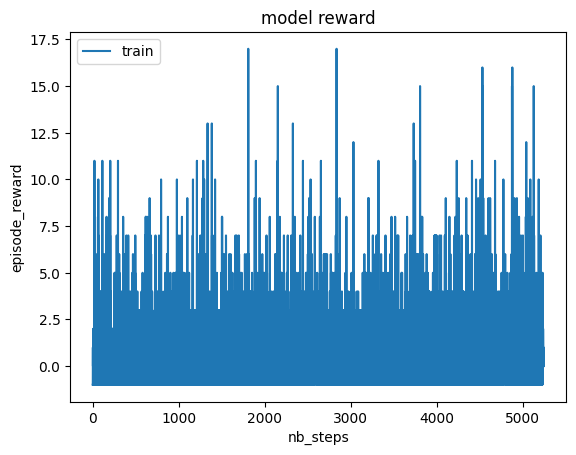

In [39]:
# summarize history for accuracy
plt.plot(history.history['episode_reward'])
#plt.plot(history.history['nb_episode_steps'])
plt.title('model reward')
plt.ylabel('episode_reward')
plt.xlabel('nb_steps')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [40]:
# After training is done, we save the final weights one more time.
dqn.save_weights(weights_filename, overwrite=True)

In [41]:
print('Final final weights were stored in', weights_filename)

Final final weights were stored in test_dqn_worker_weights.h5f


In [42]:
# After training is done, we save the final weights.
dqn.load_weights(weights_filename)

In [44]:
# Finally, evaluate our algorithm for 5 episodes.
dqn.test(env, nb_episodes=1, visualize=False) 

Testing for 1 episodes ...
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 6
The action is inside step: (542, 262) <class 'tuple'>
self.worker_pos: (542, 262)
worker_pos 542 262
The action is : (542, 262)
reward 5
reward: 10, done: False, info: {}, step: 1
action_n 11
The action is inside step: (337, 204) <class 'tuple'>
self.worker_pos: (337, 204)
worker_pos 337 204
The action is : (337, 204)
is_occupied 0
reward: -2, done: True, info: {}, step: 2
Episode 1: reward: 0.000, steps: 2


Example 2

https://www.programcreek.com/python/?code=PacktPublishing%2FDeep-Learning-Quick-Reference%2FDeep-Learning-Quick-Reference-master%2FChapter12%2Fdqn_breakout_test.py

In [45]:
import keras.backend as K

In [46]:
INPUT_SHAPE = (84, 84)
WINDOW_LENGTH = 3

In [47]:
np.random.seed(42)
env.seed(42)
num_actions = env.action_space.n

In [48]:
num_actions

20

In [49]:
def build_model(state_size, num_actions):
    input_shape = (3,) + state_size
    model = Sequential()
    model.add(Permute((2, 3, 1), input_shape=input_shape))

    '''
    
    if K.image_dim_ordering() == 'tf':
        # (width, height, channels)
        model.add(Permute((2, 3, 1), input_shape=input_shape))
    elif K.image_dim_ordering() == 'th':
        # (channels, width, height)
        model.add(Permute((1, 2, 3), input_shape=input_shape))
    else:
        raise RuntimeError('Unknown image_dim_ordering.')
    '''    
    

    model.add(Convolution2D(32, (8, 8), strides=(4, 4),kernel_initializer='he_normal'))
    model.add(Activation('relu'))
    model.add(Convolution2D(64, (4, 4), strides=(2, 2),kernel_initializer='he_normal'))
    model.add(Activation('relu'))
    model.add(Convolution2D(64, (3, 3), strides=(1, 1),kernel_initializer='he_normal'))
    model.add(Activation('relu'))
    model.add(Flatten())
    model.add(Dense(512))
    model.add(Activation('relu'))
    model.add(Dense(num_actions))
    model.add(Activation('linear'))
    print(model.summary())
    return model

In [50]:
model = build_model(INPUT_SHAPE, num_actions)
memory = SequentialMemory(limit=1000000, window_length=WINDOW_LENGTH)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 permute_1 (Permute)         (None, 84, 84, 3)         0         
                                                                 
 conv2d_3 (Conv2D)           (None, 20, 20, 32)        6176      
                                                                 
 activation_5 (Activation)   (None, 20, 20, 32)        0         
                                                                 
 conv2d_4 (Conv2D)           (None, 9, 9, 64)          32832     
                                                                 
 activation_6 (Activation)   (None, 9, 9, 64)          0         
                                                                 
 conv2d_5 (Conv2D)           (None, 7, 7, 64)          36928     
                                                                 
 activation_7 (Activation)   (None, 7, 7, 64)         

In [51]:
class AtariProcessor(Processor):
    def process_observation(self, observation):
        
        
       # if type(observation) == type(None):
       #     whiteFrame= 255 * np.ones((640,480,3), np.uint8)
       #     observation=whiteFrame
            
        assert observation.ndim == 3  # (height, width, channel)
        img = Image.fromarray(observation)
        img = img.resize((84, 84), Image.ANTIALIAS).convert('L')  # resize and convert to grayscale
        processed_observation = np.array(img)
        assert processed_observation.shape == (84, 84)
        return processed_observation.astype('uint8')  # saves storage in experience memory

    def process_state_batch(self, batch):
        # We could perform this processing step in `process_observation`. In this case, however,
        # we would need to store a `float32` array instead, which is 4x more memory intensive than
        # an `uint8` array. This matters if we store 1M observations.
        processed_batch = batch.astype('float32') / 255.
        return processed_batch

    def process_reward(self, reward):
        return np.clip(reward, -1., 1.)


In [52]:
processor = AtariProcessor()

In [54]:

policy = LinearAnnealedPolicy(EpsGreedyQPolicy(), attr='eps', value_max=1., value_min=.1, value_test=.05,
                              nb_steps=1000) #1000000)

In [55]:
def build_callbacks(env_name):
    checkpoint_weights_filename = 'dqn_' + env_name + '_weights_{step}.h5f'
    log_filename = 'dqn_{}_log.json'.format(env_name)
    callbacks = [ModelIntervalCheckpoint(checkpoint_weights_filename, interval=250000)]
    callbacks += [FileLogger(log_filename, interval=100)]
    return callbacks

In [59]:
dqn = DQNAgent(model=model, nb_actions=num_actions, policy=policy, memory=memory,
               processor=processor, nb_steps_warmup=50000, gamma=.99, target_model_update=10000,
               train_interval=4, delta_clip=1.)

In [60]:
ENV_NAME = 'Test-RL-v2'

In [61]:
dqn.compile(Adam(lr=.00025), metrics=['mae'])
callbacks = build_callbacks(ENV_NAME)

C:\Users\RMAGANAV\Anaconda3\envs\gym\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [62]:
history=dqn.fit(env, nb_steps=3000, callbacks=callbacks, log_interval=100000, visualize=False)

Training for 3000 steps ...
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
Interval 1 (0 steps performed)
action_n 14
The action is inside step: (372, 172) <class 'tuple'>
self.worker_pos: (372, 172)
worker_pos 372 172
The action is : (372, 172)
reward 5
reward: 10, done: False, info: {}, step: 1
     1/100000 [..............................] - ETA: 3:18:19 - reward: 1.0000action_n 6
The action is inside step: (542, 262) <class 'tuple'>
self.worker_pos: (542, 262)
worker_pos 542 262
The action is : (542, 262)
reward 5
reward: 10, done: False, info: {}, step: 2
action_n 10
The action is inside step: (506, 209) <class 'tuple'>
self.worker_pos: (506, 209)
worker_pos 506 209
The action is : (506, 209)
reward 2
reward: 4, done: False, info: {}, step: 3
action_n 3
The action is inside step: (557, 294) <class 'tuple'>
self.worker_pos: (557, 294)
worker_pos 557 294
The action is : (557, 2

C:\Users\RMAGANAV\Anaconda3\envs\gym\lib\site-packages\keras\engine\training_v1.py:2356: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 1
The action is inside step: (521, 311) <class 'tuple'>
self.worker_pos: (521, 311)
worker_pos 521 311
The action is : (521, 311)
reward 5
reward: 10, done: False, info: {}, step: 1
     5/100000 [..............................] - ETA: 49:51 - reward: 0.6000action_n 5
The action is inside step: (507, 278) <class 'tuple'>
self.worker_pos: (507, 278)
worker_pos 507 278
The action is : (507, 278)
reward 5
reward: 10, done: False, info: {}, step: 2
action_n 0
The action is inside step: (18, 694) <class 'tuple'>
self.worker_pos: (18, 694)
worker_pos 18 694
The action is : (18, 694)
is_occupied 0
reward: -2, done: True, info: {}, step: 3
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 9
The action is inside step: (423,

    35/100000 [..............................] - ETA: 51:29 - reward: 0.3714The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 2
The action is inside step: (188, 298) <class 'tuple'>
self.worker_pos: (188, 298)
worker_pos 188 298
The action is : (188, 298)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
    36/100000 [..............................] - ETA: 52:23 - reward: 0.3333The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 13
The action is inside step: (544, 174) <class 'tuple'>
self.worker_pos: (544, 174)
worker_pos 544 174
The action is : (544, 174)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
    37/100000 [..............................] - ETA: 53:19 - reward: 0.2973The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)

The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 4
The action is inside step: (423, 290) <class 'tuple'>
self.worker_pos: (423, 290)
worker_pos 423 290
The action is : (423, 290)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
    63/100000 [..............................] - ETA: 54:34 - reward: 0.2381The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 15
The action is inside step: (303, 171) <class 'tuple'>
self.worker_pos: (303, 171)
worker_pos 303 171
The action is : (303, 171)
reward 5
reward: 10, done: False, info: {}, step: 1
    64/100000 [..............................] - ETA: 55:06 - reward: 0.2500action_n 8
The action is inside step: (387, 254) <class 'tuple'>
self.worker_pos: (387, 254)
worker_pos 387 254
The action is : (387, 254)
reward 5
rewar

    90/100000 [..............................] - ETA: 55:10 - reward: 0.2000The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 7
The action is inside step: (456, 257) <class 'tuple'>
self.worker_pos: (456, 257)
worker_pos 456 257
The action is : (456, 257)
reward 5
reward: 10, done: False, info: {}, step: 1
action_n 1
The action is inside step: (521, 311) <class 'tuple'>
self.worker_pos: (521, 311)
worker_pos 521 311
The action is : (521, 311)
reward 5
reward: 10, done: False, info: {}, step: 2
    92/100000 [..............................] - ETA: 55:15 - reward: 0.2174action_n 0
The action is inside step: (18, 694) <class 'tuple'>
self.worker_pos: (18, 694)
worker_pos 18 694
The action is : (18, 694)
is_occupied 0
reward: -2, done: True, info: {}, step: 3
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -

   120/100000 [..............................] - ETA: 55:21 - reward: 0.2167The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 19
The action is inside step: (336, 137) <class 'tuple'>
self.worker_pos: (336, 137)
worker_pos 336 137
The action is : (336, 137)
reward 5
reward: 10, done: False, info: {}, step: 1
action_n 2
The action is inside step: (188, 298) <class 'tuple'>
self.worker_pos: (188, 298)
worker_pos 188 298
The action is : (188, 298)
is_occupied 0
reward: -2, done: True, info: {}, step: 2
   122/100000 [..............................] - ETA: 55:23 - reward: 0.2131The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 17
The action is inside step: (87, 169) <class 'tuple'>
self.worker_pos: (87, 169)
worker_pos 87 169
The action is : (87, 169)
is_occupied 0
rew

   147/100000 [..............................] - ETA: 55:40 - reward: 0.1973action_n 12
The action is inside step: (472, 175) <class 'tuple'>
self.worker_pos: (472, 175)
worker_pos 472 175
The action is : (472, 175)
reward 2
reward: 4, done: False, info: {}, step: 2
action_n 13
The action is inside step: (544, 174) <class 'tuple'>
self.worker_pos: (544, 174)
worker_pos 544 174
The action is : (544, 174)
is_occupied 0
reward: -2, done: True, info: {}, step: 3
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 16
The action is inside step: (423, 169) <class 'tuple'>
self.worker_pos: (423, 169)
worker_pos 423 169
The action is : (423, 169)
reward 1
reward: 2, done: False, info: {}, step: 1
   150/100000 [..............................] - ETA: 55:37 - reward: 0.2000action_n 9
The action is inside step: (423, 223) <class 'tuple'>
self.worker_pos: (423, 223)
worker_pos 423 223
The 

   173/100000 [..............................] - ETA: 56:32 - reward: 0.1445The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 13
The action is inside step: (544, 174) <class 'tuple'>
self.worker_pos: (544, 174)
worker_pos 544 174
The action is : (544, 174)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
   174/100000 [..............................] - ETA: 56:42 - reward: 0.1379The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 1
The action is inside step: (521, 311) <class 'tuple'>
self.worker_pos: (521, 311)
worker_pos 521 311
The action is : (521, 311)
reward 5
reward: 10, done: False, info: {}, step: 1
action_n 4
The action is inside step: (423, 290) <class 'tuple'>
self.worker_pos: (423, 290)
worker_pos 423 290
The action is : (423, 290)
is_occupied 0


   199/100000 [..............................] - ETA: 57:32 - reward: 0.1156The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 13
The action is inside step: (544, 174) <class 'tuple'>
self.worker_pos: (544, 174)
worker_pos 544 174
The action is : (544, 174)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 19
The action is inside step: (336, 137) <class 'tuple'>
self.worker_pos: (336, 137)
worker_pos 336 137
The action is : (336, 137)
reward 5
reward: 10, done: False, info: {}, step: 1
   201/100000 [..............................] - ETA: 57:45 - reward: 0.1144action_n 15
The action is inside step: (303, 171) <class 'tuple'>
self.worker_pos: (303, 171)
worker_pos 303 171
The action is : (303, 171)
reward 5
rew

   224/100000 [..............................] - ETA: 58:25 - reward: 0.0714The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 1
The action is inside step: (521, 311) <class 'tuple'>
self.worker_pos: (521, 311)
worker_pos 521 311
The action is : (521, 311)
reward 5
reward: 10, done: False, info: {}, step: 1
   225/100000 [..............................] - ETA: 58:31 - reward: 0.0756action_n 1
The action is inside step: (521, 311) <class 'tuple'>
self.worker_pos: (521, 311)
worker_pos 521 311
The action is : (521, 311)
reward 5
reward: 10, done: False, info: {}, step: 2
action_n 14
The action is inside step: (372, 172) <class 'tuple'>
self.worker_pos: (372, 172)
worker_pos 372 172
The action is : (372, 172)
reward 5
reward: 10, done: False, info: {}, step: 3
action_n 1
The action is inside step: (521, 311) <class 'tuple'>
self.worker_pos: (521, 311)
worker_pos 521 311
The acti

   255/100000 [..............................] - ETA: 57:13 - reward: 0.1216action_n 18
The action is inside step: (508, 138) <class 'tuple'>
self.worker_pos: (508, 138)
worker_pos 508 138
The action is : (508, 138)
reward 1
reward: 2, done: False, info: {}, step: 2
action_n 14
The action is inside step: (372, 172) <class 'tuple'>
self.worker_pos: (372, 172)
worker_pos 372 172
The action is : (372, 172)
reward 5
reward: 10, done: False, info: {}, step: 3
action_n 13
The action is inside step: (544, 174) <class 'tuple'>
self.worker_pos: (544, 174)
worker_pos 544 174
The action is : (544, 174)
is_occupied 0
reward: -2, done: True, info: {}, step: 4
   258/100000 [..............................] - ETA: 57:00 - reward: 0.1240The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 13
The action is inside step: (544, 174) <class 'tuple'>
self.worker_pos: (544, 174)
worker_pos 544 174
Th

   284/100000 [..............................] - ETA: 56:52 - reward: 0.1338The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 13
The action is inside step: (544, 174) <class 'tuple'>
self.worker_pos: (544, 174)
worker_pos 544 174
The action is : (544, 174)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 3
The action is inside step: (557, 294) <class 'tuple'>
self.worker_pos: (557, 294)
worker_pos 557 294
The action is : (557, 294)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
   286/100000 [..............................] - ETA: 57:03 - reward: 0.1259The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, ste

   309/100000 [..............................] - ETA: 57:43 - reward: 0.1133The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 19
The action is inside step: (336, 137) <class 'tuple'>
self.worker_pos: (336, 137)
worker_pos 336 137
The action is : (336, 137)
reward 5
reward: 10, done: False, info: {}, step: 1
   310/100000 [..............................] - ETA: 57:50 - reward: 0.1161action_n 13
The action is inside step: (544, 174) <class 'tuple'>
self.worker_pos: (544, 174)
worker_pos 544 174
The action is : (544, 174)
is_occupied 0
reward: -2, done: True, info: {}, step: 2
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 13
The action is inside step: (544, 174) <class 'tuple'>
self.worker_pos: (544, 174)
worker_pos 544 174
The action is : (544, 174)
is_occupied 

action_n 13
The action is inside step: (544, 174) <class 'tuple'>
self.worker_pos: (544, 174)
worker_pos 544 174
The action is : (544, 174)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
   337/100000 [..............................] - ETA: 58:02 - reward: 0.0979The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 14
The action is inside step: (372, 172) <class 'tuple'>
self.worker_pos: (372, 172)
worker_pos 372 172
The action is : (372, 172)
reward 5
reward: 10, done: False, info: {}, step: 1
   338/100000 [..............................] - ETA: 58:08 - reward: 0.1006action_n 8
The action is inside step: (387, 254) <class 'tuple'>
self.worker_pos: (387, 254)
worker_pos 387 254
The action is : (387, 254)
reward 5
reward: 10, done: False, info: {}, step: 2
action_n 8
The action is inside step: (387, 254) <class 'tuple'>
self.worker_pos: (387, 254)
worker_pos 387 254
The

   363/100000 [..............................] - ETA: 58:27 - reward: 0.0909The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 14
The action is inside step: (372, 172) <class 'tuple'>
self.worker_pos: (372, 172)
worker_pos 372 172
The action is : (372, 172)
reward 5
reward: 10, done: False, info: {}, step: 1
   364/100000 [..............................] - ETA: 58:32 - reward: 0.0934action_n 18
The action is inside step: (508, 138) <class 'tuple'>
self.worker_pos: (508, 138)
worker_pos 508 138
The action is : (508, 138)
reward 1
reward: 2, done: False, info: {}, step: 2
action_n 14
The action is inside step: (372, 172) <class 'tuple'>
self.worker_pos: (372, 172)
worker_pos 372 172
The action is : (372, 172)
reward 5
reward: 10, done: False, info: {}, step: 3
action_n 13
The action is inside step: (544, 174) <class 'tuple'>
self.worker_pos: (544, 174)
worker_pos 544 174
The ac

   388/100000 [..............................] - ETA: 58:57 - reward: 0.0825action_n 4
The action is inside step: (423, 290) <class 'tuple'>
self.worker_pos: (423, 290)
worker_pos 423 290
The action is : (423, 290)
is_occupied 0
reward: -2, done: True, info: {}, step: 2
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 13
The action is inside step: (544, 174) <class 'tuple'>
self.worker_pos: (544, 174)
worker_pos 544 174
The action is : (544, 174)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
   390/100000 [..............................] - ETA: 58:58 - reward: 0.0769The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 5
The action is inside step: (507, 278) <class 'tuple'>
self.worker_pos: (507, 278)
worker_pos 507 278
The action is : (507, 278)
reward 5
r

reward: -2, done: True, info: {}, step: 0
action_n 18
The action is inside step: (508, 138) <class 'tuple'>
self.worker_pos: (508, 138)
worker_pos 508 138
The action is : (508, 138)
reward 1
reward: 2, done: False, info: {}, step: 1
action_n 13
The action is inside step: (544, 174) <class 'tuple'>
self.worker_pos: (544, 174)
worker_pos 544 174
The action is : (544, 174)
is_occupied 0
reward: -2, done: True, info: {}, step: 2
   414/100000 [..............................] - ETA: 59:29 - reward: 0.0580The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 13
The action is inside step: (544, 174) <class 'tuple'>
self.worker_pos: (544, 174)
worker_pos 544 174
The action is : (544, 174)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
   415/100000 [..............................] - ETA: 59:34 - reward: 0.0554The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0

   437/100000 [..............................] - ETA: 59:58 - reward: 0.0389The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 0
The action is inside step: (18, 694) <class 'tuple'>
self.worker_pos: (18, 694)
worker_pos 18 694
The action is : (18, 694)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
   438/100000 [..............................] - ETA: 1:00:01 - reward: 0.0365The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 17
The action is inside step: (87, 169) <class 'tuple'>
self.worker_pos: (87, 169)
worker_pos 87 169
The action is : (87, 169)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
   439/100000 [..............................] - ETA: 1:00:05 - reward: 0.0342The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
wor

action_n 1
The action is inside step: (521, 311) <class 'tuple'>
self.worker_pos: (521, 311)
worker_pos 521 311
The action is : (521, 311)
reward 5
reward: 10, done: False, info: {}, step: 1
   460/100000 [..............................] - ETA: 1:00:47 - reward: 0.0130action_n 13
The action is inside step: (544, 174) <class 'tuple'>
self.worker_pos: (544, 174)
worker_pos 544 174
The action is : (544, 174)
is_occupied 0
reward: -2, done: True, info: {}, step: 2
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 13
The action is inside step: (544, 174) <class 'tuple'>
self.worker_pos: (544, 174)
worker_pos 544 174
The action is : (544, 174)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
   462/100000 [..............................] - ETA: 1:00:50 - reward: 0.0087The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0

reward: -2, done: True, info: {}, step: 0
action_n 13
The action is inside step: (544, 174) <class 'tuple'>
self.worker_pos: (544, 174)
worker_pos 544 174
The action is : (544, 174)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
   486/100000 [..............................] - ETA: 1:00:56 - reward: 0.0041The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 1
The action is inside step: (521, 311) <class 'tuple'>
self.worker_pos: (521, 311)
worker_pos 521 311
The action is : (521, 311)
reward 5
reward: 10, done: False, info: {}, step: 1
   487/100000 [..............................] - ETA: 1:00:59 - reward: 0.0062action_n 14
The action is inside step: (372, 172) <class 'tuple'>
self.worker_pos: (372, 172)
worker_pos 372 172
The action is : (372, 172)
reward 5
reward: 10, done: False, info: {}, step: 2
action_n 13
The action is inside step: (544, 174) <class 'tuple'>
sel

   509/100000 [..............................] - ETA: 1:01:19 - reward: -0.0059action_n 7
The action is inside step: (456, 257) <class 'tuple'>
self.worker_pos: (456, 257)
worker_pos 456 257
The action is : (456, 257)
reward 5
reward: 10, done: False, info: {}, step: 2
action_n 13
The action is inside step: (544, 174) <class 'tuple'>
self.worker_pos: (544, 174)
worker_pos 544 174
The action is : (544, 174)
is_occupied 0
reward: -2, done: True, info: {}, step: 3
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 13
The action is inside step: (544, 174) <class 'tuple'>
self.worker_pos: (544, 174)
worker_pos 544 174
The action is : (544, 174)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
   512/100000 [..............................] - ETA: 1:01:16 - reward: -0.0078The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : 

   533/100000 [..............................] - ETA: 1:01:40 - reward: -0.0206action_n 13
The action is inside step: (544, 174) <class 'tuple'>
self.worker_pos: (544, 174)
worker_pos 544 174
The action is : (544, 174)
is_occupied 0
reward: -2, done: True, info: {}, step: 2
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 13
The action is inside step: (544, 174) <class 'tuple'>
self.worker_pos: (544, 174)
worker_pos 544 174
The action is : (544, 174)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
   535/100000 [..............................] - ETA: 1:01:40 - reward: -0.0243The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 13
The action is inside step: (544, 174) <class 'tuple'>
self.worker_pos: (544, 174)
worker_pos 544 174
The action is : (544, 174)
is

   557/100000 [..............................] - ETA: 1:01:59 - reward: -0.0377The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 11
The action is inside step: (337, 204) <class 'tuple'>
self.worker_pos: (337, 204)
worker_pos 337 204
The action is : (337, 204)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
   558/100000 [..............................] - ETA: 1:02:02 - reward: -0.0394The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 13
The action is inside step: (544, 174) <class 'tuple'>
self.worker_pos: (544, 174)
worker_pos 544 174
The action is : (544, 174)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
   559/100000 [..............................] - ETA: 1:02:05 - reward: -0.0411The action is inside step: (0, 0) <class 'tuple'>
self.worker_p

   583/100000 [..............................] - ETA: 1:02:12 - reward: -0.0429The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 18
The action is inside step: (508, 138) <class 'tuple'>
self.worker_pos: (508, 138)
worker_pos 508 138
The action is : (508, 138)
reward 1
reward: 2, done: False, info: {}, step: 1
   584/100000 [..............................] - ETA: 1:02:16 - reward: -0.0411action_n 9
The action is inside step: (423, 223) <class 'tuple'>
self.worker_pos: (423, 223)
worker_pos 423 223
The action is : (423, 223)
reward 5
reward: 10, done: False, info: {}, step: 2
action_n 17
The action is inside step: (87, 169) <class 'tuple'>
self.worker_pos: (87, 169)
worker_pos 87 169
The action is : (87, 169)
is_occupied 0
reward: -2, done: True, info: {}, step: 3
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
re

The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 1
The action is inside step: (521, 311) <class 'tuple'>
self.worker_pos: (521, 311)
worker_pos 521 311
The action is : (521, 311)
reward 5
reward: 10, done: False, info: {}, step: 1
   608/100000 [..............................] - ETA: 1:02:33 - reward: -0.0526action_n 13
The action is inside step: (544, 174) <class 'tuple'>
self.worker_pos: (544, 174)
worker_pos 544 174
The action is : (544, 174)
is_occupied 0
reward: -2, done: True, info: {}, step: 2
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 10
The action is inside step: (506, 209) <class 'tuple'>
self.worker_pos: (506, 209)
worker_pos 506 209
The action is : (506, 209)
reward 2
reward: 4, done: False, info: {}, step: 1
   610/100000 [....................

reward: -2, done: True, info: {}, step: 0
action_n 13
The action is inside step: (544, 174) <class 'tuple'>
self.worker_pos: (544, 174)
worker_pos 544 174
The action is : (544, 174)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
   633/100000 [..............................] - ETA: 1:02:39 - reward: -0.0585The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 17
The action is inside step: (87, 169) <class 'tuple'>
self.worker_pos: (87, 169)
worker_pos 87 169
The action is : (87, 169)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
   634/100000 [..............................] - ETA: 1:02:41 - reward: -0.0599The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 10
The action is inside step: (506, 209) <class 'tuple'>
self.worker_pos: (506, 209)
worker_pos

   655/100000 [..............................] - ETA: 1:03:00 - reward: -0.0718action_n 6
The action is inside step: (542, 262) <class 'tuple'>
self.worker_pos: (542, 262)
worker_pos 542 262
The action is : (542, 262)
reward 5
reward: 10, done: False, info: {}, step: 2
action_n 13
The action is inside step: (544, 174) <class 'tuple'>
self.worker_pos: (544, 174)
worker_pos 544 174
The action is : (544, 174)
is_occupied 0
reward: -2, done: True, info: {}, step: 3
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 13
The action is inside step: (544, 174) <class 'tuple'>
self.worker_pos: (544, 174)
worker_pos 544 174
The action is : (544, 174)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
   658/100000 [..............................] - ETA: 1:02:57 - reward: -0.0729The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : 

   679/100000 [..............................] - ETA: 1:03:17 - reward: -0.0839The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 13
The action is inside step: (544, 174) <class 'tuple'>
self.worker_pos: (544, 174)
worker_pos 544 174
The action is : (544, 174)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 13
The action is inside step: (544, 174) <class 'tuple'>
self.worker_pos: (544, 174)
worker_pos 544 174
The action is : (544, 174)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
   681/100000 [..............................] - ETA: 1:03:20 - reward: -0.0866The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: 

   701/100000 [..............................] - ETA: 1:03:37 - reward: -0.1013The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 13
The action is inside step: (544, 174) <class 'tuple'>
self.worker_pos: (544, 174)
worker_pos 544 174
The action is : (544, 174)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
   702/100000 [..............................] - ETA: 1:03:39 - reward: -0.1026The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 13
The action is inside step: (544, 174) <class 'tuple'>
self.worker_pos: (544, 174)
worker_pos 544 174
The action is : (544, 174)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
   703/100000 [..............................] - ETA: 1:03:42 - reward: -0.1038The action is inside step: (0, 0) <class 'tuple'>
self.worker_p

   723/100000 [..............................] - ETA: 1:04:06 - reward: -0.1203The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 1
The action is inside step: (521, 311) <class 'tuple'>
self.worker_pos: (521, 311)
worker_pos 521 311
The action is : (521, 311)
reward 5
reward: 10, done: False, info: {}, step: 1
   724/100000 [..............................] - ETA: 1:04:08 - reward: -0.1188action_n 5
The action is inside step: (507, 278) <class 'tuple'>
self.worker_pos: (507, 278)
worker_pos 507 278
The action is : (507, 278)
reward 5
reward: 10, done: False, info: {}, step: 2
action_n 9
The action is inside step: (423, 223) <class 'tuple'>
self.worker_pos: (423, 223)
worker_pos 423 223
The action is : (423, 223)
reward 5
reward: 10, done: False, info: {}, step: 3
action_n 13
The action is inside step: (544, 174) <class 'tuple'>
self.worker_pos: (544, 174)
worker_pos 544 174
Th

   745/100000 [..............................] - ETA: 1:04:24 - reward: -0.1356The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 13
The action is inside step: (544, 174) <class 'tuple'>
self.worker_pos: (544, 174)
worker_pos 544 174
The action is : (544, 174)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
   746/100000 [..............................] - ETA: 1:04:26 - reward: -0.1367The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 16
The action is inside step: (423, 169) <class 'tuple'>
self.worker_pos: (423, 169)
worker_pos 423 169
The action is : (423, 169)
reward 1
reward: 2, done: False, info: {}, step: 1
action_n 13
The action is inside step: (544, 174) <class 'tuple'>
self.worker_pos: (544, 174)
worker_pos 544 174
The action is : (544, 174)
is_occu

The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 11
The action is inside step: (337, 204) <class 'tuple'>
self.worker_pos: (337, 204)
worker_pos 337 204
The action is : (337, 204)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
   769/100000 [..............................] - ETA: 1:04:36 - reward: -0.1469The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 2
The action is inside step: (188, 298) <class 'tuple'>
self.worker_pos: (188, 298)
worker_pos 188 298
The action is : (188, 298)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
   770/100000 [..............................] - ETA: 1:04:37 - reward: -0.1481The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {

The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 13
The action is inside step: (544, 174) <class 'tuple'>
self.worker_pos: (544, 174)
worker_pos 544 174
The action is : (544, 174)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
   792/100000 [..............................] - ETA: 1:04:48 - reward: -0.1566The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 13
The action is inside step: (544, 174) <class 'tuple'>
self.worker_pos: (544, 174)
worker_pos 544 174
The action is : (544, 174)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
   793/100000 [..............................] - ETA: 1:04:50 - reward: -0.1576The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: 

   814/100000 [..............................] - ETA: 1:04:57 - reward: -0.1622The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 3
The action is inside step: (557, 294) <class 'tuple'>
self.worker_pos: (557, 294)
worker_pos 557 294
The action is : (557, 294)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
   815/100000 [..............................] - ETA: 1:04:59 - reward: -0.1632The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 13
The action is inside step: (544, 174) <class 'tuple'>
self.worker_pos: (544, 174)
worker_pos 544 174
The action is : (544, 174)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
   816/100000 [..............................] - ETA: 1:05:01 - reward: -0.1642The action is inside step: (0, 0) <class 'tuple'>
self.worker_po

reward: -2, done: True, info: {}, step: 2
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 13
The action is inside step: (544, 174) <class 'tuple'>
self.worker_pos: (544, 174)
worker_pos 544 174
The action is : (544, 174)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
   837/100000 [..............................] - ETA: 1:05:30 - reward: -0.1732The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 11
The action is inside step: (337, 204) <class 'tuple'>
self.worker_pos: (337, 204)
worker_pos 337 204
The action is : (337, 204)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
   838/100000 [..............................] - ETA: 1:05:31 - reward: -0.1742The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action 

   857/100000 [..............................] - ETA: 1:06:00 - reward: -0.1879The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 13
The action is inside step: (544, 174) <class 'tuple'>
self.worker_pos: (544, 174)
worker_pos 544 174
The action is : (544, 174)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
   858/100000 [..............................] - ETA: 1:06:03 - reward: -0.1888The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 13
The action is inside step: (544, 174) <class 'tuple'>
self.worker_pos: (544, 174)
worker_pos 544 174
The action is : (544, 174)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
   859/100000 [..............................] - ETA: 1:06:06 - reward: -0.1898The action is inside step: (0, 0) <class 'tuple'>
self.worker_p

   880/100000 [..............................] - ETA: 1:06:17 - reward: -0.1977The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 13
The action is inside step: (544, 174) <class 'tuple'>
self.worker_pos: (544, 174)
worker_pos 544 174
The action is : (544, 174)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
   881/100000 [..............................] - ETA: 1:06:18 - reward: -0.1986The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 4
The action is inside step: (423, 290) <class 'tuple'>
self.worker_pos: (423, 290)
worker_pos 423 290
The action is : (423, 290)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
   882/100000 [..............................] - ETA: 1:06:20 - reward: -0.1995The action is inside step: (0, 0) <class 'tuple'>
self.worker_po

action_n 13
The action is inside step: (544, 174) <class 'tuple'>
self.worker_pos: (544, 174)
worker_pos 544 174
The action is : (544, 174)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
   903/100000 [..............................] - ETA: 1:06:26 - reward: -0.2071The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 13
The action is inside step: (544, 174) <class 'tuple'>
self.worker_pos: (544, 174)
worker_pos 544 174
The action is : (544, 174)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
   904/100000 [..............................] - ETA: 1:06:27 - reward: -0.2080The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 13
The action is inside step: (544, 174) <class 'tuple'>
self.worker_pos: (544, 174)
worker_pos 544 174
The action is : (544, 174)
is

action_n 13
The action is inside step: (544, 174) <class 'tuple'>
self.worker_pos: (544, 174)
worker_pos 544 174
The action is : (544, 174)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
   925/100000 [..............................] - ETA: 1:06:38 - reward: -0.2195The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 13
The action is inside step: (544, 174) <class 'tuple'>
self.worker_pos: (544, 174)
worker_pos 544 174
The action is : (544, 174)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
   926/100000 [..............................] - ETA: 1:06:40 - reward: -0.2203The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 13
The action is inside step: (544, 174) <class 'tuple'>
self.worker_pos: (544, 174)
worker_pos 544 174
The action is : (544, 174)
is

action_n 13
The action is inside step: (544, 174) <class 'tuple'>
self.worker_pos: (544, 174)
worker_pos 544 174
The action is : (544, 174)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
   948/100000 [..............................] - ETA: 1:06:46 - reward: -0.2278The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 13
The action is inside step: (544, 174) <class 'tuple'>
self.worker_pos: (544, 174)
worker_pos 544 174
The action is : (544, 174)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 13
The action is inside step: (544, 174) <class 'tuple'>
self.worker_pos: (544, 174)
worker_pos 544 174
The action is : (544, 174)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
   950/100000 [..........

   968/100000 [..............................] - ETA: 1:07:07 - reward: -0.2438The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 13
The action is inside step: (544, 174) <class 'tuple'>
self.worker_pos: (544, 174)
worker_pos 544 174
The action is : (544, 174)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
   969/100000 [..............................] - ETA: 1:07:08 - reward: -0.2446The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 13
The action is inside step: (544, 174) <class 'tuple'>
self.worker_pos: (544, 174)
worker_pos 544 174
The action is : (544, 174)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
   970/100000 [..............................] - ETA: 1:07:09 - reward: -0.2454The action is inside step: (0, 0) <class 'tuple'>
self.worker_p

   991/100000 [..............................] - ETA: 1:07:17 - reward: -0.2533The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 13
The action is inside step: (544, 174) <class 'tuple'>
self.worker_pos: (544, 174)
worker_pos 544 174
The action is : (544, 174)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 13
The action is inside step: (544, 174) <class 'tuple'>
self.worker_pos: (544, 174)
worker_pos 544 174
The action is : (544, 174)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
   993/100000 [..............................] - ETA: 1:07:18 - reward: -0.2548The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: 

action_n 14
The action is inside step: (372, 172) <class 'tuple'>
self.worker_pos: (372, 172)
worker_pos 372 172
The action is : (372, 172)
reward 5
reward: 10, done: False, info: {}, step: 1
  1013/100000 [..............................] - ETA: 1:07:35 - reward: -0.2655action_n 16
The action is inside step: (423, 169) <class 'tuple'>
self.worker_pos: (423, 169)
worker_pos 423 169
The action is : (423, 169)
reward 1
reward: 2, done: False, info: {}, step: 2
action_n 13
The action is inside step: (544, 174) <class 'tuple'>
self.worker_pos: (544, 174)
worker_pos 544 174
The action is : (544, 174)
is_occupied 0
reward: -2, done: True, info: {}, step: 3
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 13
The action is inside step: (544, 174) <class 'tuple'>
self.worker_pos: (544, 174)
worker_pos 544 174
The action is : (544, 174)
is_occupied 0
reward: -2, done: True, info: {}, 

  1033/100000 [..............................] - ETA: 1:07:52 - reward: -0.2778The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 13
The action is inside step: (544, 174) <class 'tuple'>
self.worker_pos: (544, 174)
worker_pos 544 174
The action is : (544, 174)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 13
The action is inside step: (544, 174) <class 'tuple'>
self.worker_pos: (544, 174)
worker_pos 544 174
The action is : (544, 174)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
  1035/100000 [..............................] - ETA: 1:07:54 - reward: -0.2792The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: 

  1054/100000 [..............................] - ETA: 1:08:07 - reward: -0.2903The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 13
The action is inside step: (544, 174) <class 'tuple'>
self.worker_pos: (544, 174)
worker_pos 544 174
The action is : (544, 174)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
  1055/100000 [..............................] - ETA: 1:08:08 - reward: -0.2910The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 13
The action is inside step: (544, 174) <class 'tuple'>
self.worker_pos: (544, 174)
worker_pos 544 174
The action is : (544, 174)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: 

  1075/100000 [..............................] - ETA: 1:08:23 - reward: -0.3023The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 13
The action is inside step: (544, 174) <class 'tuple'>
self.worker_pos: (544, 174)
worker_pos 544 174
The action is : (544, 174)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
  1076/100000 [..............................] - ETA: 1:08:24 - reward: -0.3030The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 13
The action is inside step: (544, 174) <class 'tuple'>
self.worker_pos: (544, 174)
worker_pos 544 174
The action is : (544, 174)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
  1077/100000 [..............................] - ETA: 1:08:26 - reward: -0.3036The action is inside step: (0, 0) <class 'tuple'>
self.worker_p

  1097/100000 [..............................] - ETA: 1:08:34 - reward: -0.3108action_n 13
The action is inside step: (544, 174) <class 'tuple'>
self.worker_pos: (544, 174)
worker_pos 544 174
The action is : (544, 174)
is_occupied 0
reward: -2, done: True, info: {}, step: 2
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 13
The action is inside step: (544, 174) <class 'tuple'>
self.worker_pos: (544, 174)
worker_pos 544 174
The action is : (544, 174)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
  1099/100000 [..............................] - ETA: 1:08:33 - reward: -0.3121The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 13
The action is inside step: (544, 174) <class 'tuple'>
self.worker_pos: (544, 174)
worker_pos 544 174
The action is : (544, 174)
is

reward: -2, done: True, info: {}, step: 0
action_n 13
The action is inside step: (544, 174) <class 'tuple'>
self.worker_pos: (544, 174)
worker_pos 544 174
The action is : (544, 174)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
  1120/100000 [..............................] - ETA: 1:08:41 - reward: -0.3179The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 13
The action is inside step: (544, 174) <class 'tuple'>
self.worker_pos: (544, 174)
worker_pos 544 174
The action is : (544, 174)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
  1121/100000 [..............................] - ETA: 1:08:42 - reward: -0.3185The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 13
The action is inside step: (544, 174) <class 'tuple'>
self.worker_pos: (544, 174)
worker

The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 13
The action is inside step: (544, 174) <class 'tuple'>
self.worker_pos: (544, 174)
worker_pos 544 174
The action is : (544, 174)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
  1141/100000 [..............................] - ETA: 1:08:56 - reward: -0.3304The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 13
The action is inside step: (544, 174) <class 'tuple'>
self.worker_pos: (544, 174)
worker_pos 544 174
The action is : (544, 174)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
  1142/100000 [..............................] - ETA: 1:08:57 - reward: -0.3310The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: 

  1161/100000 [..............................] - ETA: 1:09:07 - reward: -0.3402The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 13
The action is inside step: (544, 174) <class 'tuple'>
self.worker_pos: (544, 174)
worker_pos 544 174
The action is : (544, 174)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
  1162/100000 [..............................] - ETA: 1:09:08 - reward: -0.3408The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 13
The action is inside step: (544, 174) <class 'tuple'>
self.worker_pos: (544, 174)
worker_pos 544 174
The action is : (544, 174)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: 

  1181/100000 [..............................] - ETA: 1:09:21 - reward: -0.3514The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 13
The action is inside step: (544, 174) <class 'tuple'>
self.worker_pos: (544, 174)
worker_pos 544 174
The action is : (544, 174)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 13
The action is inside step: (544, 174) <class 'tuple'>
self.worker_pos: (544, 174)
worker_pos 544 174
The action is : (544, 174)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
  1183/100000 [..............................] - ETA: 1:09:22 - reward: -0.3525The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: 

  1202/100000 [..............................] - ETA: 1:09:31 - reward: -0.3611The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 13
The action is inside step: (544, 174) <class 'tuple'>
self.worker_pos: (544, 174)
worker_pos 544 174
The action is : (544, 174)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
  1203/100000 [..............................] - ETA: 1:09:32 - reward: -0.3616The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 13
The action is inside step: (544, 174) <class 'tuple'>
self.worker_pos: (544, 174)
worker_pos 544 174
The action is : (544, 174)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
  1204/100000 [..............................] - ETA: 1:09:32 - reward: -0.3621The action is inside step: (0, 0) <class 'tuple'>
self.worker_p

  1223/100000 [..............................] - ETA: 1:09:42 - reward: -0.3704The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 13
The action is inside step: (544, 174) <class 'tuple'>
self.worker_pos: (544, 174)
worker_pos 544 174
The action is : (544, 174)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
  1224/100000 [..............................] - ETA: 1:09:43 - reward: -0.3709The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 13
The action is inside step: (544, 174) <class 'tuple'>
self.worker_pos: (544, 174)
worker_pos 544 174
The action is : (544, 174)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
  1225/100000 [..............................] - ETA: 1:09:43 - reward: -0.3714The action is inside step: (0, 0) <class 'tuple'>
self.worker_p

  1245/100000 [..............................] - ETA: 1:09:47 - reward: -0.3767The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 13
The action is inside step: (544, 174) <class 'tuple'>
self.worker_pos: (544, 174)
worker_pos 544 174
The action is : (544, 174)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
  1246/100000 [..............................] - ETA: 1:09:48 - reward: -0.3772The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 13
The action is inside step: (544, 174) <class 'tuple'>
self.worker_pos: (544, 174)
worker_pos 544 174
The action is : (544, 174)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
  1247/100000 [..............................] - ETA: 1:09:49 - reward: -0.3777The action is inside step: (0, 0) <class 'tuple'>
self.worker_p

  1266/100000 [..............................] - ETA: 1:09:58 - reward: -0.3870The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 13
The action is inside step: (544, 174) <class 'tuple'>
self.worker_pos: (544, 174)
worker_pos 544 174
The action is : (544, 174)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
  1267/100000 [..............................] - ETA: 1:09:59 - reward: -0.3875The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 5
The action is inside step: (507, 278) <class 'tuple'>
self.worker_pos: (507, 278)
worker_pos 507 278
The action is : (507, 278)
reward 5
reward: 10, done: False, info: {}, step: 1
  1268/100000 [..............................] - ETA: 1:10:00 - reward: -0.3864action_n 9
The action is inside step: (423, 223) <class 'tuple'>
sel

  1287/100000 [..............................] - ETA: 1:10:13 - reward: -0.3908The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 13
The action is inside step: (544, 174) <class 'tuple'>
self.worker_pos: (544, 174)
worker_pos 544 174
The action is : (544, 174)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
  1288/100000 [..............................] - ETA: 1:10:17 - reward: -0.3913The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 13
The action is inside step: (544, 174) <class 'tuple'>
self.worker_pos: (544, 174)
worker_pos 544 174
The action is : (544, 174)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
  1289/100000 [..............................] - ETA: 1:10:20 - reward: -0.3918The action is inside step: (0, 0) <class 'tuple'>
self.worker_p

  1307/100000 [..............................] - ETA: 1:10:36 - reward: -0.3971action_n 13
The action is inside step: (544, 174) <class 'tuple'>
self.worker_pos: (544, 174)
worker_pos 544 174
The action is : (544, 174)
is_occupied 0
reward: -2, done: True, info: {}, step: 2
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 13
The action is inside step: (544, 174) <class 'tuple'>
self.worker_pos: (544, 174)
worker_pos 544 174
The action is : (544, 174)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
  1309/100000 [..............................] - ETA: 1:10:35 - reward: -0.3980The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 13
The action is inside step: (544, 174) <class 'tuple'>
self.worker_pos: (544, 174)
worker_pos 544 174
The action is : (544, 174)
is

  1328/100000 [..............................] - ETA: 1:10:43 - reward: -0.4021action_n 13
The action is inside step: (544, 174) <class 'tuple'>
self.worker_pos: (544, 174)
worker_pos 544 174
The action is : (544, 174)
is_occupied 0
reward: -2, done: True, info: {}, step: 2
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 13
The action is inside step: (544, 174) <class 'tuple'>
self.worker_pos: (544, 174)
worker_pos 544 174
The action is : (544, 174)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
  1330/100000 [..............................] - ETA: 1:10:42 - reward: -0.4030The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 13
The action is inside step: (544, 174) <class 'tuple'>
self.worker_pos: (544, 174)
worker_pos 544 174
The action is : (544, 174)
is

  1350/100000 [..............................] - ETA: 1:10:47 - reward: -0.4089The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 13
The action is inside step: (544, 174) <class 'tuple'>
self.worker_pos: (544, 174)
worker_pos 544 174
The action is : (544, 174)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
  1351/100000 [..............................] - ETA: 1:10:48 - reward: -0.4093The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 13
The action is inside step: (544, 174) <class 'tuple'>
self.worker_pos: (544, 174)
worker_pos 544 174
The action is : (544, 174)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: 

  1371/100000 [..............................] - ETA: 1:10:57 - reward: -0.4165action_n 0
The action is inside step: (18, 694) <class 'tuple'>
self.worker_pos: (18, 694)
worker_pos 18 694
The action is : (18, 694)
is_occupied 0
reward: -2, done: True, info: {}, step: 2
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 13
The action is inside step: (544, 174) <class 'tuple'>
self.worker_pos: (544, 174)
worker_pos 544 174
The action is : (544, 174)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
  1373/100000 [..............................] - ETA: 1:10:56 - reward: -0.4173The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 17
The action is inside step: (87, 169) <class 'tuple'>
self.worker_pos: (87, 169)
worker_pos 87 169
The action is : (87, 169)
is_occupied

  1392/100000 [..............................] - ETA: 1:11:02 - reward: -0.4239The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 13
The action is inside step: (544, 174) <class 'tuple'>
self.worker_pos: (544, 174)
worker_pos 544 174
The action is : (544, 174)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
  1393/100000 [..............................] - ETA: 1:11:02 - reward: -0.4243The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 13
The action is inside step: (544, 174) <class 'tuple'>
self.worker_pos: (544, 174)
worker_pos 544 174
The action is : (544, 174)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: 

  1412/100000 [..............................] - ETA: 1:11:12 - reward: -0.4320The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 13
The action is inside step: (544, 174) <class 'tuple'>
self.worker_pos: (544, 174)
worker_pos 544 174
The action is : (544, 174)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
  1413/100000 [..............................] - ETA: 1:11:13 - reward: -0.4324The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 13
The action is inside step: (544, 174) <class 'tuple'>
self.worker_pos: (544, 174)
worker_pos 544 174
The action is : (544, 174)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
  1414/100000 [..............................] - ETA: 1:11:14 - reward: -0.4328The action is inside step: (0, 0) <class 'tuple'>
self.worker_p

action_n 13
The action is inside step: (544, 174) <class 'tuple'>
self.worker_pos: (544, 174)
worker_pos 544 174
The action is : (544, 174)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
  1434/100000 [..............................] - ETA: 1:11:19 - reward: -0.4393The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 13
The action is inside step: (544, 174) <class 'tuple'>
self.worker_pos: (544, 174)
worker_pos 544 174
The action is : (544, 174)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 13
The action is inside step: (544, 174) <class 'tuple'>
self.worker_pos: (544, 174)
worker_pos 544 174
The action is : (544, 174)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
  1436/100000 [..........

action_n 13
The action is inside step: (544, 174) <class 'tuple'>
self.worker_pos: (544, 174)
worker_pos 544 174
The action is : (544, 174)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
  1456/100000 [..............................] - ETA: 1:11:24 - reward: -0.4464The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 13
The action is inside step: (544, 174) <class 'tuple'>
self.worker_pos: (544, 174)
worker_pos 544 174
The action is : (544, 174)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 1
The action is inside step: (521, 311) <class 'tuple'>
self.worker_pos: (521, 311)
worker_pos 521 311
The action is : (521, 311)
reward 5
reward: 10, done: False, info: {}, step: 1
  1458/100000 [...............

The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 13
The action is inside step: (544, 174) <class 'tuple'>
self.worker_pos: (544, 174)
worker_pos 544 174
The action is : (544, 174)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
  1478/100000 [..............................] - ETA: 1:11:28 - reward: -0.4520The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 13
The action is inside step: (544, 174) <class 'tuple'>
self.worker_pos: (544, 174)
worker_pos 544 174
The action is : (544, 174)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
  1479/100000 [..............................] - ETA: 1:11:28 - reward: -0.4523The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: 

  1498/100000 [..............................] - ETA: 1:11:34 - reward: -0.4566The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 13
The action is inside step: (544, 174) <class 'tuple'>
self.worker_pos: (544, 174)
worker_pos 544 174
The action is : (544, 174)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
  1499/100000 [..............................] - ETA: 1:11:35 - reward: -0.4570The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 13
The action is inside step: (544, 174) <class 'tuple'>
self.worker_pos: (544, 174)
worker_pos 544 174
The action is : (544, 174)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
  1500/100000 [..............................] - ETA: 1:11:36 - reward: -0.4573The action is inside step: (0, 0) <class 'tuple'>
self.worker_p

  1520/100000 [..............................] - ETA: 1:11:39 - reward: -0.4618The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 13
The action is inside step: (544, 174) <class 'tuple'>
self.worker_pos: (544, 174)
worker_pos 544 174
The action is : (544, 174)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
  1521/100000 [..............................] - ETA: 1:11:40 - reward: -0.4622The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 13
The action is inside step: (544, 174) <class 'tuple'>
self.worker_pos: (544, 174)
worker_pos 544 174
The action is : (544, 174)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
  1522/100000 [..............................] - ETA: 1:11:41 - reward: -0.4625The action is inside step: (0, 0) <class 'tuple'>
self.worker_p

  1541/100000 [..............................] - ETA: 1:11:45 - reward: -0.4653The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 15
The action is inside step: (303, 171) <class 'tuple'>
self.worker_pos: (303, 171)
worker_pos 303 171
The action is : (303, 171)
reward 5
reward: 10, done: False, info: {}, step: 1
  1542/100000 [..............................] - ETA: 1:11:46 - reward: -0.4643action_n 10
The action is inside step: (506, 209) <class 'tuple'>
self.worker_pos: (506, 209)
worker_pos 506 209
The action is : (506, 209)
reward 2
reward: 4, done: False, info: {}, step: 2
action_n 13
The action is inside step: (544, 174) <class 'tuple'>
self.worker_pos: (544, 174)
worker_pos 544 174
The action is : (544, 174)
is_occupied 0
reward: -2, done: True, info: {}, step: 3
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 

action_n 13
The action is inside step: (544, 174) <class 'tuple'>
self.worker_pos: (544, 174)
worker_pos 544 174
The action is : (544, 174)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
  1565/100000 [..............................] - ETA: 1:11:43 - reward: -0.4658The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 13
The action is inside step: (544, 174) <class 'tuple'>
self.worker_pos: (544, 174)
worker_pos 544 174
The action is : (544, 174)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 13
The action is inside step: (544, 174) <class 'tuple'>
self.worker_pos: (544, 174)
worker_pos 544 174
The action is : (544, 174)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
  1567/100000 [..........

  1586/100000 [..............................] - ETA: 1:11:47 - reward: -0.4691The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 13
The action is inside step: (544, 174) <class 'tuple'>
self.worker_pos: (544, 174)
worker_pos 544 174
The action is : (544, 174)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 13
The action is inside step: (544, 174) <class 'tuple'>
self.worker_pos: (544, 174)
worker_pos 544 174
The action is : (544, 174)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
  1588/100000 [..............................] - ETA: 1:11:48 - reward: -0.4698The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: 

  1607/100000 [..............................] - ETA: 1:11:54 - reward: -0.4748The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 13
The action is inside step: (544, 174) <class 'tuple'>
self.worker_pos: (544, 174)
worker_pos 544 174
The action is : (544, 174)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 13
The action is inside step: (544, 174) <class 'tuple'>
self.worker_pos: (544, 174)
worker_pos 544 174
The action is : (544, 174)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
  1609/100000 [..............................] - ETA: 1:11:55 - reward: -0.4755The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: 

reward: -2, done: True, info: {}, step: 0
action_n 13
The action is inside step: (544, 174) <class 'tuple'>
self.worker_pos: (544, 174)
worker_pos 544 174
The action is : (544, 174)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
  1629/100000 [..............................] - ETA: 1:11:59 - reward: -0.4782The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 13
The action is inside step: (544, 174) <class 'tuple'>
self.worker_pos: (544, 174)
worker_pos 544 174
The action is : (544, 174)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 16
The action is inside step: (423, 169) <class 'tuple'>
self.worker_pos: (423, 169)
worker_pos 423 169
The action is : (423, 169)
reward 1
reward: 2, done: False, info: 

  1649/100000 [..............................] - ETA: 1:12:08 - reward: -0.4809action_n 13
The action is inside step: (544, 174) <class 'tuple'>
self.worker_pos: (544, 174)
worker_pos 544 174
The action is : (544, 174)
is_occupied 0
reward: -2, done: True, info: {}, step: 2
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 18
The action is inside step: (508, 138) <class 'tuple'>
self.worker_pos: (508, 138)
worker_pos 508 138
The action is : (508, 138)
reward 1
reward: 2, done: False, info: {}, step: 1
  1651/100000 [..............................] - ETA: 1:12:07 - reward: -0.4803action_n 13
The action is inside step: (544, 174) <class 'tuple'>
self.worker_pos: (544, 174)
worker_pos 544 174
The action is : (544, 174)
is_occupied 0
reward: -2, done: True, info: {}, step: 2
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : 

  1670/100000 [..............................] - ETA: 1:12:12 - reward: -0.4850The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 13
The action is inside step: (544, 174) <class 'tuple'>
self.worker_pos: (544, 174)
worker_pos 544 174
The action is : (544, 174)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 13
The action is inside step: (544, 174) <class 'tuple'>
self.worker_pos: (544, 174)
worker_pos 544 174
The action is : (544, 174)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
  1672/100000 [..............................] - ETA: 1:12:13 - reward: -0.4856The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: 

  1691/100000 [..............................] - ETA: 1:12:17 - reward: -0.4914The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 13
The action is inside step: (544, 174) <class 'tuple'>
self.worker_pos: (544, 174)
worker_pos 544 174
The action is : (544, 174)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 13
The action is inside step: (544, 174) <class 'tuple'>
self.worker_pos: (544, 174)
worker_pos 544 174
The action is : (544, 174)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
  1693/100000 [..............................] - ETA: 1:12:18 - reward: -0.4920The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: 

action_n 13
The action is inside step: (544, 174) <class 'tuple'>
self.worker_pos: (544, 174)
worker_pos 544 174
The action is : (544, 174)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
  1713/100000 [..............................] - ETA: 1:12:21 - reward: -0.4968The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 13
The action is inside step: (544, 174) <class 'tuple'>
self.worker_pos: (544, 174)
worker_pos 544 174
The action is : (544, 174)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
  1714/100000 [..............................] - ETA: 1:12:21 - reward: -0.4971The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 13
The action is inside step: (544, 174) <class 'tuple'>
self.worker_pos: (544, 174)
worker_pos 544 174
The action is : (544, 174)
is

  1733/100000 [..............................] - ETA: 1:12:27 - reward: -0.5026The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 15
The action is inside step: (303, 171) <class 'tuple'>
self.worker_pos: (303, 171)
worker_pos 303 171
The action is : (303, 171)
reward 5
reward: 10, done: False, info: {}, step: 1
  1734/100000 [..............................] - ETA: 1:12:28 - reward: -0.5017action_n 12
The action is inside step: (472, 175) <class 'tuple'>
self.worker_pos: (472, 175)
worker_pos 472 175
The action is : (472, 175)
reward 2
reward: 4, done: False, info: {}, step: 2
action_n 13
The action is inside step: (544, 174) <class 'tuple'>
self.worker_pos: (544, 174)
worker_pos 544 174
The action is : (544, 174)
is_occupied 0
reward: -2, done: True, info: {}, step: 3
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 

  1754/100000 [..............................] - ETA: 1:12:33 - reward: -0.5063The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 13
The action is inside step: (544, 174) <class 'tuple'>
self.worker_pos: (544, 174)
worker_pos 544 174
The action is : (544, 174)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
  1755/100000 [..............................] - ETA: 1:12:33 - reward: -0.5066The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 13
The action is inside step: (544, 174) <class 'tuple'>
self.worker_pos: (544, 174)
worker_pos 544 174
The action is : (544, 174)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
  1756/100000 [..............................] - ETA: 1:12:34 - reward: -0.5068The action is inside step: (0, 0) <class 'tuple'>
self.worker_p

  1775/100000 [..............................] - ETA: 1:12:38 - reward: -0.5110The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 13
The action is inside step: (544, 174) <class 'tuple'>
self.worker_pos: (544, 174)
worker_pos 544 174
The action is : (544, 174)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
  1776/100000 [..............................] - ETA: 1:12:38 - reward: -0.5113The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 15
The action is inside step: (303, 171) <class 'tuple'>
self.worker_pos: (303, 171)
worker_pos 303 171
The action is : (303, 171)
reward 5
reward: 10, done: False, info: {}, step: 1
  1777/100000 [..............................] - ETA: 1:12:38 - reward: -0.5104action_n 11
The action is inside step: (337, 204) <class 'tuple'>
s

action_n 13
The action is inside step: (544, 174) <class 'tuple'>
self.worker_pos: (544, 174)
worker_pos 544 174
The action is : (544, 174)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
  1797/100000 [..............................] - ETA: 1:12:41 - reward: -0.5136The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 13
The action is inside step: (544, 174) <class 'tuple'>
self.worker_pos: (544, 174)
worker_pos 544 174
The action is : (544, 174)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
  1798/100000 [..............................] - ETA: 1:12:42 - reward: -0.5139The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 13
The action is inside step: (544, 174) <class 'tuple'>
self.worker_pos: (544, 174)
worker_pos 544 174
The action is : (544, 174)
is

  1817/100000 [..............................] - ETA: 1:12:49 - reward: -0.5190The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 10
The action is inside step: (506, 209) <class 'tuple'>
self.worker_pos: (506, 209)
worker_pos 506 209
The action is : (506, 209)
reward 2
reward: 4, done: False, info: {}, step: 1
  1818/100000 [..............................] - ETA: 1:12:50 - reward: -0.5182action_n 13
The action is inside step: (544, 174) <class 'tuple'>
self.worker_pos: (544, 174)
worker_pos 544 174
The action is : (544, 174)
is_occupied 0
reward: -2, done: True, info: {}, step: 2
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 6
The action is inside step: (542, 262) <class 'tuple'>
self.worker_pos: (542, 262)
worker_pos 542 262
The action is : (542, 262)
reward 5

  1839/100000 [..............................] - ETA: 1:12:50 - reward: -0.5204The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 13
The action is inside step: (544, 174) <class 'tuple'>
self.worker_pos: (544, 174)
worker_pos 544 174
The action is : (544, 174)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
  1840/100000 [..............................] - ETA: 1:12:51 - reward: -0.5207The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 13
The action is inside step: (544, 174) <class 'tuple'>
self.worker_pos: (544, 174)
worker_pos 544 174
The action is : (544, 174)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
  1841/100000 [..............................] - ETA: 1:12:51 - reward: -0.5209The action is inside step: (0, 0) <class 'tuple'>
self.worker_p

  1860/100000 [..............................] - ETA: 1:12:57 - reward: -0.5237The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 5
The action is inside step: (507, 278) <class 'tuple'>
self.worker_pos: (507, 278)
worker_pos 507 278
The action is : (507, 278)
reward 5
reward: 10, done: False, info: {}, step: 1
action_n 13
The action is inside step: (544, 174) <class 'tuple'>
self.worker_pos: (544, 174)
worker_pos 544 174
The action is : (544, 174)
is_occupied 0
reward: -2, done: True, info: {}, step: 2
  1862/100000 [..............................] - ETA: 1:12:56 - reward: -0.5231The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 13
The action is inside step: (544, 174) <class 'tuple'>
self.worker_pos: (544, 174)
worker_pos 544 174
The action is : (544, 174)
is_occu

  1881/100000 [..............................] - ETA: 1:13:01 - reward: -0.5258The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 13
The action is inside step: (544, 174) <class 'tuple'>
self.worker_pos: (544, 174)
worker_pos 544 174
The action is : (544, 174)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
  1882/100000 [..............................] - ETA: 1:13:01 - reward: -0.5260The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 13
The action is inside step: (544, 174) <class 'tuple'>
self.worker_pos: (544, 174)
worker_pos 544 174
The action is : (544, 174)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: 

action_n 13
The action is inside step: (544, 174) <class 'tuple'>
self.worker_pos: (544, 174)
worker_pos 544 174
The action is : (544, 174)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
  1903/100000 [..............................] - ETA: 1:13:05 - reward: -0.5292The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 13
The action is inside step: (544, 174) <class 'tuple'>
self.worker_pos: (544, 174)
worker_pos 544 174
The action is : (544, 174)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
  1904/100000 [..............................] - ETA: 1:13:05 - reward: -0.5294The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 13
The action is inside step: (544, 174) <class 'tuple'>
self.worker_pos: (544, 174)
worker_pos 544 174
The action is : (544, 174)
is

action_n 13
The action is inside step: (544, 174) <class 'tuple'>
self.worker_pos: (544, 174)
worker_pos 544 174
The action is : (544, 174)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
  1924/100000 [..............................] - ETA: 1:13:09 - reward: -0.5322The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 9
The action is inside step: (423, 223) <class 'tuple'>
self.worker_pos: (423, 223)
worker_pos 423 223
The action is : (423, 223)
reward 5
reward: 10, done: False, info: {}, step: 1
  1925/100000 [..............................] - ETA: 1:13:09 - reward: -0.5314action_n 13
The action is inside step: (544, 174) <class 'tuple'>
self.worker_pos: (544, 174)
worker_pos 544 174
The action is : (544, 174)
is_occupied 0
reward: -2, done: True, info: {}, step: 2
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : 

  1944/100000 [..............................] - ETA: 1:13:17 - reward: -0.5360The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 13
The action is inside step: (544, 174) <class 'tuple'>
self.worker_pos: (544, 174)
worker_pos 544 174
The action is : (544, 174)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
  1945/100000 [..............................] - ETA: 1:13:17 - reward: -0.5362The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 13
The action is inside step: (544, 174) <class 'tuple'>
self.worker_pos: (544, 174)
worker_pos 544 174
The action is : (544, 174)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
  1946/100000 [..............................] - ETA: 1:13:17 - reward: -0.5365The action is inside step: (0, 0) <class 'tuple'>
self.worker_p

  1965/100000 [..............................] - ETA: 1:13:23 - reward: -0.5410The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 13
The action is inside step: (544, 174) <class 'tuple'>
self.worker_pos: (544, 174)
worker_pos 544 174
The action is : (544, 174)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
  1966/100000 [..............................] - ETA: 1:13:23 - reward: -0.5412The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 13
The action is inside step: (544, 174) <class 'tuple'>
self.worker_pos: (544, 174)
worker_pos 544 174
The action is : (544, 174)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: 

  1986/100000 [..............................] - ETA: 1:13:26 - reward: -0.5438The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 13
The action is inside step: (544, 174) <class 'tuple'>
self.worker_pos: (544, 174)
worker_pos 544 174
The action is : (544, 174)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
  1987/100000 [..............................] - ETA: 1:13:27 - reward: -0.5440The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 13
The action is inside step: (544, 174) <class 'tuple'>
self.worker_pos: (544, 174)
worker_pos 544 174
The action is : (544, 174)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
  1988/100000 [..............................] - ETA: 1:13:27 - reward: -0.5443The action is inside step: (0, 0) <class 'tuple'>
self.worker_p

  2006/100000 [..............................] - ETA: 1:13:33 - reward: -0.5474The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 13
The action is inside step: (544, 174) <class 'tuple'>
self.worker_pos: (544, 174)
worker_pos 544 174
The action is : (544, 174)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
  2007/100000 [..............................] - ETA: 1:13:35 - reward: -0.5476The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 13
The action is inside step: (544, 174) <class 'tuple'>
self.worker_pos: (544, 174)
worker_pos 544 174
The action is : (544, 174)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
  2008/100000 [..............................] - ETA: 1:13:35 - reward: -0.5478The action is inside step: (0, 0) <class 'tuple'>
self.worker_p

  2027/100000 [..............................] - ETA: 1:13:40 - reward: -0.5520The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 13
The action is inside step: (544, 174) <class 'tuple'>
self.worker_pos: (544, 174)
worker_pos 544 174
The action is : (544, 174)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
  2028/100000 [..............................] - ETA: 1:13:40 - reward: -0.5523The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 13
The action is inside step: (544, 174) <class 'tuple'>
self.worker_pos: (544, 174)
worker_pos 544 174
The action is : (544, 174)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
  2029/100000 [..............................] - ETA: 1:13:41 - reward: -0.5525The action is inside step: (0, 0) <class 'tuple'>
self.worker_p

  2047/100000 [..............................] - ETA: 1:13:44 - reward: -0.5564The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 13
The action is inside step: (544, 174) <class 'tuple'>
self.worker_pos: (544, 174)
worker_pos 544 174
The action is : (544, 174)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
  2048/100000 [..............................] - ETA: 1:13:45 - reward: -0.5566The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 13
The action is inside step: (544, 174) <class 'tuple'>
self.worker_pos: (544, 174)
worker_pos 544 174
The action is : (544, 174)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: 

  2069/100000 [..............................] - ETA: 1:13:48 - reward: -0.5573The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 13
The action is inside step: (544, 174) <class 'tuple'>
self.worker_pos: (544, 174)
worker_pos 544 174
The action is : (544, 174)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
  2070/100000 [..............................] - ETA: 1:13:49 - reward: -0.5575The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 13
The action is inside step: (544, 174) <class 'tuple'>
self.worker_pos: (544, 174)
worker_pos 544 174
The action is : (544, 174)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
  2071/100000 [..............................] - ETA: 1:13:51 - reward: -0.5577The action is inside step: (0, 0) <class 'tuple'>
self.worker_p

  2089/100000 [..............................] - ETA: 1:14:16 - reward: -0.5596action_n 13
The action is inside step: (544, 174) <class 'tuple'>
self.worker_pos: (544, 174)
worker_pos 544 174
The action is : (544, 174)
is_occupied 0
reward: -2, done: True, info: {}, step: 2
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 13
The action is inside step: (544, 174) <class 'tuple'>
self.worker_pos: (544, 174)
worker_pos 544 174
The action is : (544, 174)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
  2091/100000 [..............................] - ETA: 1:14:15 - reward: -0.5600The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 13
The action is inside step: (544, 174) <class 'tuple'>
self.worker_pos: (544, 174)
worker_pos 544 174
The action is : (544, 174)
is

  2109/100000 [..............................] - ETA: 1:14:23 - reward: -0.5638The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 13
The action is inside step: (544, 174) <class 'tuple'>
self.worker_pos: (544, 174)
worker_pos 544 174
The action is : (544, 174)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
  2110/100000 [..............................] - ETA: 1:14:24 - reward: -0.5640The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 13
The action is inside step: (544, 174) <class 'tuple'>
self.worker_pos: (544, 174)
worker_pos 544 174
The action is : (544, 174)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
  2111/100000 [..............................] - ETA: 1:14:24 - reward: -0.5642The action is inside step: (0, 0) <class 'tuple'>
self.worker_p

  2130/100000 [..............................] - ETA: 1:14:26 - reward: -0.5671The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 13
The action is inside step: (544, 174) <class 'tuple'>
self.worker_pos: (544, 174)
worker_pos 544 174
The action is : (544, 174)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
  2131/100000 [..............................] - ETA: 1:14:27 - reward: -0.5673The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 13
The action is inside step: (544, 174) <class 'tuple'>
self.worker_pos: (544, 174)
worker_pos 544 174
The action is : (544, 174)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: 

action_n 5
The action is inside step: (507, 278) <class 'tuple'>
self.worker_pos: (507, 278)
worker_pos 507 278
The action is : (507, 278)
reward 5
reward: 10, done: False, info: {}, step: 1
  2151/100000 [..............................] - ETA: 1:14:32 - reward: -0.5704action_n 13
The action is inside step: (544, 174) <class 'tuple'>
self.worker_pos: (544, 174)
worker_pos 544 174
The action is : (544, 174)
is_occupied 0
reward: -2, done: True, info: {}, step: 2
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 13
The action is inside step: (544, 174) <class 'tuple'>
self.worker_pos: (544, 174)
worker_pos 544 174
The action is : (544, 174)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
  2153/100000 [..............................] - ETA: 1:14:31 - reward: -0.5708The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : 

  2172/100000 [..............................] - ETA: 1:14:34 - reward: -0.5727The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 13
The action is inside step: (544, 174) <class 'tuple'>
self.worker_pos: (544, 174)
worker_pos 544 174
The action is : (544, 174)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
  2173/100000 [..............................] - ETA: 1:14:34 - reward: -0.5729The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 13
The action is inside step: (544, 174) <class 'tuple'>
self.worker_pos: (544, 174)
worker_pos 544 174
The action is : (544, 174)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
  2174/100000 [..............................] - ETA: 1:14:34 - reward: -0.5731The action is inside step: (0, 0) <class 'tuple'>
self.worker_p

  2192/100000 [..............................] - ETA: 1:14:40 - reward: -0.5766The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 13
The action is inside step: (544, 174) <class 'tuple'>
self.worker_pos: (544, 174)
worker_pos 544 174
The action is : (544, 174)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 13
The action is inside step: (544, 174) <class 'tuple'>
self.worker_pos: (544, 174)
worker_pos 544 174
The action is : (544, 174)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
  2194/100000 [..............................] - ETA: 1:14:40 - reward: -0.5770The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: 

  2212/100000 [..............................] - ETA: 1:14:44 - reward: -0.5805The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 13
The action is inside step: (544, 174) <class 'tuple'>
self.worker_pos: (544, 174)
worker_pos 544 174
The action is : (544, 174)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
  2213/100000 [..............................] - ETA: 1:14:44 - reward: -0.5807The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 13
The action is inside step: (544, 174) <class 'tuple'>
self.worker_pos: (544, 174)
worker_pos 544 174
The action is : (544, 174)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
  2214/100000 [..............................] - ETA: 1:14:45 - reward: -0.5808The action is inside step: (0, 0) <class 'tuple'>
self.worker_p

  2232/100000 [..............................] - ETA: 1:14:48 - reward: -0.5833The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 13
The action is inside step: (544, 174) <class 'tuple'>
self.worker_pos: (544, 174)
worker_pos 544 174
The action is : (544, 174)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
  2233/100000 [..............................] - ETA: 1:14:48 - reward: -0.5835The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 13
The action is inside step: (544, 174) <class 'tuple'>
self.worker_pos: (544, 174)
worker_pos 544 174
The action is : (544, 174)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
  2234/100000 [..............................] - ETA: 1:14:49 - reward: -0.5837The action is inside step: (0, 0) <class 'tuple'>
self.worker_p

action_n 13
The action is inside step: (544, 174) <class 'tuple'>
self.worker_pos: (544, 174)
worker_pos 544 174
The action is : (544, 174)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
  2253/100000 [..............................] - ETA: 1:14:52 - reward: -0.5863The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 13
The action is inside step: (544, 174) <class 'tuple'>
self.worker_pos: (544, 174)
worker_pos 544 174
The action is : (544, 174)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
  2254/100000 [..............................] - ETA: 1:14:52 - reward: -0.5865The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 13
The action is inside step: (544, 174) <class 'tuple'>
self.worker_pos: (544, 174)
worker_pos 544 174
The action is : (544, 174)
is

action_n 13
The action is inside step: (544, 174) <class 'tuple'>
self.worker_pos: (544, 174)
worker_pos 544 174
The action is : (544, 174)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
  2274/100000 [..............................] - ETA: 1:14:54 - reward: -0.5884The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 13
The action is inside step: (544, 174) <class 'tuple'>
self.worker_pos: (544, 174)
worker_pos 544 174
The action is : (544, 174)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
  2275/100000 [..............................] - ETA: 1:14:54 - reward: -0.5886The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 13
The action is inside step: (544, 174) <class 'tuple'>
self.worker_pos: (544, 174)
worker_pos 544 174
The action is : (544, 174)
is

  2294/100000 [..............................] - ETA: 1:14:57 - reward: -0.5902The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 13
The action is inside step: (544, 174) <class 'tuple'>
self.worker_pos: (544, 174)
worker_pos 544 174
The action is : (544, 174)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
  2295/100000 [..............................] - ETA: 1:14:57 - reward: -0.5904The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 13
The action is inside step: (544, 174) <class 'tuple'>
self.worker_pos: (544, 174)
worker_pos 544 174
The action is : (544, 174)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
  2296/100000 [..............................] - ETA: 1:14:57 - reward: -0.5906The action is inside step: (0, 0) <class 'tuple'>
self.worker_p

  2314/100000 [..............................] - ETA: 1:15:04 - reward: -0.5929The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 13
The action is inside step: (544, 174) <class 'tuple'>
self.worker_pos: (544, 174)
worker_pos 544 174
The action is : (544, 174)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
  2315/100000 [..............................] - ETA: 1:15:04 - reward: -0.5931The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 13
The action is inside step: (544, 174) <class 'tuple'>
self.worker_pos: (544, 174)
worker_pos 544 174
The action is : (544, 174)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
  2316/100000 [..............................] - ETA: 1:15:04 - reward: -0.5933The action is inside step: (0, 0) <class 'tuple'>
self.worker_p

action_n 1
The action is inside step: (521, 311) <class 'tuple'>
self.worker_pos: (521, 311)
worker_pos 521 311
The action is : (521, 311)
reward 5
reward: 10, done: False, info: {}, step: 1
  2334/100000 [..............................] - ETA: 1:15:12 - reward: -0.5955action_n 7
The action is inside step: (456, 257) <class 'tuple'>
self.worker_pos: (456, 257)
worker_pos 456 257
The action is : (456, 257)
reward 5
reward: 10, done: False, info: {}, step: 2
action_n 13
The action is inside step: (544, 174) <class 'tuple'>
self.worker_pos: (544, 174)
worker_pos 544 174
The action is : (544, 174)
is_occupied 0
reward: -2, done: True, info: {}, step: 3
  2336/100000 [..............................] - ETA: 1:15:11 - reward: -0.5950The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 13
The action is inside step: (544, 174) <class 'tuple'>
self.worker_pos: (544, 174)
worker_pos 544 1

  2355/100000 [..............................] - ETA: 1:15:26 - reward: -0.5958action_n 13
The action is inside step: (544, 174) <class 'tuple'>
self.worker_pos: (544, 174)
worker_pos 544 174
The action is : (544, 174)
is_occupied 0
reward: -2, done: True, info: {}, step: 2
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 13
The action is inside step: (544, 174) <class 'tuple'>
self.worker_pos: (544, 174)
worker_pos 544 174
The action is : (544, 174)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
  2357/100000 [..............................] - ETA: 1:15:26 - reward: -0.5961The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 13
The action is inside step: (544, 174) <class 'tuple'>
self.worker_pos: (544, 174)
worker_pos 544 174
The action is : (544, 174)
is

  2375/100000 [..............................] - ETA: 1:15:45 - reward: -0.5983The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 13
The action is inside step: (544, 174) <class 'tuple'>
self.worker_pos: (544, 174)
worker_pos 544 174
The action is : (544, 174)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
  2376/100000 [..............................] - ETA: 1:15:47 - reward: -0.5985The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 13
The action is inside step: (544, 174) <class 'tuple'>
self.worker_pos: (544, 174)
worker_pos 544 174
The action is : (544, 174)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
  2377/100000 [..............................] - ETA: 1:15:48 - reward: -0.5987The action is inside step: (0, 0) <class 'tuple'>
self.worker_p

  2394/100000 [..............................] - ETA: 1:16:04 - reward: -0.6015The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 13
The action is inside step: (544, 174) <class 'tuple'>
self.worker_pos: (544, 174)
worker_pos 544 174
The action is : (544, 174)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
  2395/100000 [..............................] - ETA: 1:16:05 - reward: -0.6017The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 13
The action is inside step: (544, 174) <class 'tuple'>
self.worker_pos: (544, 174)
worker_pos 544 174
The action is : (544, 174)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
  2396/100000 [..............................] - ETA: 1:16:05 - reward: -0.6018The action is inside step: (0, 0) <class 'tuple'>
self.worker_p

  2413/100000 [..............................] - ETA: 1:16:09 - reward: -0.6046The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 13
The action is inside step: (544, 174) <class 'tuple'>
self.worker_pos: (544, 174)
worker_pos 544 174
The action is : (544, 174)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
  2414/100000 [..............................] - ETA: 1:16:09 - reward: -0.6048The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 7
The action is inside step: (456, 257) <class 'tuple'>
self.worker_pos: (456, 257)
worker_pos 456 257
The action is : (456, 257)
reward 5
reward: 10, done: False, info: {}, step: 1
  2415/100000 [..............................] - ETA: 1:16:09 - reward: -0.6041action_n 13
The action is inside step: (544, 174) <class 'tuple'>
se

  2434/100000 [..............................] - ETA: 1:16:10 - reward: -0.6064The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 13
The action is inside step: (544, 174) <class 'tuple'>
self.worker_pos: (544, 174)
worker_pos 544 174
The action is : (544, 174)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 13
The action is inside step: (544, 174) <class 'tuple'>
self.worker_pos: (544, 174)
worker_pos 544 174
The action is : (544, 174)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
  2436/100000 [..............................] - ETA: 1:16:10 - reward: -0.6067The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: 

  2455/100000 [..............................] - ETA: 1:16:11 - reward: -0.6081The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 13
The action is inside step: (544, 174) <class 'tuple'>
self.worker_pos: (544, 174)
worker_pos 544 174
The action is : (544, 174)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 13
The action is inside step: (544, 174) <class 'tuple'>
self.worker_pos: (544, 174)
worker_pos 544 174
The action is : (544, 174)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
  2457/100000 [..............................] - ETA: 1:16:11 - reward: -0.6085The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: 

  2475/100000 [..............................] - ETA: 1:16:15 - reward: -0.6113The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 13
The action is inside step: (544, 174) <class 'tuple'>
self.worker_pos: (544, 174)
worker_pos 544 174
The action is : (544, 174)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
  2476/100000 [..............................] - ETA: 1:16:16 - reward: -0.6115The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 13
The action is inside step: (544, 174) <class 'tuple'>
self.worker_pos: (544, 174)
worker_pos 544 174
The action is : (544, 174)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
  2477/100000 [..............................] - ETA: 1:16:16 - reward: -0.6116The action is inside step: (0, 0) <class 'tuple'>
self.worker_p

  2497/100000 [..............................] - ETA: 1:16:15 - reward: -0.6115The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 13
The action is inside step: (544, 174) <class 'tuple'>
self.worker_pos: (544, 174)
worker_pos 544 174
The action is : (544, 174)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 13
The action is inside step: (544, 174) <class 'tuple'>
self.worker_pos: (544, 174)
worker_pos 544 174
The action is : (544, 174)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
  2499/100000 [..............................] - ETA: 1:16:15 - reward: -0.6118The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: 

  2518/100000 [..............................] - ETA: 1:16:16 - reward: -0.6140The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 13
The action is inside step: (544, 174) <class 'tuple'>
self.worker_pos: (544, 174)
worker_pos 544 174
The action is : (544, 174)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 13
The action is inside step: (544, 174) <class 'tuple'>
self.worker_pos: (544, 174)
worker_pos 544 174
The action is : (544, 174)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
  2520/100000 [..............................] - ETA: 1:16:16 - reward: -0.6143The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: 

  2539/100000 [..............................] - ETA: 1:16:16 - reward: -0.6164The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 12
The action is inside step: (472, 175) <class 'tuple'>
self.worker_pos: (472, 175)
worker_pos 472 175
The action is : (472, 175)
reward 2
reward: 4, done: False, info: {}, step: 1
  2540/100000 [..............................] - ETA: 1:16:16 - reward: -0.6157action_n 6
The action is inside step: (542, 262) <class 'tuple'>
self.worker_pos: (542, 262)
worker_pos 542 262
The action is : (542, 262)
reward 5
reward: 10, done: False, info: {}, step: 2
action_n 13
The action is inside step: (544, 174) <class 'tuple'>
self.worker_pos: (544, 174)
worker_pos 544 174
The action is : (544, 174)
is_occupied 0
reward: -2, done: True, info: {}, step: 3
  2542/100000 [..............................] - ETA: 1:16:15 - reward: -0.6153The action is inside step: (0, 

  2560/100000 [..............................] - ETA: 1:16:17 - reward: -0.6164The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 13
The action is inside step: (544, 174) <class 'tuple'>
self.worker_pos: (544, 174)
worker_pos 544 174
The action is : (544, 174)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
  2561/100000 [..............................] - ETA: 1:16:17 - reward: -0.6166The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 13
The action is inside step: (544, 174) <class 'tuple'>
self.worker_pos: (544, 174)
worker_pos 544 174
The action is : (544, 174)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
  2562/100000 [..............................] - ETA: 1:16:17 - reward: -0.6167The action is inside step: (0, 0) <class 'tuple'>
self.worker_p

  2581/100000 [..............................] - ETA: 1:16:17 - reward: -0.6188The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 13
The action is inside step: (544, 174) <class 'tuple'>
self.worker_pos: (544, 174)
worker_pos 544 174
The action is : (544, 174)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
  2582/100000 [..............................] - ETA: 1:16:18 - reward: -0.6189The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 13
The action is inside step: (544, 174) <class 'tuple'>
self.worker_pos: (544, 174)
worker_pos 544 174
The action is : (544, 174)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
  2583/100000 [..............................] - ETA: 1:16:18 - reward: -0.6190The action is inside step: (0, 0) <class 'tuple'>
self.worker_p

  2601/100000 [..............................] - ETA: 1:16:22 - reward: -0.6209The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 13
The action is inside step: (544, 174) <class 'tuple'>
self.worker_pos: (544, 174)
worker_pos 544 174
The action is : (544, 174)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
  2602/100000 [..............................] - ETA: 1:16:23 - reward: -0.6211The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 0
The action is inside step: (18, 694) <class 'tuple'>
self.worker_pos: (18, 694)
worker_pos 18 694
The action is : (18, 694)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
  2603/100000 [..............................] - ETA: 1:16:23 - reward: -0.6212The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (

  2621/100000 [..............................] - ETA: 1:16:26 - reward: -0.6238The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 13
The action is inside step: (544, 174) <class 'tuple'>
self.worker_pos: (544, 174)
worker_pos 544 174
The action is : (544, 174)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
  2622/100000 [..............................] - ETA: 1:16:26 - reward: -0.6240The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 13
The action is inside step: (544, 174) <class 'tuple'>
self.worker_pos: (544, 174)
worker_pos 544 174
The action is : (544, 174)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
  2623/100000 [..............................] - ETA: 1:16:26 - reward: -0.6241The action is inside step: (0, 0) <class 'tuple'>
self.worker_p

reward: -2, done: True, info: {}, step: 1
  2642/100000 [..............................] - ETA: 1:16:26 - reward: -0.6253The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 13
The action is inside step: (544, 174) <class 'tuple'>
self.worker_pos: (544, 174)
worker_pos 544 174
The action is : (544, 174)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
  2643/100000 [..............................] - ETA: 1:16:26 - reward: -0.6254The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 13
The action is inside step: (544, 174) <class 'tuple'>
self.worker_pos: (544, 174)
worker_pos 544 174
The action is : (544, 174)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
  2644/100000 [..............................] - ETA: 1:16:27 - reward: -0.6256The action is inside 

  2661/100000 [..............................] - ETA: 1:16:31 - reward: -0.6280The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 13
The action is inside step: (544, 174) <class 'tuple'>
self.worker_pos: (544, 174)
worker_pos 544 174
The action is : (544, 174)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
  2662/100000 [..............................] - ETA: 1:16:31 - reward: -0.6281The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 13
The action is inside step: (544, 174) <class 'tuple'>
self.worker_pos: (544, 174)
worker_pos 544 174
The action is : (544, 174)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
  2663/100000 [..............................] - ETA: 1:16:32 - reward: -0.6282The action is inside step: (0, 0) <class 'tuple'>
self.worker_p

  2683/100000 [..............................] - ETA: 1:16:33 - reward: -0.6280The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 13
The action is inside step: (544, 174) <class 'tuple'>
self.worker_pos: (544, 174)
worker_pos 544 174
The action is : (544, 174)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
  2684/100000 [..............................] - ETA: 1:16:33 - reward: -0.6282The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 13
The action is inside step: (544, 174) <class 'tuple'>
self.worker_pos: (544, 174)
worker_pos 544 174
The action is : (544, 174)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
  2685/100000 [..............................] - ETA: 1:16:33 - reward: -0.6283The action is inside step: (0, 0) <class 'tuple'>
self.worker_p

  2704/100000 [..............................] - ETA: 1:16:42 - reward: -0.6294The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 13
The action is inside step: (544, 174) <class 'tuple'>
self.worker_pos: (544, 174)
worker_pos 544 174
The action is : (544, 174)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
  2705/100000 [..............................] - ETA: 1:16:42 - reward: -0.6296The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 13
The action is inside step: (544, 174) <class 'tuple'>
self.worker_pos: (544, 174)
worker_pos 544 174
The action is : (544, 174)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
  2706/100000 [..............................] - ETA: 1:16:42 - reward: -0.6297The action is inside step: (0, 0) <class 'tuple'>
self.worker_p

  2724/100000 [..............................] - ETA: 1:16:52 - reward: -0.6314The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 17
The action is inside step: (87, 169) <class 'tuple'>
self.worker_pos: (87, 169)
worker_pos 87 169
The action is : (87, 169)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
  2725/100000 [..............................] - ETA: 1:16:53 - reward: -0.6316The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 13
The action is inside step: (544, 174) <class 'tuple'>
self.worker_pos: (544, 174)
worker_pos 544 174
The action is : (544, 174)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
  2726/100000 [..............................] - ETA: 1:16:54 - reward: -0.6317The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: 

  2744/100000 [..............................] - ETA: 1:17:00 - reward: -0.6341The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 13
The action is inside step: (544, 174) <class 'tuple'>
self.worker_pos: (544, 174)
worker_pos 544 174
The action is : (544, 174)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 13
The action is inside step: (544, 174) <class 'tuple'>
self.worker_pos: (544, 174)
worker_pos 544 174
The action is : (544, 174)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
  2746/100000 [..............................] - ETA: 1:17:00 - reward: -0.6344The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: 

  2765/100000 [..............................] - ETA: 1:17:01 - reward: -0.6362The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 13
The action is inside step: (544, 174) <class 'tuple'>
self.worker_pos: (544, 174)
worker_pos 544 174
The action is : (544, 174)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
  2766/100000 [..............................] - ETA: 1:17:01 - reward: -0.6363The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 13
The action is inside step: (544, 174) <class 'tuple'>
self.worker_pos: (544, 174)
worker_pos 544 174
The action is : (544, 174)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
  2767/100000 [..............................] - ETA: 1:17:01 - reward: -0.6364The action is inside step: (0, 0) <class 'tuple'>
self.worker_p

action_n 13
The action is inside step: (544, 174) <class 'tuple'>
self.worker_pos: (544, 174)
worker_pos 544 174
The action is : (544, 174)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
  2786/100000 [..............................] - ETA: 1:17:02 - reward: -0.6389The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 13
The action is inside step: (544, 174) <class 'tuple'>
self.worker_pos: (544, 174)
worker_pos 544 174
The action is : (544, 174)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
  2787/100000 [..............................] - ETA: 1:17:02 - reward: -0.6390The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 13
The action is inside step: (544, 174) <class 'tuple'>
self.worker_pos: (544, 174)
worker_pos 544 174
The action is : (544, 174)
is

  2806/100000 [..............................] - ETA: 1:17:04 - reward: -0.6408The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 13
The action is inside step: (544, 174) <class 'tuple'>
self.worker_pos: (544, 174)
worker_pos 544 174
The action is : (544, 174)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 13
The action is inside step: (544, 174) <class 'tuple'>
self.worker_pos: (544, 174)
worker_pos 544 174
The action is : (544, 174)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
  2808/100000 [..............................] - ETA: 1:17:04 - reward: -0.6410The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: 

The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 13
The action is inside step: (544, 174) <class 'tuple'>
self.worker_pos: (544, 174)
worker_pos 544 174
The action is : (544, 174)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
  2828/100000 [..............................] - ETA: 1:17:05 - reward: -0.6436The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 13
The action is inside step: (544, 174) <class 'tuple'>
self.worker_pos: (544, 174)
worker_pos 544 174
The action is : (544, 174)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
  2829/100000 [..............................] - ETA: 1:17:05 - reward: -0.6437The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: 

  2849/100000 [..............................] - ETA: 1:17:04 - reward: -0.6448The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 13
The action is inside step: (544, 174) <class 'tuple'>
self.worker_pos: (544, 174)
worker_pos 544 174
The action is : (544, 174)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
  2850/100000 [..............................] - ETA: 1:17:04 - reward: -0.6449The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 13
The action is inside step: (544, 174) <class 'tuple'>
self.worker_pos: (544, 174)
worker_pos 544 174
The action is : (544, 174)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
  2851/100000 [..............................] - ETA: 1:17:04 - reward: -0.6450The action is inside step: (0, 0) <class 'tuple'>
self.worker_p

  2870/100000 [..............................] - ETA: 1:17:05 - reward: -0.6467The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 13
The action is inside step: (544, 174) <class 'tuple'>
self.worker_pos: (544, 174)
worker_pos 544 174
The action is : (544, 174)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
  2871/100000 [..............................] - ETA: 1:17:05 - reward: -0.6468The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 13
The action is inside step: (544, 174) <class 'tuple'>
self.worker_pos: (544, 174)
worker_pos 544 174
The action is : (544, 174)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
  2872/100000 [..............................] - ETA: 1:17:05 - reward: -0.6469The action is inside step: (0, 0) <class 'tuple'>
self.worker_p

action_n 13
The action is inside step: (544, 174) <class 'tuple'>
self.worker_pos: (544, 174)
worker_pos 544 174
The action is : (544, 174)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
  2892/100000 [..............................] - ETA: 1:17:05 - reward: -0.6473The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 13
The action is inside step: (544, 174) <class 'tuple'>
self.worker_pos: (544, 174)
worker_pos 544 174
The action is : (544, 174)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
  2893/100000 [..............................] - ETA: 1:17:05 - reward: -0.6474The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 19
The action is inside step: (336, 137) <class 'tuple'>
self.worker_pos: (336, 137)
worker_pos 336 137
The action is : (336, 137)
re

  2912/100000 [..............................] - ETA: 1:17:06 - reward: -0.6484action_n 13
The action is inside step: (544, 174) <class 'tuple'>
self.worker_pos: (544, 174)
worker_pos 544 174
The action is : (544, 174)
is_occupied 0
reward: -2, done: True, info: {}, step: 2
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 13
The action is inside step: (544, 174) <class 'tuple'>
self.worker_pos: (544, 174)
worker_pos 544 174
The action is : (544, 174)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
  2914/100000 [..............................] - ETA: 1:17:06 - reward: -0.6486The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 13
The action is inside step: (544, 174) <class 'tuple'>
self.worker_pos: (544, 174)
worker_pos 544 174
The action is : (544, 174)
is

  2933/100000 [..............................] - ETA: 1:17:07 - reward: -0.6509The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 13
The action is inside step: (544, 174) <class 'tuple'>
self.worker_pos: (544, 174)
worker_pos 544 174
The action is : (544, 174)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 13
The action is inside step: (544, 174) <class 'tuple'>
self.worker_pos: (544, 174)
worker_pos 544 174
The action is : (544, 174)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
  2935/100000 [..............................] - ETA: 1:17:07 - reward: -0.6511The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: 

  2954/100000 [..............................] - ETA: 1:17:06 - reward: -0.6527The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 11
The action is inside step: (337, 204) <class 'tuple'>
self.worker_pos: (337, 204)
worker_pos 337 204
The action is : (337, 204)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
  2955/100000 [..............................] - ETA: 1:17:06 - reward: -0.6528The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 13
The action is inside step: (544, 174) <class 'tuple'>
self.worker_pos: (544, 174)
worker_pos 544 174
The action is : (544, 174)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: 

  2977/100000 [..............................] - ETA: 1:17:03 - reward: -0.6533The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 13
The action is inside step: (544, 174) <class 'tuple'>
self.worker_pos: (544, 174)
worker_pos 544 174
The action is : (544, 174)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 13
The action is inside step: (544, 174) <class 'tuple'>
self.worker_pos: (544, 174)
worker_pos 544 174
The action is : (544, 174)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
  2979/100000 [..............................] - ETA: 1:17:03 - reward: -0.6536The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: 

  2998/100000 [..............................] - ETA: 1:17:02 - reward: -0.6551The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 10
The action is inside step: (506, 209) <class 'tuple'>
self.worker_pos: (506, 209)
worker_pos 506 209
The action is : (506, 209)
reward 2
reward: 4, done: False, info: {}, step: 1
action_n 2
The action is inside step: (188, 298) <class 'tuple'>
self.worker_pos: (188, 298)
worker_pos 188 298
The action is : (188, 298)
is_occupied 0
reward: -2, done: True, info: {}, step: 2
  3000/100000 [..............................] - ETA: 1:17:01 - reward: -0.6547done, took 143.065 seconds


In [63]:
# list all data in history
print(history.history.keys())
#['accuracy', 'loss', 'val_accuracy', 'val_loss']

dict_keys(['episode_reward', 'nb_episode_steps', 'nb_steps'])


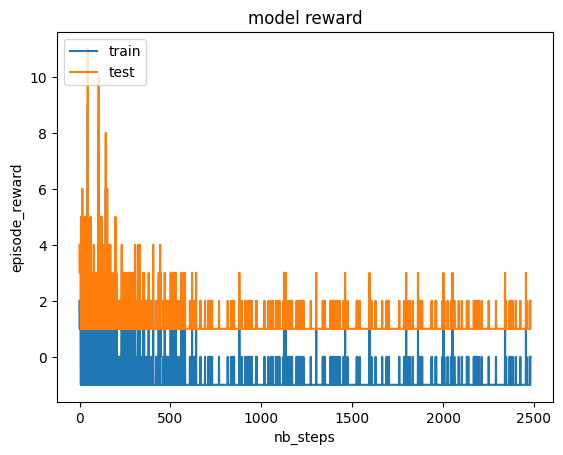

In [66]:
# summarize history for accuracy
plt.plot(history.history['episode_reward'])
plt.plot(history.history['nb_episode_steps'])
plt.title('model reward')
plt.ylabel('episode_reward')
plt.xlabel('nb_steps')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [67]:
# After training is done, we save the final weights.
#dqn.load_weights('Test-RL-v2_1750000.h5f')


In [68]:
# Finally, evaluate our algorithm for 5 episodes.
dqn.test(env, nb_episodes=5, visualize=True) 

Testing for 5 episodes ...
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 13
The action is inside step: (544, 174) <class 'tuple'>
self.worker_pos: (544, 174)
worker_pos 544 174
The action is : (544, 174)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
Episode 1: reward: -1.000, steps: 1
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 13
The action is inside step: (544, 174) <class 'tuple'>
self.worker_pos: (544, 174)
worker_pos 544 174
The action is : (544, 174)
is_occupied 0
reward: -2, done: True, info: {}, step: 1
Episode 2: reward: -1.000, steps: 1
The action is inside step: (0, 0) <class 'tuple'>
self.worker_pos: (0, 0)
worker_pos 0 0
The action is : (0, 0)
reward: -2, done: True, info: {}, step: 0
action_n 13
The action is inside step: (544, 17